<a href="https://colab.research.google.com/github/fidanfatih/Fraud_Detection/blob/main/fraud_detection(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IEEE-CIS Fraud Detection 
[Kaggle Link](https://www.kaggle.com/c/ieee-fraud-detection/overview)

From the competition overview:

In this competition, you’ll benchmark machine learning models on a challenging large-scale dataset. The data comes from Vesta's real-world e-commerce transactions and contains a wide range of features from device type to product features. You also have the opportunity to create new features to improve your results.

If successful, you’ll improve the efficacy of fraudulent transaction alerts for millions of people around the world, helping hundreds of thousands of businesses reduce their fraud loss and increase their revenue. And of course, you will save party people just like you the hassle of false positives.

You are predicting the probability that an online transaction is fraudulent, as denoted by the binary target isFraud.

The data is broken into two files identity and transaction, which are joined by TransactionID. Not all transactions have corresponding identity information.

`Categorical Features - Transaction`
- ProductCD
- card1 - card6
- addr1, addr2
- P_emaildomain
- R_emaildomain
- M1 - M9

`Categorical Features - Identity`
- DeviceType
- DeviceInfo
- id_12 - id_38

The TransactionDT feature is a timedelta from a given reference datetime (not an actual timestamp).

`Files`

- train_{transaction, identity}.csv - the training set
- test_{transaction, identity}.csv - the test set (you must predict the isFraud value for these observations)
- sample_submission.csv - a sample submission file in the correct format


Vesta Corporation provided the dataset for this competition. Vesta Corporation is the forerunner in guaranteed e-commerce payment solutions. Founded in 1995, Vesta pioneered the process of fully guaranteed card-not-present (CNP) payment transactions for the telecommunications industry. Since then, Vesta has firmly expanded data science and machine learning capabilities across the globe and solidified its position as the leader in guaranteed ecommerce payments. Today, Vesta guarantees more than $18B in transactions annually.

**Determines**

Unlike metrics such as LogLoss, the [AUC score](https://stats.stackexchange.com/questions/132777/what-does-auc-stand-for-and-what-is-it) only depends on how well you well you can separate the two classes. In practice, this means that only the order of your predictions matter, as a result of this, any rescaling done to your model's output probabilities will have no effect on your score.

Submissions are evaluated on [area under the ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) between the predicted probability and the observed target.

Submission File
For each TransactionID in the test set, you must predict a probability for the isFraud variable. The file should contain a header and have the following format:

`TransactionID,isFraud`
<br>3663549,0.5
<br>3663550,0.5
<br>3663551,0.5
<br>etc

We have a binary classification problem with a heavy imbalance which is an inherent property of such problems. At first I'll explore the data and try to find valuable insights, maybe I'll do some feature engineering and then it wil be time to build models.

---

**Tasks**

    * What type of data we have on our data?
    * How many cols, rows, missing values we have?
    * Whats the target distribution?
    * What's the Transactions values distribution of fraud and no fraud transactions?
    * We have predominant fraudulent products?
    * What features or target shows some interesting patterns?
    * And a lot of more questions that will raise trought the exploration.


**1- Data Preprosessing**

- Import Modules
- Data Load and Integration
- Data Review and Understanding
- Memory reduction
- Extract a 25k sample

**2- Data Cleansing**

- summarize data
- Anomaly/Dublicate detection
- Rename columns
- drop irrevelant rows
- drop redundant columns
- converting data to the same standard
- dtype transformation and discretization

**3- Exploratory Data Analysis (EDA)**
- Data Visualization
- Feature engineering
- Feature selection/elimination 
    - Correlation Statistics / Multicollinearity
    - [RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)
    - [Filter based statistical tests](https://machinelearningmastery.com/wp-content/uploads/2019/11/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png)
    - [Feature inportance](https://machinelearningmastery.com/calculate-feature-importance-with-python/)
- Detect outliers  
- Handling missing values
- Insights & visual graphs

**4- Model Building**

- Under/Over sampling
- Data Standarization/Normalization
- One hot encoding / Label encoding
- Dimensionally reduction (PCA)
- Model Training (XGBoost, LightGBM)
- Model Evaluation

**5- Model Deployment**

- Save and Export the Model as .pkl
- Build a web interface with streamlit
- Model deployment on cloud

**6- Presentation & Article**

- Prepare an annotated notebook
- Write an article
- Release the article on medium.com
- Project presentation



---

## 1- Data Preprosessing / Preparation

### a- Import Modules

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats.mstats import winsorize
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

%matplotlib inline

pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000
pd.options.display.max_colwidth = 1000

### b- Data Load and Integration

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%time
# Using %%time or %time prints 2 values: 1-CPU Times 2-Wall Time

# Data Load
train_transaction = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fraud Detection/input/train_transaction.csv.zip')
test_transaction = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fraud Detection/input/test_transaction.csv.zip')

train_identity = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fraud Detection/input/train_identity.csv.zip')
test_identity = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fraud Detection/input/test_identity.csv.zip')

# Data Integration
train = train_transaction.merge(train_identity, how='left', on='TransactionID')
test = test_transaction.merge(test_identity, how='left', on='TransactionID')

ss = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fraud Detection/input/sample_submission.csv.zip')
        
print(f"""train.shape : {train.shape}, 
test.shape : {test.shape}""")

train.shape : (590540, 434), 
test.shape : (506691, 433)
CPU times: user 53.2 s, sys: 8.68 s, total: 1min 1s
Wall time: 1min 5s


### c- Data Review and Understanding

In [ ]:
print('train_transaction shape is {}'.format(train_transaction.shape))
print('test_transaction shape is {}'.format(test_transaction.shape))
print('train_identity shape is {}'.format(train_identity.shape))
print('test_identity shape is {}'.format(test_identity.shape))

train_transaction shape is (590540, 394)
test_transaction shape is (506691, 393)
train_identity shape is (144233, 41)
test_identity shape is (141907, 41)


In [ ]:
train

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0             2987000        0          86400           68.50         W   
1             2987001        0          86401           29.00         W   
2             2987002        0          86469           59.00         W   
3             2987003        0          86499           50.00         W   
4             2987004        0          86506           50.00         H   
...               ...      ...            ...             ...       ...   
590535        3577535        0       15811047           49.00         W   
590536        3577536        0       15811049           39.50         W   
590537        3577537        0       15811079           30.95         W   
590538        3577538        0       15811088          117.00         W   
590539        3577539        0       15811131          279.95         W   

        card1  card2  card3       card4  card5   card6  addr1  addr2  dist1  \
0       13926    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0   
1        2755  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN   
2        4663  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0   
3       18132  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN   
4        4497  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN   
...       ...    ...    ...         ...    ...     ...    ...    ...    ...   
590535   6550    NaN  150.0        visa  226.0   debit  272.0   87.0   48.0   
590536  10444  225.0  150.0  mastercard  224.0   debit  204.0   87.0    NaN   
590537  12037  595.0  150.0  mastercard  224.0   debit  231.0   87.0    NaN   
590538   7826  481.0  150.0  mastercard  224.0   debit  387.0   87.0    3.0   
590539  15066  170.0  150.0  mastercard  102.0  credit  299.0   87.0    NaN   

        dist2 P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7  \
0         NaN           NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
1         NaN     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
2         NaN   outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
3         NaN     yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0   
4         NaN     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
...       ...           ...           ...  ...  ...  ...  ...  ...  ...  ...   
590535    NaN           NaN           NaN  2.0  1.0  0.0  0.0  1.0  0.0  0.0   
590536    NaN     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
590537    NaN     gmail.com           NaN  1.0  1.0  0.0  0.0  1.0  1.0  0.0   
590538    NaN       aol.com           NaN  1.0  1.0  0.0  0.0  0.0  3.0  0.0   
590539    NaN     gmail.com           NaN  2.0  1.0  0.0  0.0  1.0  1.0  0.0   

         C8   C9  C10  C11  C12   C13  C14     D1     D2    D3    D4   D5  D6  \
0       0.0  1.0  0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0   NaN  NaN NaN   
1       0.0  0.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN   
2       0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN   
3       0.0  1.0  0.0  1.0  0.0  25.0  1.0  112.0  112.0   0.0  94.0  0.0 NaN   
4       1.0  0.0  1.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   NaN  NaN NaN   
...     ...  ...  ...  ...  ...   ...  ...    ...    ...   ...   ...  ...  ..   
590535  0.0  2.0  0.0  1.0  0.0   3.0  2.0   29.0   29.0  30.0   NaN  NaN NaN   
590536  0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN   
590537  0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN   
590538  0.0  2.0  0.0  1.0  1.0   5.0  1.0   22.0   22.0   0.0  22.0  0.0 NaN   
590539  0.0  2.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   0.0   1.0  0.0 NaN   

        D7  D8  D9   D10    D11  D12  D13  D14    D15   M1   M2   M3   M4  \
0      NaN NaN NaN  13.0   13.0  NaN  NaN  NaN    0.0    T    T    T   M2   
1      NaN NaN NaN   0.0    NaN  NaN  NaN  NaN    0.0  NaN  NaN  NaN  

In [ ]:
test

TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0             3663549       18403224          31.950         W  10409  111.0   
1             3663550       18403263          49.000         W   4272  111.0   
2             3663551       18403310         171.000         W   4476  574.0   
3             3663552       18403310         284.950         W  10989  360.0   
4             3663553       18403317          67.950         W  18018  452.0   
...               ...            ...             ...       ...    ...    ...   
506686        4170235       34214279          94.679         C  13832  375.0   
506687        4170236       34214287          12.173         C   3154  408.0   
506688        4170237       34214326          49.000         W  16661  490.0   
506689        4170238       34214337         202.000         W  16621  516.0   
506690        4170239       34214345          24.346         C   5713  168.0   

        card3       card4  card5   card6  addr1  addr2   dist1  dist2  \
0       150.0        visa  226.0   debit  170.0   87.0     1.0    NaN   
1       150.0        visa  226.0   debit  299.0   87.0     4.0    NaN   
2       150.0        visa  226.0   debit  472.0   87.0  2635.0    NaN   
3       150.0        visa  166.0   debit  205.0   87.0    17.0    NaN   
4       150.0  mastercard  117.0   debit  264.0   87.0     6.0    NaN   
...       ...         ...    ...     ...    ...    ...     ...    ...   
506686  185.0  mastercard  224.0   debit  284.0   60.0     NaN    NaN   
506687  185.0  mastercard  224.0   debit    NaN    NaN     NaN  157.0   
506688  150.0        visa  226.0   debit  327.0   87.0     NaN    NaN   
506689  150.0  mastercard  224.0   debit  177.0   87.0     NaN    NaN   
506690  144.0        visa  147.0  credit    NaN    NaN     NaN    NaN   

       P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8  \
0          gmail.com           NaN  6.0  6.0  0.0  0.0  3.0  4.0  0.0  0.0   
1            aol.com           NaN  3.0  2.0  0.0  0.0  0.0  1.0  0.0  0.0   
2        hotmail.com           NaN  2.0  2.0  0.0  0.0  0.0  5.0  0.0  0.0   
3          gmail.com           NaN  5.0  2.0  0.0  0.0  1.0  1.0  0.0  0.0   
4          gmail.com           NaN  6.0  6.0  0.0  0.0  2.0  5.0  0.0  0.0   
...              ...           ...  ...  ...  ...  ...  ...  ...  ...  ...   
506686     gmail.com     gmail.com  1.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0   
506687   hotmail.com   hotmail.com  1.0  3.0  0.0  1.0  0.0  1.0  1.0  2.0   
506688   hotmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
506689   hotmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
506690   hotmail.com   hotmail.com  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0   

         C9  C10  C11  C12    C13  C14     D1     D2    D3     D4    D5    D6  \
0       6.0  0.0  5.0  1.0  115.0  6.0  419.0  419.0  27.0  398.0  27.0   NaN   
1       2.0  0.0  1.0  1.0   12.0  2.0  149.0  149.0   7.0  634.0   7.0   NaN   
2       4.0  0.0  2.0  0.0   22.0  2.0  137.0  137.0  10.0   97.0  10.0   NaN   
3       2.0  0.0  2.0  0.0    7.0  4.0   42.0   42.0  41.0  242.0  41.0   NaN   
4       5.0  0.0  6.0  0.0   14.0  6.0   22.0   22.0   0.0   22.0   0.0   NaN   
...     ...  ...  ...  ...    ...  ...    ...    ...   ...    ...   ...   ...   
506686  0.0  0.0  1.0  1.0    1.0  1.0    0.0    NaN   NaN    0.0   NaN   0.0   
506687  0.0  2.0  1.0  1.0    3.0  1.0   16.0   16.0  16.0   16.0  16.0  16.0   
506688  1.0  0.0  1.0  0.0    1.0  1.0    0.0    NaN   NaN    0.0   NaN   NaN   
506689  1.0  0.0  1.0  0.0    1.0  1.0    0.0    NaN   NaN    0.0   NaN   NaN   
506690  0.0  1.0  1.0  1.0    1.0  1.0    0.0    NaN   NaN    0.0   NaN   0.0   

          D7         D8        D9    D10    D11   D12  D13  D14    D15   M1  \
0        NaN        NaN       NaN  418.0  203.0   NaN  NaN  NaN  409.0    T   
1        NaN        NaN       NaN  231.0  634.0   NaN  NaN  NaN  634.0    T   
2        NaN        NaN

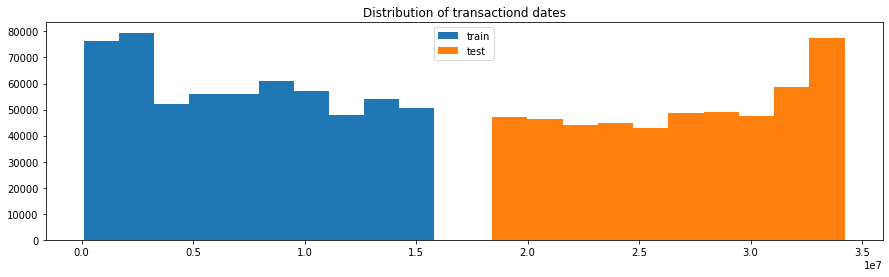

In [ ]:
plt.figure(figsize=(15,4))
plt.hist(train['TransactionDT'], label='train');
plt.hist(test['TransactionDT'], label='test');
plt.legend()
plt.title('Distribution of transactiond dates')
plt.show()

The TransactionDT feature is a timedelta from a given reference datetime (not an actual timestamp). One early discovery about the data is that the train and test appear to be split by time. There is a slight gap inbetween, but otherwise the training set is from an earlier period of time and test is from a later period of time. This will impact which cross validation techniques should be used.

In [ ]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 2.5 GB


In [ ]:
# feature engineering
train['Transaction_hour'] = np.floor(train['TransactionDT'] / 3600) % 24
test['Transaction_hour'] = np.floor(test['TransactionDT'] / 3600) % 24

train['Transaction_day_of_week'] = np.floor((train['TransactionDT'] / (3600 * 24) - 1) % 7)
test['Transaction_day_of_week'] = np.floor((test['TransactionDT'] / (3600 * 24) - 1) % 7)

### d- Memory reduction, garbage collection

In [ ]:
import gc

In [ ]:
del train_transaction, test_transaction, train_identity, test_identity
gc.collect()

In [ ]:
# safe downcast
def sd(col, max_loss_limit=0.001, avg_loss_limit=0.001, na_loss_limit=0, n_uniq_loss_limit=0, fillna=0):
    """
    max_loss_limit - don't allow any float to lose precision more than this value. Any values are ok for GBT algorithms as long as you don't unique values.
                     See https://en.wikipedia.org/wiki/Half-precision_floating-point_format#Precision_limitations_on_decimal_values_in_[0,_1]
    avg_loss_limit - same but calculates avg throughout the series.
    na_loss_limit - not really useful.
    n_uniq_loss_limit - very important parameter. If you have a float field with very high cardinality you can set this value to something like n_records * 0.01 in order to allow some field relaxing.
    """
    is_float = str(col.dtypes)[:5] == 'float'
    na_count = col.isna().sum()
    n_uniq = col.nunique(dropna=False)
    try_types = ['float16', 'float32']

    if na_count <= na_loss_limit:
        try_types = ['int8', 'int16', 'float16', 'int32', 'float32']

    for type in try_types:
        col_tmp = col

        # float to int conversion => try to round to minimize casting error
        if is_float and (str(type)[:3] == 'int'):
            col_tmp = col_tmp.copy().fillna(fillna).round()

        col_tmp = col_tmp.astype(type)
        max_loss = (col_tmp - col).abs().max()
        avg_loss = (col_tmp - col).abs().mean()
        na_loss = np.abs(na_count - col_tmp.isna().sum())
        n_uniq_loss = np.abs(n_uniq - col_tmp.nunique(dropna=False))

        if max_loss <= max_loss_limit and avg_loss <= avg_loss_limit and na_loss <= na_loss_limit and n_uniq_loss <= n_uniq_loss_limit:
            return col_tmp

    # field can't be converted
    return col

def reduce_mem_usage_sd(df, deep=True, verbose=False, obj_to_cat=False):
    numerics = ['int16', 'uint16', 'int32', 'uint32', 'int64', 'uint64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage(deep=deep).sum() / 1024 ** 2
    for col in df.columns:
        col_type = df[col].dtypes

        # collect stats
        na_count = df[col].isna().sum()
        n_uniq = df[col].nunique(dropna=False)
        
        # numerics
        if col_type in numerics:
            df[col] = sd(df[col])

        # strings
        if (col_type == 'object') and obj_to_cat:
            df[col] = df[col].astype('category')
        
        if verbose:
            print(f'Column {col}: {col_type} -> {df[col].dtypes}, na_count={na_count}, n_uniq={n_uniq}')
        new_na_count = df[col].isna().sum()
        if (na_count != new_na_count):
            print(f'Warning: column {col}, {col_type} -> {df[col].dtypes} lost na values. Before: {na_count}, after: {new_na_count}')
        new_n_uniq = df[col].nunique(dropna=False)
        if (n_uniq != new_n_uniq):
            print(f'Warning: column {col}, {col_type} -> {df[col].dtypes} lost unique values. Before: {n_uniq}, after: {new_n_uniq}')

    end_mem = df.memory_usage(deep=deep).sum() / 1024 ** 2
    percent = 100 * (start_mem - end_mem) / start_mem
    if verbose:
        print('Mem. usage decreased from {:5.2f} Mb to {:5.2f} Mb ({:.1f}% reduction)'.format(start_mem, end_mem, percent))
    return df

In [ ]:
train = reduce_mem_usage_sd(train, verbose=True)

### e- Rename Columns

Problem:
The column names of train(id_1, id_2, …, id_39) and test(id-1, id-2, …, id-39) dataset doesn't match.

In [ ]:
def Diff(li1, li2):
    li1_dif = [i for i in li1 + li2 if i not in li1]
    li2_dif = [i for i in li1 + li2 if i not in li2]

    print(f"""not in list1:
{li1_dif}\n   
not in list2:
{li2_dif}""")

Diff(sorted(train.columns), sorted(test.columns))

not in list1:
['id-01', 'id-02', 'id-03', 'id-04', 'id-05', 'id-06', 'id-07', 'id-08', 'id-09', 'id-10', 'id-11', 'id-12', 'id-13', 'id-14', 'id-15', 'id-16', 'id-17', 'id-18', 'id-19', 'id-20', 'id-21', 'id-22', 'id-23', 'id-24', 'id-25', 'id-26', 'id-27', 'id-28', 'id-29', 'id-30', 'id-31', 'id-32', 'id-33', 'id-34', 'id-35', 'id-36', 'id-37', 'id-38']
   
not in list2:
['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'isFraud']


In [ ]:
test.rename(columns=lambda x: x.replace("id-","id_") if "id-" in x else x, inplace=True)

> The columns names of test and train data must be well-matched.

In [ ]:
train.to_csv('/content/drive/MyDrive/Colab Notebooks/Fraud Detection/input/train_reduced.csv')
df=train.copy()
# del train

### e- Extract a 25k sample

In [1043]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1044]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
import re
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

%matplotlib inline

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000
pd.options.display.max_colwidth = 1000

In [1045]:
# Take a 25k sample (%5 of train dataset)
# data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fraud Detection/input/train_reduced.csv',index_col=[0]).sample(n=25000, random_state=42)
# data = data.sort_values('TransactionDT').reset_index().drop('index', axis=1)
df= data.copy()
# df = reduce_mem_usage_sd(df, verbose=True)
df.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987002        0          86469          59.000         W   4663   
1        2987006        0          86522         159.000         W  12308   
2        2987031        0          86998         363.890         W   6573   
3        2987111        0          88383          18.186         C  13832   
4        2987167        0          89169         100.000         H   6019   

   card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  \
0  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0    NaN   
1  360.0  150.0        visa  166.0   debit  126.0   87.0    0.0    NaN   
2  583.0  150.0        visa  226.0  credit  315.0   87.0   13.0    NaN   
3  375.0  185.0  mastercard  224.0   debit    NaN    NaN    NaN  109.0   
4  583.0  150.0        visa  226.0  credit  325.0   87.0    NaN    NaN   

   P_emaildomain R_emaildomain  C1  C2  C3  C4  C5  C6  C7  C8  C9  C10  C11  \
0    outlook.com           NaN   1   1   0   0   0   1   0   0   1    0    1   
1      yahoo.com           NaN   1   1   0   0   0   1   0   0   1    0    1   
2      yahoo.com           NaN   1   1   0   0   1   1   0   0   1    0    1   
3    hotmail.com   hotmail.com   1   1   0   1   0   1   1   1   0    1    1   
4  optonline.net           NaN   1   1   0   0   0   1   0   1   0    1    1   

   C12  C13  C14   D1  D2  D3   D4  D5   D6  D7   D8   D9  D10    D11  D12  \
0    0    1    1  0.0 NaN NaN  0.0 NaN  NaN NaN  NaN  NaN  0.0  315.0  NaN   
1    0    1    1  0.0 NaN NaN  0.0 NaN  NaN NaN  NaN  NaN  0.0    0.0  NaN   
2    0    1    1  0.0 NaN NaN  0.0 NaN  NaN NaN  NaN  NaN  0.0    0.0  NaN   
3    1    1    1  0.0 NaN NaN  0.0 NaN  0.0 NaN  7.0  0.0  0.0    NaN  0.0   
4    0    1    1  0.0 NaN NaN  NaN NaN  NaN NaN  NaN  NaN  NaN    NaN  NaN   

   D13  D14    D15   M1   M2   M3   M4   M5   M6   M7   M8   M9   V1   V2  \
0  NaN  NaN  315.0    T    T    T   M0    F    F    F    F    F  1.0  1.0   
1  NaN  NaN    0.0    T    T    T   M0    F    F    T    T    T  1.0  1.0   
2  NaN  NaN    0.0    T    T    T  NaN  NaN    T    F    T    T  1.0  1.0   
3  0.0  0.0    0.0  NaN  NaN  NaN   M0  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

    V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  V15  V16  V17  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0   
2  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  1.0  1.0  1.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  V30  V31  V32  \
0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0   
3  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V33  V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  V45  V46  V47  \
0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0   
1  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0   
2  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0   
3  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V48  V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  V60  V61  V62  \
0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0   
1  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0   

## 2- Data Cleansing

### a-  summarize data

In [1046]:
df.describe(include="all").T.sort_values("unique")

count unique                   top   freq  \
M7                       10317      2                     F   8965   
id_16                     5526      2                 Found   2799   
DeviceType                6051      2               desktop   3707   
id_12                     6195      2              NotFound   5277   
M9                       10320      2                     T   8719   
M8                       10320      2                     F   6563   
id_35                     6058      2                     T   3321   
M6                       17707      2                     F   9514   
id_28                     6058      2                 Found   3245   
M5                       10129      2                     F   5545   
M3                       13426      2                     T  10643   
M2                       13426      2                     T  12020   
M1                       13426      2                     T  13425   
id_37                     6058      2                     T   4719   
id_38                     6058      2                     F   3120   
card6                    24941      2                 debit  18637   
id_36                     6058      2                     F   5767   
id_29                     6058      2                 Found   3188   
id_27                      209      2                 Found    208   
id_15                     6058      3                 Found   2859   
M4                       13128      3                    M0   8298   
id_23                      209      3  IP_PROXY:TRANSPARENT    146   
id_34                     3323      3        match_status:2   2619   
card4                    24940      4                  visa  16293   
ProductCD                25000      5                     W  18510   
R_emaildomain             5903     53             gmail.com   2449   
P_emaildomain            20931     57             gmail.com   9646   
id_30                     3309     68            Windows 10    946   
id_33                     3109     76             1920x1080    734   
id_31                     6031    106           chrome 63.0    967   
DeviceInfo                5038    505               Windows   2101   
TransactionID            25000    NaN                   NaN    NaN   
isFraud                  25000    NaN                   NaN    NaN   
TransactionDT            25000    NaN                   NaN    NaN   
TransactionAmt           25000    NaN                   NaN    NaN   
card1                    25000    NaN                   NaN    NaN   
card2                    24632    NaN                   NaN    NaN   
card3                    24941    NaN                   NaN    NaN   
card5                    24814    NaN                   NaN    NaN   
addr1                    22173    NaN                   NaN    NaN   
addr2                    22173    NaN                   NaN    NaN   
dist1                    10023    NaN                   NaN    NaN   
dist2                     1590    NaN                   NaN    NaN   
C1                       25000    NaN                   NaN    NaN   
C2                       25000    NaN                   NaN    NaN   
C3                       25000    NaN                   NaN    NaN   
C4                       25000    NaN                   NaN    NaN   
C5                       25000    NaN                   NaN    NaN   
C6                       25000    NaN                   NaN    NaN   
C7                       25000    NaN                   NaN    NaN   
C8                       25000    NaN                   NaN    NaN   
C9                       25000    NaN                   NaN    NaN   
C10                      25000    NaN                   NaN    NaN   
C11                      25000    NaN                   NaN    NaN   
C12                      25000    NaN                   NaN    NaN   
C13                      25000    NaN                   NaN    NaN   
C14                      25000    N

In [1047]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

display(summary(df).sort_values(by='Uniques', ascending=True))

Data shape: (25000, 436)
___________________________
Data Types:
float64    385
object      31
int64       20
Name: Types, dtype: int64
___________________________


Types  Counts  Uniques  Nulls      Min       Max
V305                     float64   25000        1      0        1         1
isFraud                    int64   25000        2      0        0         1
V1                       float64   13080        2  11920        1         1
V88                      float64   21168        3   3832        0         1
id_38                     object    6058        3  18942      NaN       NaN
DeviceType                object    6051        3  18949      NaN       NaN
M1                        object   13426        3  11574      NaN       NaN
M2                        object   13426        3  11574      NaN       NaN
M3                        object   13426        3  11574      NaN       NaN
M5                        object   10129        3  14871      NaN       NaN
M8                        object   10320        3  14680      NaN       NaN
V241                     float64    5619        3  19381        1         2
M9                        object   10320        3  14680      NaN       NaN
V68                      float64   21682        3   3318        0         1
V14                      float64   21742        3   3258        0         1
V65                      float64   21682        3   3318        0         1
V107                     float64   24984        3     16        0         1
V41                      float64   17787        3   7213        0         1
M7                        object   10317        3  14683      NaN       NaN
V240                     float64    5619        3  19381        1         2
M6                        object   17707        3   7293      NaN       NaN
V94                      float64   21168        3   3832        0         1
id_29                     object    6058        3  18942      NaN       NaN
id_35                     object    6058        3  18942      NaN       NaN
id_36                     object    6058        3  18942      NaN       NaN
card6                     object   24941        3     59      NaN       NaN
id_37                     object    6058        3  18942      NaN       NaN
id_12                     object    6195        3  18805      NaN       NaN
id_28                     object    6058        3  18942      NaN       NaN
id_16                     object    5526        3  19474      NaN       NaN
id_27                     object     209        3  24791      NaN       NaN
V121                     float64   24984        4     16        0         2
id_34                     object    3323        4  21677      NaN       NaN
V28                      float64   21742        4   3258        0         2
V122                     float64   24984        4     16        0         2
V120                     float64   24984        4     16        0         2
id_23                     object     209        4  24791      NaN       NaN
M4                        object   13128        4  11872      NaN       NaN
id_22                    float64     209        4  24791       14        41
id_15                     object    6058        4  18942      NaN       NaN
V117                     float64   24984        4     16        0         2
V27                      float64   21742        4   3258        0         2
V118                     float64   24984        4     16        0         2
V119                     float64   24984        4     16        0         2
V89                      float64   21168        4   3832        0         2
V50                      float64   17787        5   7213        0         3
V42                      float64   17787        5   7213        0         3
V36                      float64   17787        5   7213        0         3
V12                      float64   21742        5   3258        0         3
id_32                    float64    3311        5  21689        0        32
V35                      float64   17787        5   7213        0         3
V2                       float64   13080        5  11920        1         4

In [1048]:
print(*df.columns)

TransactionID isFraud TransactionDT TransactionAmt ProductCD card1 card2 card3 card4 card5 card6 addr1 addr2 dist1 dist2 P_emaildomain R_emaildomain C1 C2 C3 C4 C5 C6 C7 C8 C9 C10 C11 C12 C13 C14 D1 D2 D3 D4 D5 D6 D7 D8 D9 D10 D11 D12 D13 D14 D15 M1 M2 M3 M4 M5 M6 M7 M8 M9 V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28 V29 V30 V31 V32 V33 V34 V35 V36 V37 V38 V39 V40 V41 V42 V43 V44 V45 V46 V47 V48 V49 V50 V51 V52 V53 V54 V55 V56 V57 V58 V59 V60 V61 V62 V63 V64 V65 V66 V67 V68 V69 V70 V71 V72 V73 V74 V75 V76 V77 V78 V79 V80 V81 V82 V83 V84 V85 V86 V87 V88 V89 V90 V91 V92 V93 V94 V95 V96 V97 V98 V99 V100 V101 V102 V103 V104 V105 V106 V107 V108 V109 V110 V111 V112 V113 V114 V115 V116 V117 V118 V119 V120 V121 V122 V123 V124 V125 V126 V127 V128 V129 V130 V131 V132 V133 V134 V135 V136 V137 V138 V139 V140 V141 V142 V143 V144 V145 V146 V147 V148 V149 V150 V151 V152 V153 V154 V155 V156 V157 V158 V159 V160 V161 V162 V163 V164 V165 V166 V167

### b- Anomaly/Dublicate detection

In [1049]:
df.duplicated().sum()

0

> No dublicated data

### c- converting data to the same standard

> We will make it in Data Visualization part

### d- dtype transformation and discretization

> We will make it in Data Visualization part

## 3- Exploratory Data Analysis (EDA)

### a- Handling missing values

In [1050]:
missig_rate = np.product(df.isnull().sum().sum())/ np.product(df.shape)*100
print(f'% of missing data: {missig_rate:.2f}')

% of missing data: 44.81


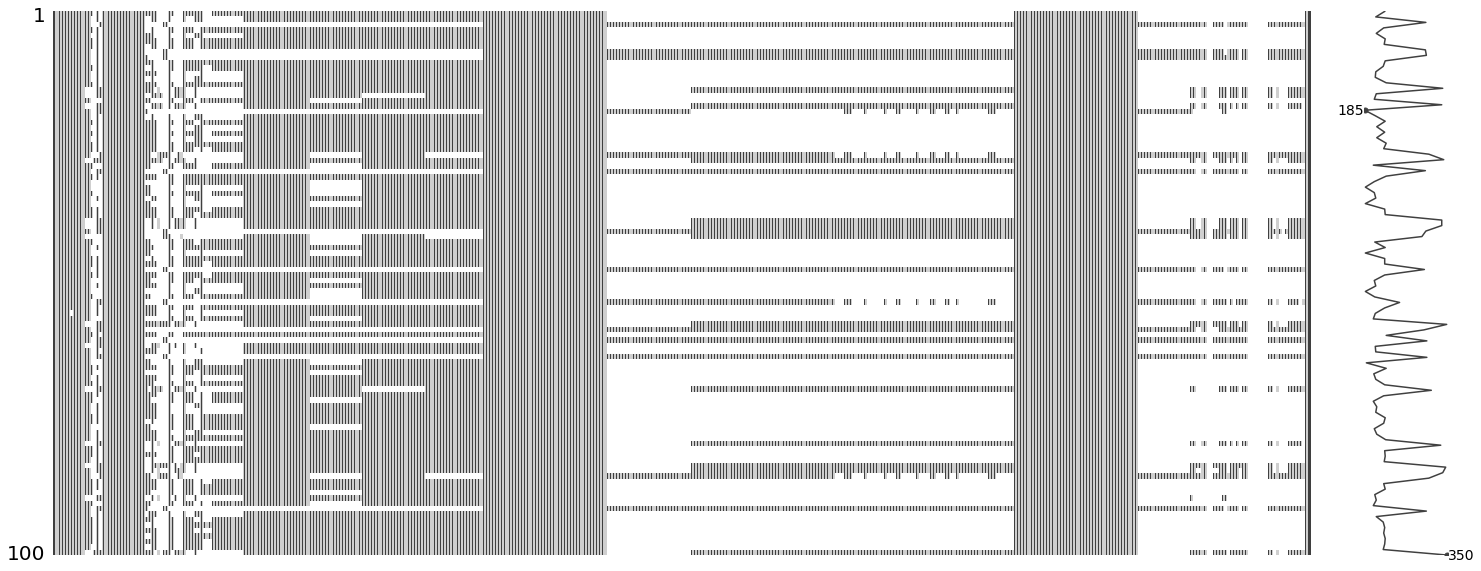

In [1051]:
import missingno as msno
msno.matrix(df.sample(100));

In [1052]:
def null_values(df, rate=0):
    """a function to show null values with percentage"""
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv['Percentage (%)']>rate].sort_values('Percentage (%)', ascending=False)
null_values(df, 90)

Missing_Records  Percentage (%)
id_24            24814          99.256
id_07            24792          99.168
id_08            24792          99.168
id_21            24792          99.168
id_22            24791          99.164
id_23            24791          99.164
id_25            24791          99.164
id_26            24791          99.164
id_27            24791          99.164
dist2            23410          93.640
D7               23309          93.236
id_18            23047          92.188

In [1053]:
# Columns having Null values more than 90%  
many_null_cols = null_values(df, 90).index
print(many_null_cols)

Index(['id_24', 'id_07', 'id_08', 'id_21', 'id_22', 'id_23', 'id_25', 'id_26',
       'id_27', 'dist2', 'D7', 'id_18'],
      dtype='object')


In [1054]:
# Columns having a single value of more than %90 including missing values
big_top_value_cols_1 = [col for col in df.columns if df[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]
print(big_top_value_cols_1)

['isFraud', 'dist2', 'C3', 'D7', 'V98', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V129', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V281', 'V284', 'V286', 'V290', 'V293', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V305', 'V309', 'V311', 'V316', 'V318', 'V319', 'V320', 'V321', 'id_07', 'id_08', 'id_18', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27']


In [1055]:
# Columns having a single value of more than %97.5 except missing values
big_top_value_cols_2 = [col for col in df.columns if df[col].value_counts(dropna=True, normalize=True).values[0] > 0.975]
print(big_top_value_cols_2)

['addr2', 'C3', 'M1', 'V1', 'V14', 'V27', 'V28', 'V41', 'V46', 'V65', 'V68', 'V88', 'V89', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V138', 'V191', 'V193', 'V196', 'V240', 'V241', 'V247', 'V249', 'V252', 'V269', 'V305', 'id_04', 'id_27']


In [1056]:
# Columns having one unique value
one_value_cols = [col for col in df.columns if df[col].nunique() <= 1]
one_value_cols

['V1', 'V305']

### b- Drop redundant columns

In [1057]:
cols_to_drop = set(list(many_null_cols)+ big_top_value_cols_1 + big_top_value_cols_2 + one_value_cols)
cols_to_drop.remove('isFraud')
len(cols_to_drop)

89

In [1058]:
print(sorted(cols_to_drop))

['C3', 'D7', 'M1', 'V1', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V129', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V14', 'V191', 'V193', 'V196', 'V240', 'V241', 'V247', 'V249', 'V252', 'V269', 'V27', 'V28', 'V281', 'V284', 'V286', 'V290', 'V293', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V305', 'V309', 'V311', 'V316', 'V318', 'V319', 'V320', 'V321', 'V41', 'V46', 'V65', 'V68', 'V88', 'V89', 'V98', 'addr2', 'dist2', 'id_04', 'id_07', 'id_08', 'id_18', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27']


In [1059]:
df = df.drop(cols_to_drop, axis=1)

In [1060]:
print(list(df.columns))

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'dist1', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V42', 'V43', 'V44', 'V45', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V66', 'V67', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V

In [1061]:
df = df.drop('TransactionID', axis=1)

### c- Drop irrevelant rows

In [1062]:
# The observations having %75 null values
many_null_rows = df[df.isnull().T.sum()/df.shape[1]>0.75]
many_null_rows

isFraud  TransactionDT  TransactionAmt ProductCD  card1  card2  card3  \
126          0         152030         107.950         W  12695  490.0  150.0   
574          0         403821          14.199         C   4285  438.0  106.0   
9016         0        4979634          31.891         C   8755  500.0  185.0   
9020         1        4980030          32.356         C   1976  545.0  185.0   
10999        0        6273084          23.201         C   3154  408.0  185.0   
13002        0        7618040          31.298         C   9026  545.0  185.0   
13005        0        7620476          50.571         C  15257  375.0  185.0   
13012        0        7643611          16.193         C   1812  555.0  117.0   
13014        0        7647995           5.196         C  10996  555.0  135.0   
13018        1        7654158         103.681         C  10086  500.0  185.0   
13021        0        7655236           9.788         C  11837  304.0  146.0   
13136        0        7699671          53.049         C   9633  130.0  185.0   
20094        0       12240538          29.818         C  12616  490.0  150.0   

            card4  card5   card6  addr1  dist1 P_emaildomain R_emaildomain  \
126          visa  226.0   debit    NaN    NaN           NaN           NaN   
574          visa  226.0   debit    NaN    NaN           NaN           NaN   
9016   mastercard  224.0  credit    NaN    NaN           NaN           NaN   
9020         visa  102.0  credit    NaN    NaN           NaN           NaN   
10999  mastercard  224.0   debit    NaN    NaN           NaN           NaN   
13002        visa  137.0  credit    NaN    NaN           NaN           NaN   
13005  mastercard  224.0   debit    NaN    NaN           NaN           NaN   
13012        visa  184.0  credit    NaN    NaN           NaN           NaN   
13014  mastercard  224.0   debit    NaN    NaN           NaN           NaN   
13018  mastercard  224.0  credit    NaN    NaN           NaN           NaN   
13021        visa  226.0  credit    NaN    NaN           NaN           NaN   
13136        visa  138.0   debit    NaN    NaN           NaN           NaN   
20094        visa    NaN  credit    NaN    NaN   hotmail.com   hotmail.com   

       C1  C2  C4  C5  C6  C7  C8  C9  C10  C11  C12  C13  C14     D1     D2  \
126     1   0   0   1   1   0   0   1    0    1    0    2    1   28.0   28.0   
574     1   1   0   0   0   0   0   0    0    0    0    1    1    0.0    NaN   
9016    1   3   1   0   1   1   1   0    1    1    1    0    0    0.0    NaN   
9020    1   1   0   0   0   0   0   0    0    0    0    0    0    0.0    NaN   
10999   5  25   1   0   1   1   4   0   14    1    1    8    4  132.0  132.0   
13002   2  13   1   0   1   1   1   0    3    1    1    3    2    6.0    6.0   
13005   3   7   2   0   2   2   3   0    3    2    2    3    3    8.0    8.0   
13012   1   6   1   0   1   1   1   0    1    1    1    4    1   14.0   14.0   
13014   1  10   1   0   1   1   1   0    3    1    1    3    1   12.0   12.0   
13018   1   1   0   0   0   0   0   0    0    0    0    0    0    0.0    NaN   
13021   1   4   1   0   1   1   1   0    2    1    1    1    1    5.0    5.0   
13136   1   7   1   0   1   1   2   0    4    3    3    4    1   96.0   96.0   
20094   4  13   1   0   1   1   2   0    3    3    3    1    1  632.0    NaN   

         D3     D4   D5     D6  D8  D9  D10  D11    D12  D13  D14  D15   M2  \
126    28.0    NaN  NaN    NaN NaN NaN  NaN  NaN    NaN  NaN  NaN  NaN    T   
574     NaN    NaN  NaN    NaN NaN NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN   
9016    0.0    NaN  NaN    NaN NaN NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN   
9020    NaN    NaN  NaN    NaN NaN NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN   
10999   0.0    NaN  NaN    NaN NaN NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN   
13002   0.0    NaN  NaN    NaN NaN NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN   
13005   0.0    NaN  NaN    NaN NaN NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN   
13012   0.0    NaN  NaN    NaN NaN NaN  

> Let's not drop them for now

### d- Data Visualization

    **FEATURES**
- **`isFraud` : binary, Target**
- `TransactionID` : all unique 
- `TransactionDT` : time series
- `TransactionAmt` : continous, full
- `P_emaildomain` : categoric, 56 uniques
- `R_emaildomain` : categoric, 59 uniques
- `DeviceType` : categoric, 2 uniques
- `DeviceInfo` : categoric, 700 uniques
- `ProductCD` : categoric, 5 uniques
- `card1-6` : categoric 2, numeric 4  Abuzer
- `dist1-2` : numeric 2 Abuzer
- `C1-14` : numeric Abuzer
- `D1-15` : numeric Emrah
- `M1-9` : categoric Emrah
- `V1-339` : numeric, categoric
- `id_01_38` : numeric, categoric

### FUNCTIONS

#### Description Functions

In [1063]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

In [1064]:
!pip install colorama
def column_details(regex, df=df):
  # We will focus on each column in detail
  # Uniqe Values, DTYPE, NUNIQUE, NULL_RATE
  global columns
  columns=[col for col in df.columns if re.search(regex, col)]

  from colorama import Fore, Back, Style

  print('Unique Values of the Features:\nfeature: DTYPE, NUNIQUE, NULL_RATE\n')
  for i in df[columns]:
      color = Fore.RED if df[i].dtype =='float64' else Fore.BLUE if df[i].dtype =='int64' else Fore.GREEN
      print(f'{i}: {color} {df[i].dtype}, {df[i].nunique()}, %{round(df[i].isna().sum()/len(df[i])*100,2)}\n{Style.RESET_ALL}{pd.Series(df[i].unique()).sort_values().values}\n')
      

#### Plot Functions

In [1065]:
def labels(ax, df=df, xytext=(0, 0)):
    for bar in ax.patches: 
        ax.annotate('%{:.2f}\n{:.0f}'.format(100*bar.get_height()/len(df),bar.get_height()), (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                    size=11, xytext=xytext, 
                    textcoords='offset points')

def plot_col(col):

    fig, ax = plt.subplots(1,2,figsize=(20,6), sharey=True)

    plt.subplot(121)
    tmp = pd.crosstab(df[col], df['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

    ax[0] = sns.countplot(x=col, data=df, hue='isFraud', 
                  order=np.sort(df[col].dropna().unique()),
                  )
    labels(ax[0],df[col].dropna(),(0, 0))
    
    ax_twin = ax[0].twinx()
    # sns.set(rc={"lines.linewidth": 0.7})
    ax_twin = sns.pointplot(x=col, y='Fraud', data=tmp, color='black', legend=False, 
                  order = np.sort(df[col].dropna().unique()), 
                  linewidth=0.1)
    

    ax[0].grid()

    plt.subplot(122)
    ax[1] = sns.countplot(x=df[col].dropna(),
                  order= np.sort(df[col].dropna().unique()),
                  )
    labels(ax[1],df[col].dropna())
    plt.show()


In [1066]:
def plot_cols(regex, figsize, target):
  columns=[col for col in df.columns if re.search(regex, col)]
  nrow, ncolumn = len(columns),1

  fig, ax = plt.subplots(nrow, ncolumn,figsize=figsize)

  for i,col in enumerate(columns):
      order = np.sort(df[col].dropna().unique())
      
      plt.subplot(nrow,ncolumn,i+1)
      ax[i] = sns.countplot(x=df[col], data= df, hue=target, order = order)
  #     labels(ax[i],df[col].dropna(),(0,0))
      
      tmp = pd.crosstab(df[col], df[target], normalize='index') * 100
      tmp = tmp.reset_index()
      tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
      
      ax_twin = ax[i].twinx()
  #     sns.set(rc={"lines.linewidth": 1})
      ax_twin = sns.pointplot(x=tmp[col], y=tmp['Fraud'],color='black', order = order)
      ax[i].grid();

In [1067]:
def hist_countplot(regex, figsize, nrow=10, ncolumn = 4, target='isFraud'):
  plt.figure(figsize=figsize)
  columns=[col for col in df.columns if re.search(regex, col)]

  for i,col in enumerate(columns):
      plt.subplot(nrow,ncolumn,i+1)
      if df[col].dtype!='O':
          sns.histplot(x=df[col], data= df, hue=target)
      else:
          sns.countplot(x=df[col], data= df, hue=target) 

In [1068]:
def box_countplot(regex, figsize, nrow=10, ncolumn = 4, target='isFraud'):
  plt.figure(figsize=figsize)

  columns=[col for col in df.columns if re.search(regex, col)]

  for i,col in enumerate(columns):
      plt.subplot(nrow,ncolumn,i+1)
      if df[col].dtype!='O':
          sns.boxplot(x=df[col], data= df, hue=target)
      else:
          sns.countplot(x=df[col])

In [1069]:
def box_labels(ax, df,col1,col2):
    medians = df.groupby([col1])[col2].median().round(2)
    vertical_offset = df[col2].median() * 0.05 # offset from median for display

    for xtick in ax.get_xticks():
        ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
                horizontalalignment='center',size='small',color='w',weight='semibold')

#### Correlation Functions

In [1070]:
# Remove the highly collinear features from data
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
#                 print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return drops

In [1071]:
def corrank(X, threshold=0):
    import itertools
    df = pd.DataFrame([[i,j,X.corr().abs().loc[i,j]] for i,j in list(itertools.combinations(X.corr().abs(), 2))],columns=['Feature1','Feature2','corr'])    
    df = df.sort_values(by='corr',ascending=False).reset_index(drop=True)
    return df[df['corr']>threshold]

In [1072]:
import scipy.stats as sts

# References:
# https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
# https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V

def cramers_v(x, y):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    confusion_matrix = pd.crosstab(x,y)
    chi2 = sts.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

#### Outlier Functions

In [1073]:
def col_plot(df,col_name):
    plt.figure(figsize=(15,6))
    
    plt.subplot(141) # 1 satir x 4 sutun dan olusan ax in 1. sutununda calis
    plt.hist(df[col_name], bins = 20)
    f=lambda x:(np.sqrt(x) if x>=0 else -np.sqrt(-x))
    
    # üç sigma aralikta(verinin %99.7 sini icine almasi beklenen bolum) iki kirmizi cizgi arasinda
    plt.axvline(x=df[col_name].mean() + 3*df[col_name].std(),color='red')
    plt.axvline(x=df[col_name].mean() - 3*df[col_name].std(),color='red')
    plt.xlabel(col_name)
    plt.tight_layout
    plt.xlabel("Histogram ±3z")
    plt.ylabel(col_name)

    plt.subplot(142)
    plt.boxplot(df[col_name]) # IQR katsayisi, defaultu 1.5
    plt.xlabel("IQR=1.5")

    plt.subplot(143)
    plt.boxplot(df[col_name].apply(f), whis = 1.5)
    plt.xlabel("ROOT SQUARE - IQR=1.5")

    plt.subplot(144)
    plt.boxplot(np.log(df[col_name]+0.1), whis = 1.5)
    plt.xlabel("LOGARITMIC - IQR=1.5")
    plt.show()

In [1074]:
def plot_winsorize(df,col_name,up=0.1,down=0):
    plt.figure(figsize = (15, 6))

    winsor=winsorize(df[col_name], (down,up))
    root_winsor=winsorize(np.sqrt(df[col_name]), (down,up))

    plt.subplot(141)
    plt.hist(winsor, bins = 22)
    plt.axvline(x=winsor.mean()+3*winsor.std(),color='red')
    plt.axvline(x=winsor.mean()-3*winsor.std(),color='red')
    plt.xlabel('Winsorize_Histogram')
    plt.ylabel(col_name)
    plt.tight_layout

    plt.subplot(142)
    plt.boxplot(winsor, whis = 1.5)
    plt.xlabel('Winsorize - IQR:1.5')
    
    plt.subplot(143)
    plt.hist(root_winsor, bins=22)
    plt.axvline(x=root_winsor.mean()+3*root_winsor.std(),color='red')
    plt.axvline(x=root_winsor.mean()-3*root_winsor.std(),color='red')
    plt.xlabel('root_winsor_col_name')

    plt.subplot(144)
    plt.boxplot(root_winsor, whis = 1.5)
    plt.xlabel("Root & Winsorize - IQR=1.5")
    plt.show() 

In [1075]:
def plot_log_winsorize(df,col_name,up=0.1,down=0):
    plt.figure(figsize = (15, 6))

    winsor=winsorize(df[col_name], (down,up))
    log_winsor=winsorize(np.log(df[col_name]+1), (down,up))

    plt.subplot(141)
    plt.hist(winsor, bins = 22)
    plt.axvline(x=winsor.mean()+3*winsor.std(),color='red')
    plt.axvline(x=winsor.mean()-3*winsor.std(),color='red')
    plt.xlabel('Winsorize_Histogram')
    plt.ylabel(col_name)
    plt.tight_layout

    plt.subplot(142)
    plt.boxplot(winsor, whis = 1.5)
    plt.xlabel('Winsorize - IQR:1.5')
    
    plt.subplot(143)
    plt.hist(log_winsor, bins=22)
    plt.axvline(x=log_winsor.mean()+3*log_winsor.std(),color='red')
    plt.axvline(x=log_winsor.mean()-3*log_winsor.std(),color='red')
    plt.xlabel('log_winsor_col_name')

    plt.subplot(144)
    plt.boxplot(log_winsor, whis = 1.5)
    plt.xlabel("Log & Winsorize - IQR=1.5")
    plt.show()

### id_01-38

In [1076]:
columns=[]
column_details(regex='id_\d*')

Unique Values of the Features:
feature: DTYPE, NUNIQUE, NULL_RATE

id_01:  float64, 30, %75.22
[-100.  -95.  -90.  -87.  -85.  -80.  -75.  -70.  -65.  -60.  -55.  -50.
  -45.  -40.  -38.  -35.  -30.  -29.  -25.  -20.  -19.  -18.  -16.  -15.
  -14.  -12.  -10.   -7.   -5.    0.   nan]

id_02:  float64, 5998, %75.79
[1.32000e+02 1.42000e+02 2.08000e+02 ... 9.90150e+05 9.99595e+05
         nan]

id_03:  float64, 15, %88.8
[-10.  -7.  -6.  -5.  -4.  -3.  -2.   0.   1.   2.   3.   4.   5.   6.
   9.  nan]

id_05:  float64, 65, %76.5
[-30. -28. -25. -24. -22. -21. -20. -19. -18. -15. -14. -13. -12. -11.
 -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.
  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.
  32.  33.  35.  36.  38.  40.  41.  44.  45.  nan]

id_06:  float64, 79, %76.5
[-100.  -96.  -94.  -92.  -85.  -84.  -83.  -82.  -81.  -78.  -74.  -72.
  -71.  -70.  -69.  -67.  -65

#### id_30

In [1077]:
# grouping and converting data to the same standard
df.id_30.value_counts().sort_index().index

Index(['Android', 'Android 4.4.2', 'Android 5.0.2', 'Android 5.1.1',
       'Android 6.0', 'Android 6.0.1', 'Android 7.0', 'Android 7.1.1',
       'Android 7.1.2', 'Android 8.0.0', 'Android 8.1.0', 'Linux', 'Mac',
       'Mac OS X 10.10', 'Mac OS X 10.11', 'Mac OS X 10.12', 'Mac OS X 10.13',
       'Mac OS X 10.6', 'Mac OS X 10.9', 'Mac OS X 10_10_5',
       'Mac OS X 10_11_3', 'Mac OS X 10_11_5', 'Mac OS X 10_11_6',
       'Mac OS X 10_12', 'Mac OS X 10_12_1', 'Mac OS X 10_12_3',
       'Mac OS X 10_12_4', 'Mac OS X 10_12_5', 'Mac OS X 10_12_6',
       'Mac OS X 10_13_1', 'Mac OS X 10_13_2', 'Mac OS X 10_13_3',
       'Mac OS X 10_13_4', 'Mac OS X 10_6_8', 'Mac OS X 10_7_5',
       'Mac OS X 10_8_5', 'Mac OS X 10_9_5', 'Windows', 'Windows 10',
       'Windows 7', 'Windows 8', 'Windows 8.1', 'Windows Vista', 'Windows XP',
       'iOS', 'iOS 10.0.2', 'iOS 10.1.1', 'iOS 10.2.0', 'iOS 10.2.1',
       'iOS 10.3.1', 'iOS 10.3.2', 'iOS 10.3.3', 'iOS 11.0.0', 'iOS 11.0.1',
       'iOS 11.0.2'

In [1322]:
df.id_30.replace(regex={r'^Android.*': 'android', 
                        '^Mac.*': 'mac',
                        '^Windows.*': 'windows', 
                        '^iOS.*': 'ios',
                        '^Linux.*': 'linux'}, inplace=True)

df.id_30.value_counts(dropna=False)

NaN        21691
windows     1628
ios          816
mac          542
android      254
linux         68
other          1
Name: id_30, dtype: int64

#### id_31

In [1079]:
# grouping and converting data to the same standard
list(df.id_31.value_counts().sort_index().index)

['Generic/Android',
 'Generic/Android 7.0',
 'Microsoft/Windows',
 'Mozilla/Firefox',
 'Samsung/SM-G531H',
 'Samsung/SM-G532M',
 'android browser 4.0',
 'android webview 4.0',
 'aol',
 'chrome',
 'chrome 43.0 for android',
 'chrome 46.0 for android',
 'chrome 49.0',
 'chrome 49.0 for android',
 'chrome 50.0 for android',
 'chrome 51.0',
 'chrome 51.0 for android',
 'chrome 52.0 for android',
 'chrome 53.0 for android',
 'chrome 54.0 for android',
 'chrome 55.0',
 'chrome 55.0 for android',
 'chrome 56.0',
 'chrome 56.0 for android',
 'chrome 57.0',
 'chrome 57.0 for android',
 'chrome 58.0',
 'chrome 58.0 for android',
 'chrome 59.0',
 'chrome 59.0 for android',
 'chrome 60.0',
 'chrome 60.0 for android',
 'chrome 61.0',
 'chrome 61.0 for android',
 'chrome 62.0',
 'chrome 62.0 for android',
 'chrome 62.0 for ios',
 'chrome 63.0',
 'chrome 63.0 for android',
 'chrome 63.0 for ios',
 'chrome 64.0',
 'chrome 64.0 for android',
 'chrome 64.0 for ios',
 'chrome 65.0',
 'chrome 65.0 for and

In [1080]:
df.id_31.replace(regex={r'samsung.*': 'samsung_browser',
                        '^Samsung.*': 'samsung_browser',
                        '.*safari.*': 'safari',
                        'opera.*': 'opera', 
                        '^ie.*': 'ie',
                        'firefox.*': 'firefox',
                        '^Mozilla.*':'firefox',
                        'edge.*': 'edge', 
                        '^chrome.*': 'chrome',
                        '^google.*': 'chrome',
                        'android.*': 'android',
                        'Generic.*': 'android',
                        'Android':"android", 
                        'firefox.*': 'firefox',
                        'edge.*': 'edge', 
                        'Microsoft.*':'ie'}, inplace=True)

df.id_31.replace(df.id_31.value_counts(dropna=False)[df.id_31.value_counts(dropna=False)<10].index,'other', inplace= True)

df.id_31.value_counts(dropna=False)

NaN                18969
chrome              3258
safari              1606
ie                   434
firefox              289
edge                 287
samsung_browser       92
android               27
opera                 19
other                 19
Name: id_31, dtype: int64

#### id_33

In [1081]:
# dtype transformation and discretization
df.id_33.value_counts(dropna=False).head(5)

NaN          21891
1920x1080      734
1366x768       369
1334x750       271
2208x1242      196
Name: id_33, dtype: int64

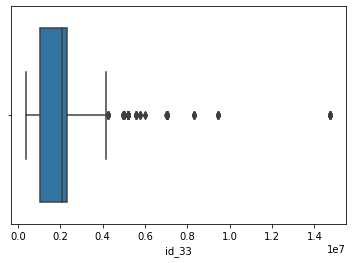

In [1082]:
df.id_33 = df.id_33.fillna(value='0x0').str.extract('(\d*)x(\d*)').apply(lambda x: int(x[0])*int(x[1]), axis=1)
df.id_33 = df.id_33.replace({0:np.nan})
sns.boxplot(df.id_33);

In [1083]:
df.id_33.value_counts()

2073600.0     734
1049088.0     369
1000500.0     271
2742336.0     196
1296000.0     190
1440000.0     165
3145728.0     136
1024000.0      89
1310720.0      79
4096000.0      77
727040.0       76
3686400.0      72
1764000.0      68
5184000.0      64
2740500.0      61
2304000.0      60
2251125.0      53
921600.0       47
786432.0       41
2397600.0      24
7056000.0      21
1047722.0      18
1044480.0      17
14745600.0     15
3110400.0      15
4990464.0      11
5595136.0      10
4269762.0       9
9437184.0       9
614400.0        7
3709632.0       7
2399820.0       7
8294400.0       6
5760000.0       5
4953600.0       5
410400.0        5
3694404.0       5
518400.0        4
983040.0        4
995328.0        4
1920000.0       4
3240000.0       4
3847680.0       3
1679616.0       3
2076601.0       3
1327104.0       2
1470000.0       2
384480.0        2
2459520.0       2
1439100.0       2
6000000.0       2
2764800.0       1
6998400.0       1
1438400.0       1
1312000.0       1
1016064.0 

In [1084]:
# in the data description, it is given that "id_12 - id_38" columns are categorical

nominal_cols = ['id_12','id_15','id_16','id_28','id_29','id_30','id_31','id_34', 'id_35', 'id_36', 'id_37', 'id_38']
ordinal_cols = ['id_13', 'id_14','id_17', 'id_19', 'id_20','id_32','id_33']

numeric_cols = sorted(set(columns).difference(set(nominal_cols+ordinal_cols)))
print(f"numeric_cols:\n{numeric_cols}")

numeric_cols:
['id_01', 'id_02', 'id_03', 'id_05', 'id_06', 'id_09', 'id_10', 'id_11']


#### Multicollinearity

In [1294]:
# column_details(regex='id_\d*')

In [1090]:
# missing value correlation
# msno.heatmap(df[columns], figsize=(15, 8), fontsize=10);

In [1091]:
# # Feature correlations
# plt.figure(figsize=(15,10))
# sns.heatmap(df[columns+['isFraud']].corr(),annot=True, cmap="coolwarm");

In [1092]:
# corrank(df[columns], 0.8)

In [1306]:
drop_col = remove_collinear_features(df[columns],0.80)
drop_col

set()

##### id_12, id_16, id_29

In [1303]:
cat_columns=['id_12','id_16','id_29']
# pd.Series([cramers_v(df.id_12,df[col]) for col in cat_columns], index=cat_columns).sort_values(ascending=False)
pd.Series([cramers_v(df.id_16,df[col]) for col in cat_columns], index=cat_columns).sort_values(ascending=False)

id_16    0.999638
id_29    0.885634
id_12    0.302950
dtype: float64

In [1304]:
cramers_v(df.id_16,df.id_29)

0.8856337080764808

> Multicolliniarity treshold is  having upper than 0.8

In [1308]:
drop_col.add('id_29')

##### id_15, id_28

In [1310]:
cramers_v(df.id_15,df.id_28)

0.8794252462607524

In [1320]:
drop_col.add('id_15')

{'id_15', 'id_29'}

##### id_35, id_36, id_37, id_38

In [1318]:
cat_columns=['id_35', 'id_36', 'id_37', 'id_38']
pd.Series([cramers_v(df.id_35,df[col]) for col in cat_columns], index=cat_columns).sort_values(ascending=False)

id_35    0.999667
id_38    0.336853
id_37    0.076844
id_36    0.059075
dtype: float64

In [1319]:
cramers_v(df.id_35,df.id_38)

0.336853289146541

In [ ]:
drop_col.add('id_29')

##### id_30, id_31

In [1323]:
cramers_v(df.id_30,df.id_31)

0.4508319504745826

In [1324]:
df = df.drop(drop_col, axis=1)

#### Handling Outliers

In [1336]:
columns=[col for col in df.columns if re.search('^id', col)]
print(columns)

['id_01', 'id_02', 'id_03', 'id_05', 'id_06', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_16', 'id_17', 'id_19', 'id_20', 'id_28', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']


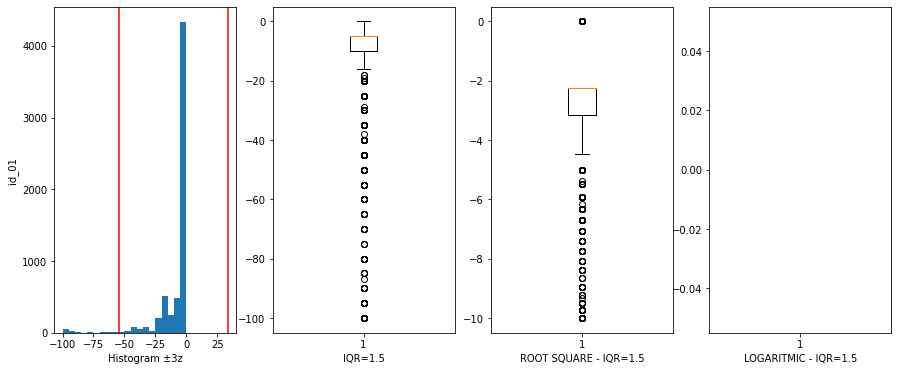

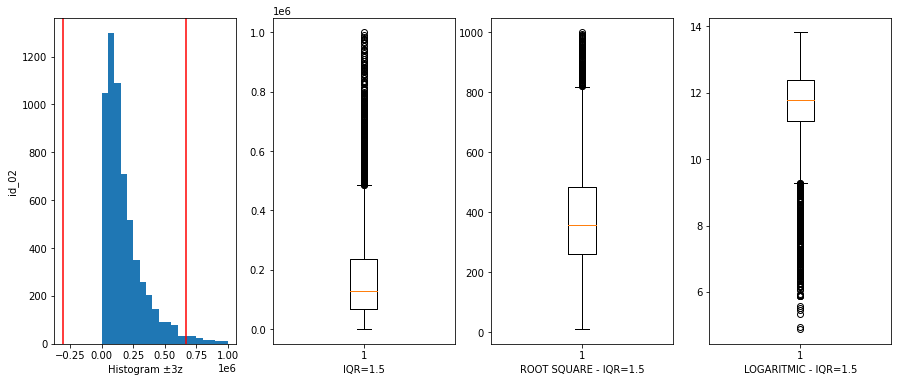

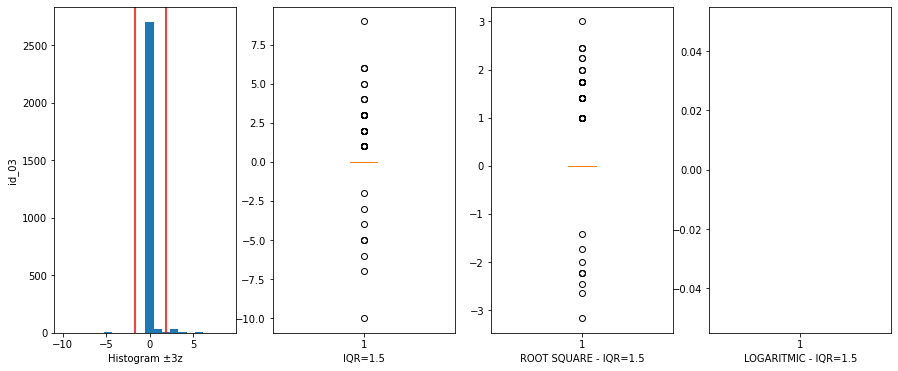

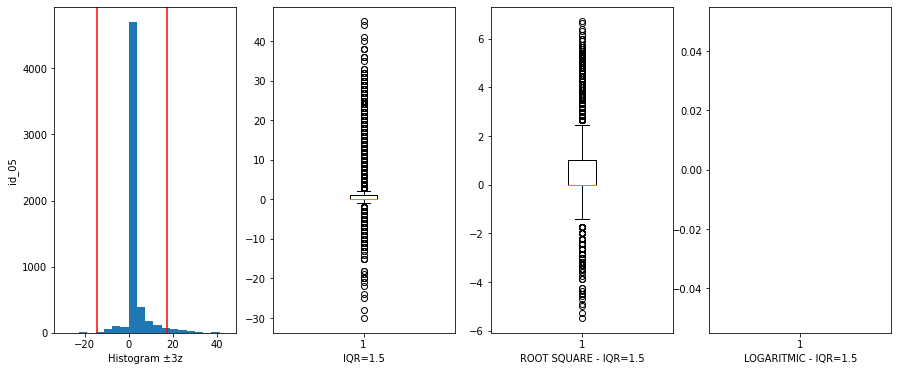

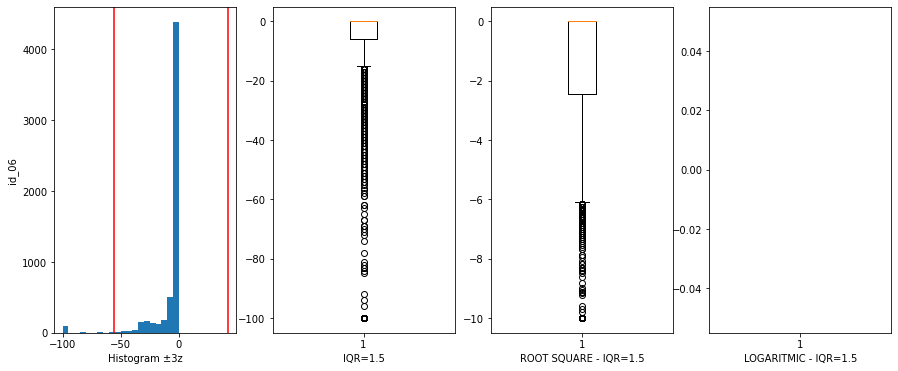

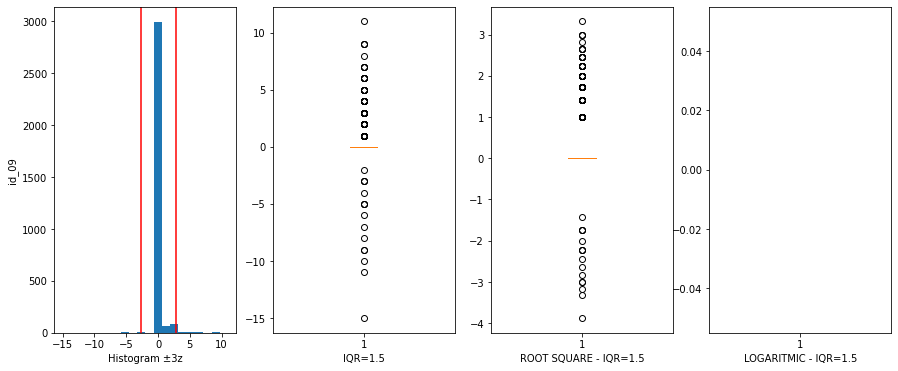

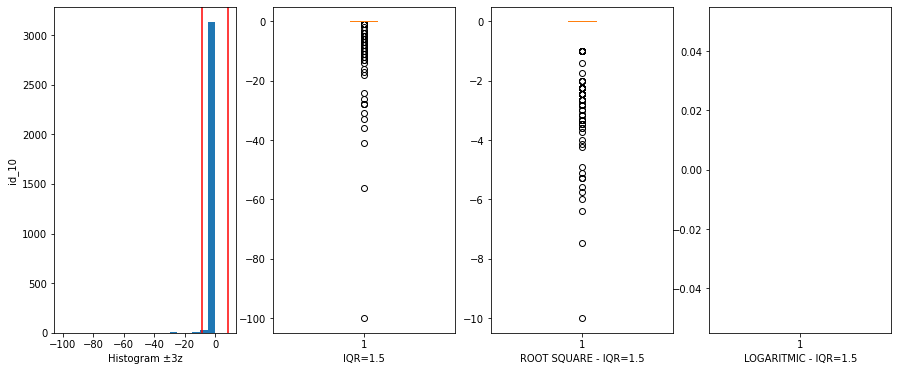

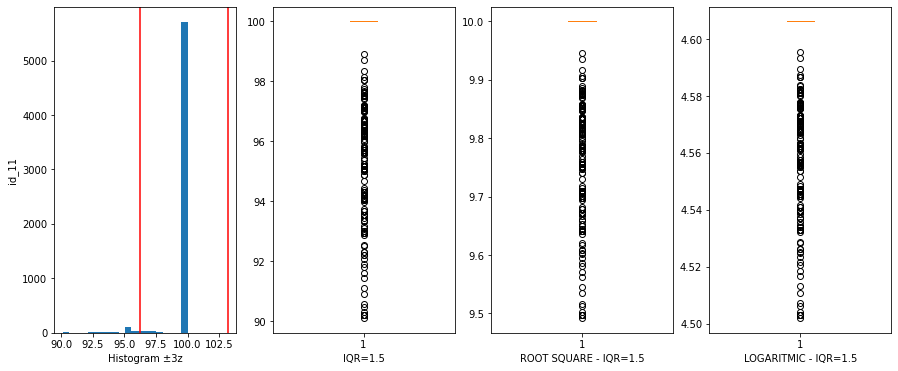

In [1343]:
for col in columns[:8]:
  col_plot(df[col].dropna().to_frame(),col)

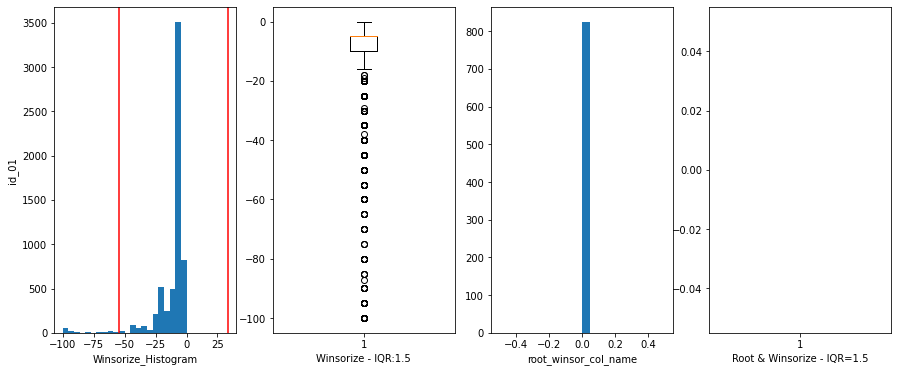

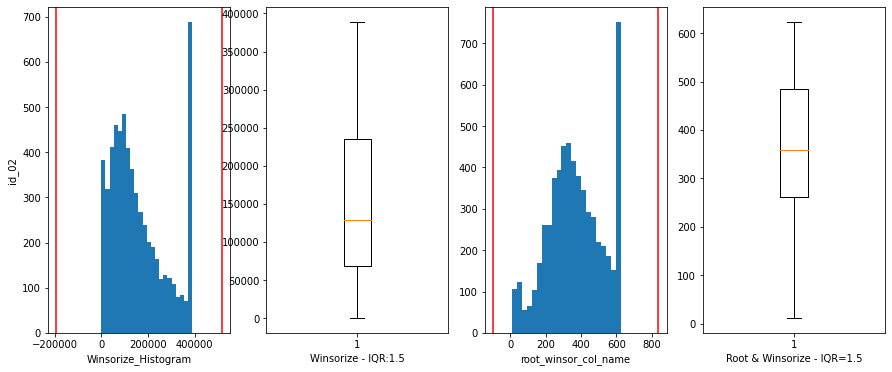

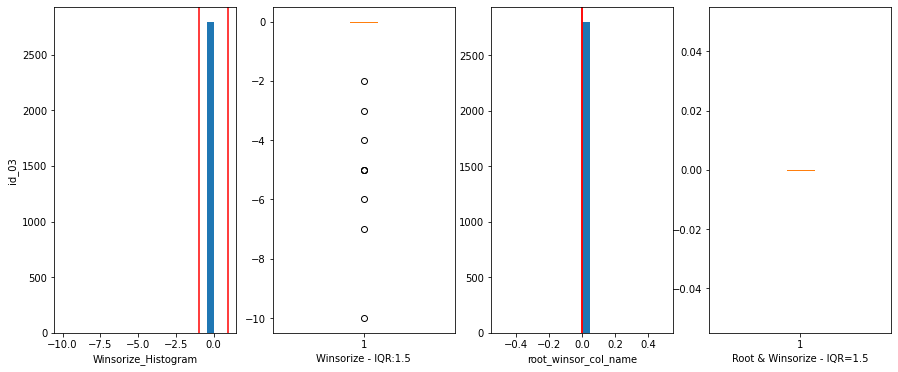

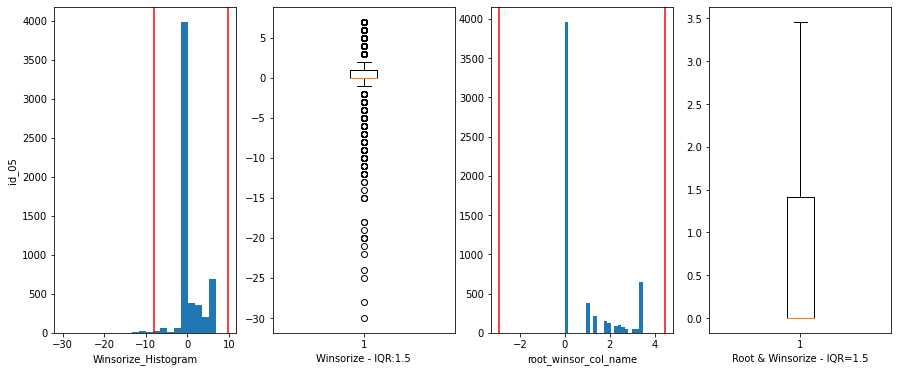

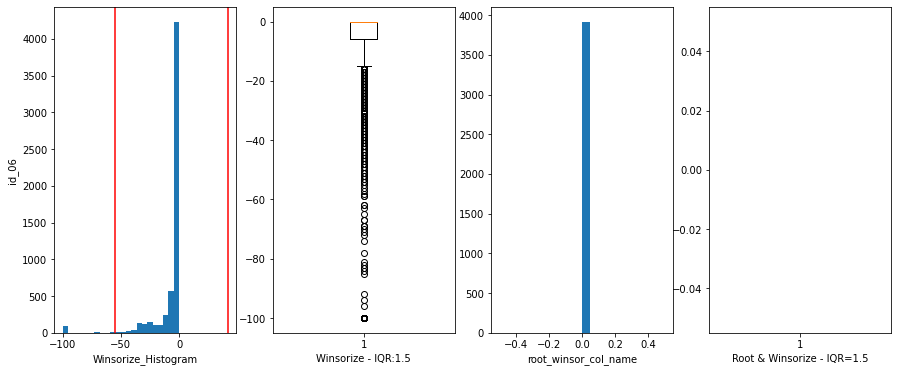

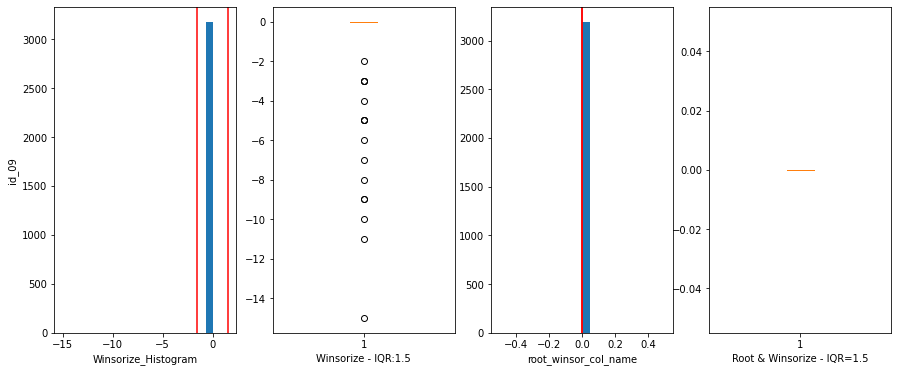

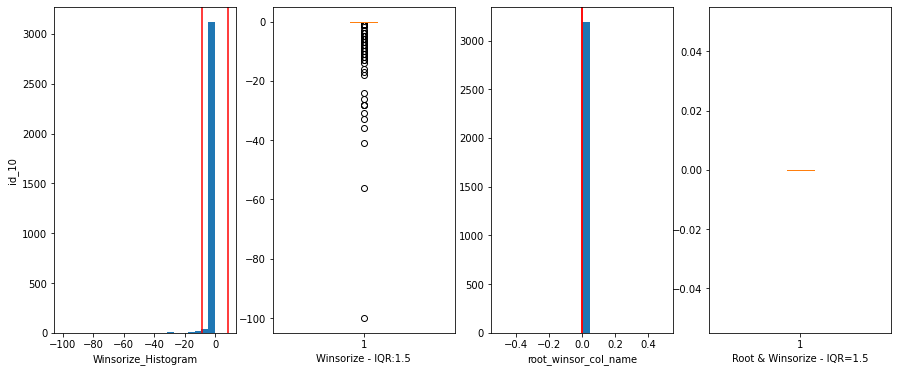

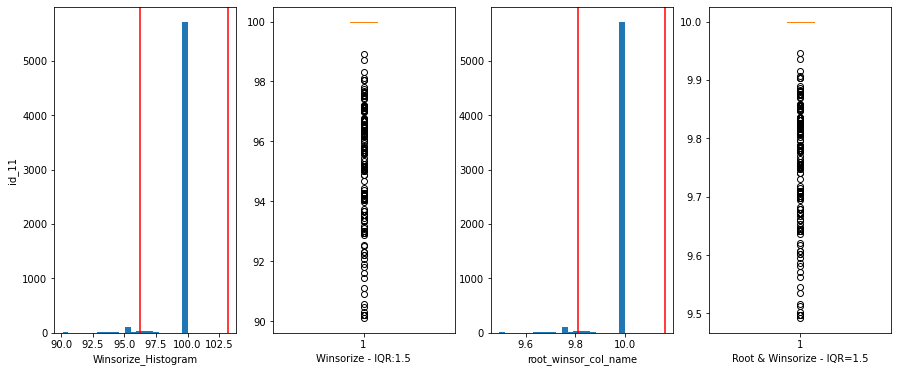

In [1344]:
for col in columns[:8]:
  plot_winsorize(df[col].dropna().to_frame(),col)

In [1348]:
# for col in columns[:8]:
#   plot_log_winsorize(df[col].dropna().to_frame(),col)

In [ ]:
df['id_01'] = pd.Series( winsorize(df.id_01, limits=(0, 0.1)))
df.C1.describe()

In [1347]:
df['id_01'] = pd.Series( np.sqrt(df.id_01))
df.id_01.describe()

count    824.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: id_01, dtype: float64

In [ ]:
# ax = sns.boxplot(x='isFraud',y='C1', data=df)
# box_labels(ax=ax, df=df.sort_values('isFraud'),col1='isFraud',col2='C1');

In [ ]:
# df.C5 = pd.Series( winsorize(df.C5, limits=(0, 0.1)))
# df.C5.describe()

In [ ]:
# ax = sns.boxplot(x='isFraud',y='C5', data=df)
# box_labels(ax=ax, df=df.sort_values('isFraud'),col1='isFraud',col2='C5');

#### Plots

In [ ]:
# plot_col('id_32')

In [ ]:
# plot_cols(regex='id_\d*', figsize=(30, 180), target='isFraud')

In [ ]:
# hist_countplot(regex='id_\d*', figsize=(30, 60), nrow=10, ncolumn = 4)

In [ ]:
# box_countplot(regex='id_\d*', figsize=(30, 60), nrow=10, ncolumn = 4)

### V1-339

#### Multicolliniarity

In [1095]:
column_details(regex='V\d*')

Unique Values of the Features:
feature: DTYPE, NUNIQUE, NULL_RATE

V2:  float64, 4, %47.68
[ 1.  2.  3.  4. nan]

V3:  float64, 7, %47.68
[ 1.  2.  3.  4.  5.  6.  9. nan]

V4:  float64, 5, %47.68
[ 0.  1.  2.  3.  4. nan]

V5:  float64, 6, %47.68
[ 0.  1.  2.  3.  4.  5. nan]

V6:  float64, 5, %47.68
[ 1.  2.  3.  4.  5. nan]

V7:  float64, 7, %47.68
[ 1.  2.  3.  4.  5.  6.  7. nan]

V8:  float64, 4, %47.68
[ 1.  2.  3.  4. nan]

V9:  float64, 4, %47.68
[ 1.  2.  3.  4. nan]

V10:  float64, 4, %47.68
[ 0.  1.  2.  3. nan]

V11:  float64, 5, %47.68
[ 0.  1.  2.  3.  4. nan]

V12:  float64, 4, %13.03
[ 0.  1.  2.  3. nan]

V13:  float64, 5, %13.03
[ 0.  1.  2.  3.  4. nan]

V15:  float64, 5, %13.03
[ 0.  1.  2.  3.  4. nan]

V16:  float64, 7, %13.03
[ 0.  1.  2.  3.  4.  5. 11. nan]

V17:  float64, 8, %13.03
[ 0.  1.  2.  3.  4.  5.  8.  9. nan]

V18:  float64, 8, %13.03
[ 0.  1.  2.  3.  4.  5.  8.  9. nan]

V19:  float64, 5, %13.03
[ 0.  1.  2.  3.  4. nan]

V20:  float64, 8, %13.03


In [1096]:
len(columns)

266

**V Features Groups according to the missing value correlation**

* V2-11
* V12-34
* V35-52
* V53-74
* V75-94
* V95-131
* V139-166
* V167-216
* V217-278
* V279-317
* V322-339

##### V2-11

In [1097]:
columns = [f'V{i}' for i in range(2,12) if f'V{i}' in columns ]
columns

['V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11']

In [1098]:
# msno.heatmap(df[columns], figsize=(10, 5), fontsize=10);

In [1099]:
# plt.figure(figsize=(10,7))
# sns.heatmap(df[columns+['isFraud']].corr(),annot=True, cmap="coolwarm");

In [1100]:
# corrank(df[columns], 0.8)

In [1101]:
drop_col = remove_collinear_features(df[columns],0.80)
drop_col

{'V11', 'V5', 'V9'}

In [1102]:
df = df.drop(drop_col, axis=1)

##### V12-34

In [1103]:
columns=[col for col in df.columns if re.search('V\d*', col)]
columns = [f'V{i}' for i in range(12,35) if f'V{i}' in columns ]
columns

['V12',
 'V13',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34']

In [1104]:
# msno.heatmap(df[columns], figsize=(15, 7), fontsize=10);

In [1105]:
# plt.figure(figsize=(25,10))
# sns.heatmap(df[columns+['isFraud']].corr(),annot=True, cmap="coolwarm");

In [1106]:
# corrank(df[columns], 0.8)

In [1107]:
drop_col = remove_collinear_features(df[columns],0.80)
drop_col

{'V13',
 'V16',
 'V17',
 'V18',
 'V20',
 'V21',
 'V22',
 'V24',
 'V26',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34'}

In [1108]:
df = df.drop(drop_col, axis=1)

##### V35-52

In [1109]:
columns=[col for col in df.columns if re.search('V\d*', col)]
columns = [f'V{i}' for i in range(35,53) if f'V{i}' in columns ]
columns

['V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V42',
 'V43',
 'V44',
 'V45',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52']

In [1110]:
# msno.heatmap(df[columns], figsize=(15, 7), fontsize=10);

In [1111]:
# plt.figure(figsize=(25,10))
# sns.heatmap(df[columns+['isFraud']].corr(),annot=True, cmap="coolwarm");

In [1112]:
# corrank(df[columns], 0.8)

In [1113]:
drop_col = remove_collinear_features(df[columns],0.80)
drop_col

{'V36', 'V38', 'V40', 'V42', 'V43', 'V45', 'V49', 'V50', 'V51', 'V52'}

In [1114]:
df = df.drop(drop_col, axis=1)

##### V53-74

In [1115]:
columns=[col for col in df.columns if re.search('V\d*', col)]
columns = [f'V{i}' for i in range(53,75) if f'V{i}' in columns ]
columns

['V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V66',
 'V67',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74']

In [1116]:
# msno.heatmap(df[columns], figsize=(15, 7), fontsize=10);

In [1117]:
# plt.figure(figsize=(25,10))
# sns.heatmap(df[columns+['isFraud']].corr(),annot=True, cmap="coolwarm");

In [1118]:
# corrank(df[columns], 0.8)

In [1119]:
drop_col = remove_collinear_features(df[columns],0.80)
drop_col

{'V54',
 'V58',
 'V59',
 'V60',
 'V62',
 'V63',
 'V64',
 'V67',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74'}

In [1120]:
df = df.drop(drop_col, axis=1)

##### V75-94

In [1121]:
columns=[col for col in df.columns if re.search('V\d*', col)]
columns = [f'V{i}' for i in range(75,95) if f'V{i}' in columns ]
columns

['V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94']

In [1122]:
# msno.heatmap(df[columns], figsize=(15, 7), fontsize=10);

In [1123]:
# plt.figure(figsize=(25,10))
# sns.heatmap(df[columns+['isFraud']].corr(),annot=True, cmap="coolwarm");

In [1124]:
# corrank(df[columns], 0.8)

In [1125]:
drop_col = remove_collinear_features(df[columns],0.80)
drop_col

{'V76', 'V81', 'V83', 'V84', 'V85', 'V87', 'V91', 'V92', 'V93', 'V94'}

In [1126]:
df = df.drop(drop_col, axis=1)

##### V95-131

In [1127]:
columns=[col for col in df.columns if re.search('V\d*', col)]
columns = [f'V{i}' for i in range(95,132) if f'V{i}' in columns ]
columns

['V95', 'V96', 'V97', 'V99', 'V100', 'V126', 'V127', 'V128', 'V130', 'V131']

In [1128]:
# msno.heatmap(df[columns], figsize=(15, 7), fontsize=10);

In [1129]:
# plt.figure(figsize=(25,10))
# sns.heatmap(df[columns+['isFraud']].corr(),annot=True, cmap="coolwarm");

In [1130]:
# corrank(df[columns], 0.8)

In [1131]:
drop_col = remove_collinear_features(df[columns],0.80)
drop_col

{'V100', 'V126', 'V127', 'V128', 'V96', 'V97'}

In [1132]:
df = df.drop(drop_col, axis=1)

##### V132-166

In [1133]:
columns=[col for col in df.columns if re.search('V\d*', col)]
columns = [f'V{i}' for i in range(132,167) if f'V{i}' in columns ]
columns

['V139',
 'V140',
 'V141',
 'V142',
 'V143',
 'V144',
 'V145',
 'V146',
 'V147',
 'V148',
 'V149',
 'V150',
 'V151',
 'V152',
 'V153',
 'V154',
 'V155',
 'V156',
 'V157',
 'V158',
 'V159',
 'V160',
 'V161',
 'V162',
 'V163',
 'V164',
 'V165',
 'V166']

In [1134]:
# msno.heatmap(df[columns], figsize=(15, 7), fontsize=10);

In [1135]:
# plt.figure(figsize=(25,10))
# sns.heatmap(df[columns+['isFraud']].corr(),annot=True, cmap="coolwarm");

In [1136]:
# corrank(df[columns], 0.8)

In [1137]:
drop_col = remove_collinear_features(df[columns],0.80)
drop_col

{'V140',
 'V142',
 'V145',
 'V147',
 'V149',
 'V150',
 'V151',
 'V152',
 'V153',
 'V154',
 'V155',
 'V156',
 'V157',
 'V158',
 'V159',
 'V160',
 'V162',
 'V163',
 'V164',
 'V165',
 'V166'}

In [1138]:
df = df.drop(drop_col, axis=1)

##### V167-216

In [1139]:
columns=[col for col in df.columns if re.search('V\d*', col)]
columns = [f'V{i}' for i in range(167,217) if f'V{i}' in columns ]
columns

['V167',
 'V168',
 'V169',
 'V170',
 'V171',
 'V172',
 'V173',
 'V174',
 'V175',
 'V176',
 'V177',
 'V178',
 'V179',
 'V180',
 'V181',
 'V182',
 'V183',
 'V184',
 'V185',
 'V186',
 'V187',
 'V188',
 'V189',
 'V190',
 'V192',
 'V194',
 'V195',
 'V197',
 'V198',
 'V199',
 'V200',
 'V201',
 'V202',
 'V203',
 'V204',
 'V205',
 'V206',
 'V207',
 'V208',
 'V209',
 'V210',
 'V211',
 'V212',
 'V213',
 'V214',
 'V215',
 'V216']

In [1140]:
# msno.heatmap(df[columns], figsize=(15, 7), fontsize=10);

In [1141]:
# plt.figure(figsize=(25,10))
# sns.heatmap(df[columns+['isFraud']].corr(),annot=True, cmap="coolwarm");

In [1142]:
# corrank(df[columns], 0.8)

In [1143]:
drop_col = remove_collinear_features(df[columns],0.80)
drop_col

{'V168',
 'V177',
 'V178',
 'V179',
 'V180',
 'V181',
 'V182',
 'V183',
 'V185',
 'V186',
 'V189',
 'V190',
 'V192',
 'V195',
 'V197',
 'V198',
 'V199',
 'V201',
 'V202',
 'V203',
 'V204',
 'V205',
 'V207',
 'V211',
 'V212',
 'V213',
 'V215',
 'V216'}

In [1144]:
df = df.drop(drop_col, axis=1)

##### V217-278

In [1145]:
columns=[col for col in df.columns if re.search('V\d*', col)]
columns = [f'V{i}' for i in range(217,279) if f'V{i}' in columns ]
columns

['V217',
 'V218',
 'V219',
 'V220',
 'V221',
 'V222',
 'V223',
 'V224',
 'V225',
 'V226',
 'V227',
 'V228',
 'V229',
 'V230',
 'V231',
 'V232',
 'V233',
 'V234',
 'V235',
 'V236',
 'V237',
 'V238',
 'V239',
 'V242',
 'V243',
 'V244',
 'V245',
 'V246',
 'V248',
 'V250',
 'V251',
 'V253',
 'V254',
 'V255',
 'V256',
 'V257',
 'V258',
 'V259',
 'V260',
 'V261',
 'V262',
 'V263',
 'V264',
 'V265',
 'V266',
 'V267',
 'V268',
 'V270',
 'V271',
 'V272',
 'V273',
 'V274',
 'V275',
 'V276',
 'V277',
 'V278']

In [1146]:
# msno.heatmap(df[columns], figsize=(15, 7), fontsize=10);

In [1147]:
# plt.figure(figsize=(25,10))
# sns.heatmap(df[columns+['isFraud']].corr(),annot=True, cmap="coolwarm");

In [1148]:
# corrank(df[columns], 0.8)

In [1149]:
drop_col = remove_collinear_features(df[columns],0.80)
drop_col

{'V218',
 'V219',
 'V222',
 'V225',
 'V226',
 'V229',
 'V230',
 'V231',
 'V232',
 'V233',
 'V234',
 'V235',
 'V236',
 'V237',
 'V239',
 'V243',
 'V244',
 'V245',
 'V246',
 'V248',
 'V251',
 'V253',
 'V254',
 'V255',
 'V256',
 'V257',
 'V258',
 'V259',
 'V261',
 'V262',
 'V263',
 'V265',
 'V267',
 'V268',
 'V271',
 'V272',
 'V273',
 'V274',
 'V275',
 'V277',
 'V278'}

In [1150]:
df = df.drop(drop_col, axis=1)

##### V279-317

In [1151]:
columns=[col for col in df.columns if re.search('V\d*', col)]
columns = [f'V{i}' for i in range(279,318) if f'V{i}' in columns ]
columns

['V279',
 'V280',
 'V282',
 'V283',
 'V285',
 'V287',
 'V288',
 'V289',
 'V291',
 'V292',
 'V294',
 'V302',
 'V303',
 'V304',
 'V306',
 'V307',
 'V308',
 'V310',
 'V312',
 'V313',
 'V314',
 'V315',
 'V317']

In [1152]:
# msno.heatmap(df[columns], figsize=(15, 7), fontsize=10);

In [1153]:
# plt.figure(figsize=(25,10))
# sns.heatmap(df[columns+['isFraud']].corr(),annot=True, cmap="coolwarm");

In [1154]:
# corrank(df[columns], 0.8)

In [1155]:
drop_col = remove_collinear_features(df[columns],0.80)
drop_col

{'V280',
 'V287',
 'V289',
 'V292',
 'V294',
 'V303',
 'V304',
 'V306',
 'V307',
 'V308',
 'V315',
 'V317'}

In [1156]:
df = df.drop(drop_col, axis=1)

##### V318-339

In [1157]:
columns=[col for col in df.columns if re.search('V\d*', col)]
columns = [f'V{i}' for i in range(318,340) if f'V{i}' in columns ]
columns

['V322',
 'V323',
 'V324',
 'V325',
 'V326',
 'V327',
 'V328',
 'V329',
 'V330',
 'V331',
 'V332',
 'V333',
 'V334',
 'V335',
 'V336',
 'V337',
 'V338',
 'V339']

In [1158]:
# msno.heatmap(df[columns], figsize=(15, 7), fontsize=10);

In [1159]:
# plt.figure(figsize=(25,10))
# sns.heatmap(df[columns+['isFraud']].corr(),annot=True, cmap="coolwarm");

In [1160]:
# corrank(df[columns], 0.8)

In [1161]:
drop_col = remove_collinear_features(df[columns],0.80)
drop_col

{'V323',
 'V324',
 'V327',
 'V328',
 'V329',
 'V330',
 'V331',
 'V332',
 'V333',
 'V335',
 'V336',
 'V338',
 'V339'}

In [1162]:
df = df.drop(drop_col, axis=1)

##### Last Review

In [1163]:
# Multicolliniarity of all V columns
columns=[col for col in df.columns if re.search('V\d*', col)]
columns = [f'V{i}' for i in range(1,340) if f'V{i}' in columns ]
columns

['V2',
 'V3',
 'V4',
 'V6',
 'V7',
 'V8',
 'V10',
 'V12',
 'V15',
 'V19',
 'V23',
 'V25',
 'V29',
 'V35',
 'V37',
 'V39',
 'V44',
 'V47',
 'V48',
 'V53',
 'V55',
 'V56',
 'V57',
 'V61',
 'V66',
 'V69',
 'V75',
 'V77',
 'V78',
 'V79',
 'V80',
 'V82',
 'V86',
 'V90',
 'V95',
 'V99',
 'V130',
 'V131',
 'V139',
 'V141',
 'V143',
 'V144',
 'V146',
 'V148',
 'V161',
 'V167',
 'V169',
 'V170',
 'V171',
 'V172',
 'V173',
 'V174',
 'V175',
 'V176',
 'V184',
 'V187',
 'V188',
 'V194',
 'V200',
 'V206',
 'V208',
 'V209',
 'V210',
 'V214',
 'V217',
 'V220',
 'V221',
 'V223',
 'V224',
 'V227',
 'V228',
 'V238',
 'V242',
 'V250',
 'V260',
 'V264',
 'V266',
 'V270',
 'V276',
 'V279',
 'V282',
 'V283',
 'V285',
 'V288',
 'V291',
 'V302',
 'V310',
 'V312',
 'V313',
 'V314',
 'V322',
 'V325',
 'V326',
 'V334',
 'V337']

In [1164]:
# msno.heatmap(df[columns], figsize=(15, 7), fontsize=10);

In [1165]:
# plt.figure(figsize=(25,10))
# sns.heatmap(df[columns+['isFraud']].corr(),annot=False, cmap="coolwarm");

In [1166]:
# corrank(df[columns], 0.8)

In [1167]:
drop_col = remove_collinear_features(df[columns],0.80)
drop_col

{'V143',
 'V167',
 'V184',
 'V217',
 'V223',
 'V228',
 'V276',
 'V279',
 'V285',
 'V29',
 'V302',
 'V322',
 'V326',
 'V337',
 'V39',
 'V48',
 'V57',
 'V69',
 'V79',
 'V80',
 'V90'}

In [1168]:
df = df.drop(drop_col, axis=1)

In [1169]:
V_columns = [col for col in df.columns if re.search('V\d*', col)]
print(f"Current V Columns ({len(V_columns)}):\n\n{V_columns}")

Current V Columns (74):

['V2', 'V3', 'V4', 'V6', 'V7', 'V8', 'V10', 'V12', 'V15', 'V19', 'V23', 'V25', 'V35', 'V37', 'V44', 'V47', 'V53', 'V55', 'V56', 'V61', 'V66', 'V75', 'V77', 'V78', 'V82', 'V86', 'V95', 'V99', 'V130', 'V131', 'V139', 'V141', 'V144', 'V146', 'V148', 'V161', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V187', 'V188', 'V194', 'V200', 'V206', 'V208', 'V209', 'V210', 'V214', 'V220', 'V221', 'V224', 'V227', 'V238', 'V242', 'V250', 'V260', 'V264', 'V266', 'V270', 'V282', 'V283', 'V288', 'V291', 'V310', 'V312', 'V313', 'V314', 'V325', 'V334']


In [1170]:
columns=[col for col in data.columns if re.search('V\d*', col)]
V_drop = set(columns).difference(set(V_columns))
print(f"Dropped V Columns ({len(V_drop)}):\n\n{V_drop}")

Dropped V Columns (265):

{'V252', 'V201', 'V117', 'V120', 'V167', 'V73', 'V269', 'V251', 'V166', 'V261', 'V154', 'V240', 'V103', 'V51', 'V72', 'V246', 'V88', 'V151', 'V69', 'V294', 'V14', 'V112', 'V319', 'V335', 'V80', 'V279', 'V327', 'V39', 'V114', 'V97', 'V30', 'V123', 'V195', 'V177', 'V278', 'V41', 'V81', 'V5', 'V297', 'V333', 'V281', 'V191', 'V268', 'V89', 'V28', 'V215', 'V147', 'V247', 'V271', 'V43', 'V258', 'V18', 'V285', 'V79', 'V90', 'V50', 'V29', 'V59', 'V230', 'V38', 'V339', 'V48', 'V158', 'V213', 'V256', 'V235', 'V106', 'V184', 'V100', 'V119', 'V67', 'V124', 'V274', 'V143', 'V16', 'V197', 'V108', 'V115', 'V105', 'V9', 'V133', 'V76', 'V32', 'V36', 'V218', 'V185', 'V132', 'V31', 'V111', 'V102', 'V94', 'V98', 'V155', 'V292', 'V317', 'V134', 'V42', 'V83', 'V219', 'V306', 'V24', 'V60', 'V211', 'V140', 'V168', 'V228', 'V64', 'V190', 'V116', 'V70', 'V150', 'V52', 'V128', 'V318', 'V122', 'V302', 'V57', 'V236', 'V153', 'V298', 'V45', 'V222', 'V226', 'V163', 'V332', 'V233', 'V262', '

In [1171]:
V_columns= ['V2', 'V3', 'V4', 'V6', 'V7', 'V8', 'V10', 'V12', 'V15', 'V19', 'V23', 'V25', 'V35', 'V37', 'V44', 'V47', 
            'V53', 'V55', 'V56', 'V61', 'V66', 'V75', 'V77', 'V78', 'V82', 'V86', 'V95', 'V99', 'V130', 'V131', 'V139',
            'V141', 'V144', 'V146', 'V148', 'V161', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 
            'V187', 'V188', 'V194', 'V200', 'V206', 'V208', 'V209', 'V210', 'V214', 'V220', 'V221', 'V224', 'V227', 
            'V238', 'V242', 'V250', 'V260', 'V264', 'V266', 'V270', 'V282', 'V283', 'V288', 'V291', 'V310', 'V312', 
            'V313', 'V314', 'V325', 'V334']

V_drop = ['V16', 'V276', 'V328', 'V98', 'V254', 'V50', 'V136', 'V52', 'V181', 'V277', 'V74', 'V104', 'V226', 'V189', 
          'V155', 'V110', 'V115', 'V261', 'V103', 'V185', 'V196', 'V255', 'V39', 'V311', 'V287', 'V167', 'V116', 'V134', 
          'V20', 'V219', 'V38', 'V94', 'V326', 'V168', 'V234', 'V295', 'V298', 'V30', 'V87', 'V290', 'V59', 'V106', 'V331', 
          'V13', 'V121', 'V180', 'V79', 'V156', 'V107', 'V231', 'V190', 'V132', 'V182', 'V240', 'V281', 'V159', 'V335', 
          'V163', 'V29', 'V217', 'V322', 'V338', 'V178', 'V246', 'V253', 'V271', 'V48', 'V34', 'V157', 'V316', 'V256', 'V67',
          'V302', 'V248', 'V179', 'V333', 'V211', 'V151', 'V216', 'V27', 'V262', 'V135', 'V63', 'V17', 'V108', 'V186', 'V91', 
          'V177', 'V201', 'V233', 'V145', 'V89', 'V73', 'V105', 'V293', 'V49', 'V199', 'V192', 'V286', 'V90', 'V81', 'V228', 
          'V26', 'V76', 'V88', 'V275', 'V117', 'V31', 'V70', 'V183', 'V267', 'V72', 'V41', 'V330', 'V11', 'V305', 'V120', 
          'V213', 'V292', 'V318', 'V160', 'V259', 'V140', 'V306', 'V32', 'V191', 'V229', 'V83', 'V24', 'V273', 'V65', 'V64',
          'V257', 'V337', 'V241', 'V22', 'V184', 'V251', 'V36', 'V274', 'V203', 'V193', 'V51', 'V124', 'V18', 'V197', 'V40', 
          'V43', 'V152', 'V195', 'V127', 'V272', 'V123', 'V33', 'V202', 'V324', 'V319', 'V258', 'V137', 'V252', 'V92', 'V28',
          'V304', 'V114', 'V93', 'V307', 'V309', 'V154', 'V118', 'V308', 'V336', 'V222', 'V143', 'V113', 'V317', 'V101', 'V198', 
          'V133', 'V164', 'V162', 'V126', 'V269', 'V215', 'V289', 'V153', 'V84', 'V96', 'V315', 'V158', 'V278', 'V97', 'V80',
          'V218', 'V165', 'V54', 'V150', 'V339', 'V263', 'V122', 'V299', 'V109', 'V332', 'V147', 'V125', 'V323', 'V204', 'V230', 
          'V207', 'V237', 'V300', 'V268', 'V21', 'V69', 'V42', 'V45', 'V138', 'V235', 'V232', 'V265', 'V327', 'V112', 'V100', 
          'V1', 'V279', 'V247', 'V46', 'V245', 'V223', 'V285', 'V166', 'V129', 'V284', 'V119', 'V225', 'V243', 'V5', 'V9', 
          'V102', 'V249', 'V236', 'V294', 'V58', 'V57', 'V142', 'V149', 'V205', 'V296', 'V111', 'V14', 'V212', 'V301', 'V239', 
          'V68', 'V85', 'V60', 'V329', 'V280', 'V62', 'V297', 'V321', 'V320', 'V303', 'V244', 'V71', 'V128']


> There are no columns having a correlation with each other more than 0.8

#### Handling Outliers

In [1283]:
columns=[col for col in df.columns if re.search('^V\d', col)]
# columns

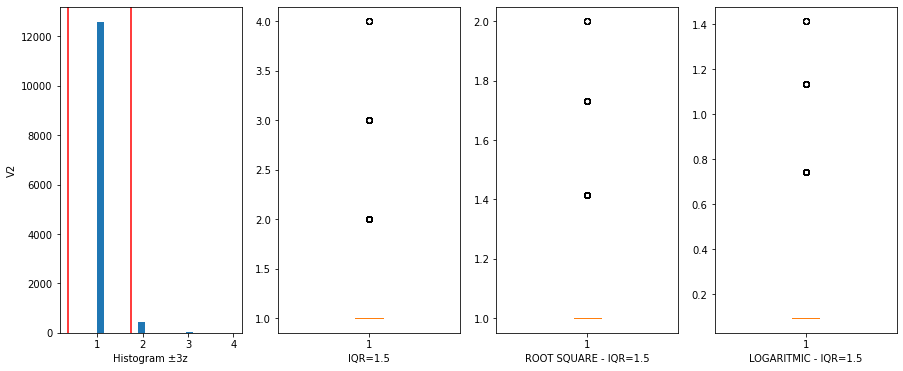

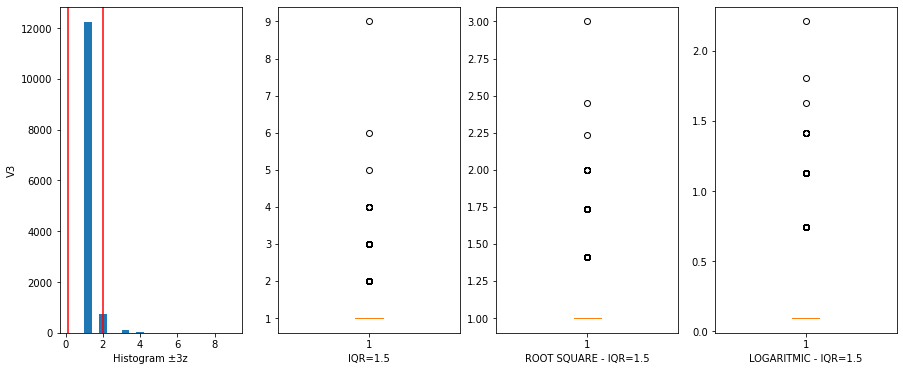

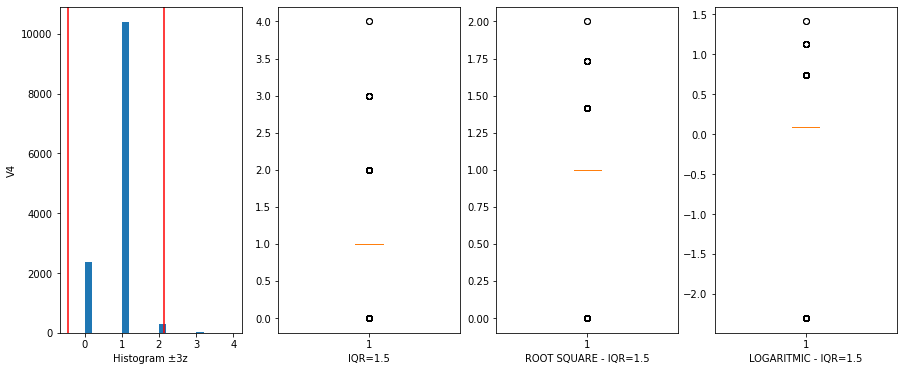

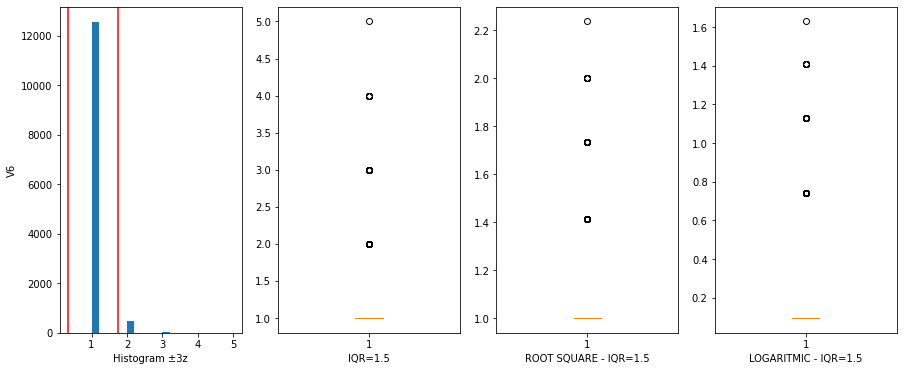

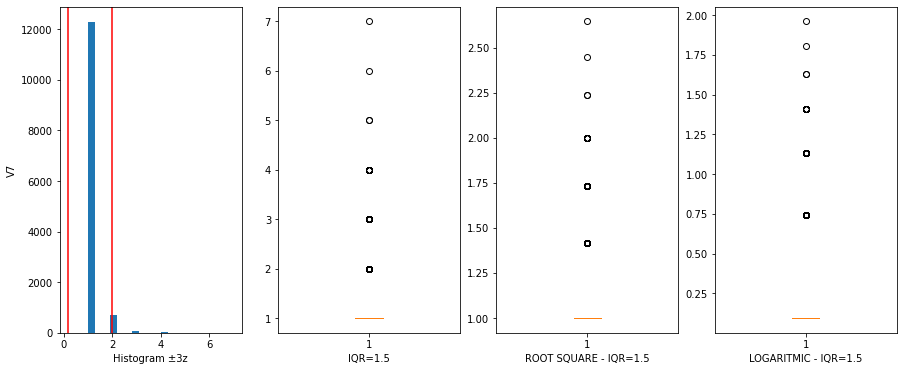

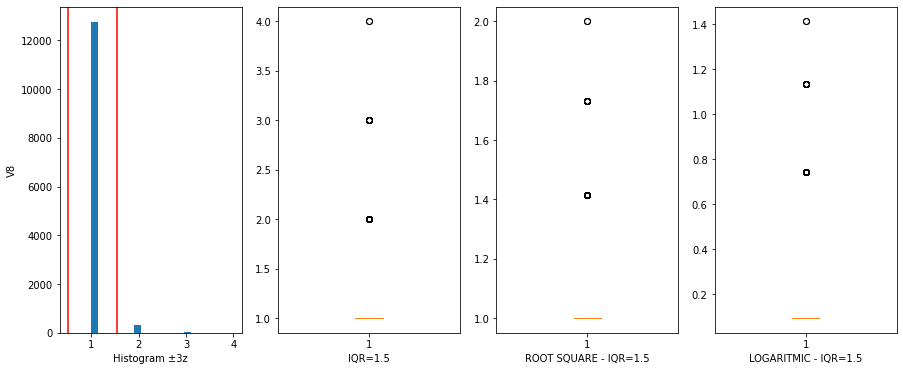

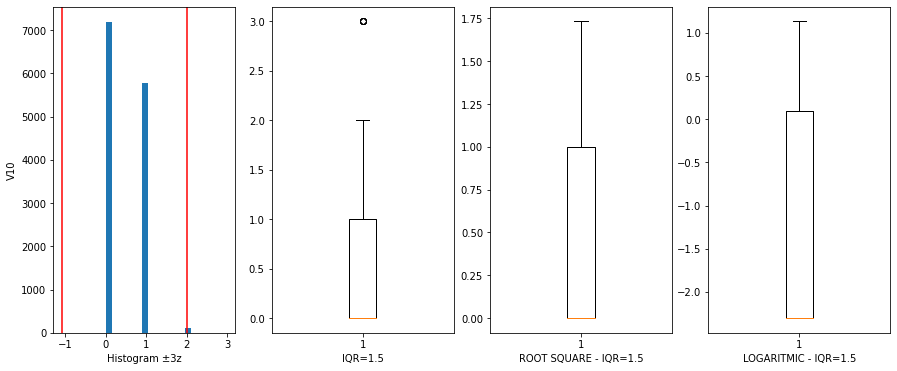

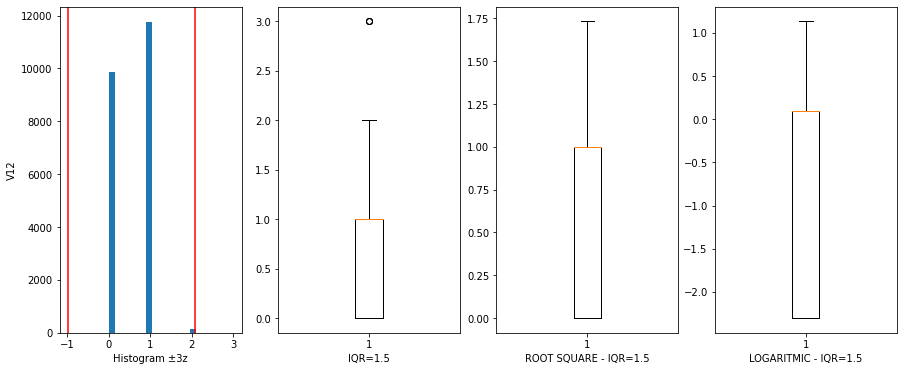

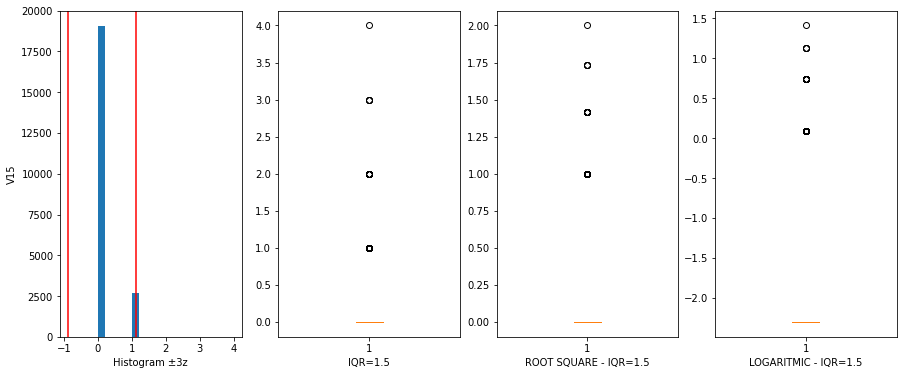

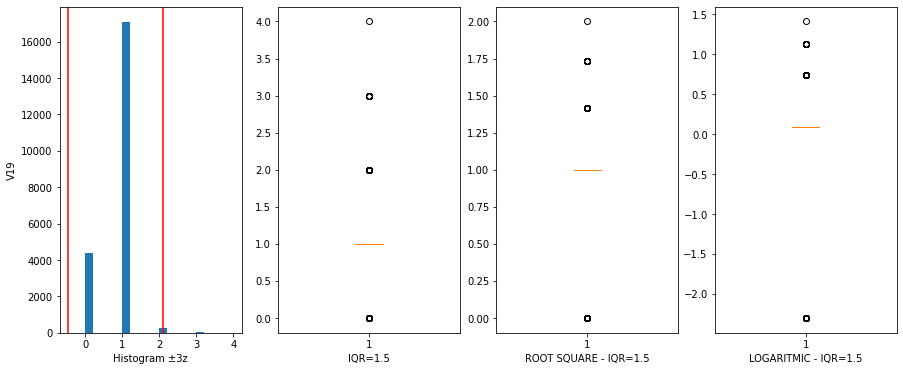

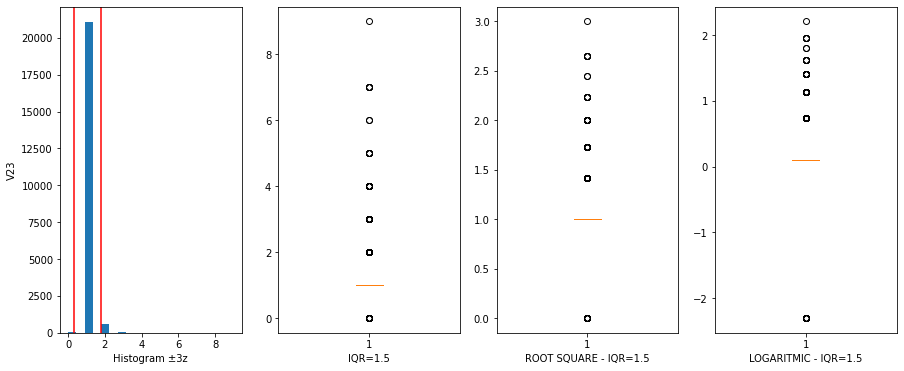

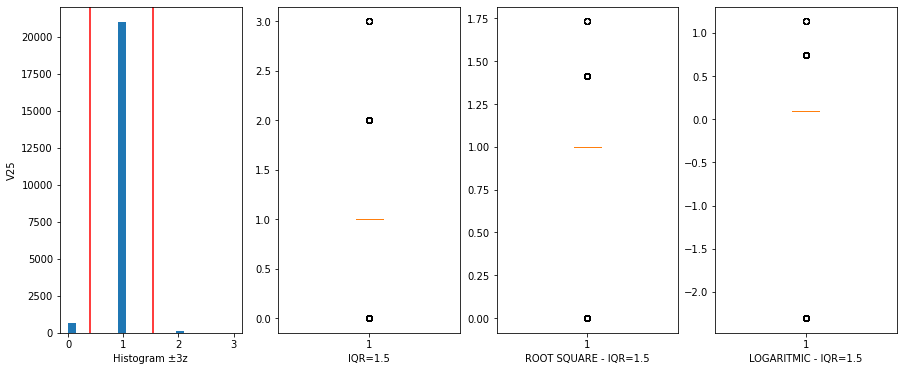

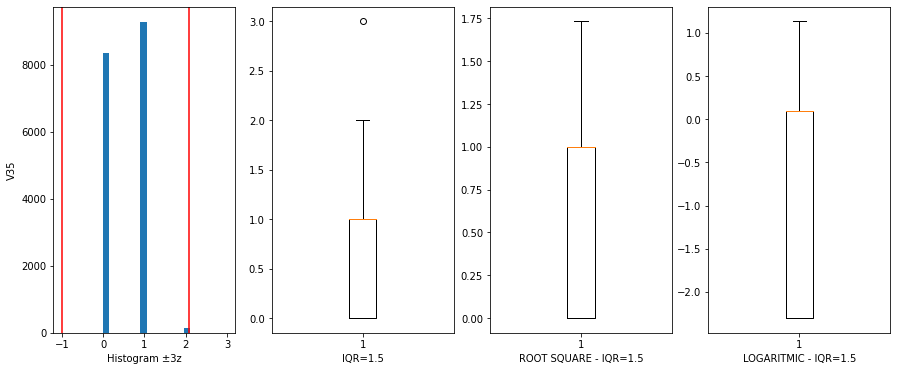

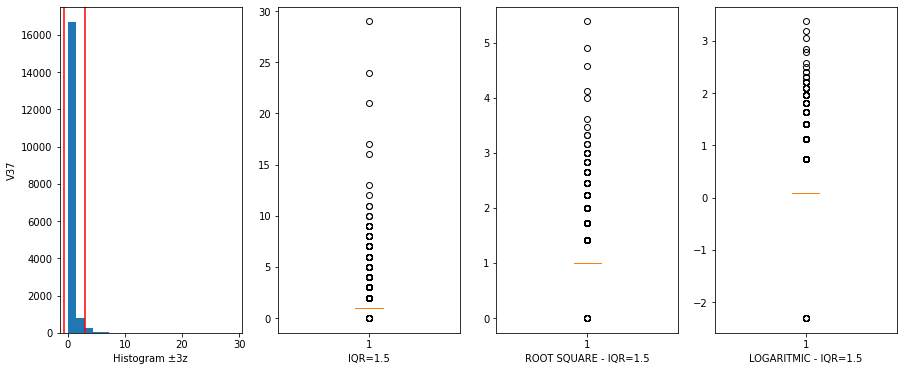

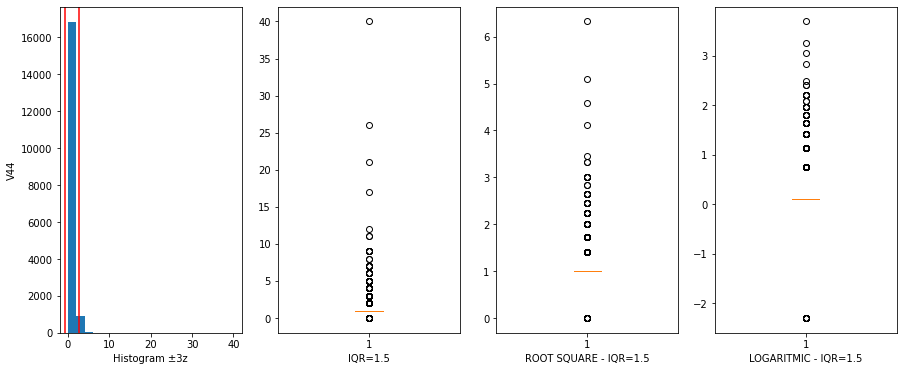

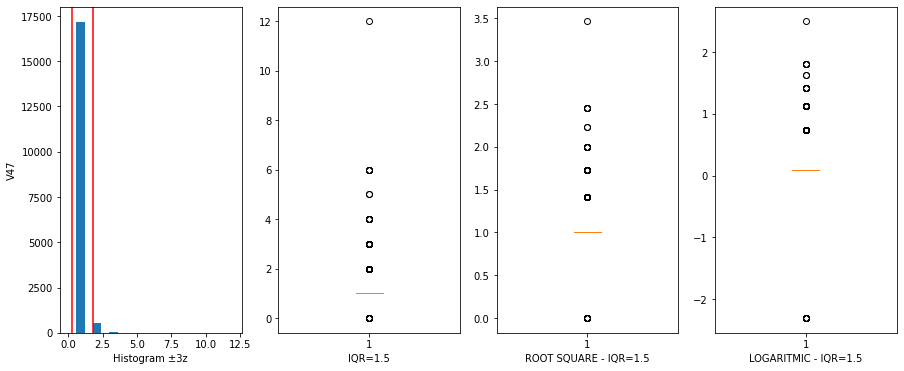

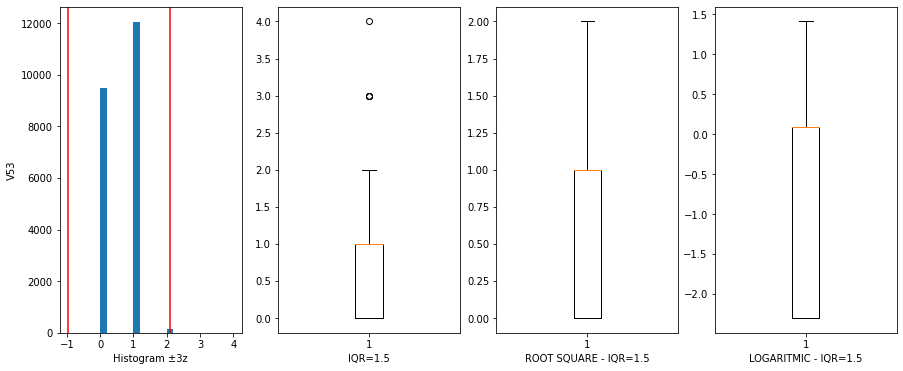

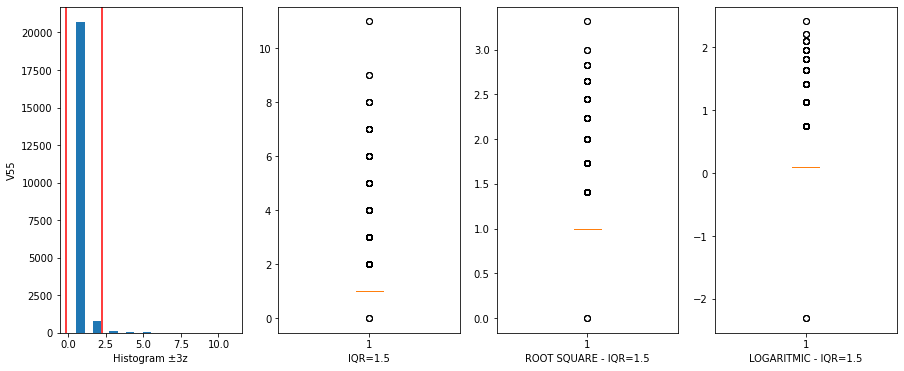

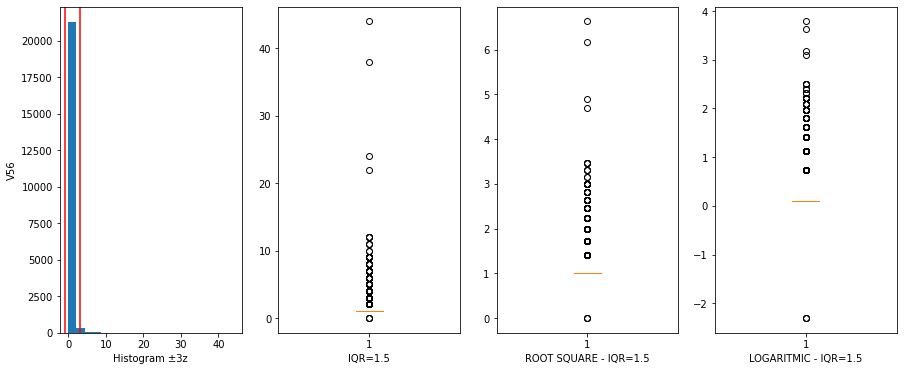

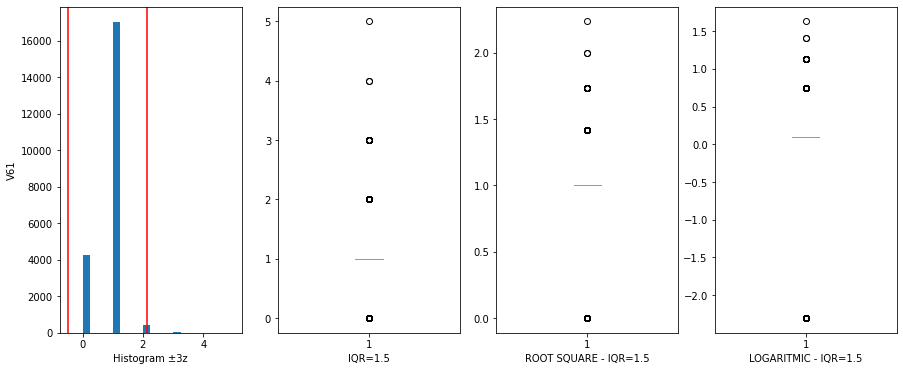

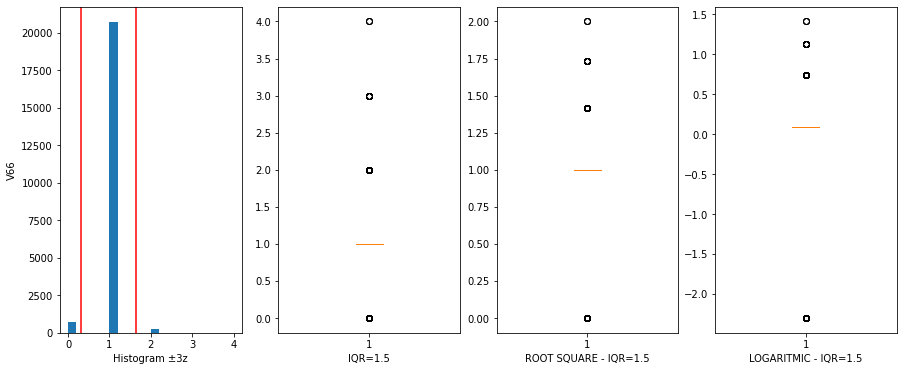

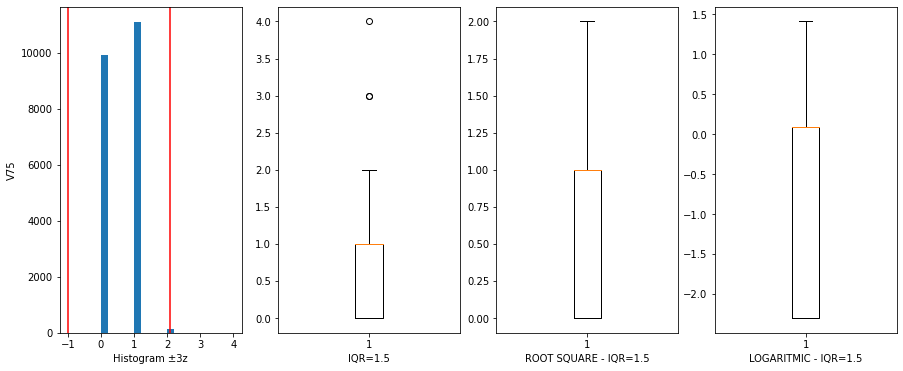

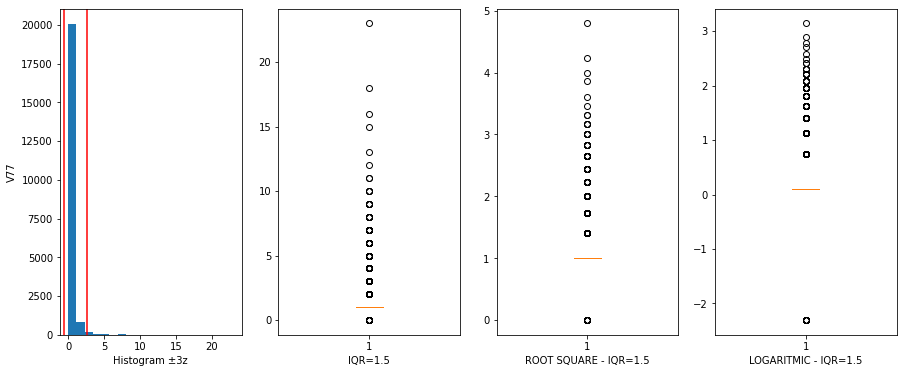

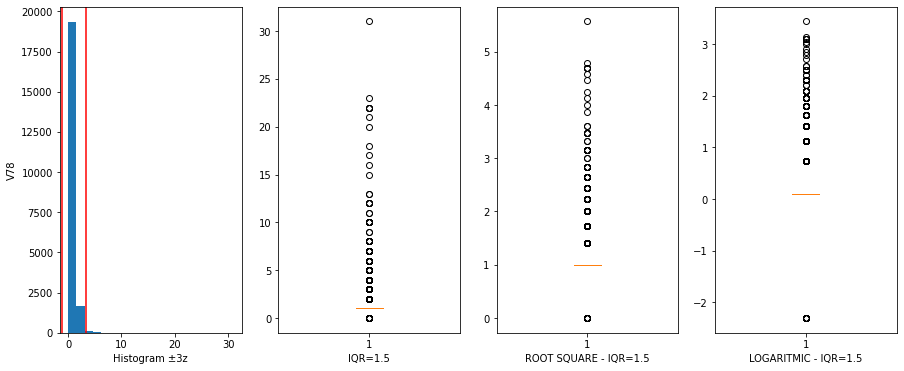

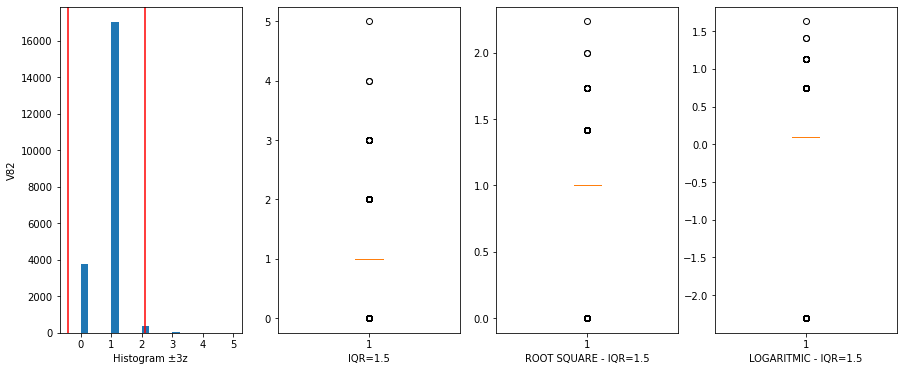

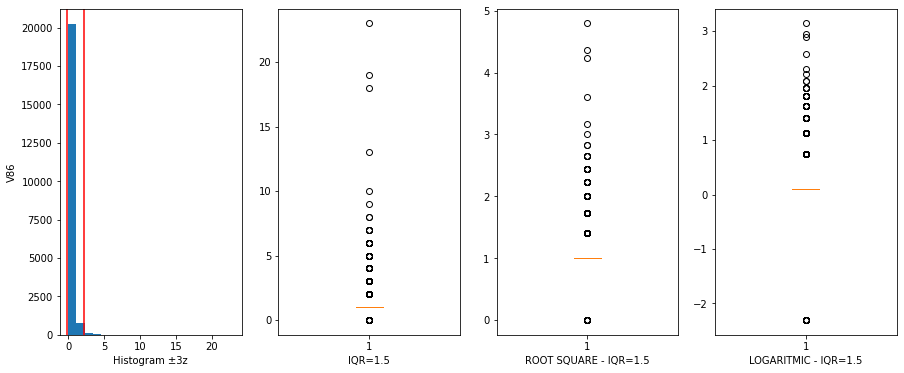

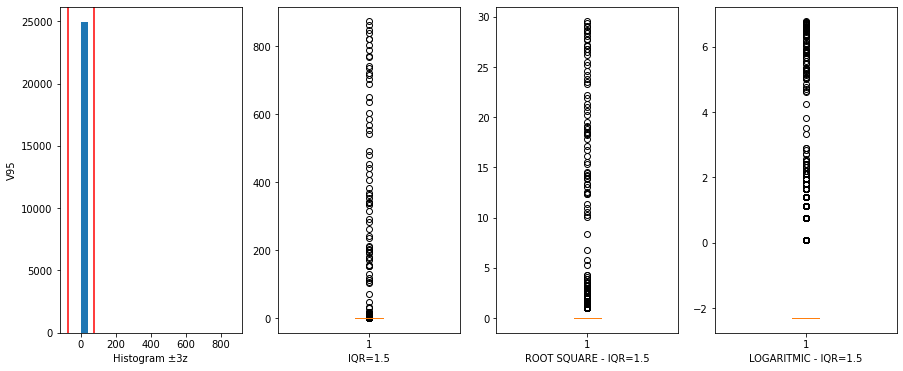

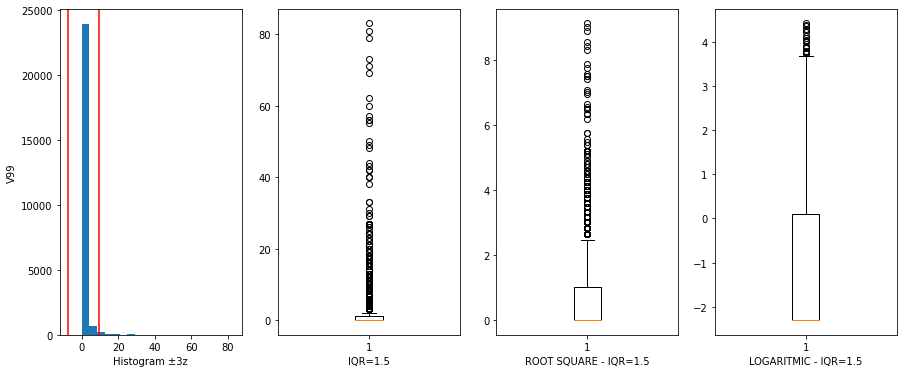

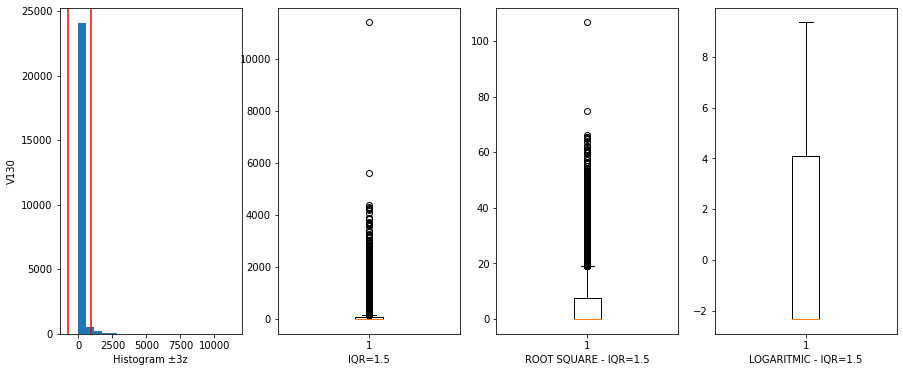

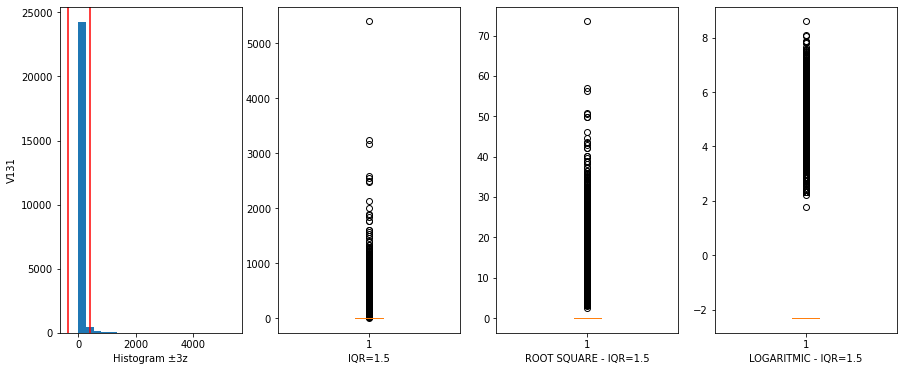

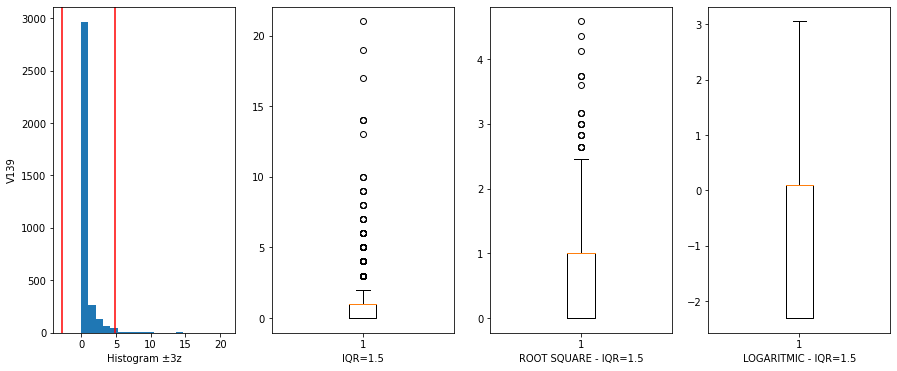

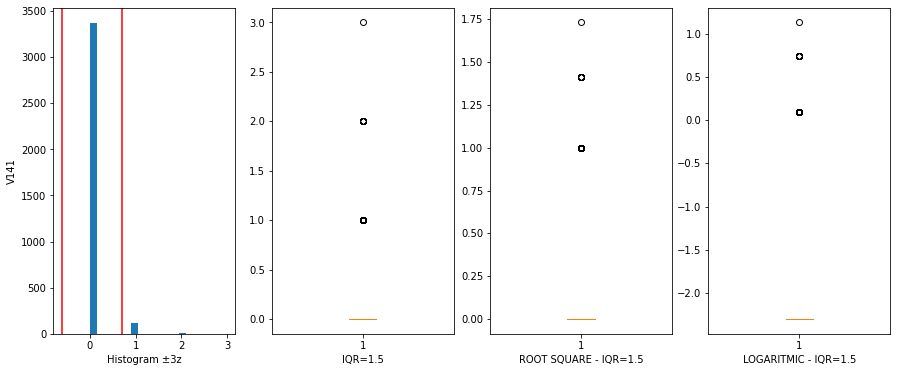

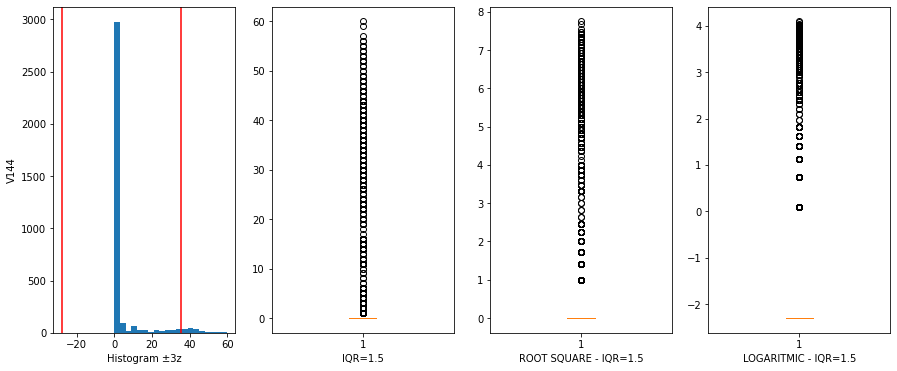

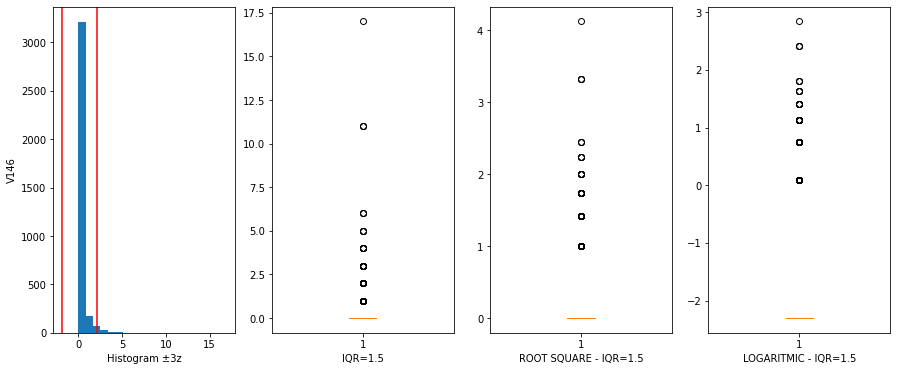

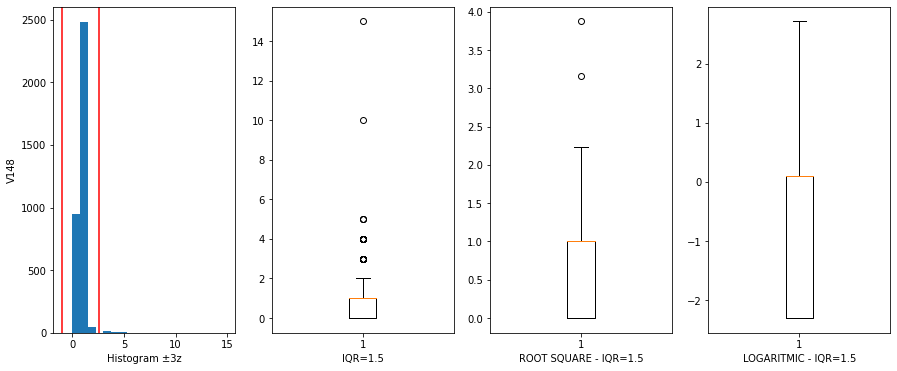

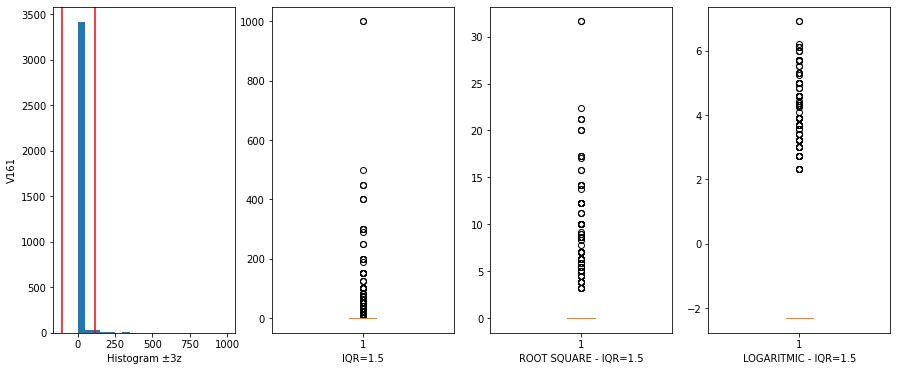

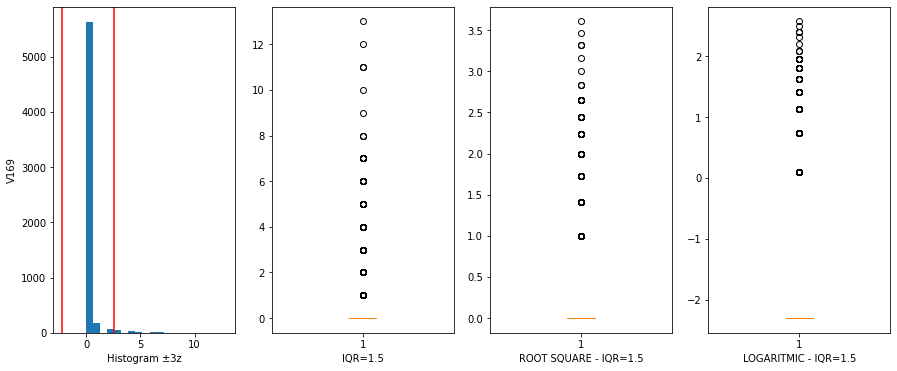

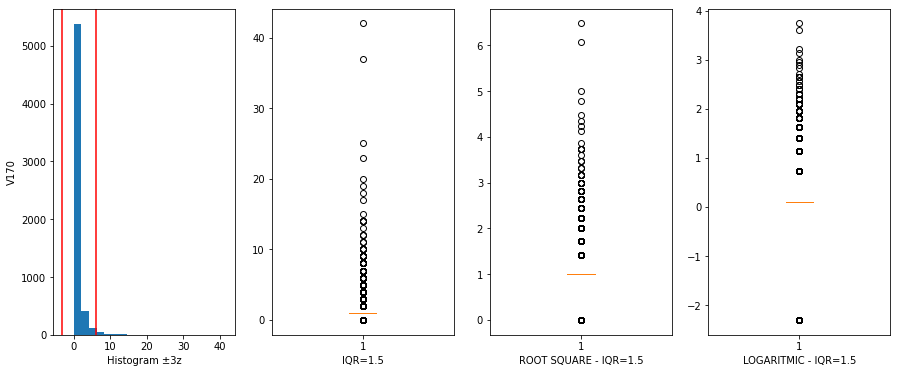

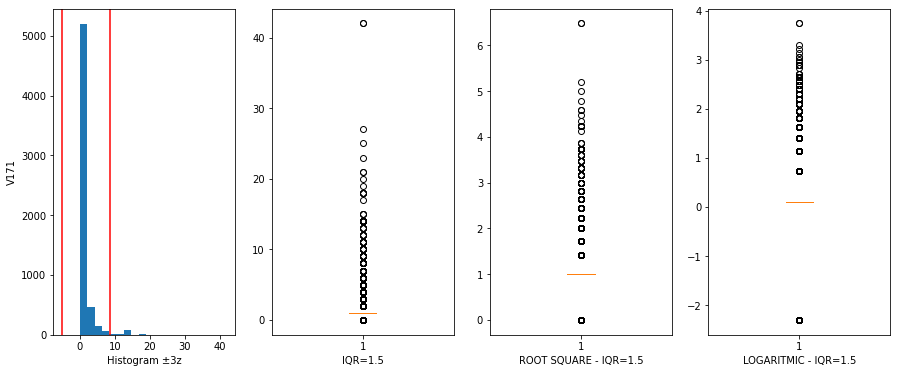

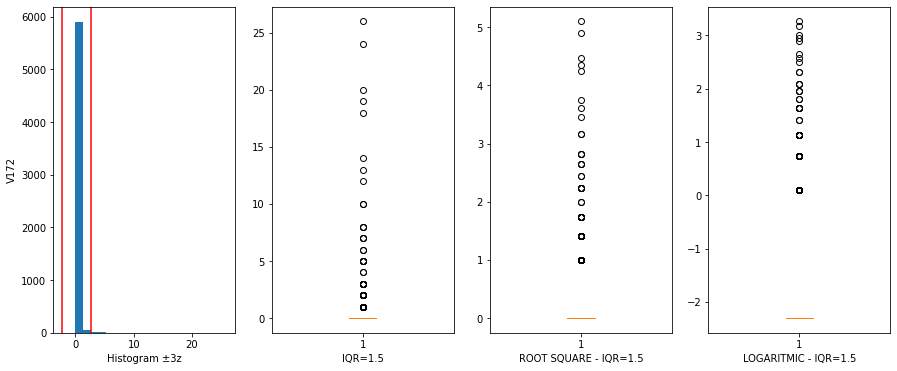

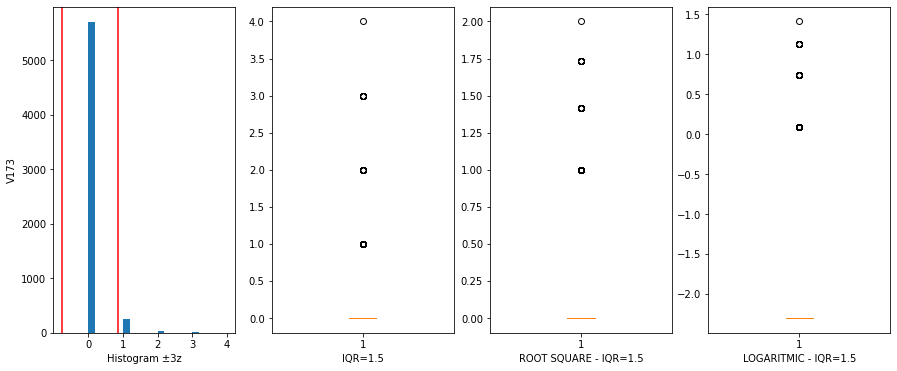

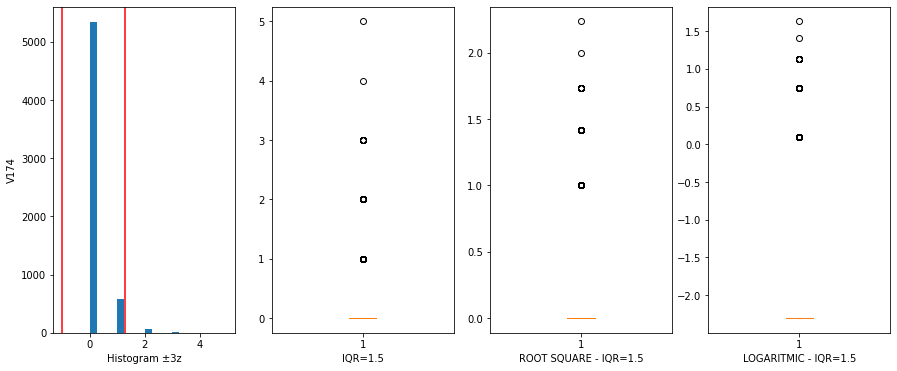

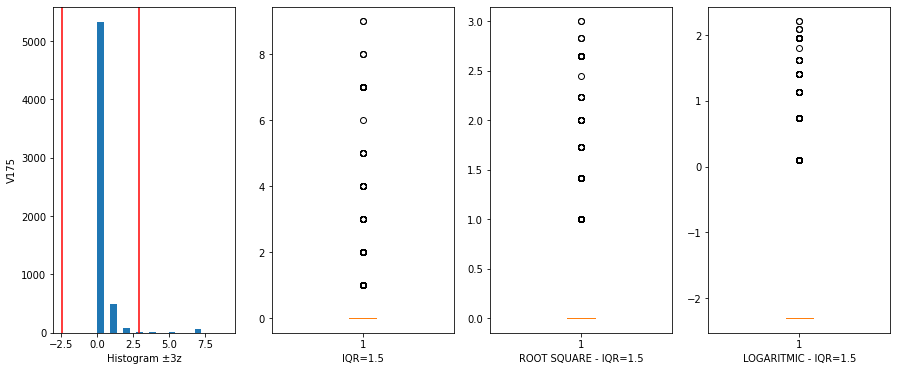

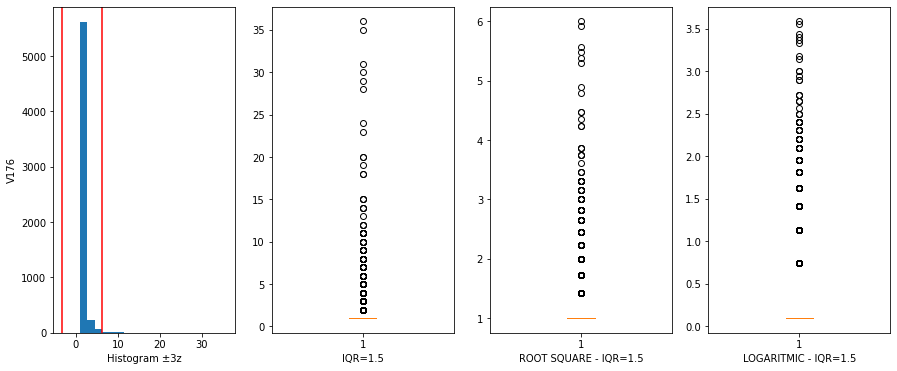

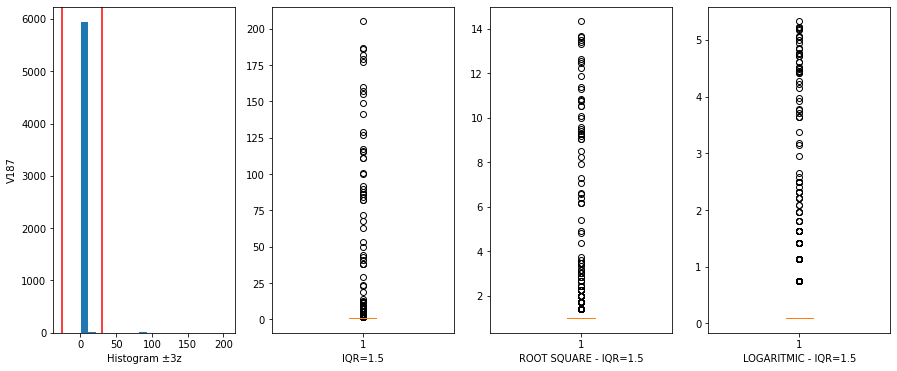

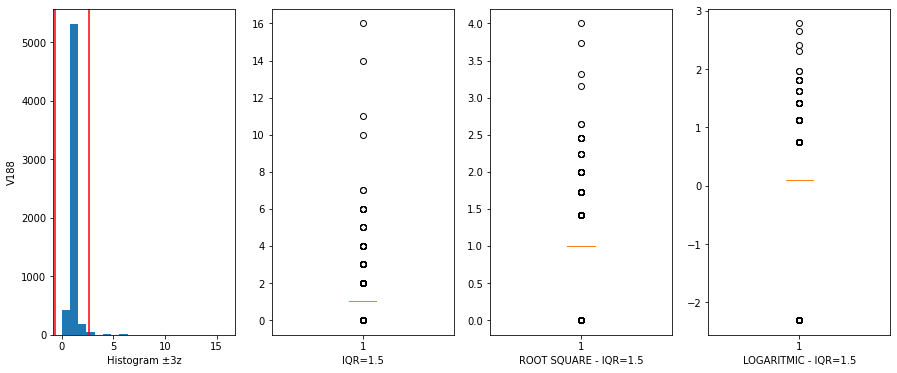

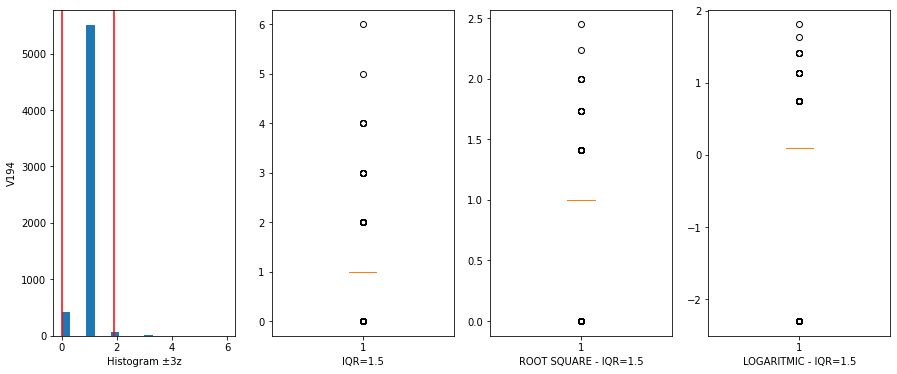

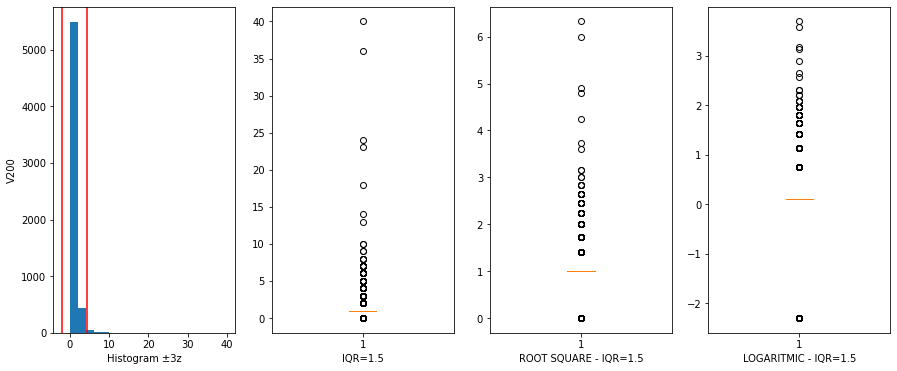

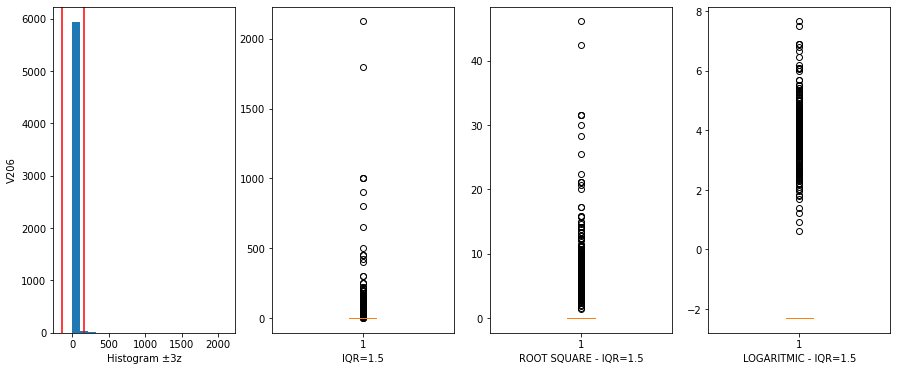

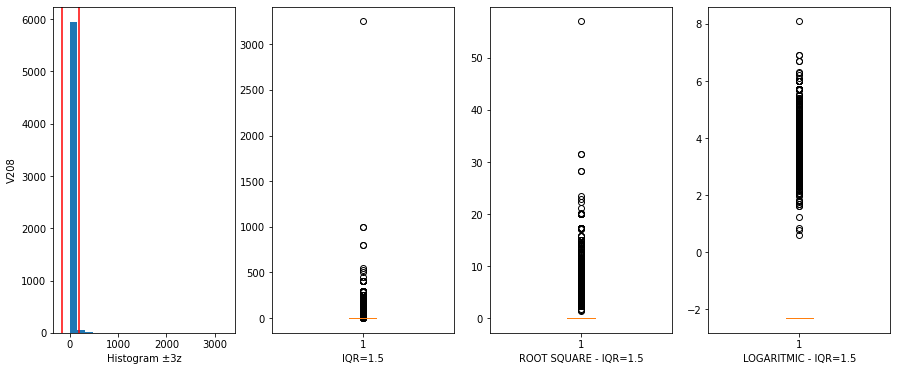

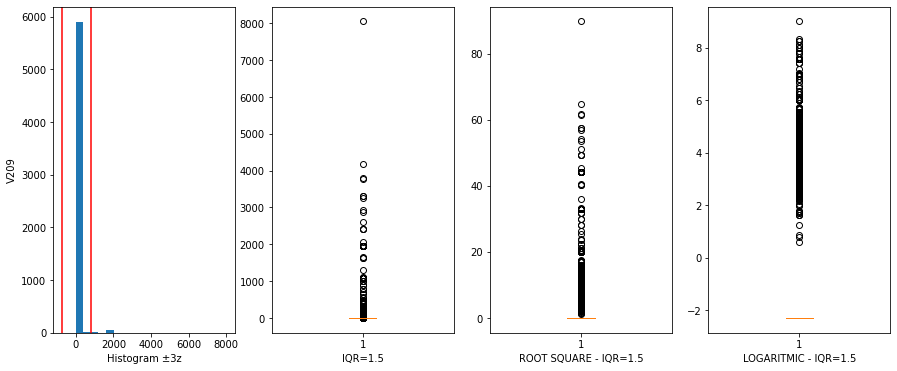

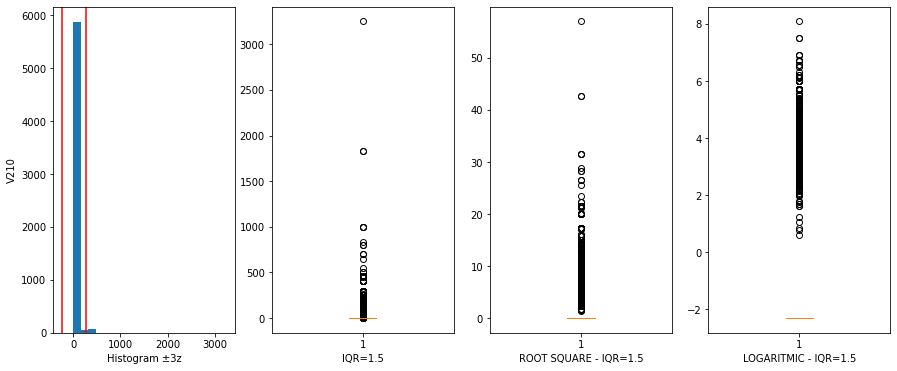

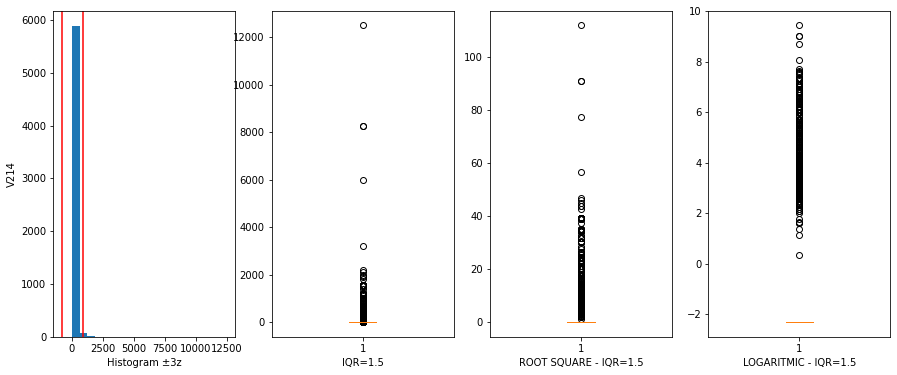

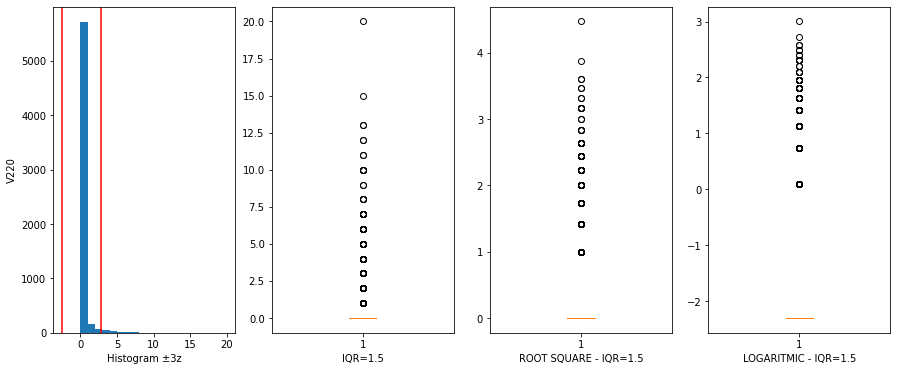

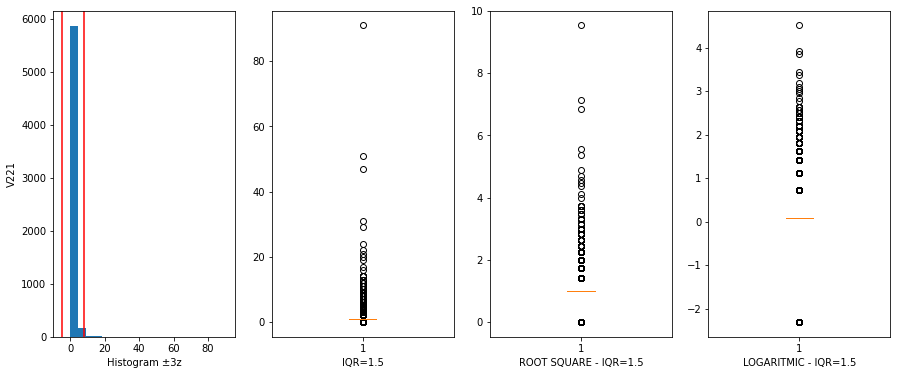

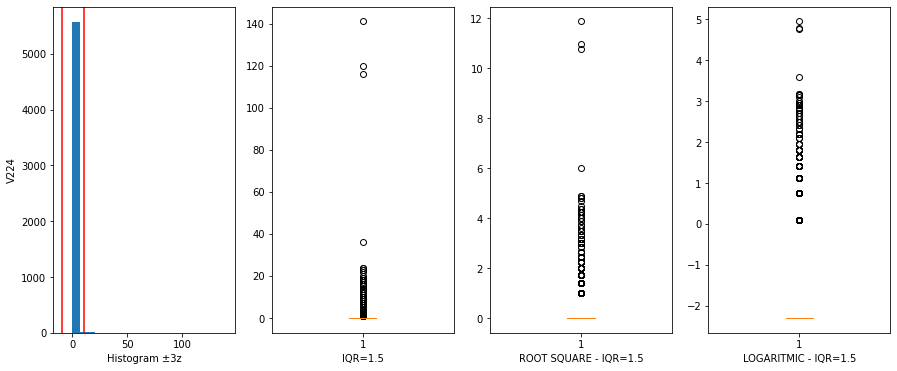

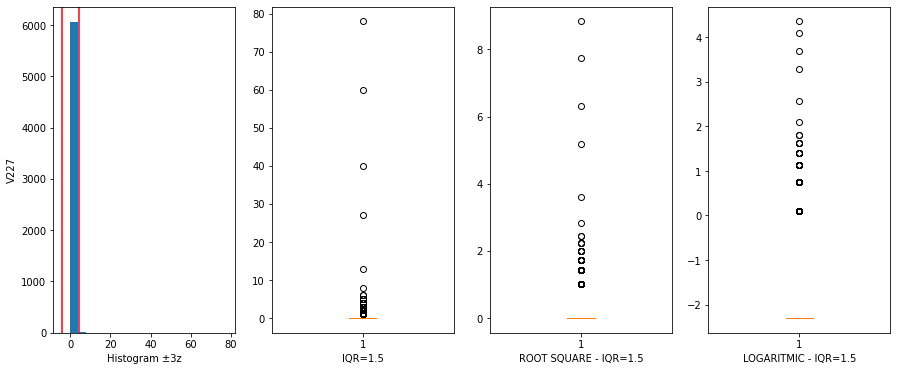

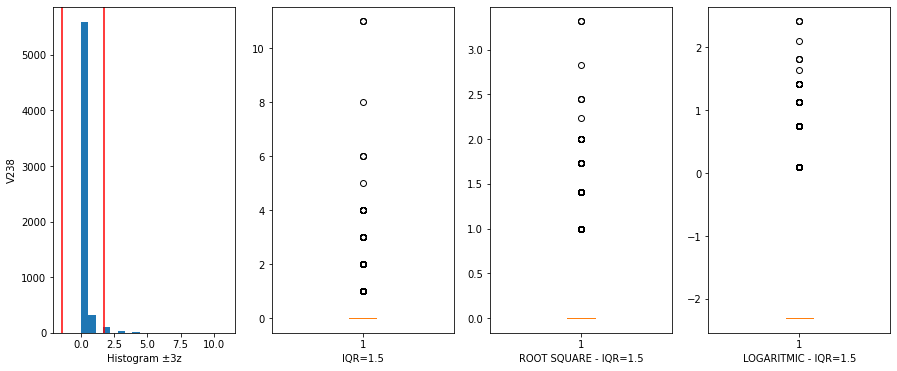

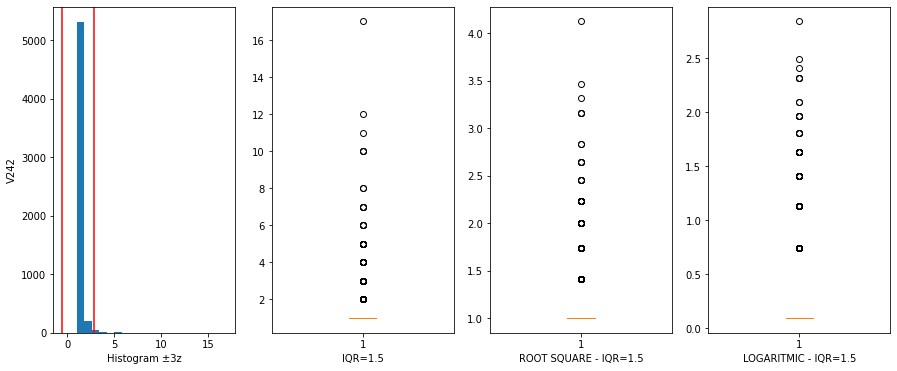

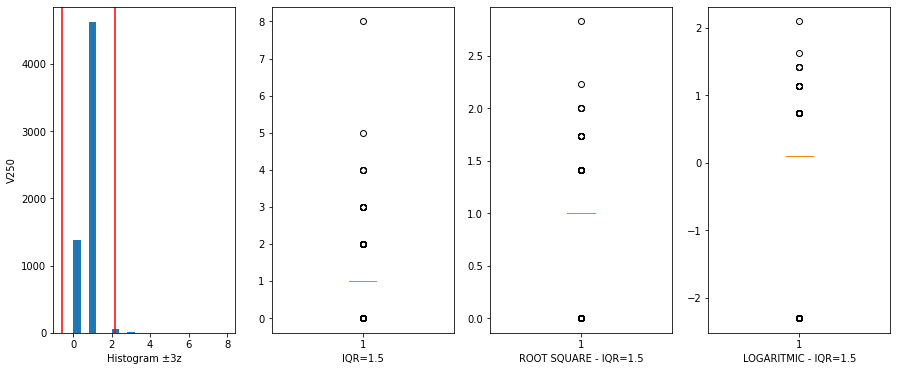

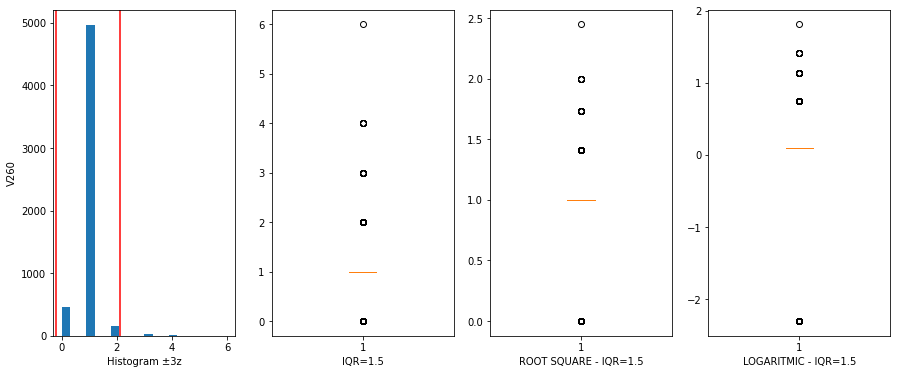

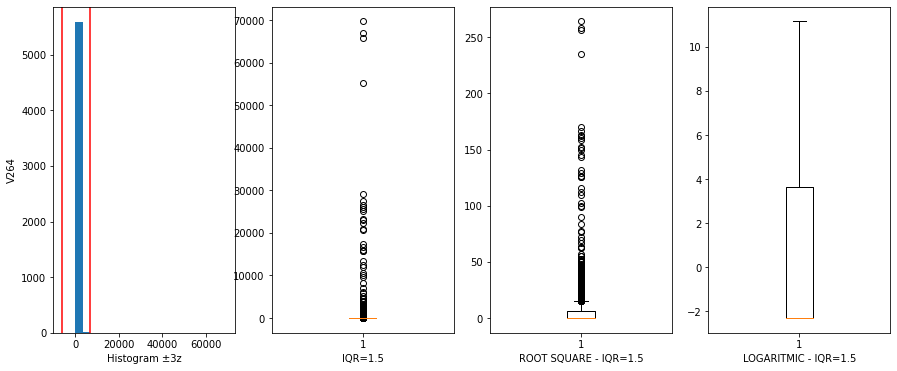

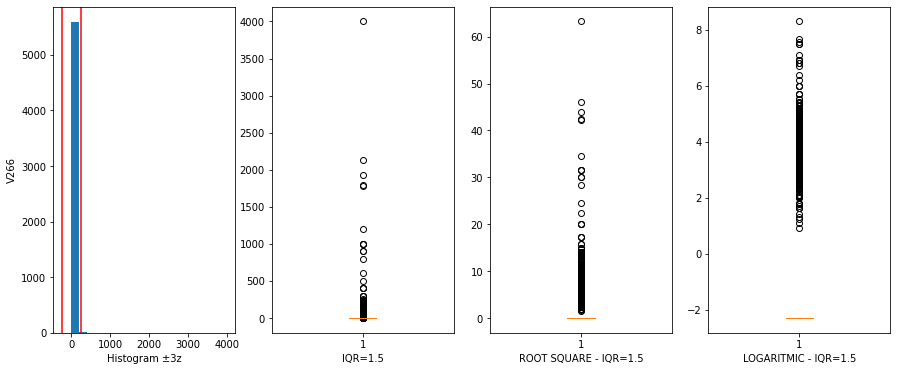

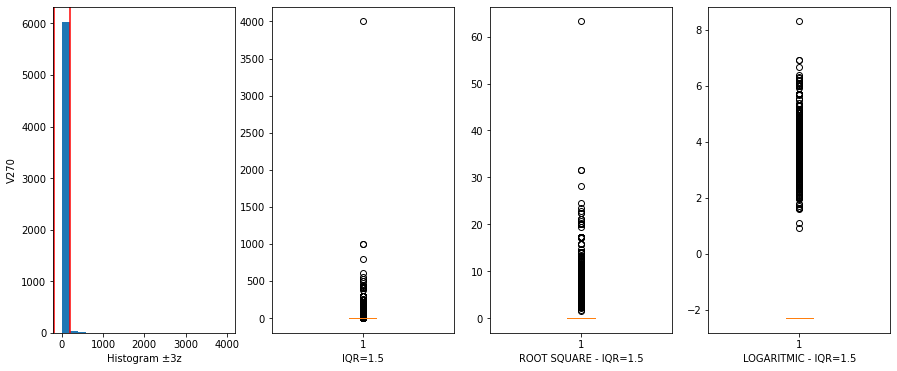

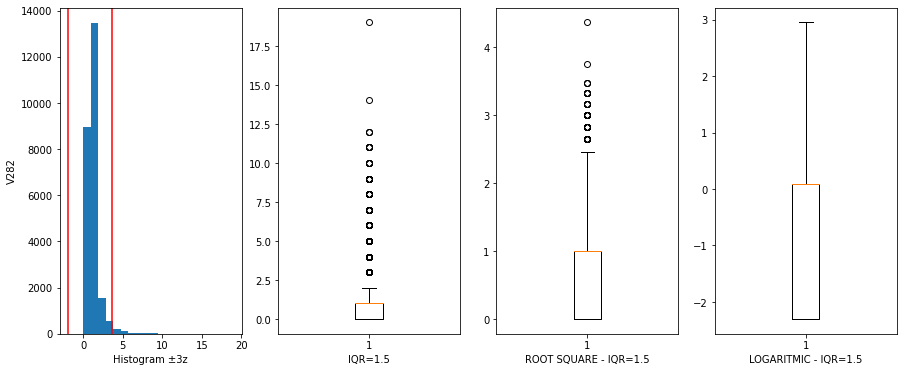

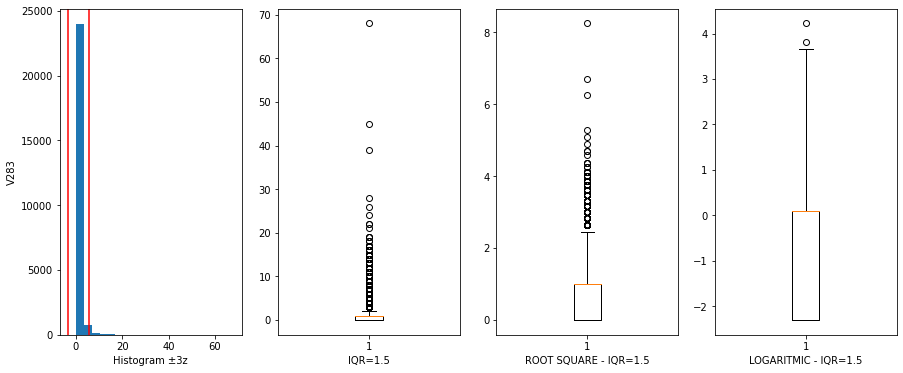

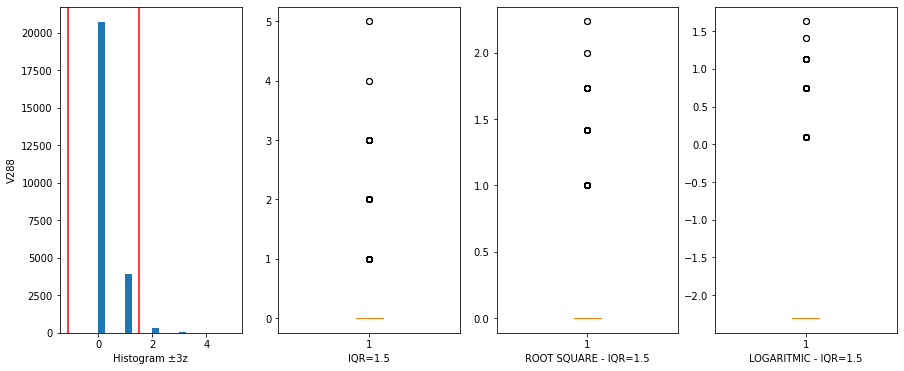

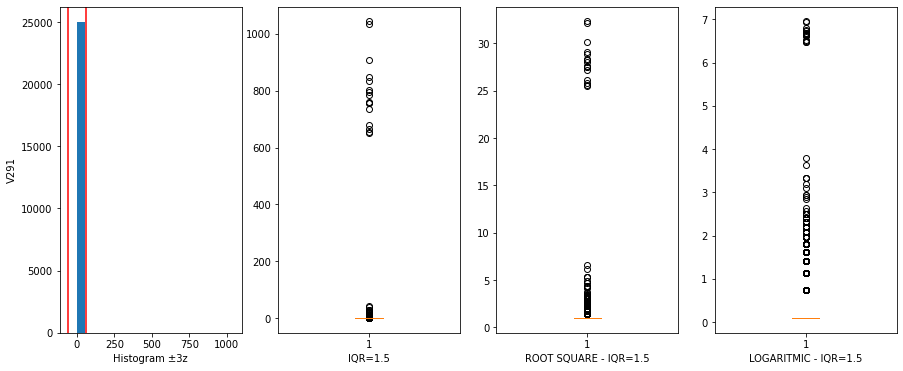

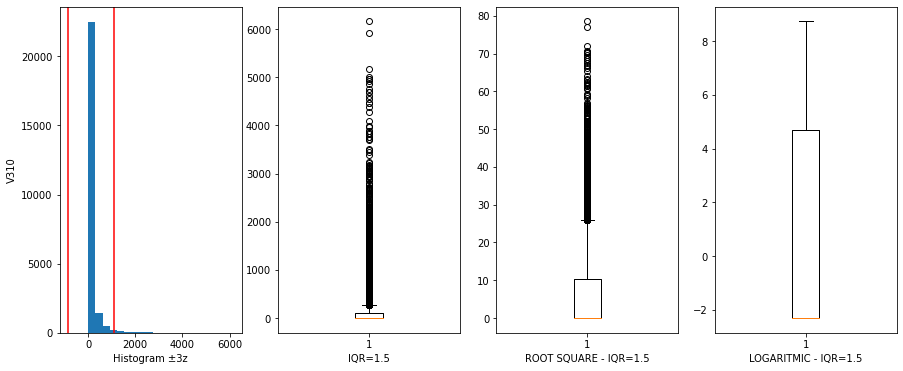

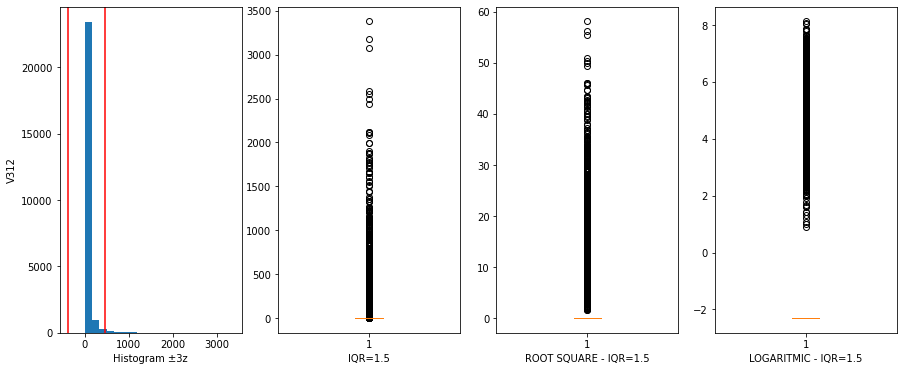

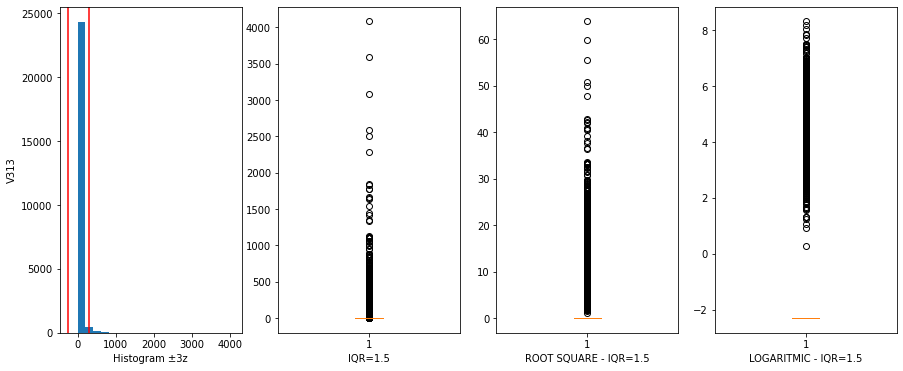

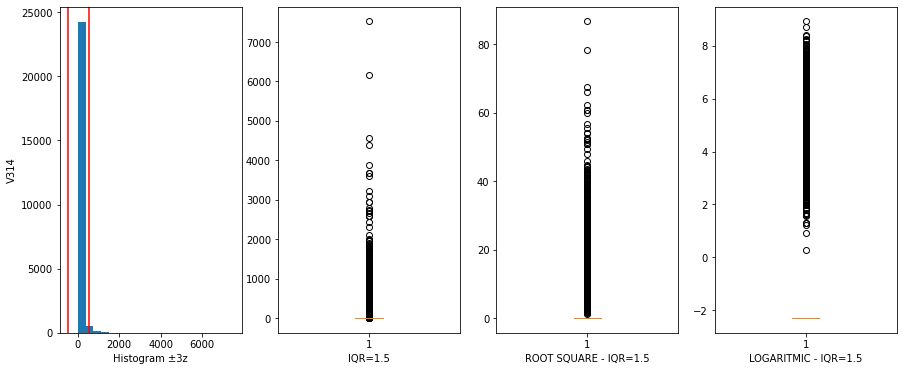

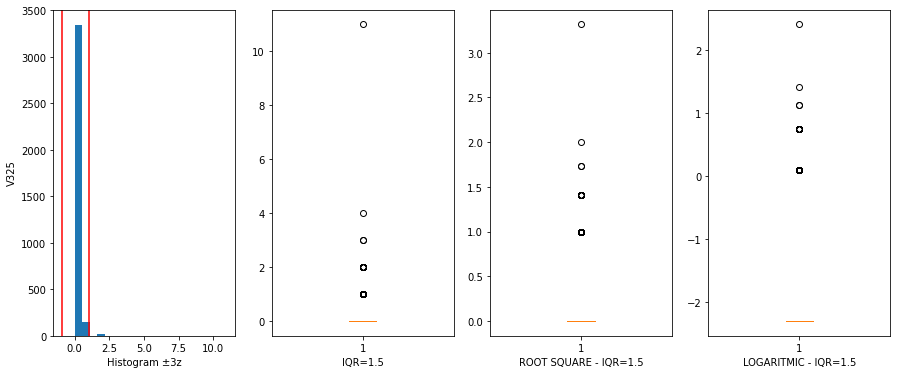

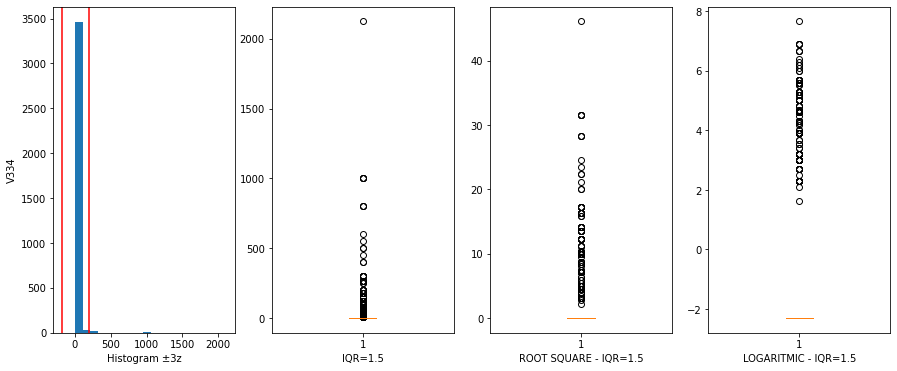

In [1284]:
for col in columns:
  col_plot(df[col].dropna().to_frame(),col)

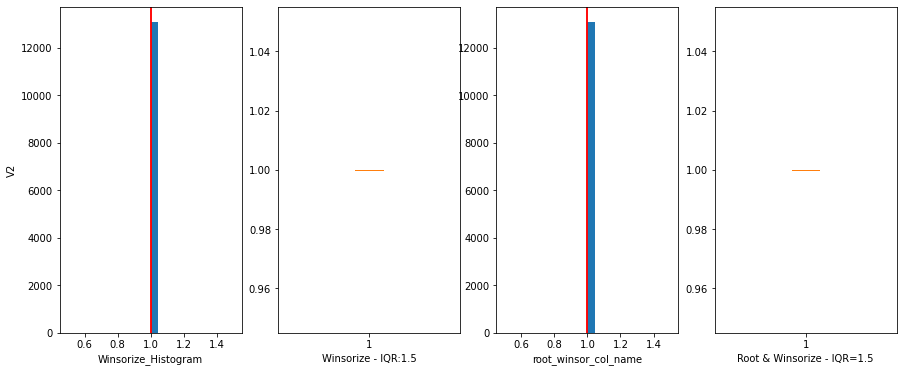

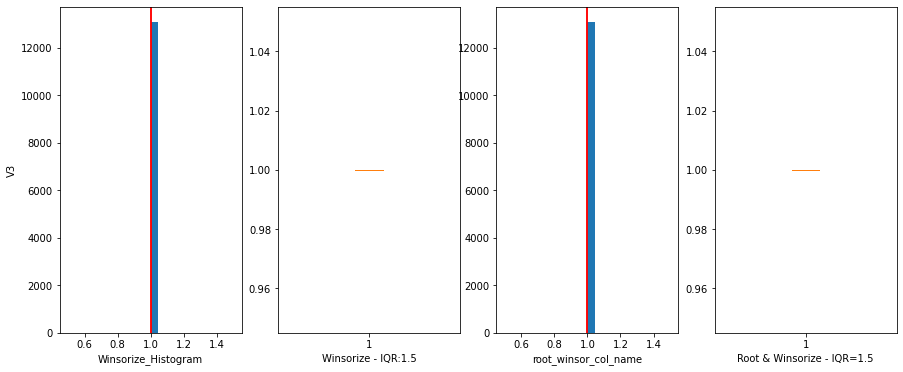

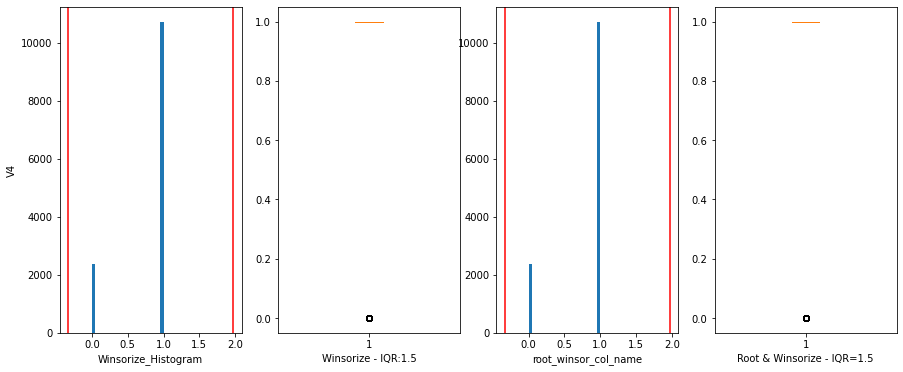

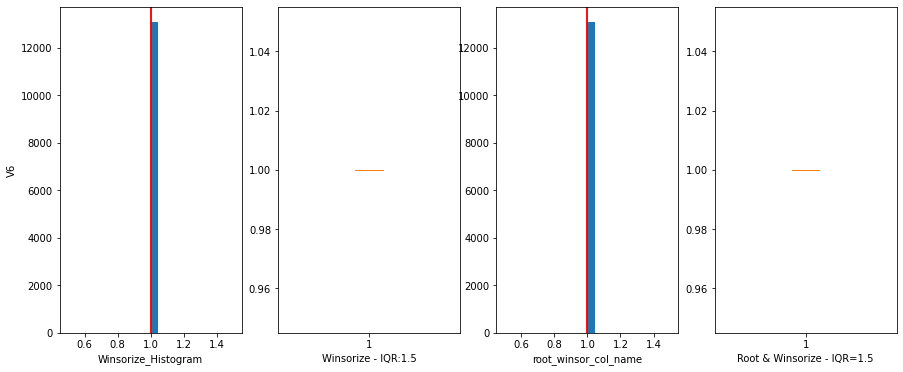

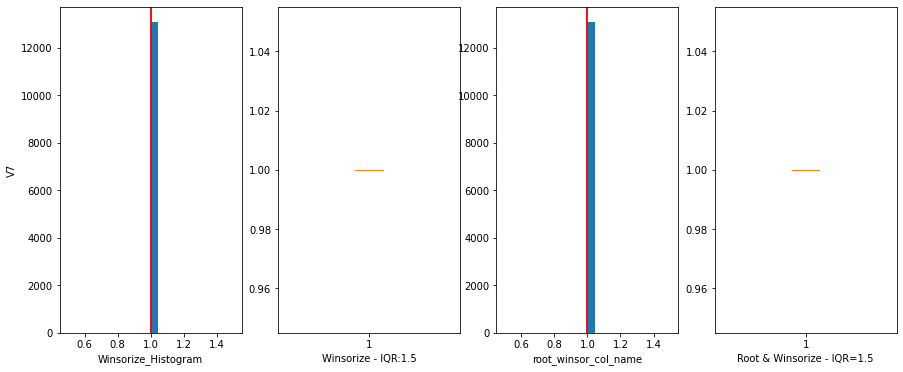

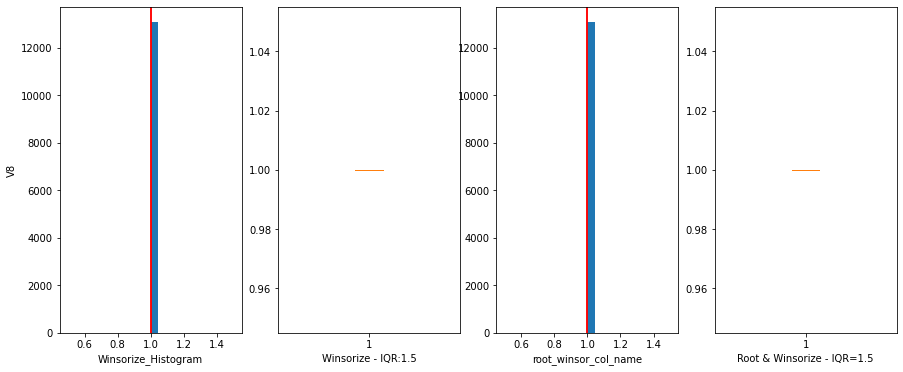

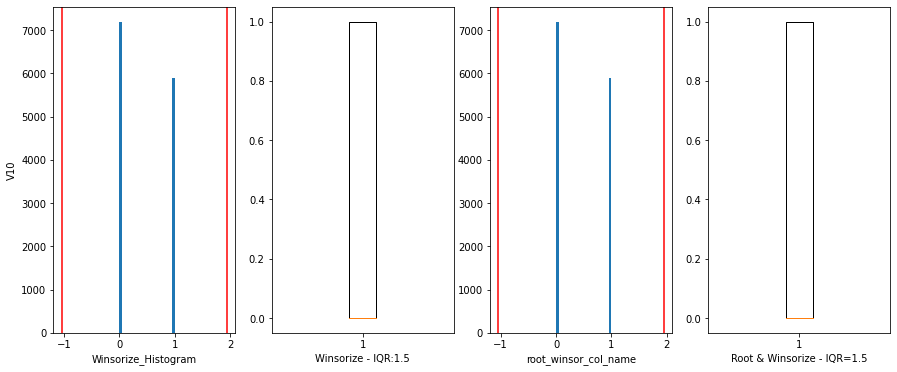

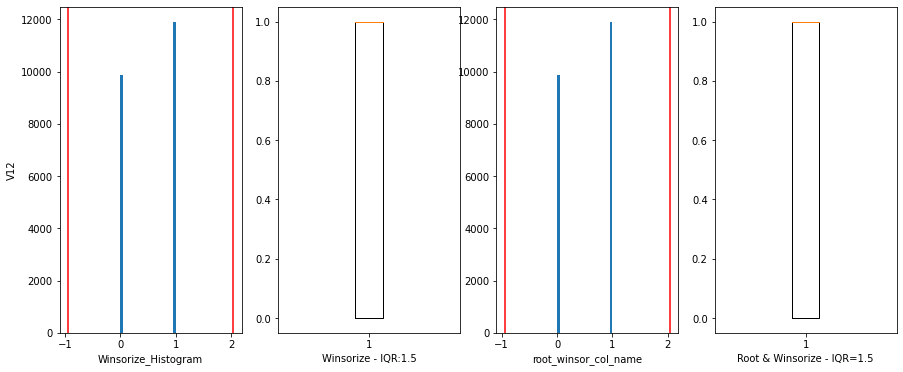

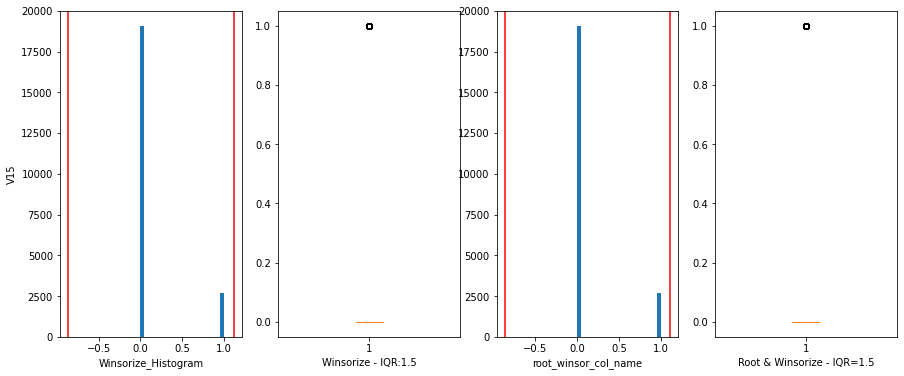

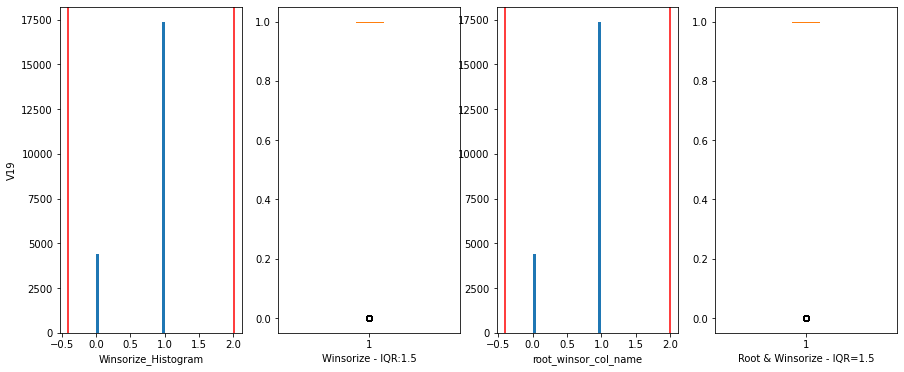

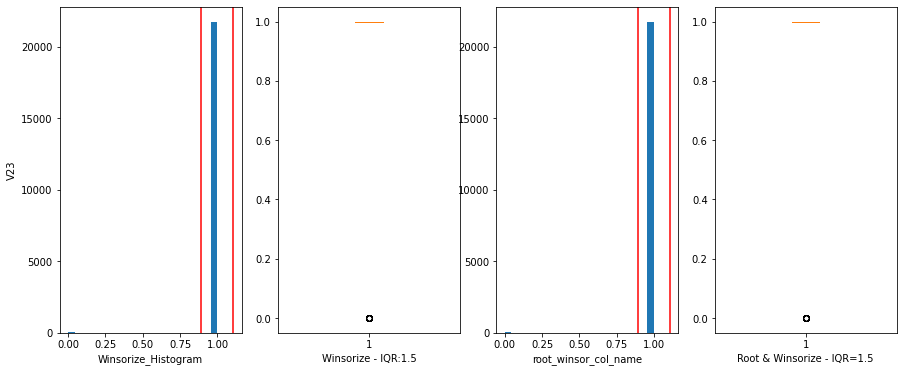

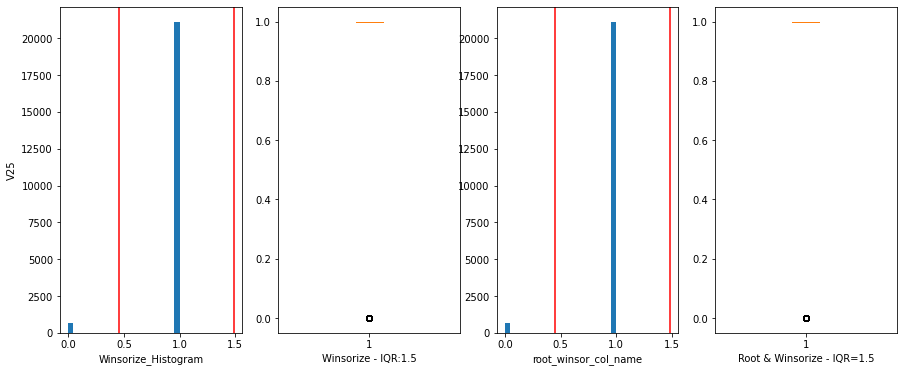

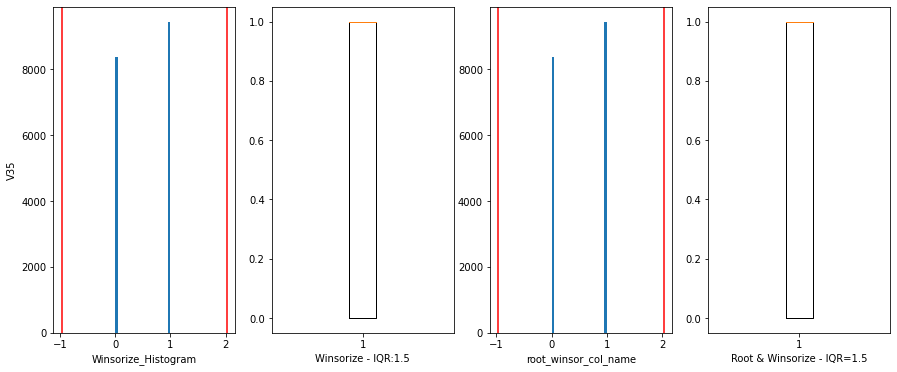

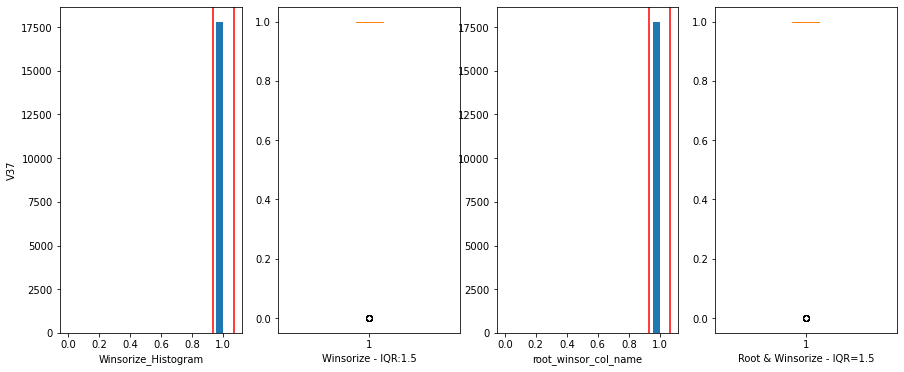

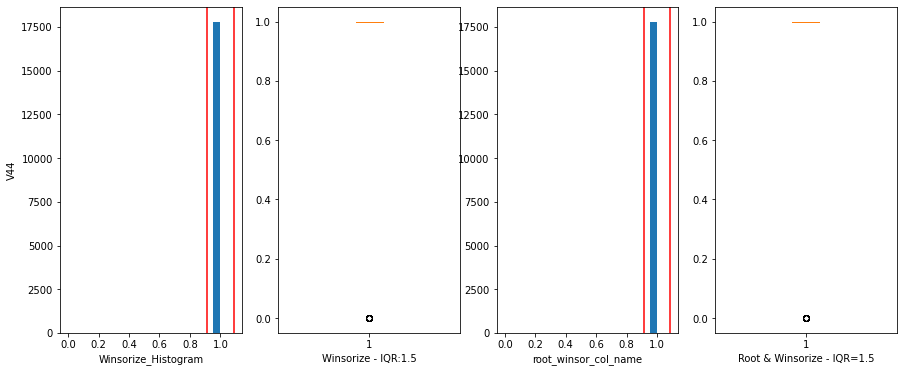

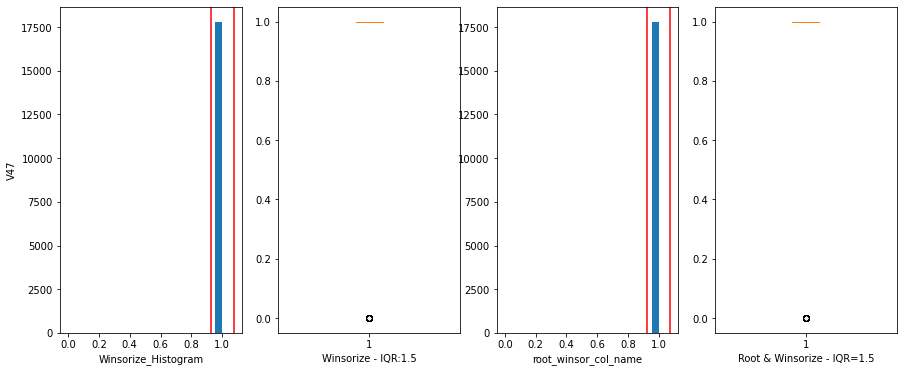

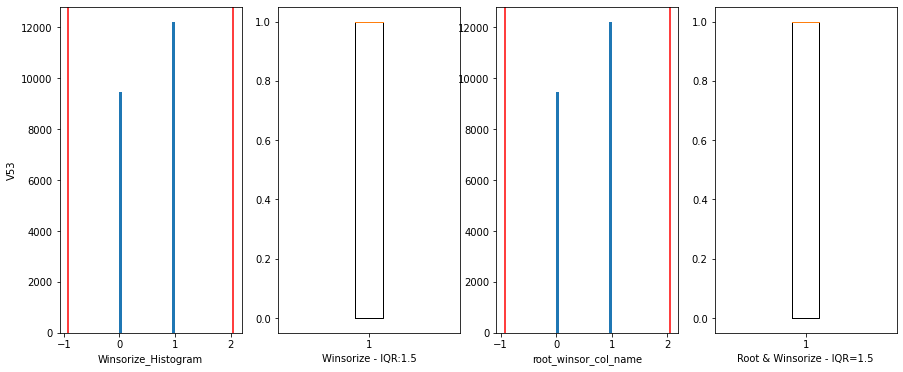

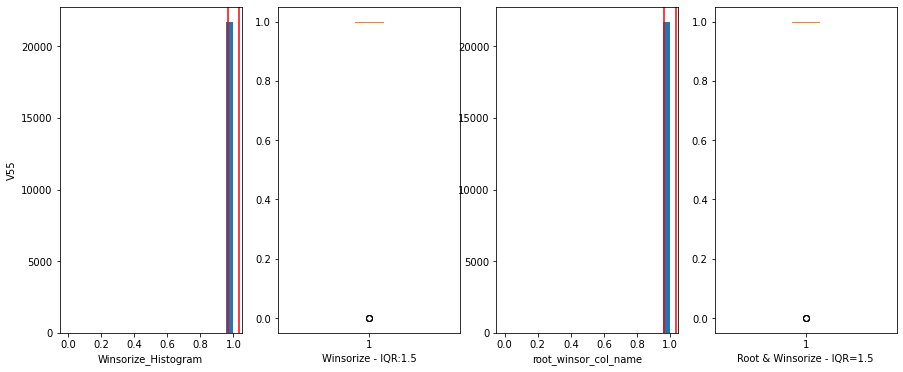

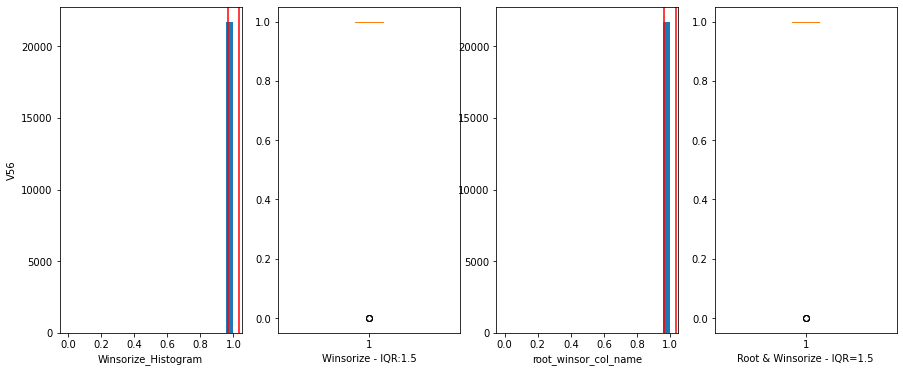

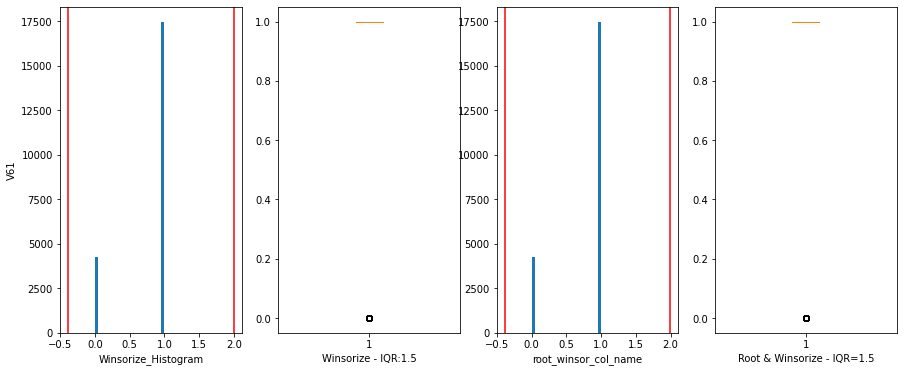

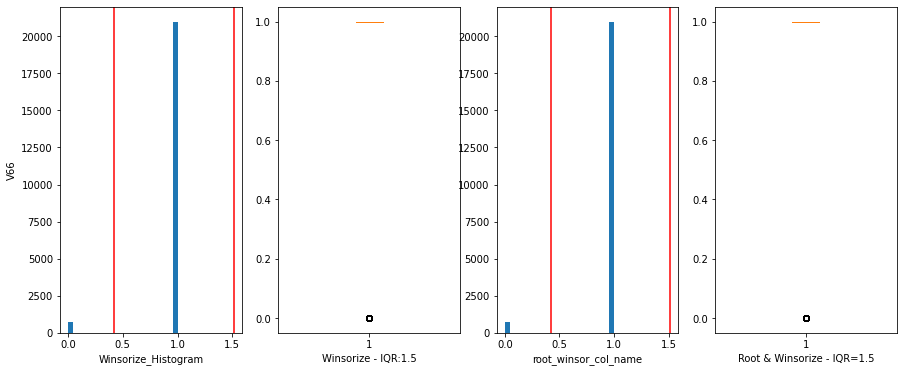

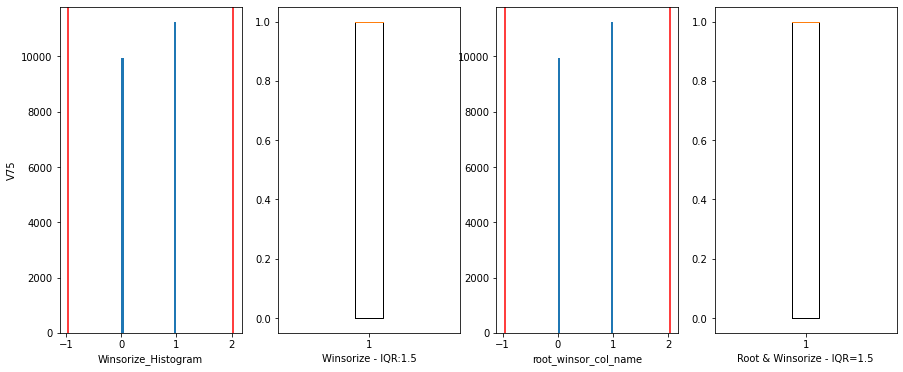

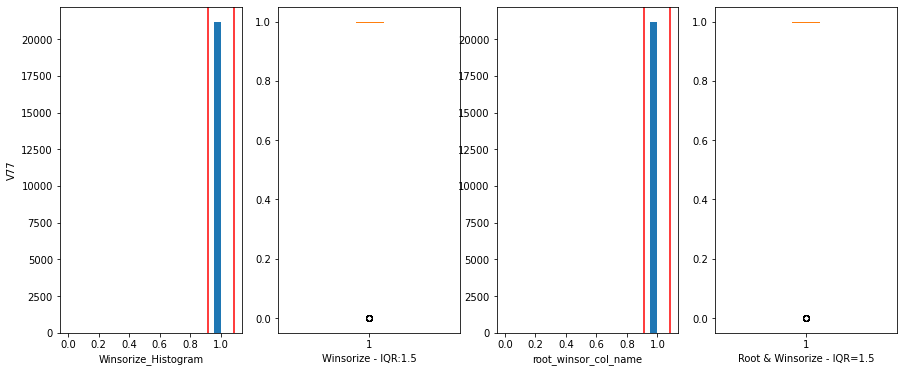

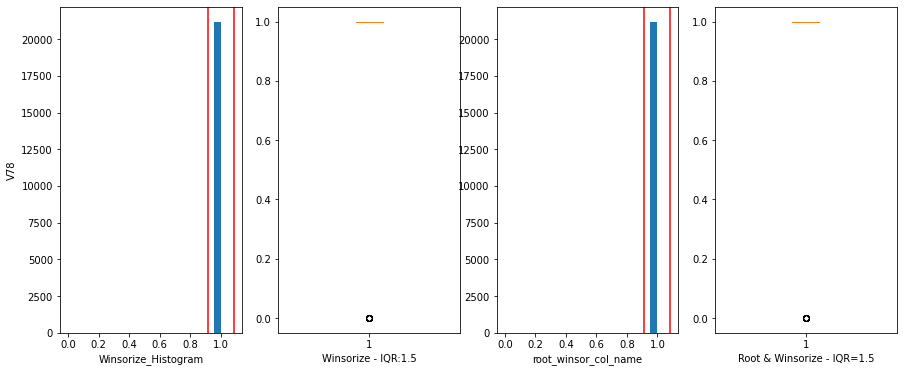

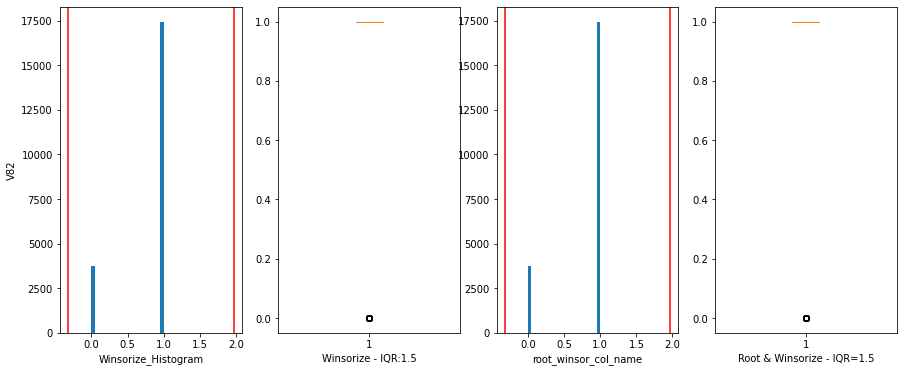

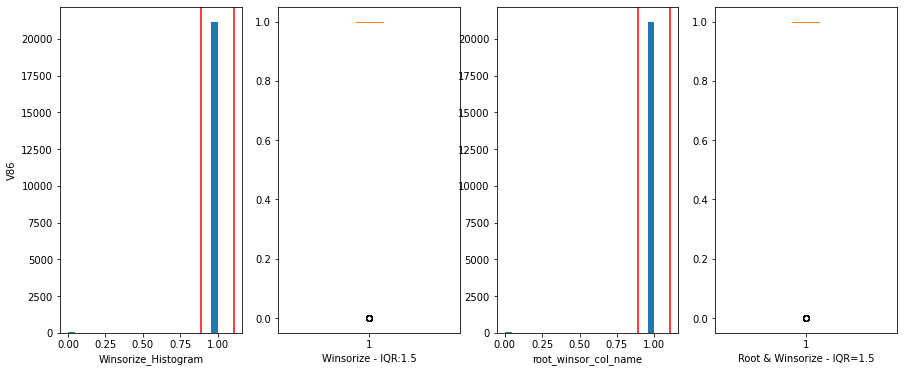

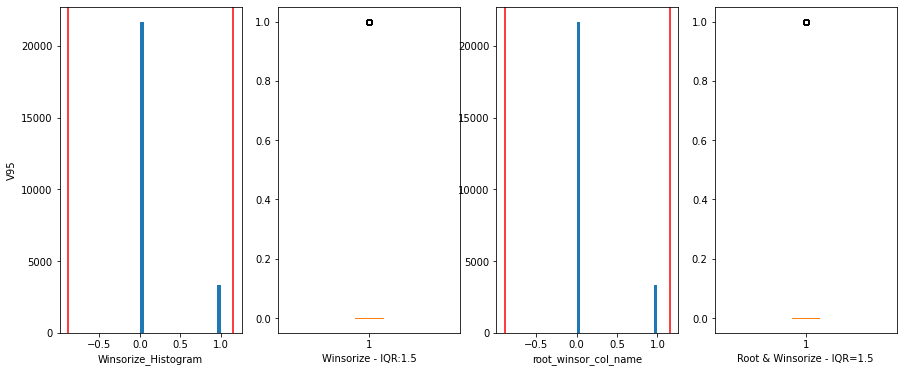

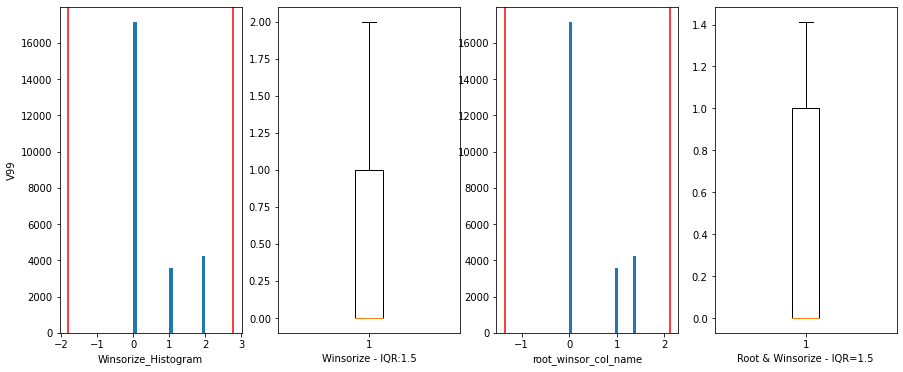

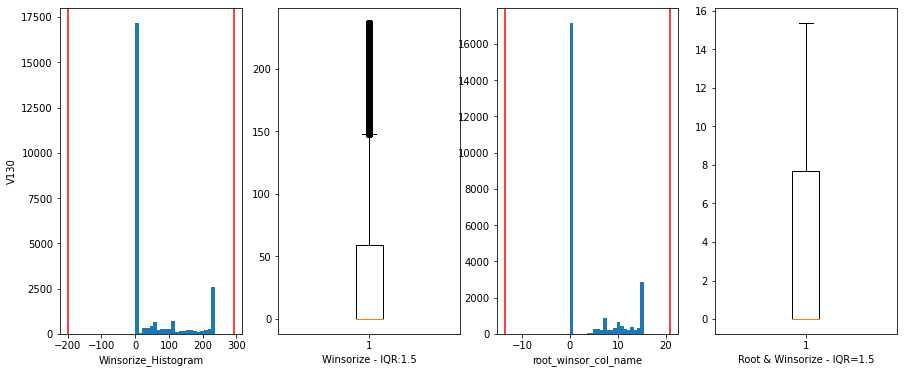

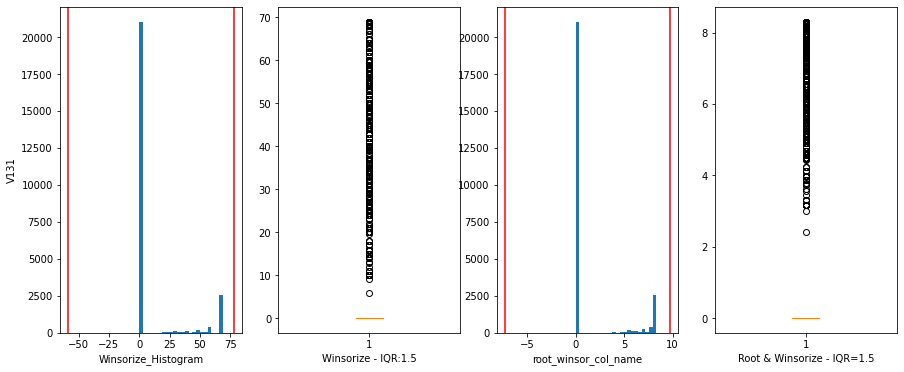

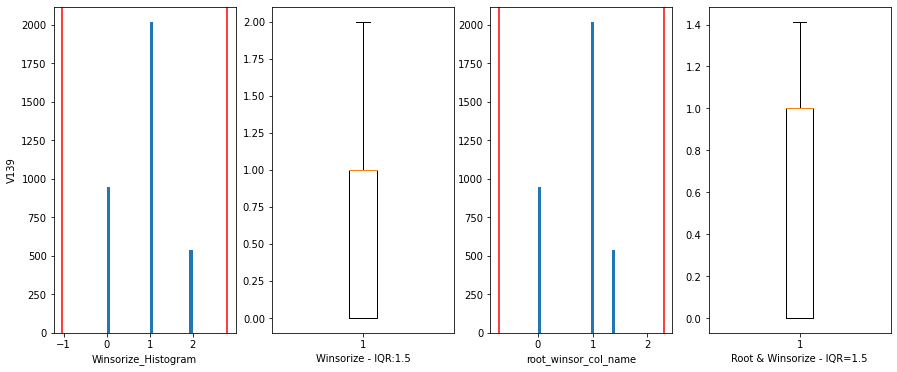

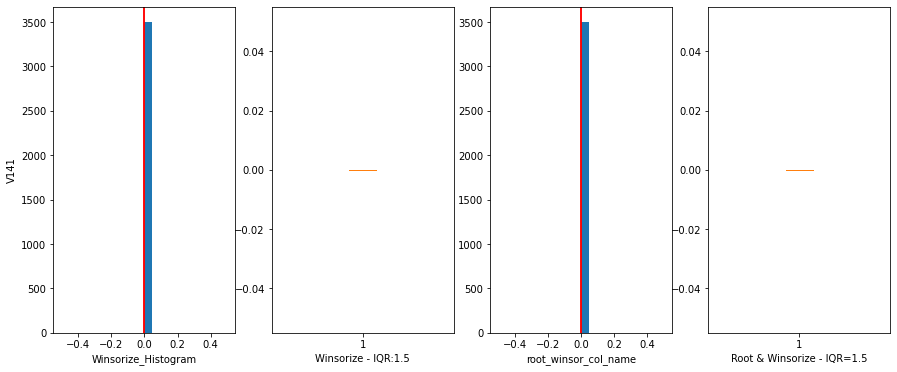

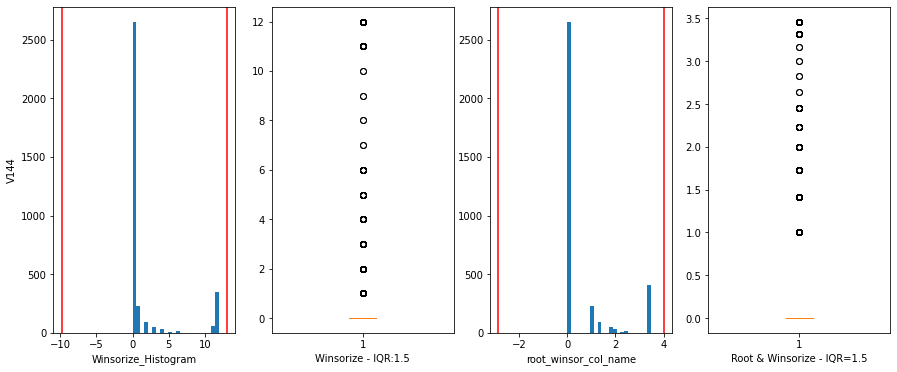

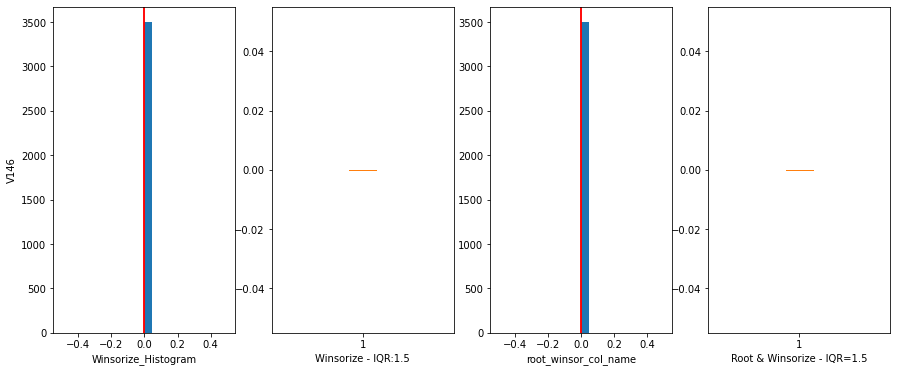

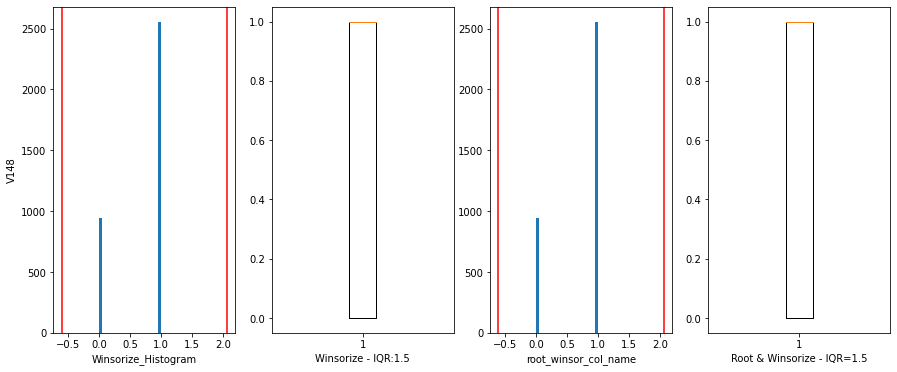

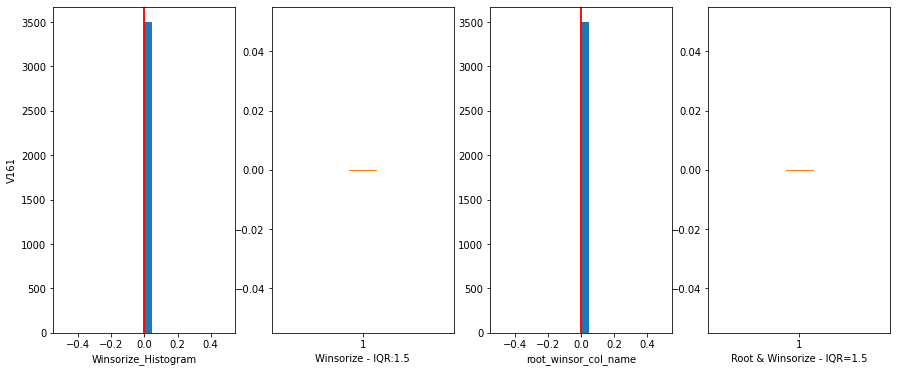

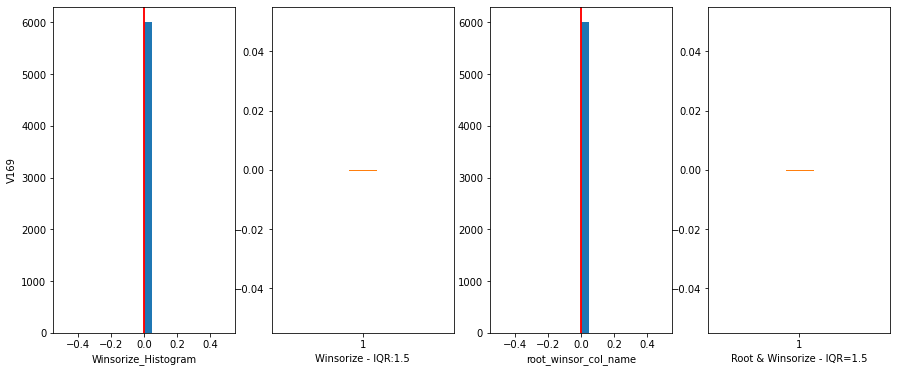

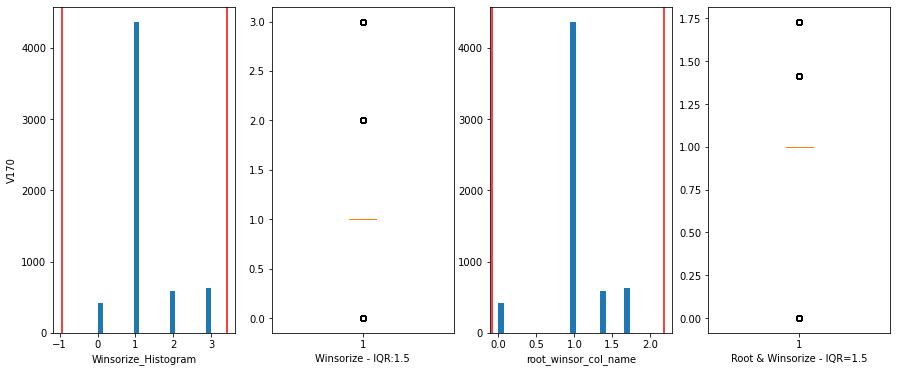

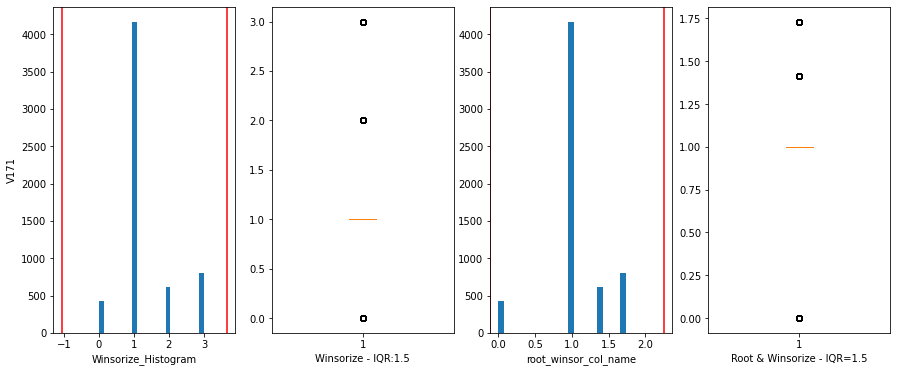

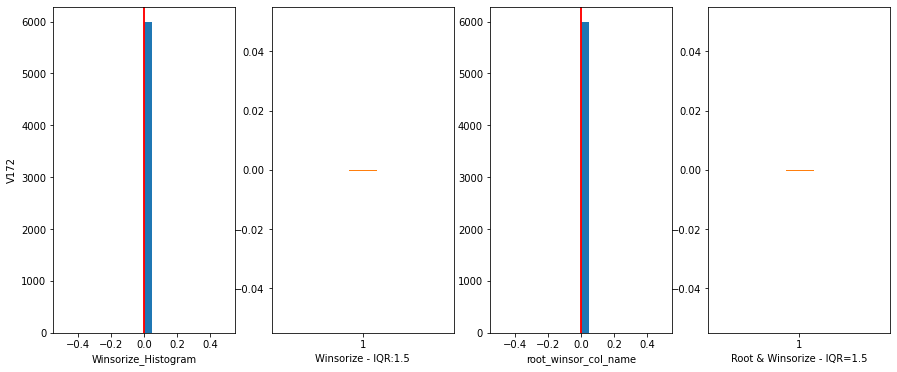

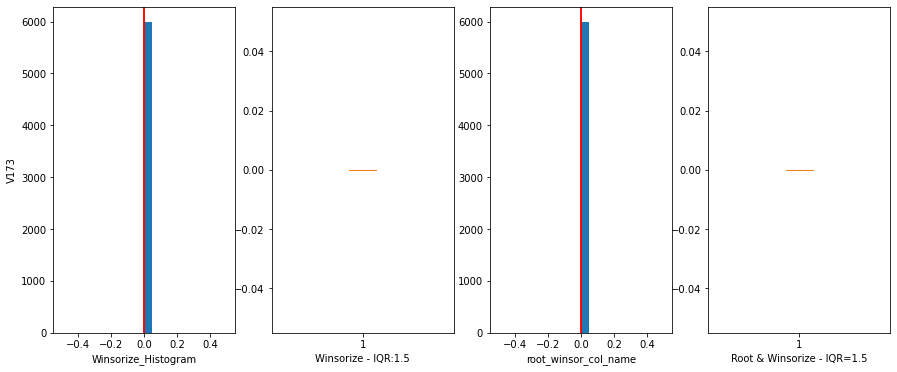

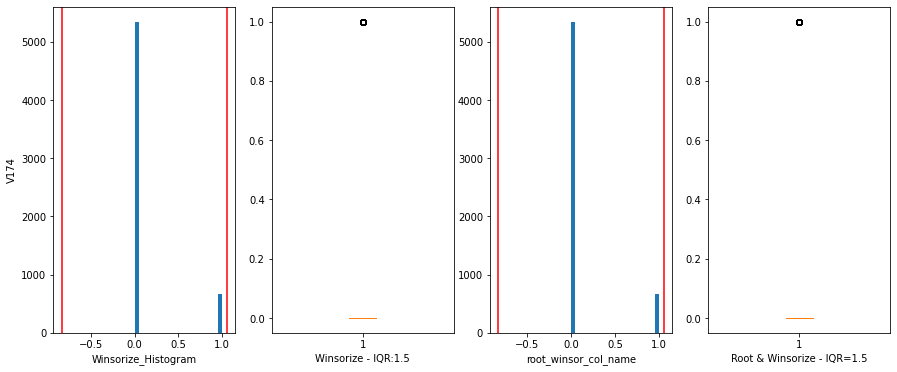

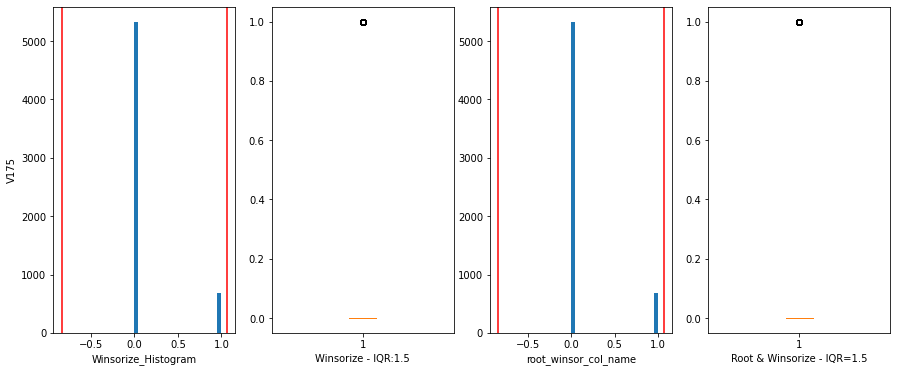

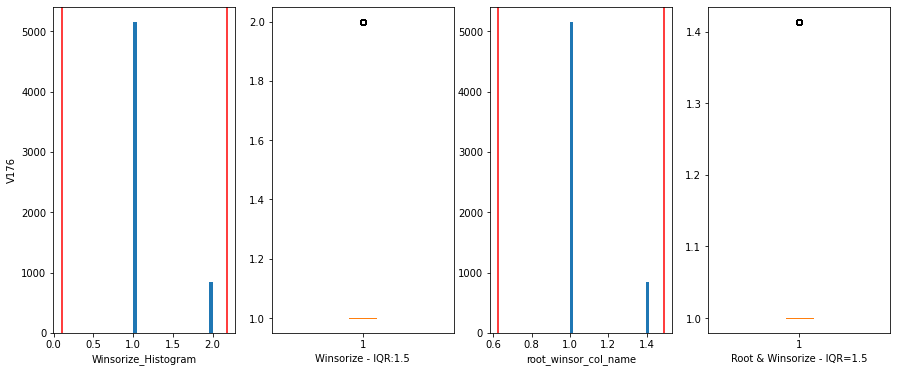

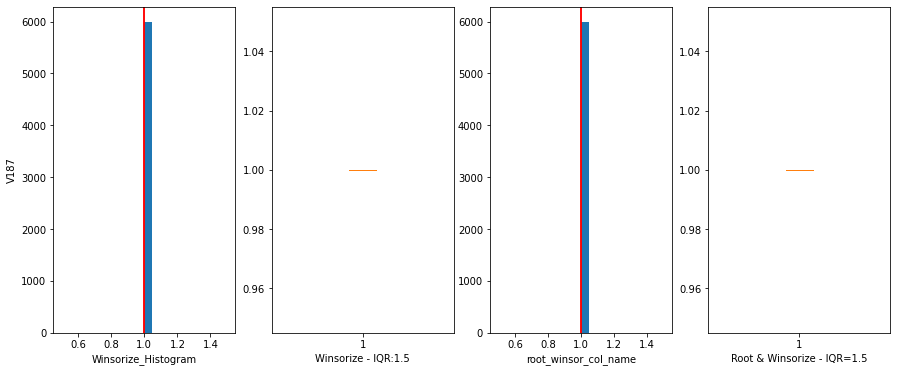

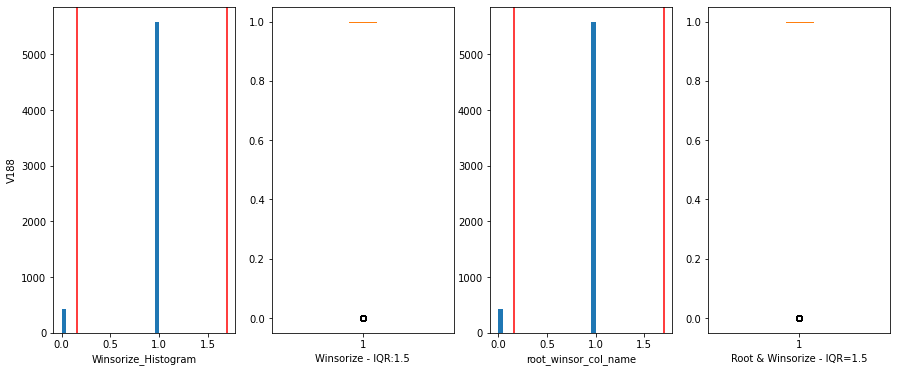

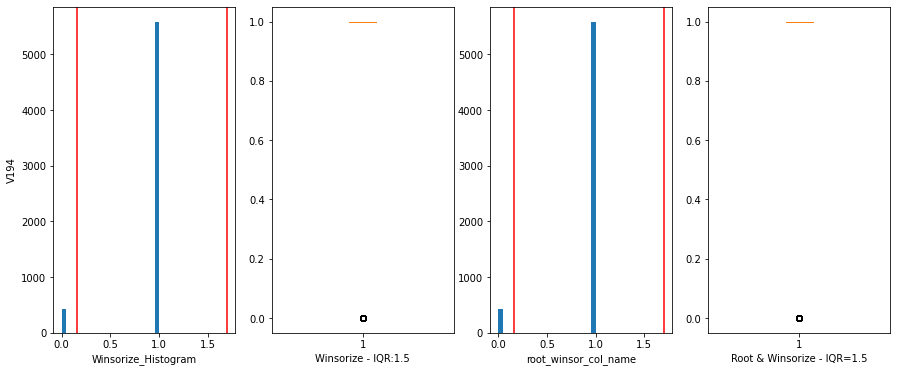

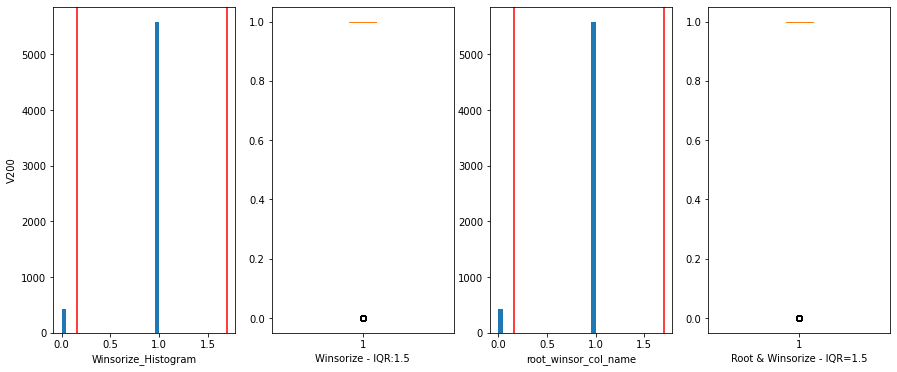

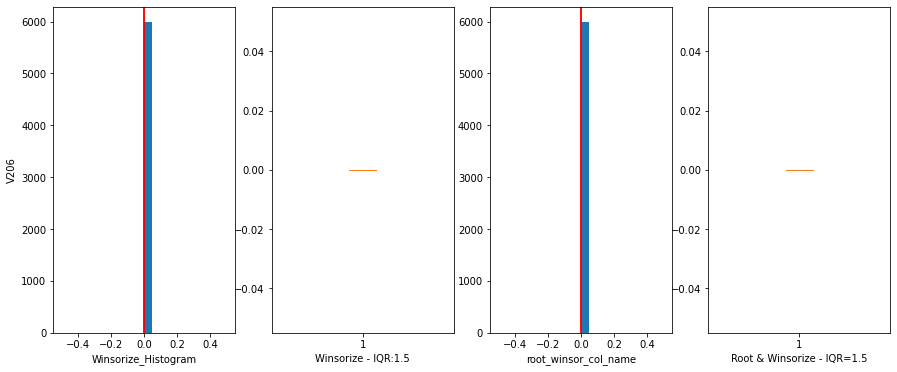

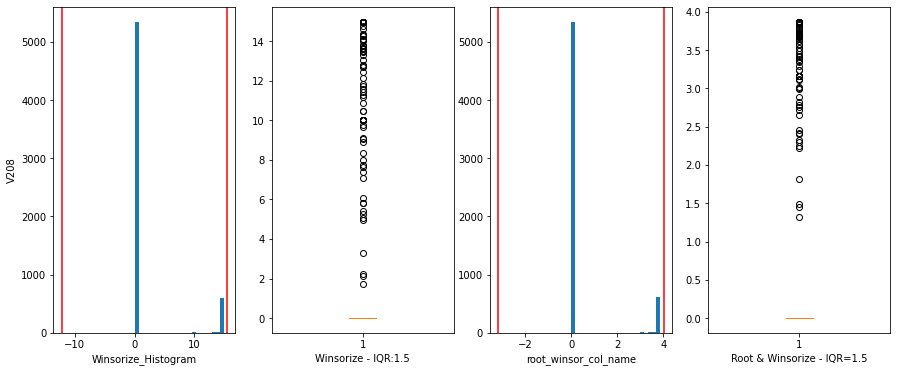

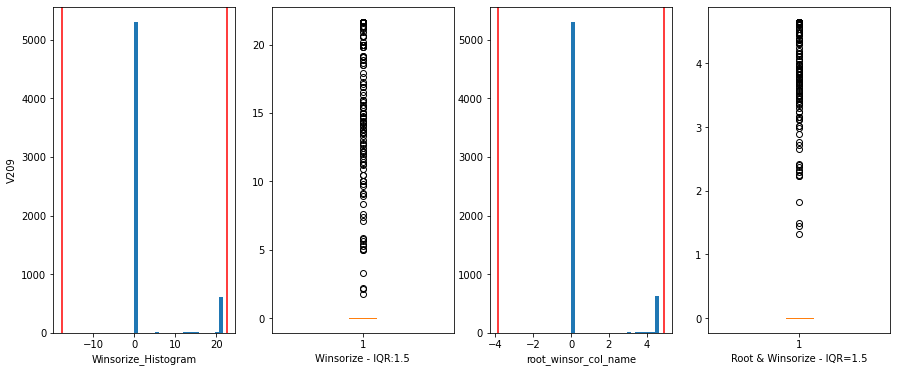

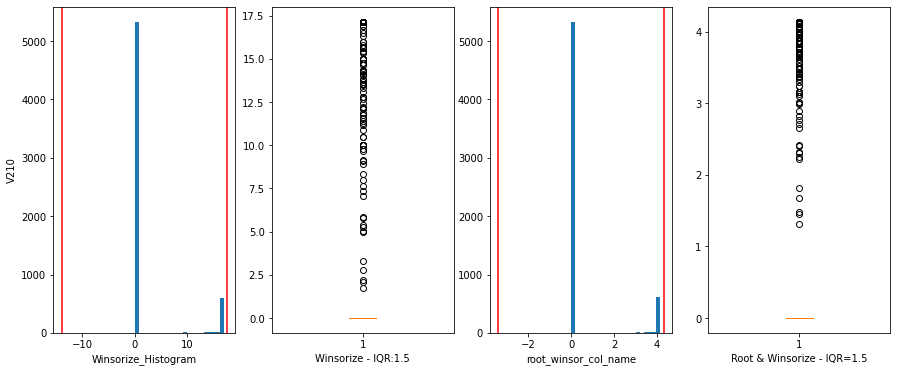

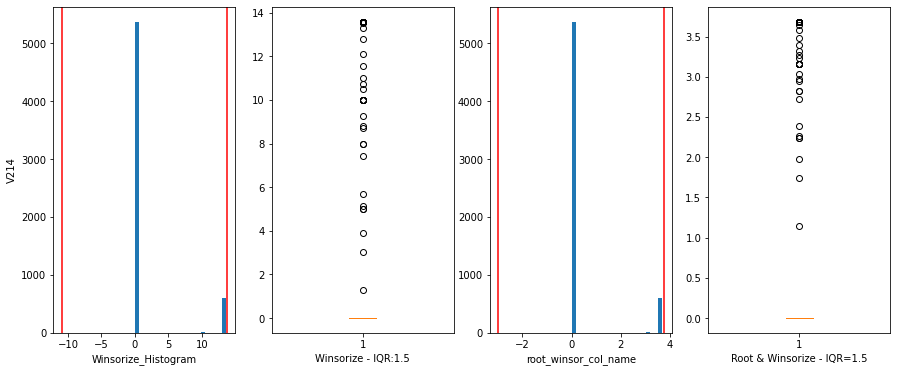

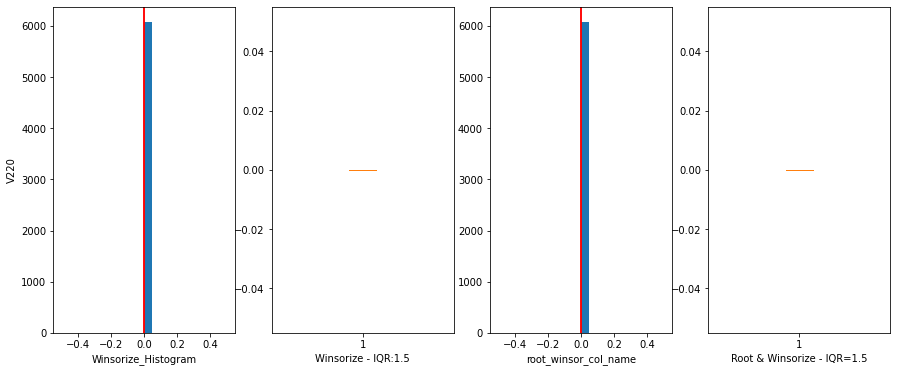

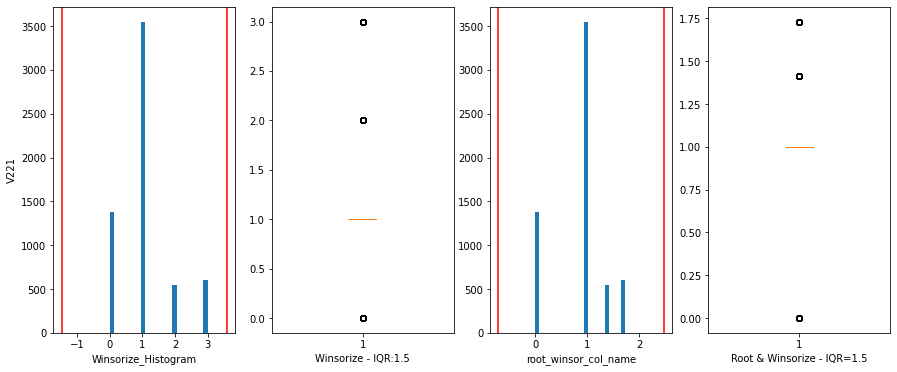

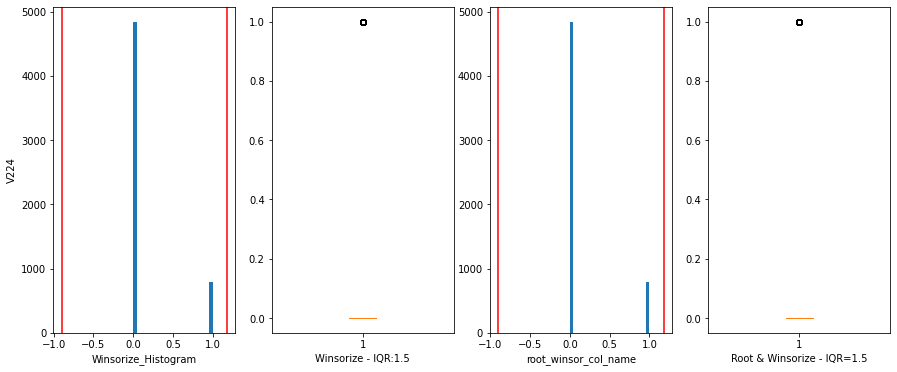

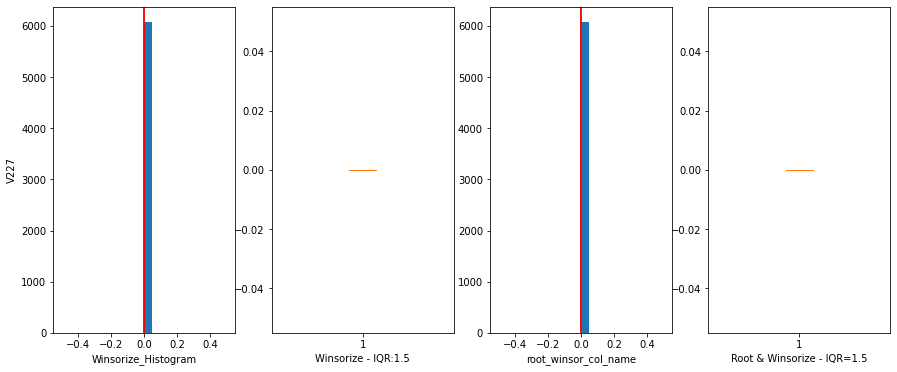

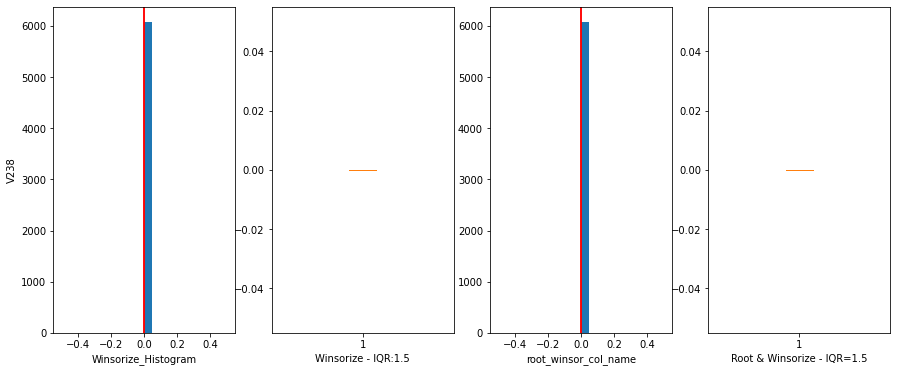

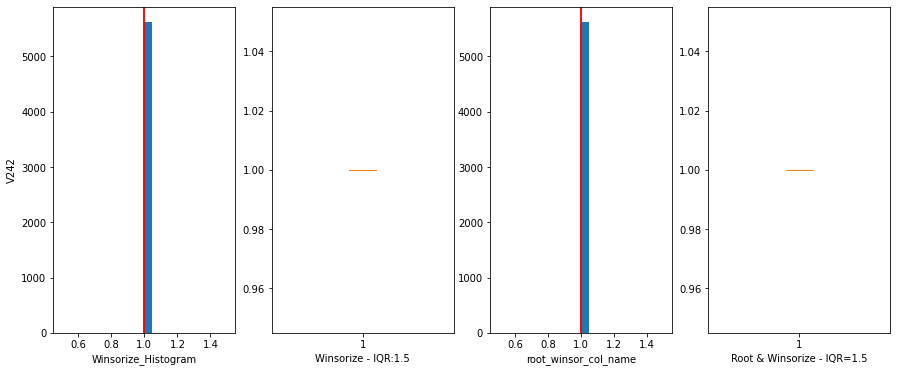

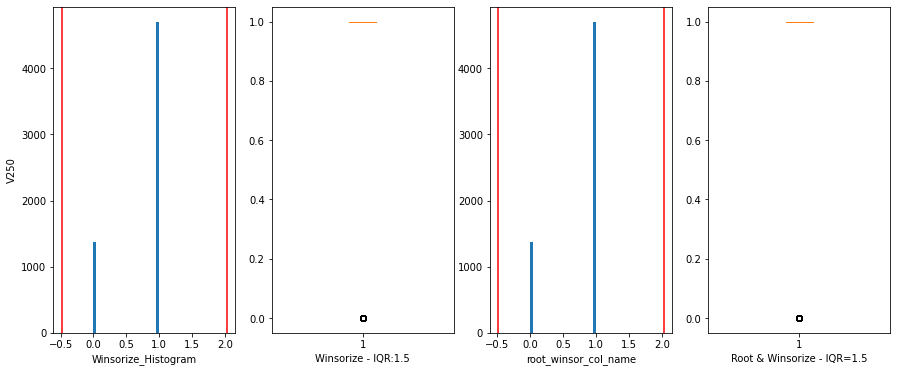

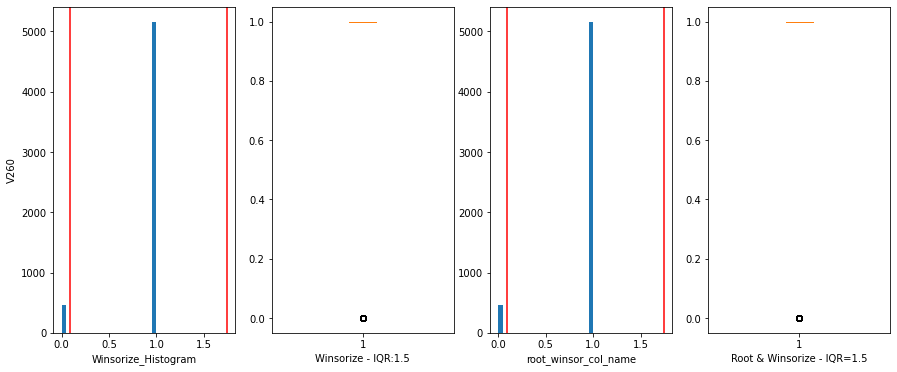

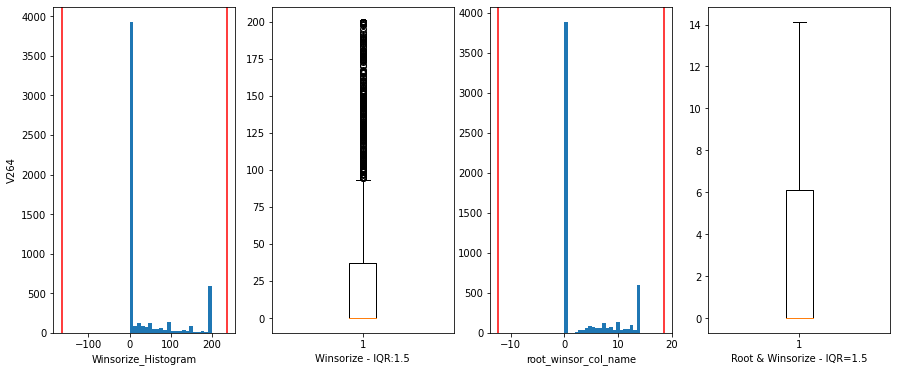

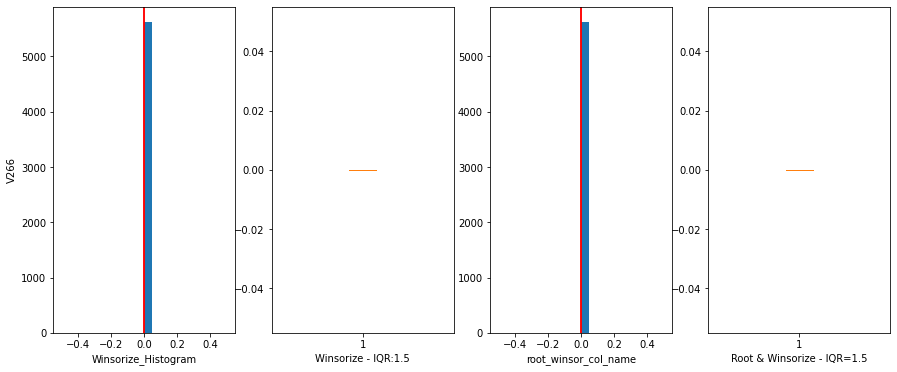

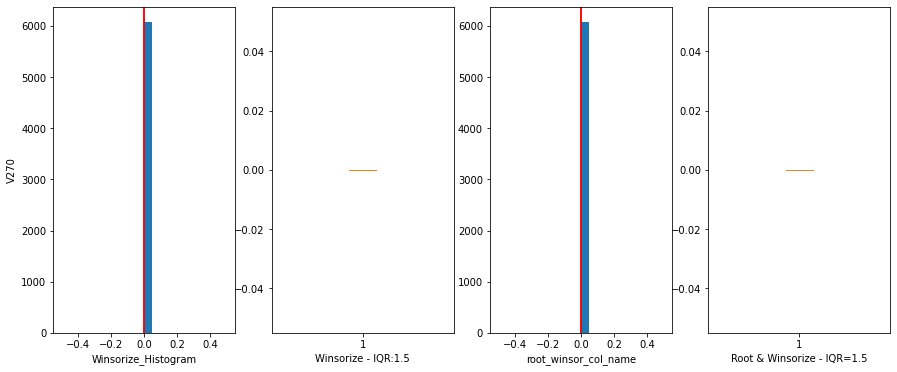

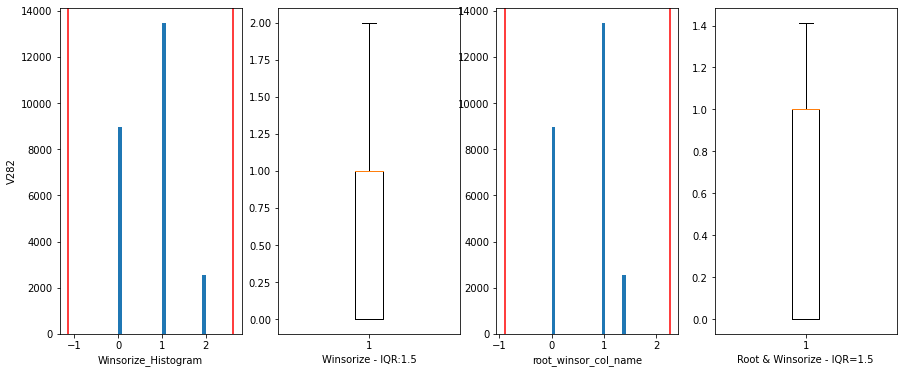

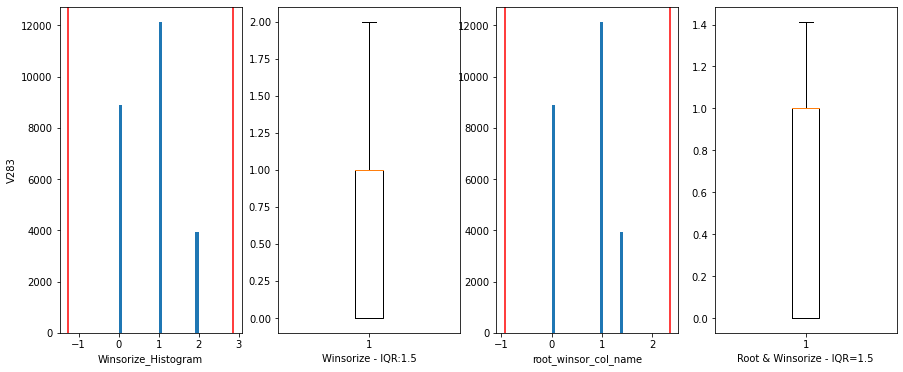

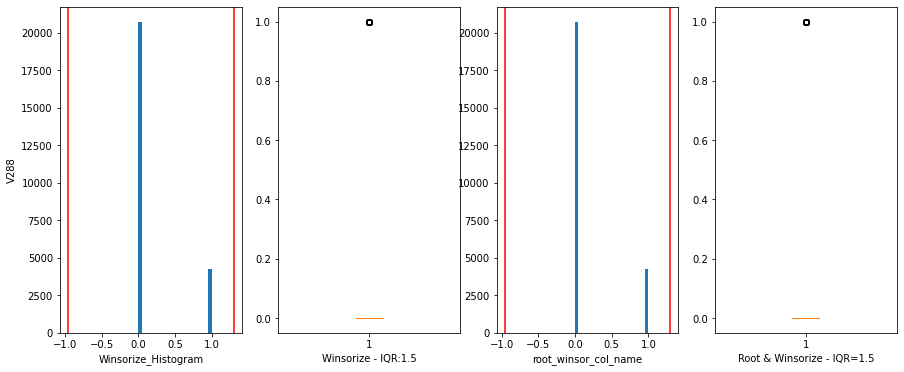

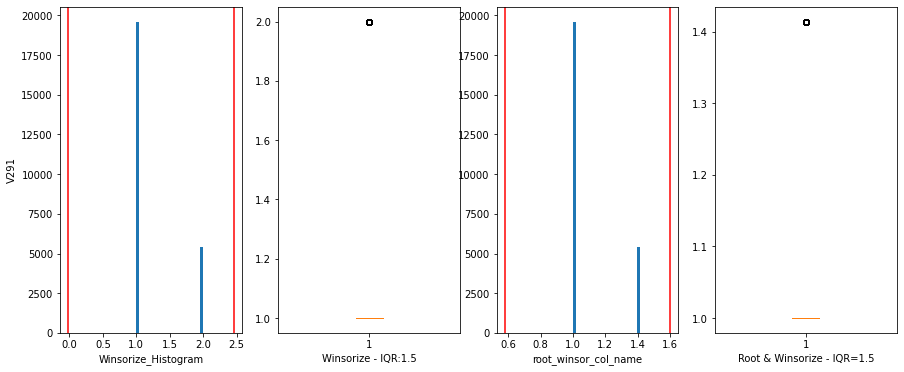

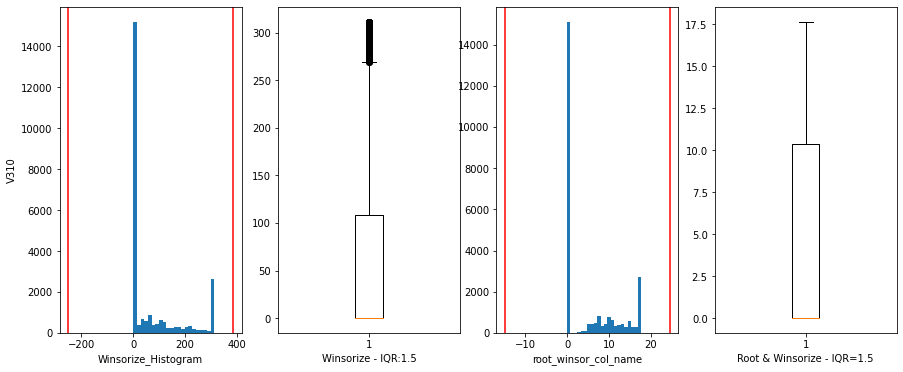

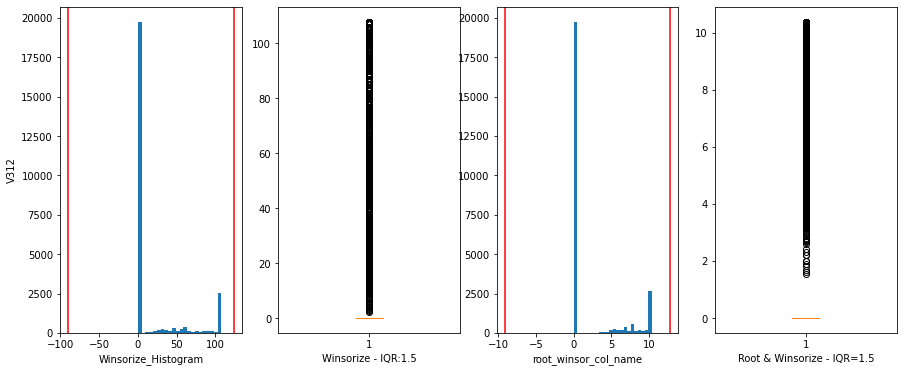

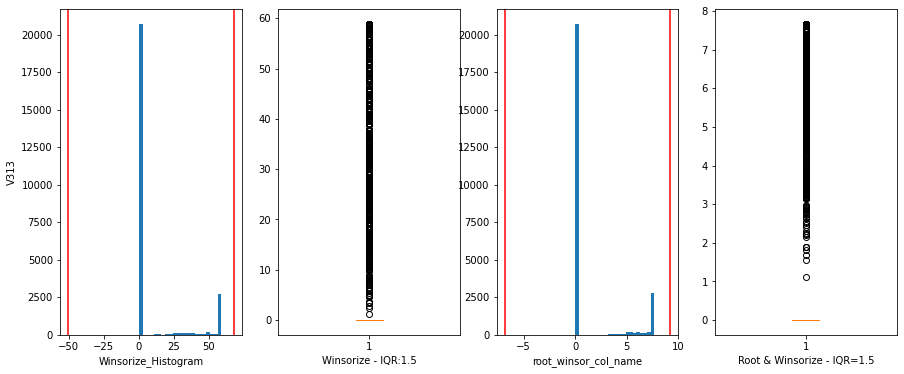

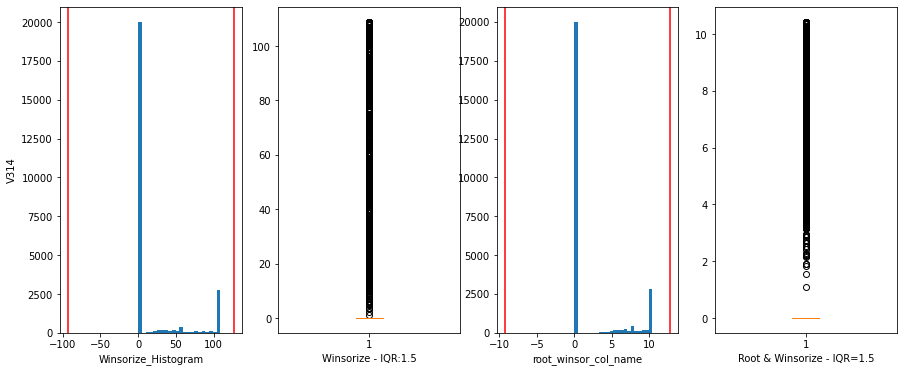

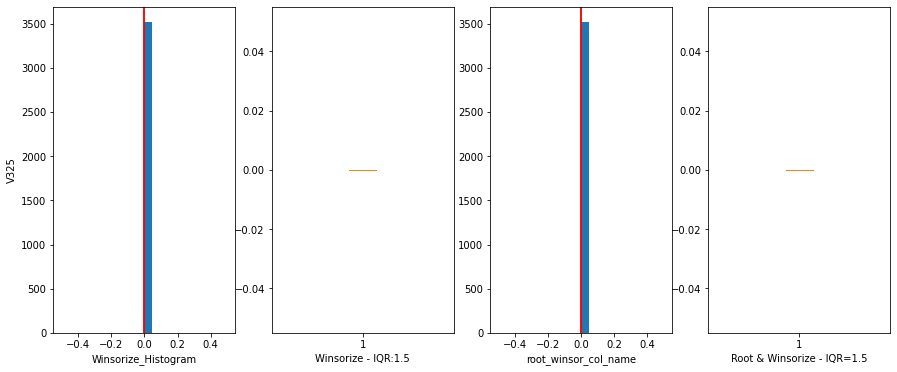

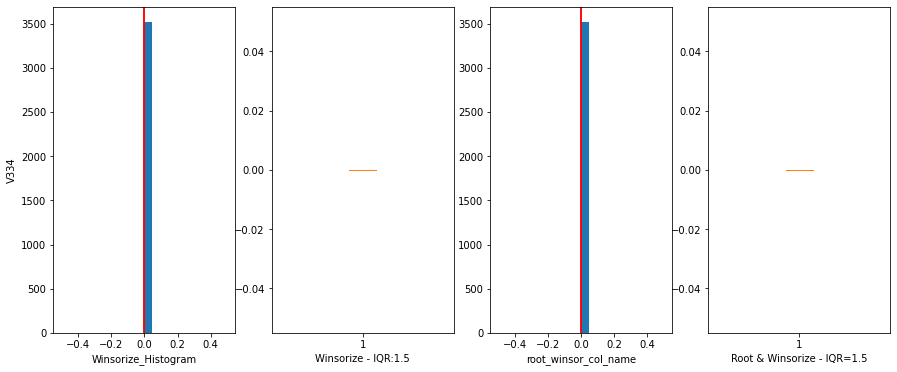

In [1285]:
for col in columns:
  plot_winsorize(df[col].dropna().to_frame(),col)

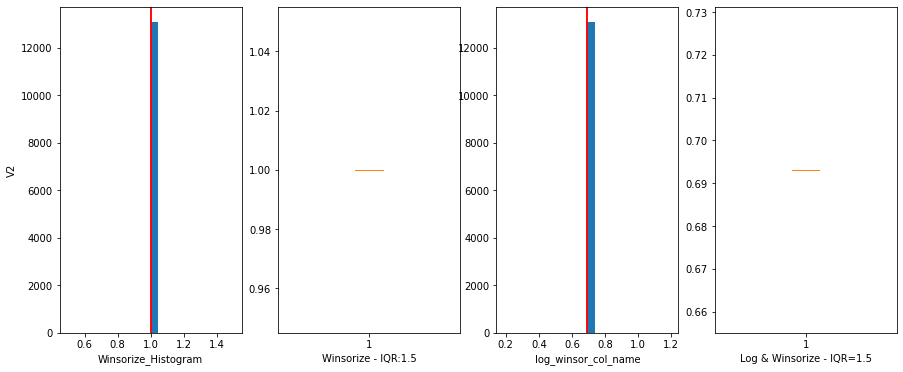

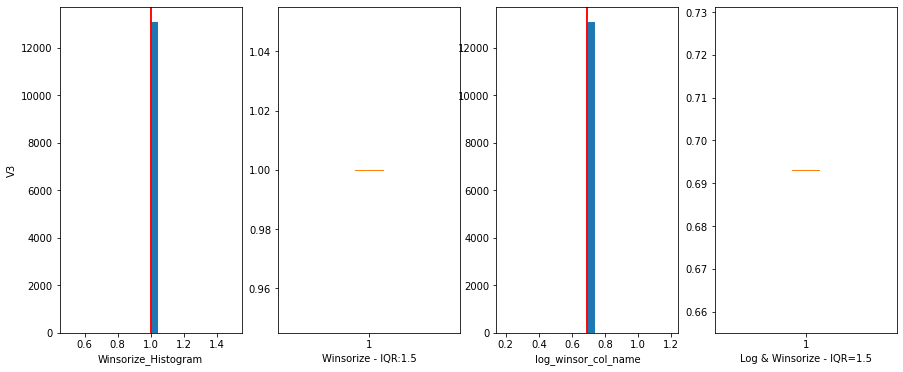

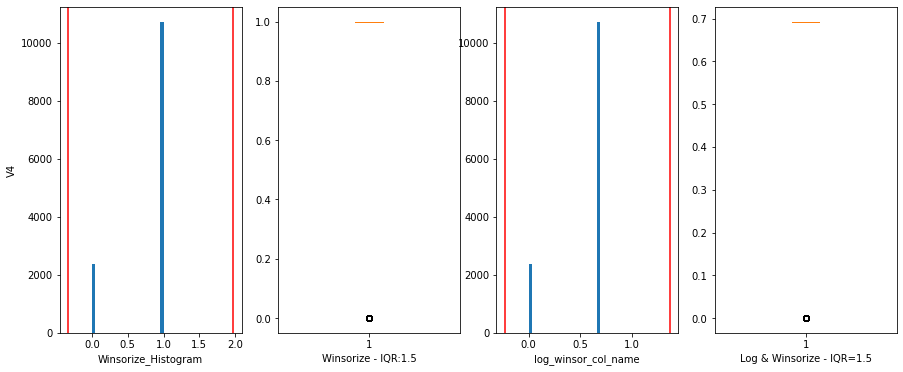

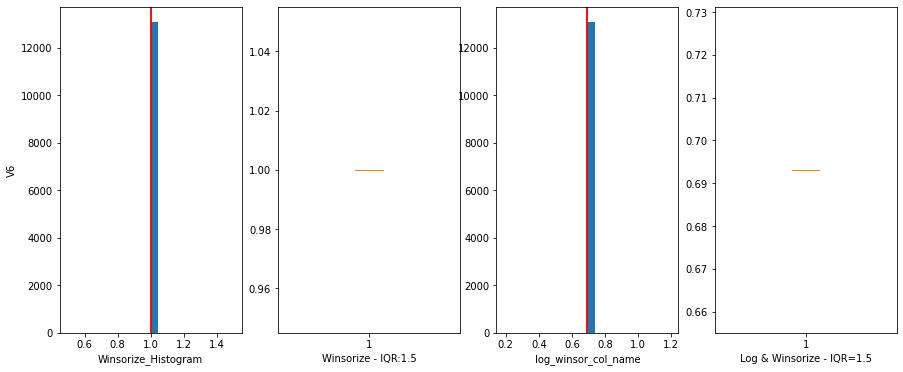

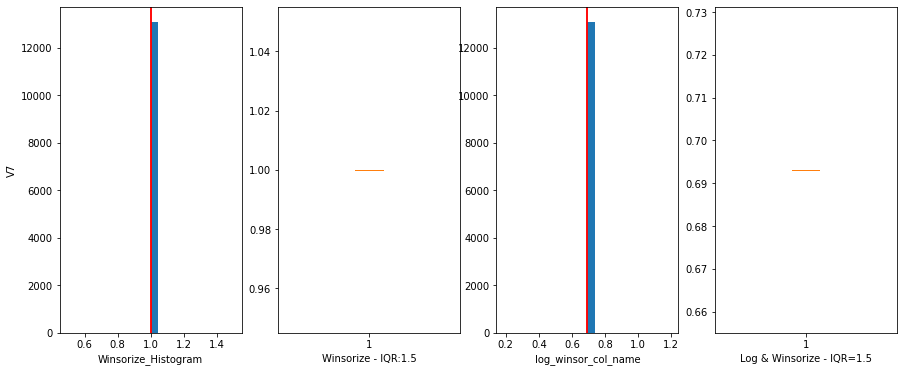

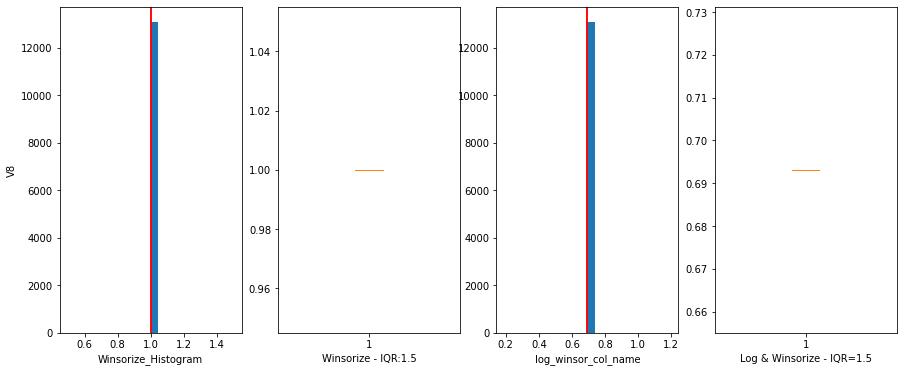

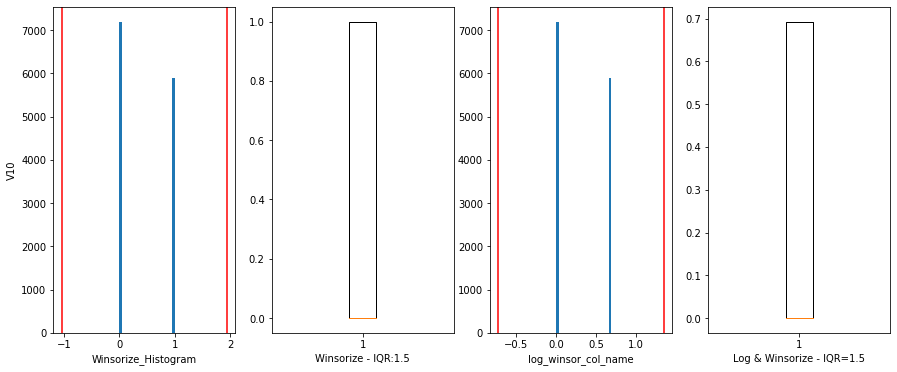

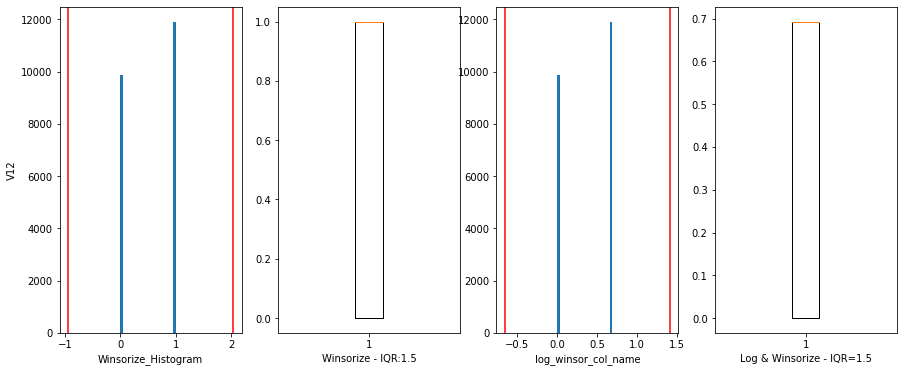

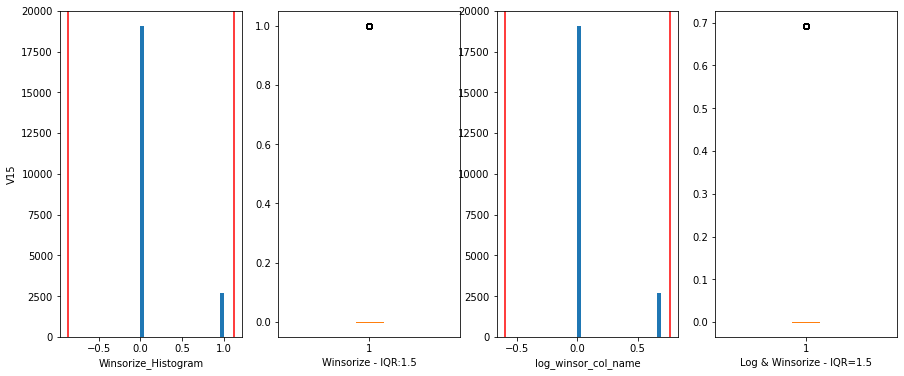

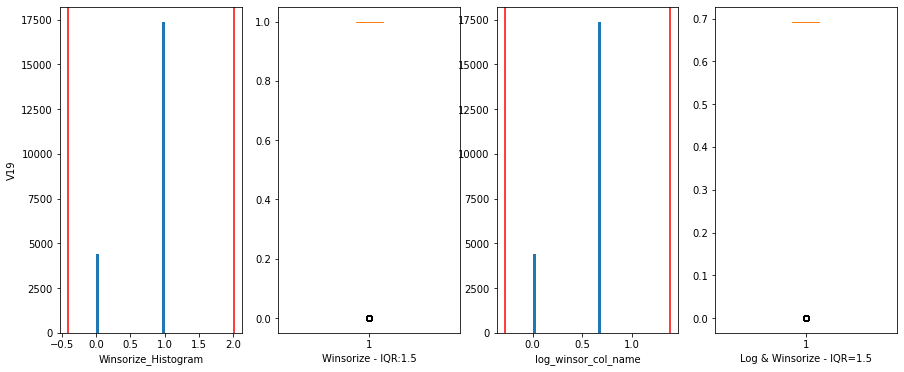

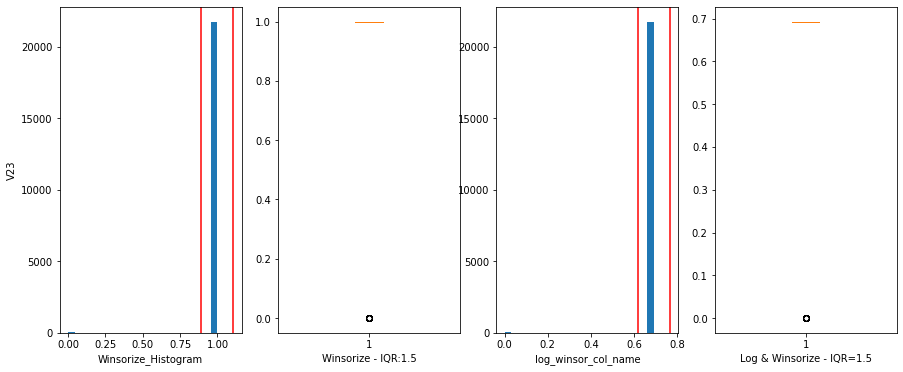

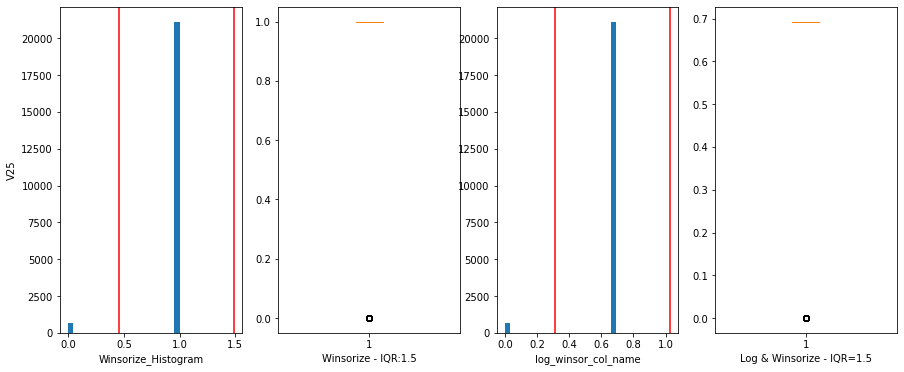

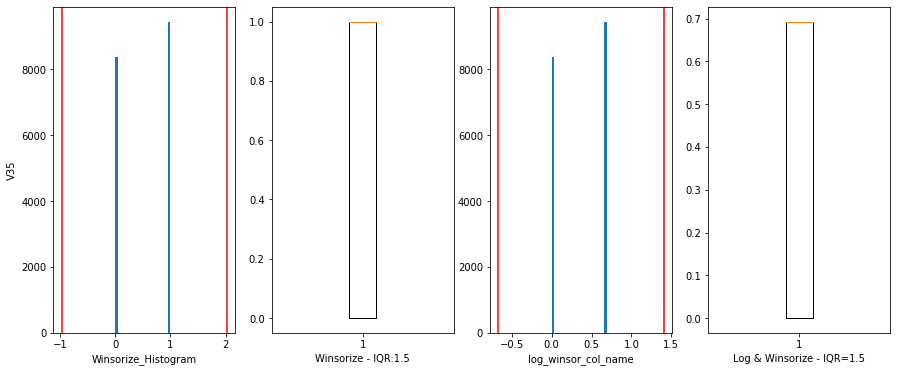

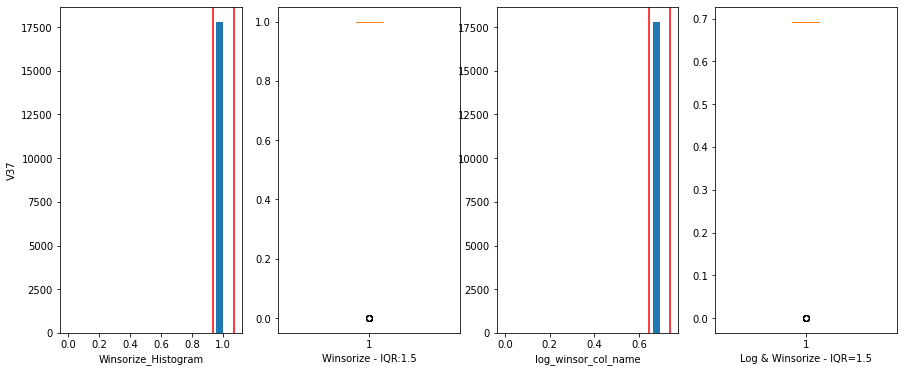

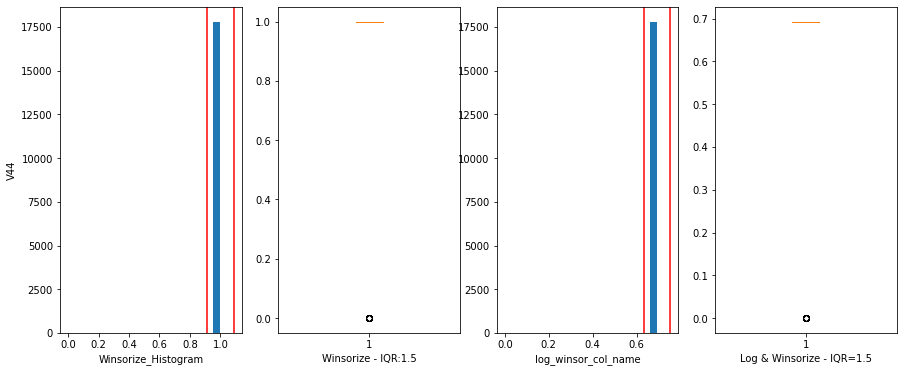

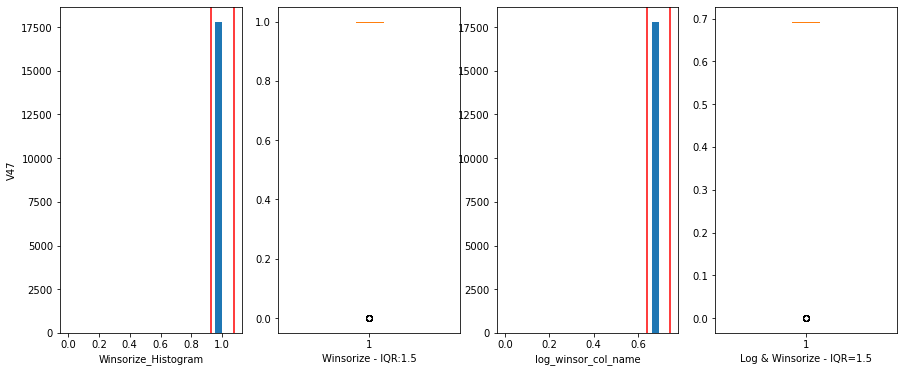

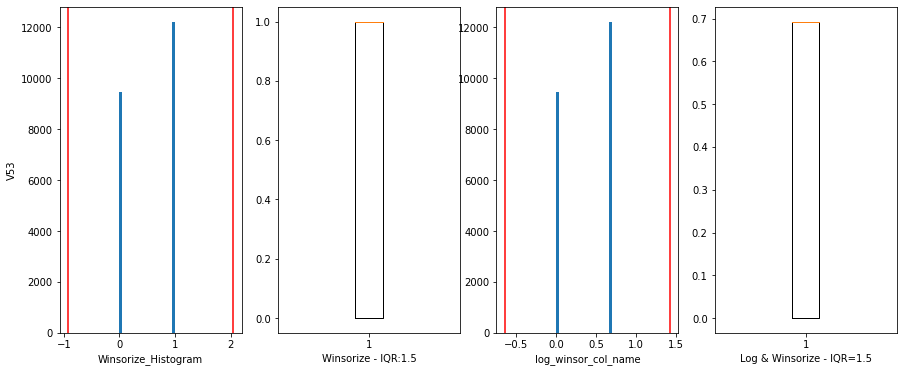

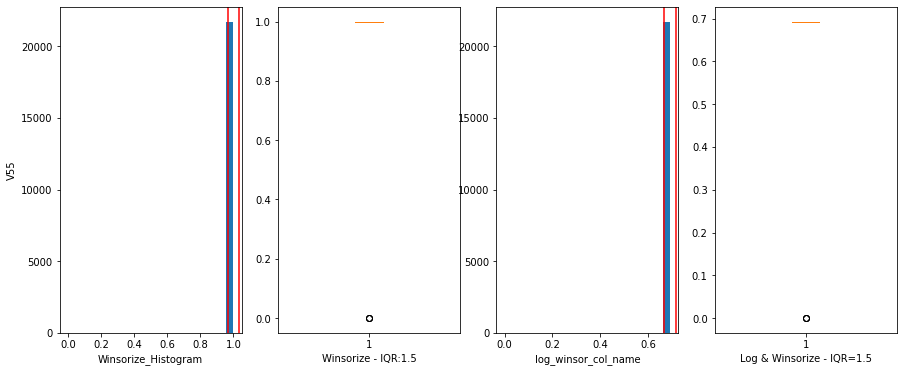

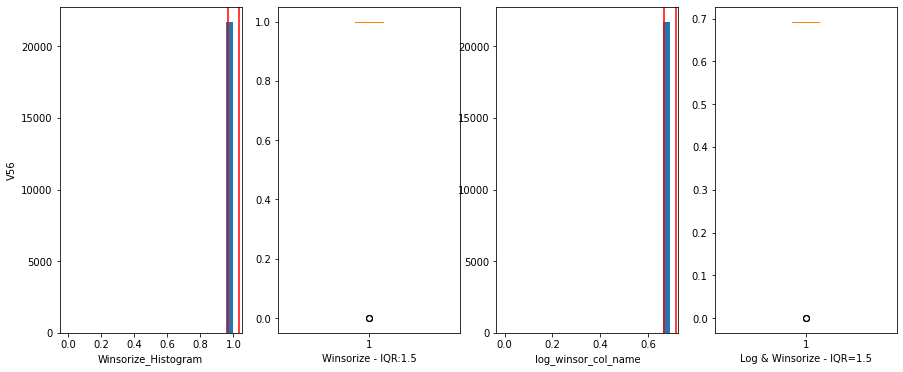

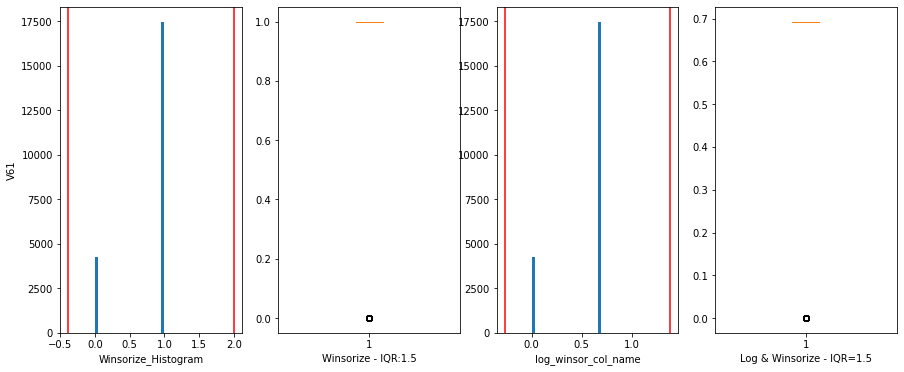

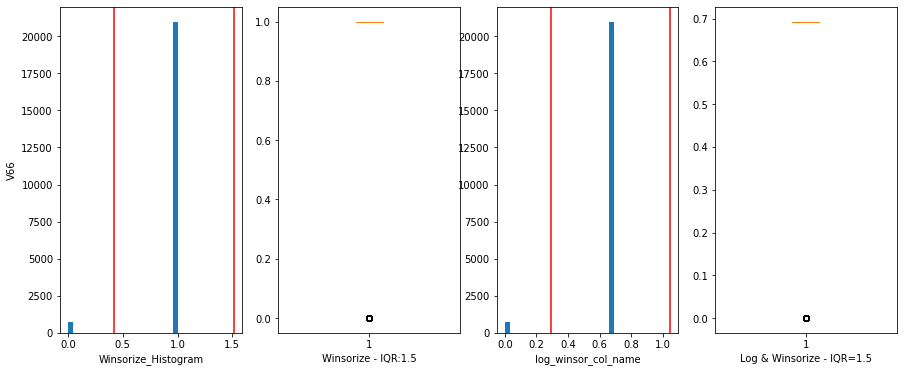

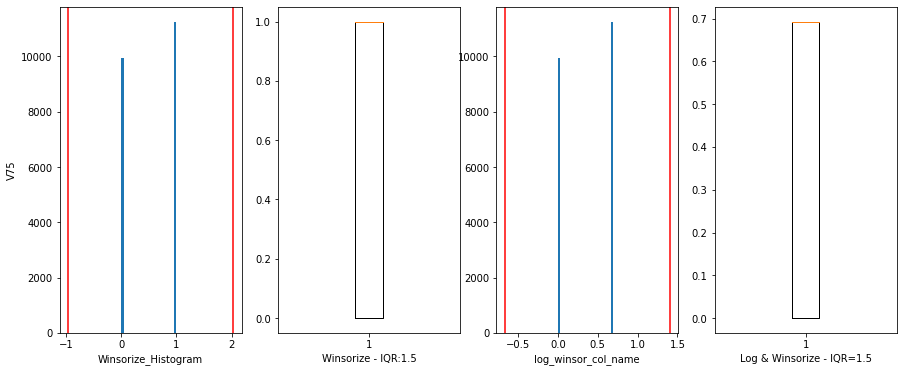

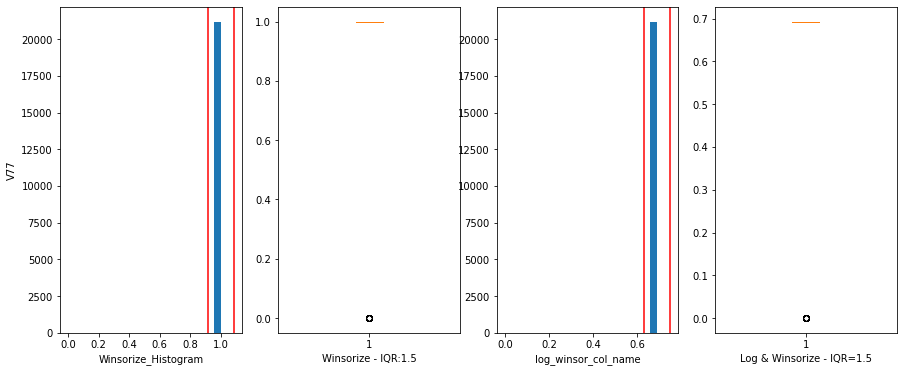

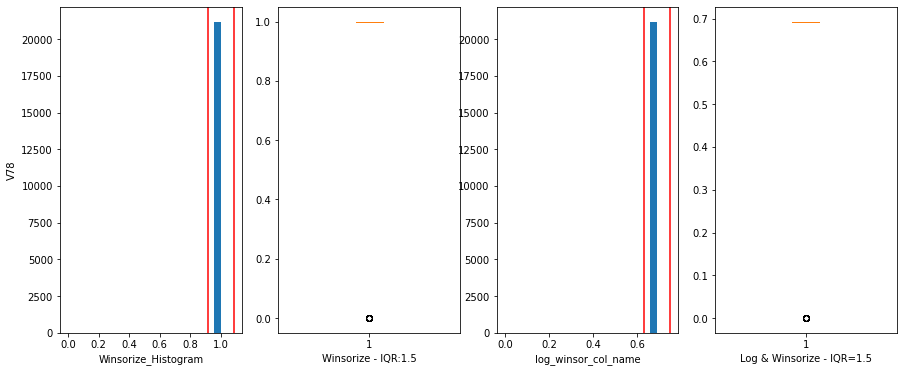

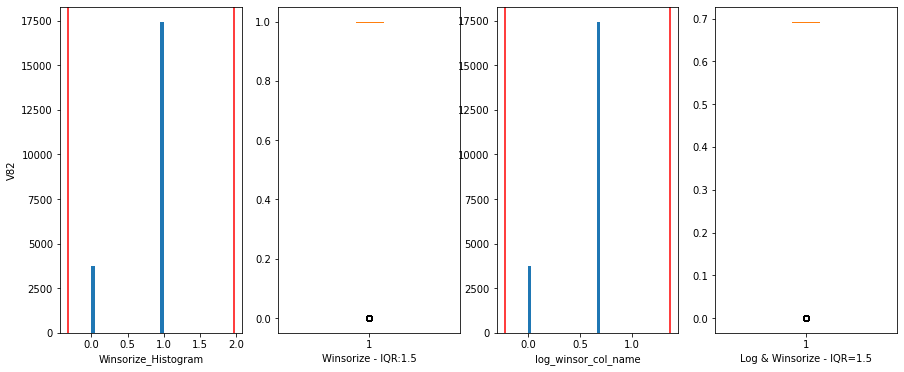

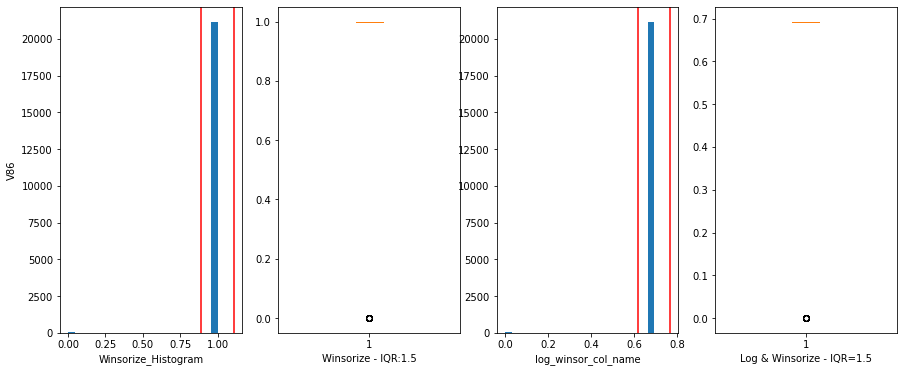

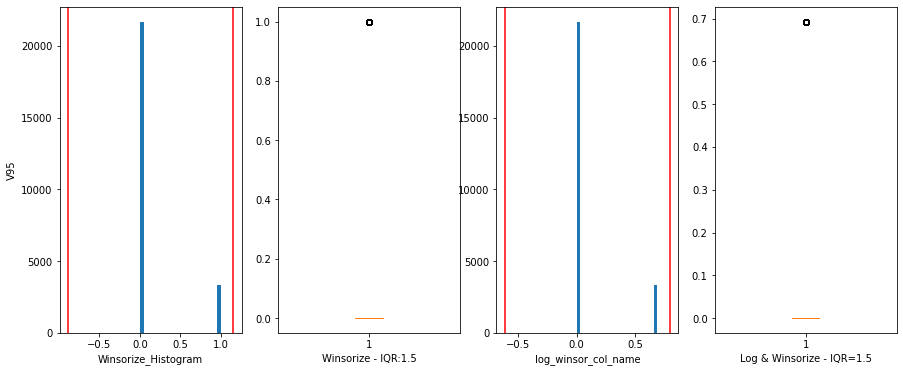

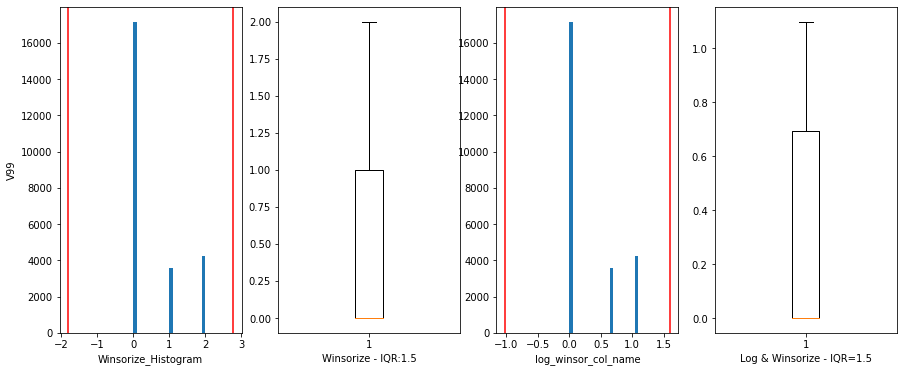

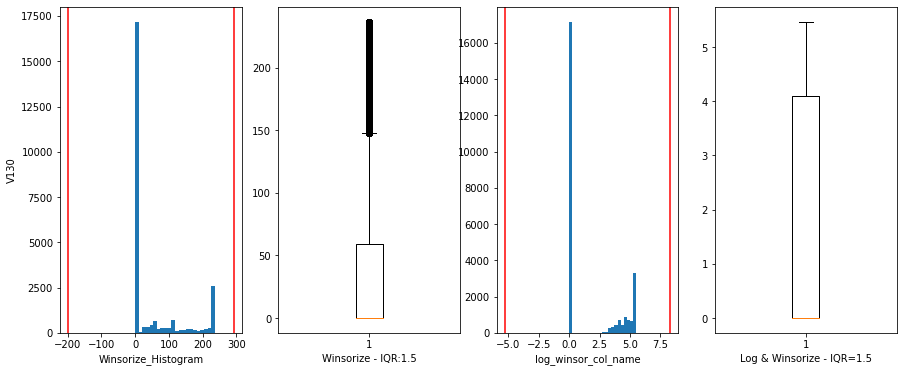

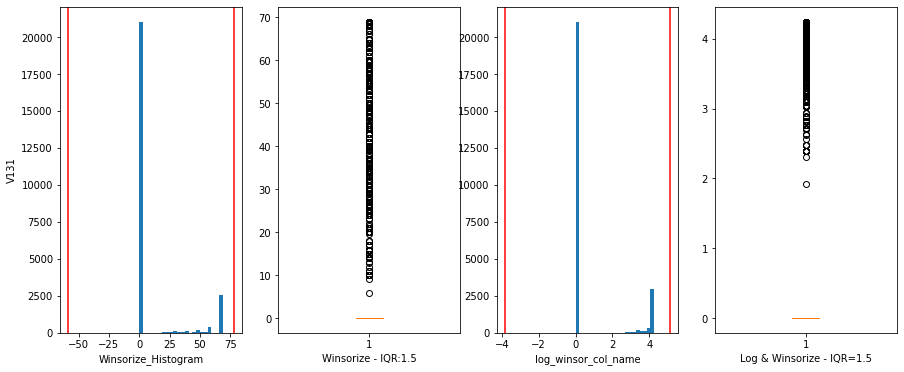

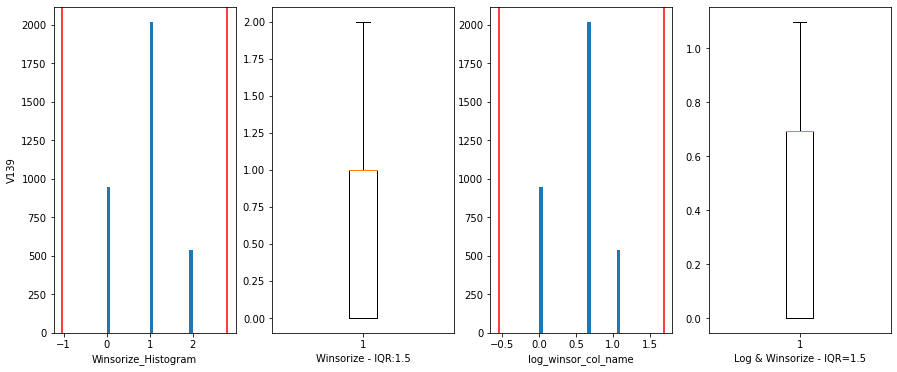

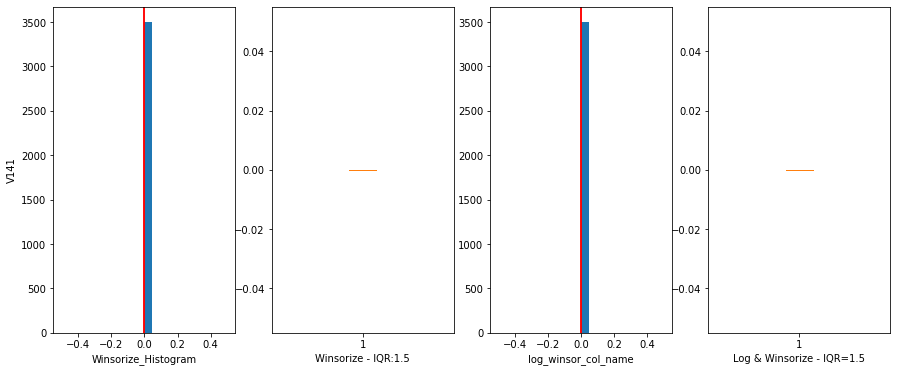

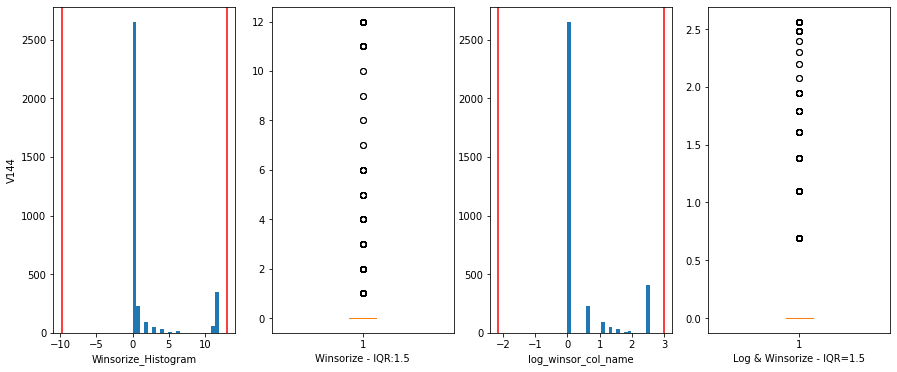

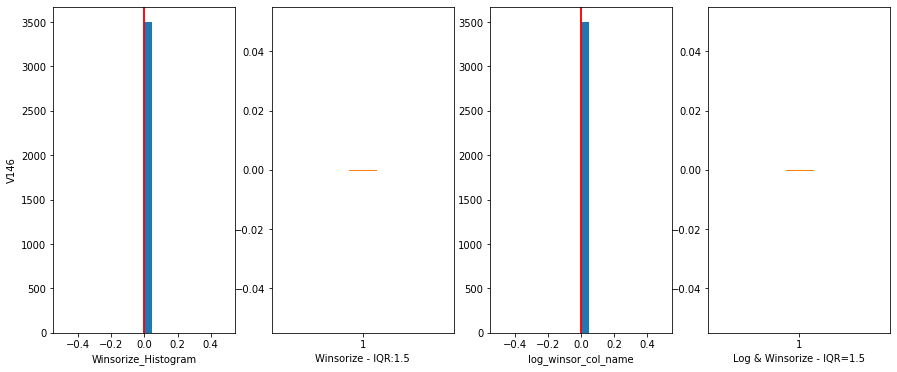

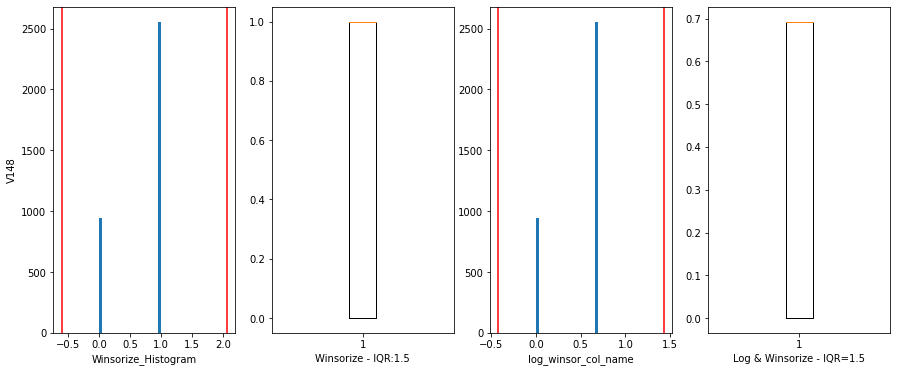

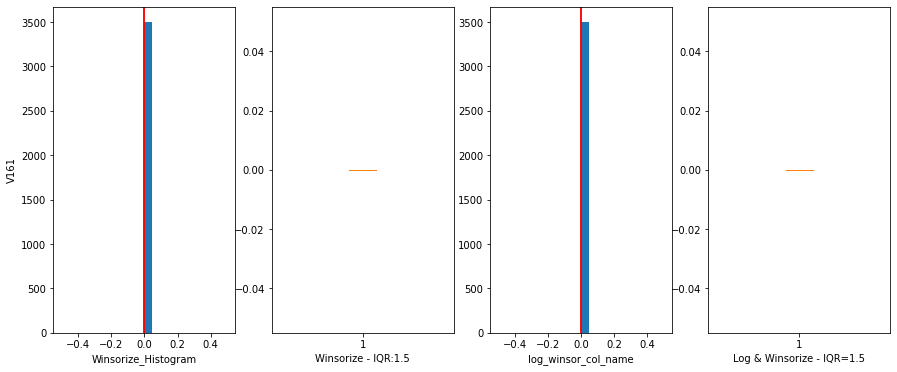

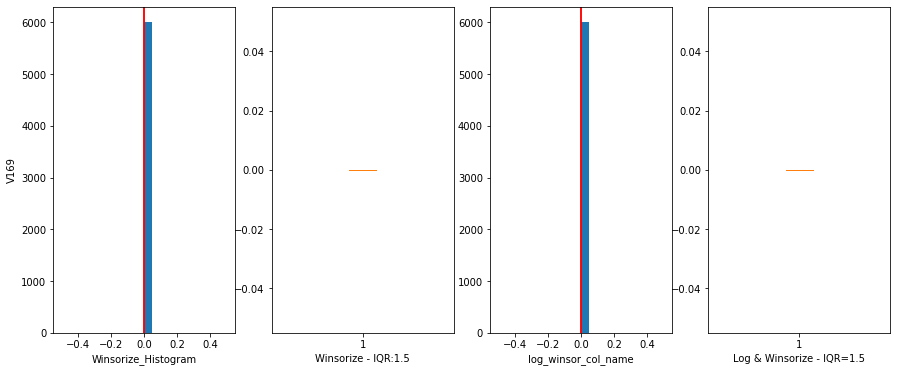

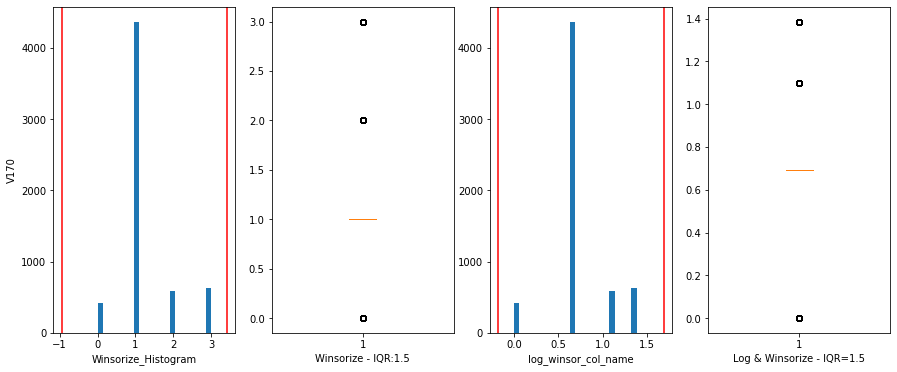

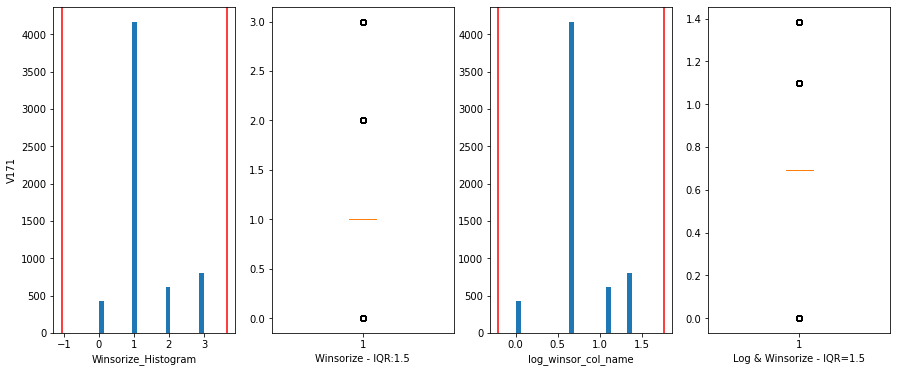

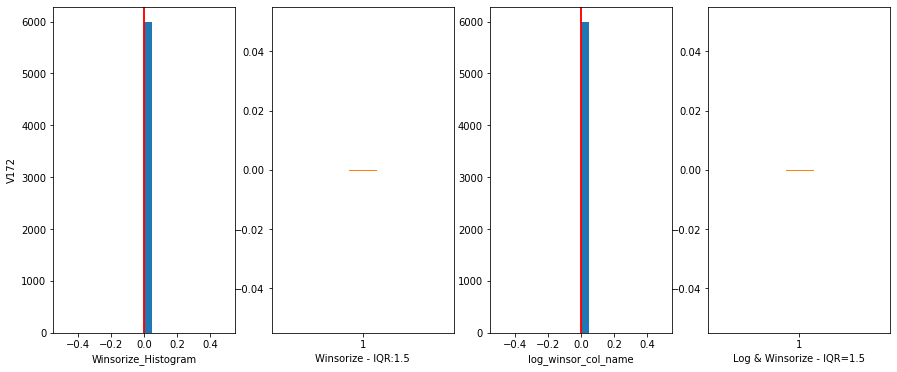

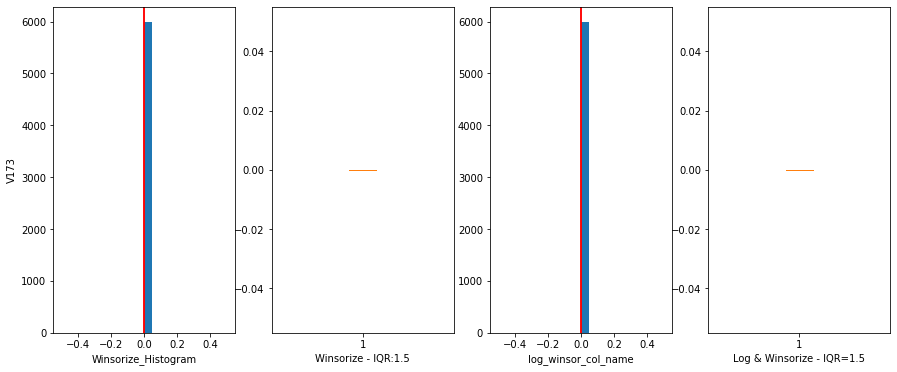

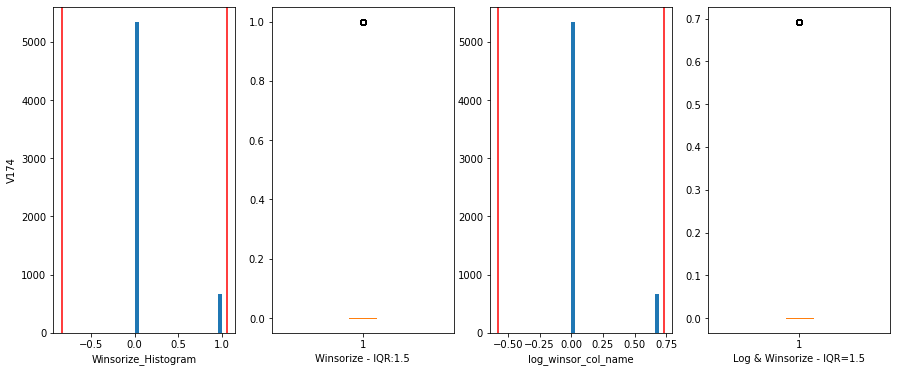

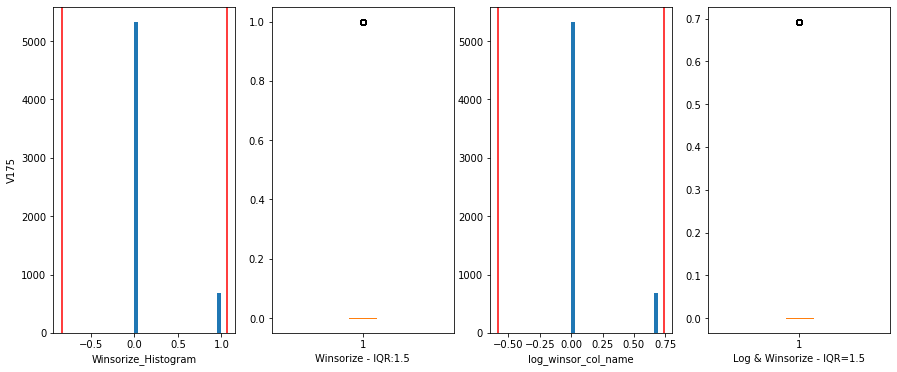

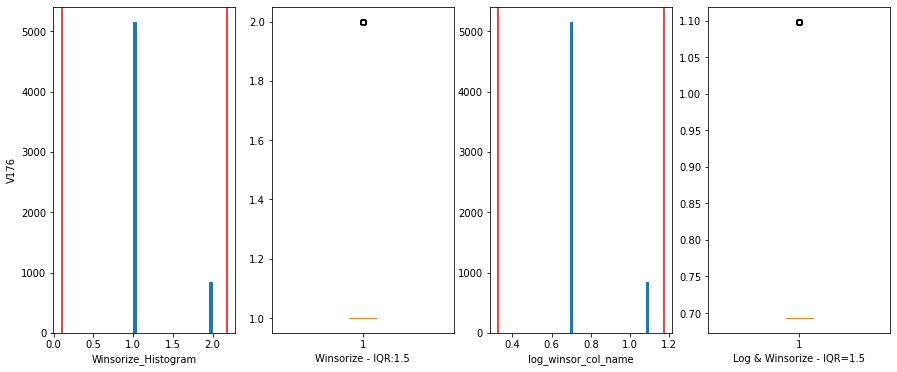

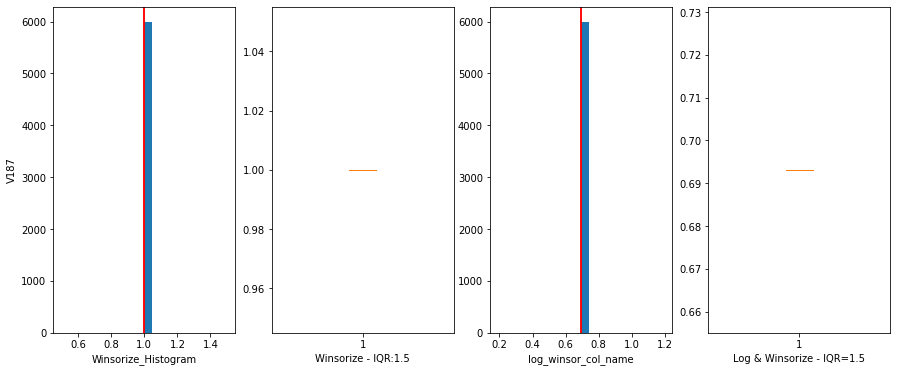

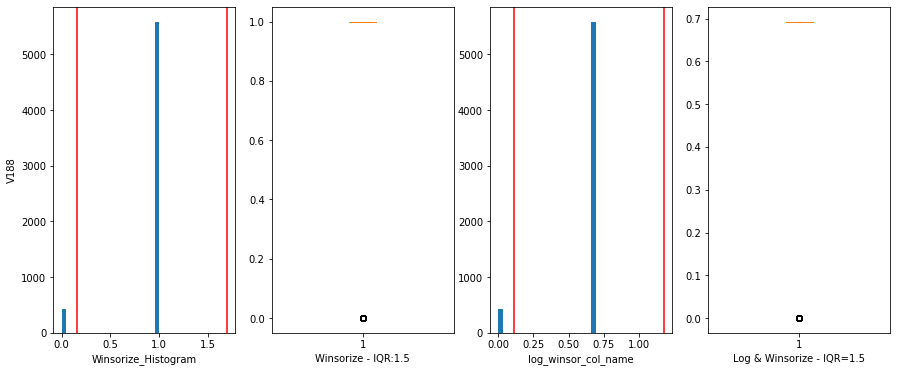

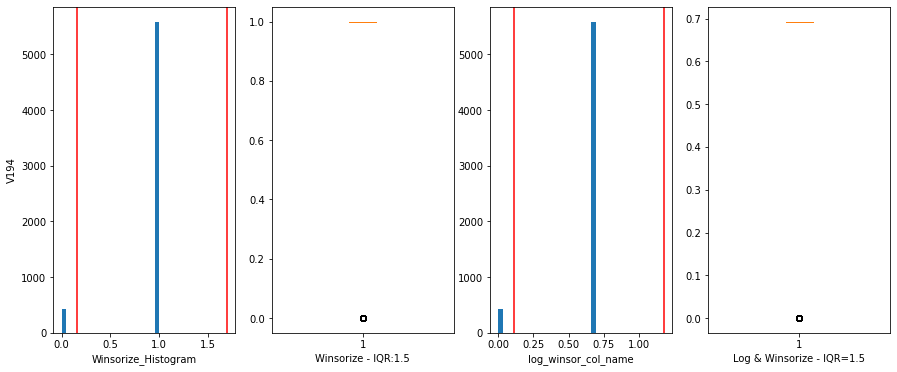

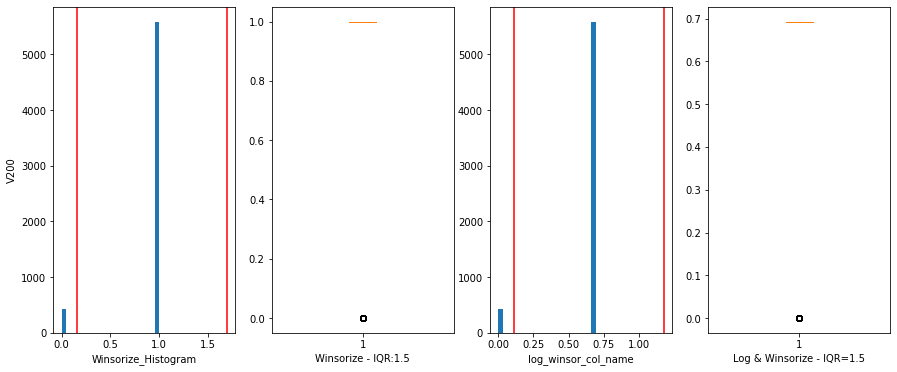

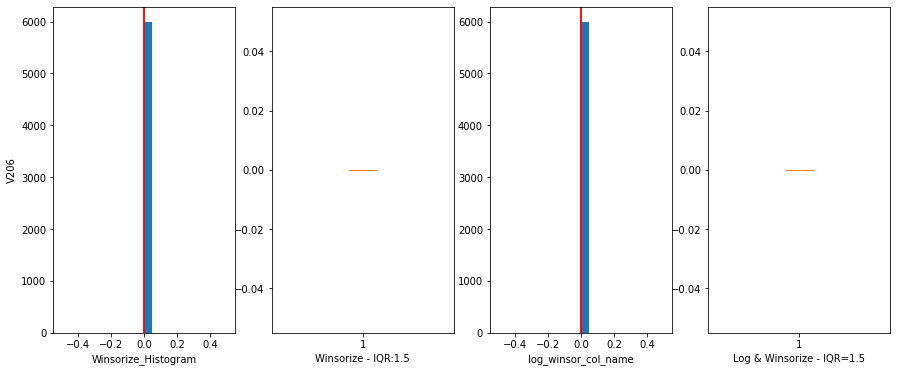

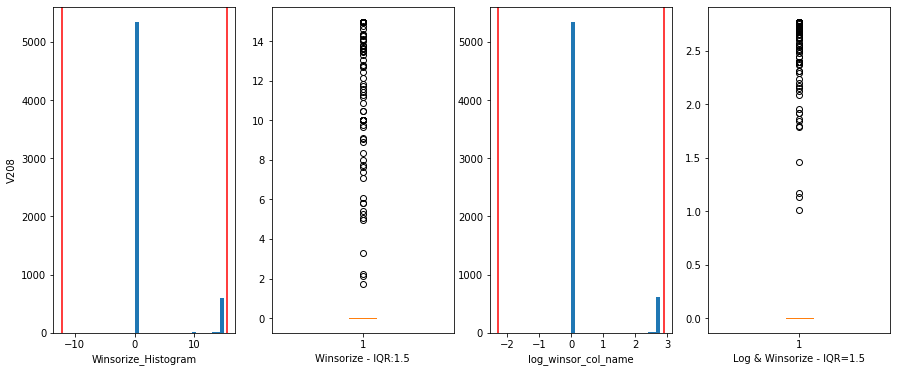

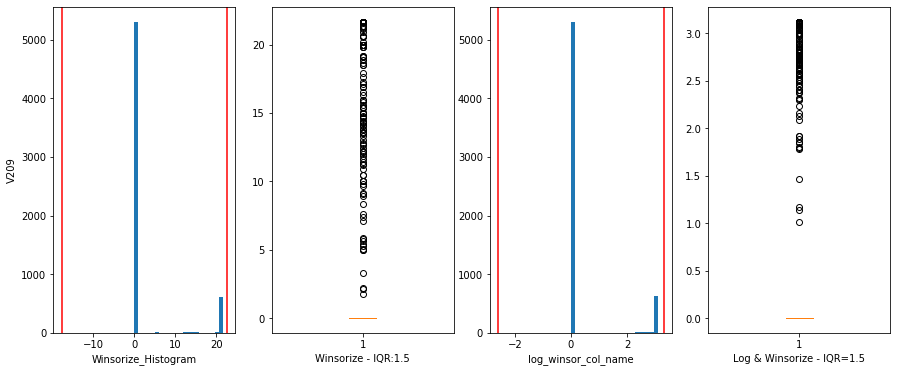

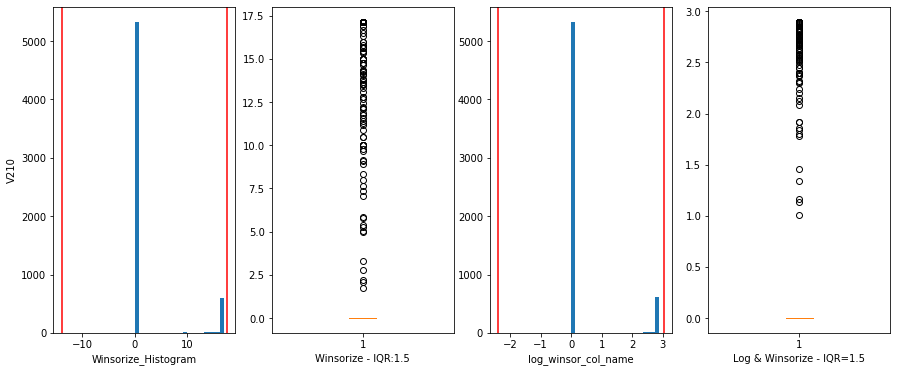

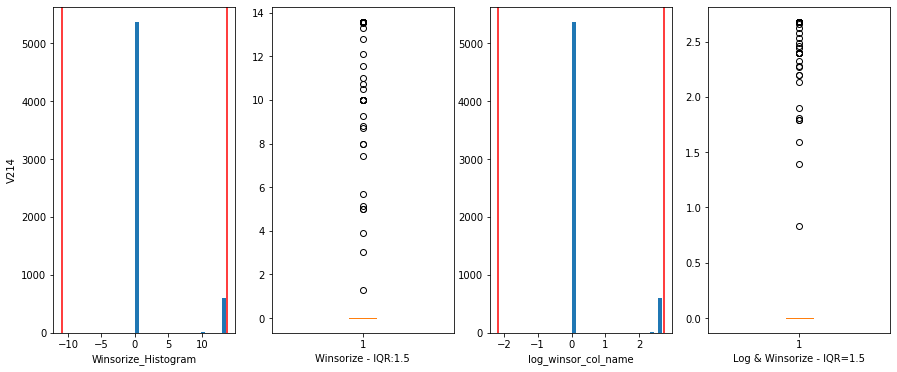

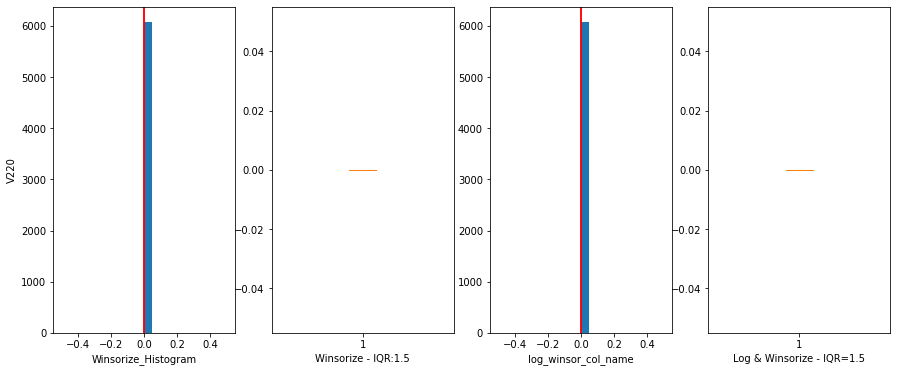

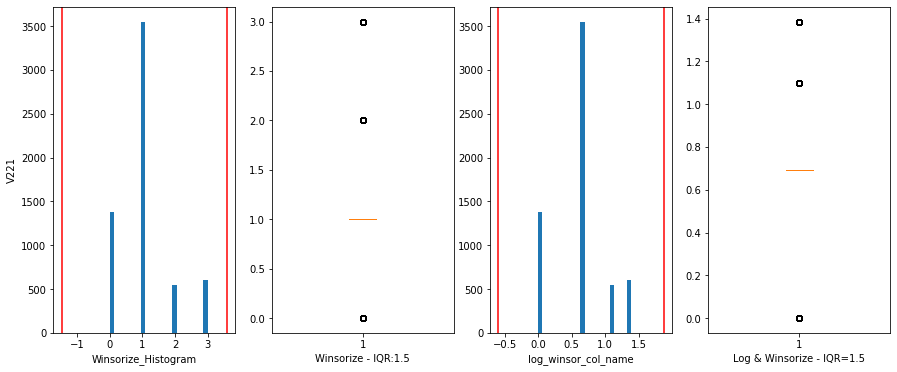

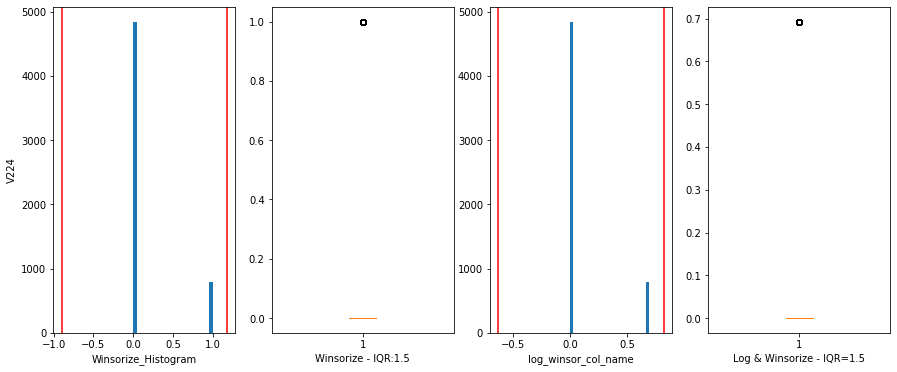

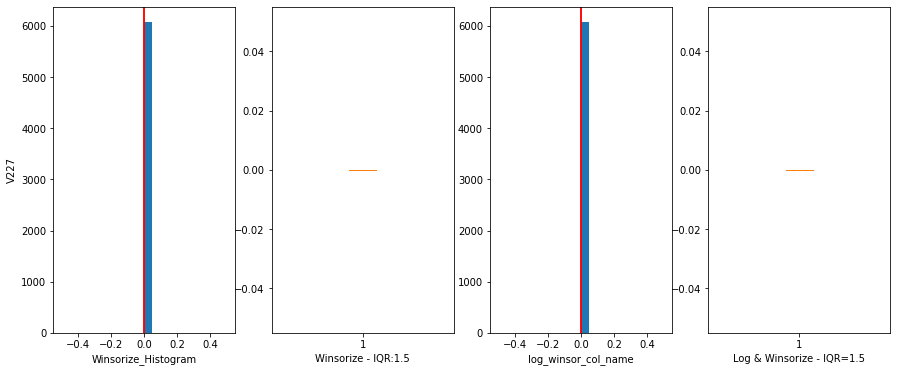

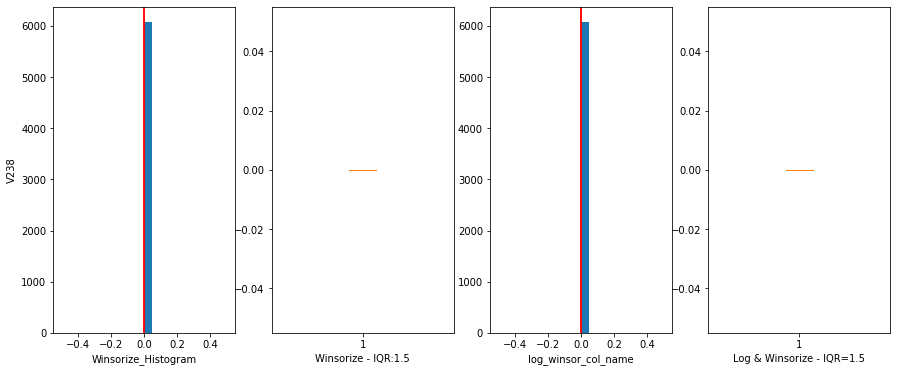

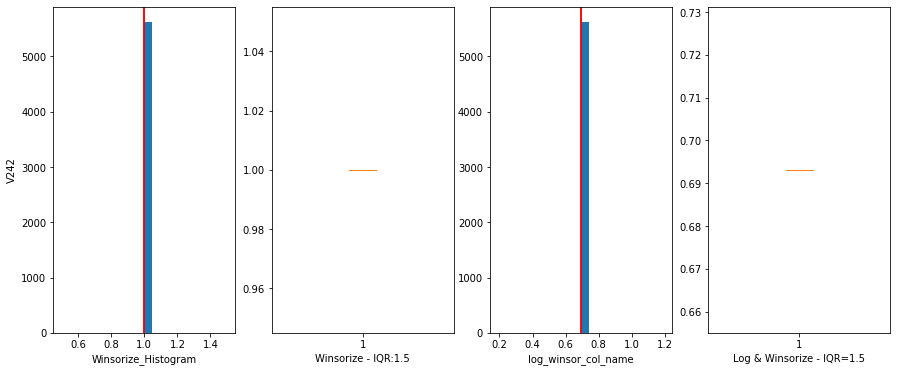

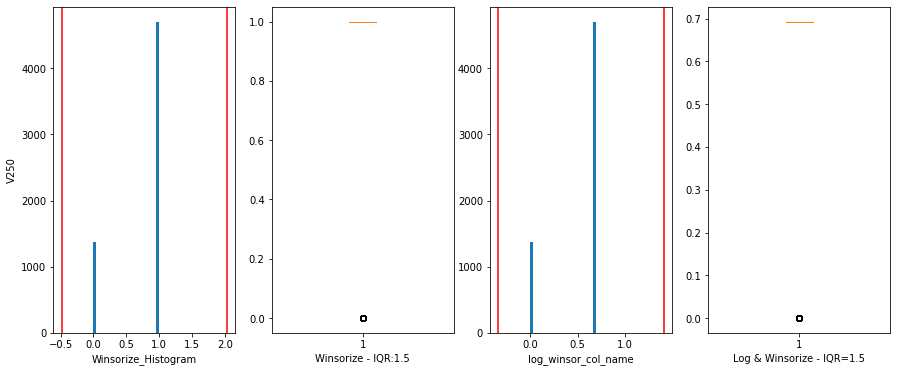

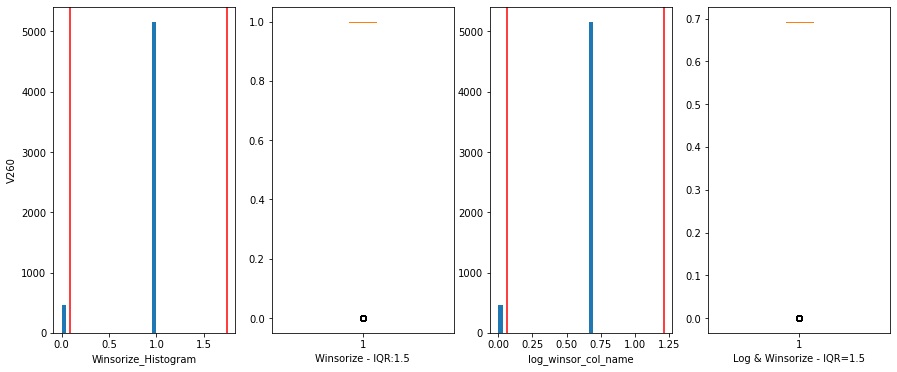

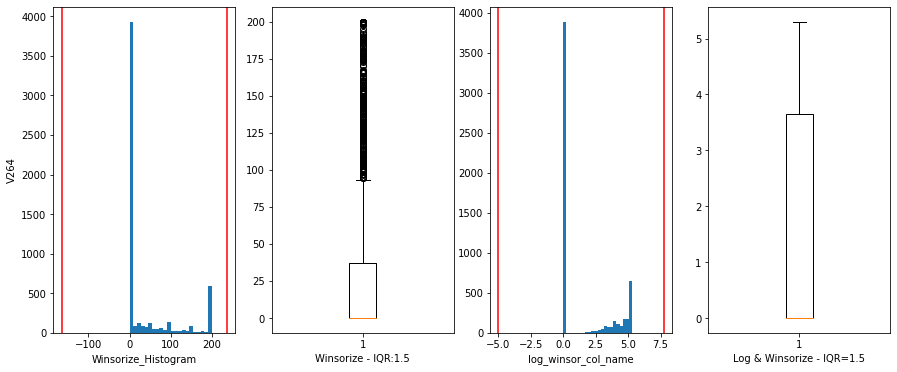

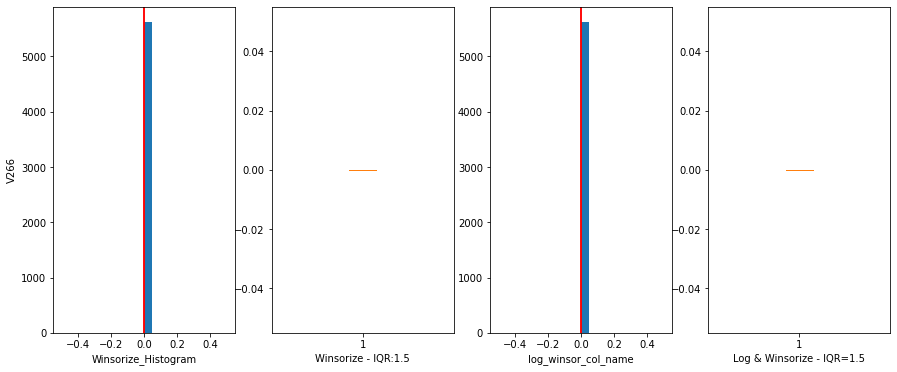

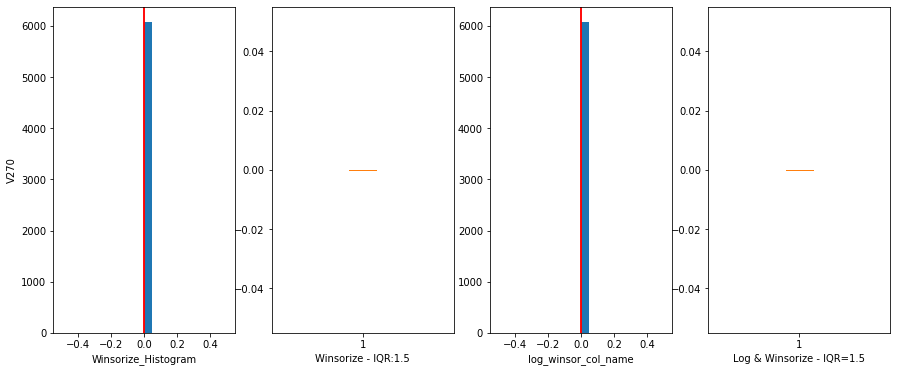

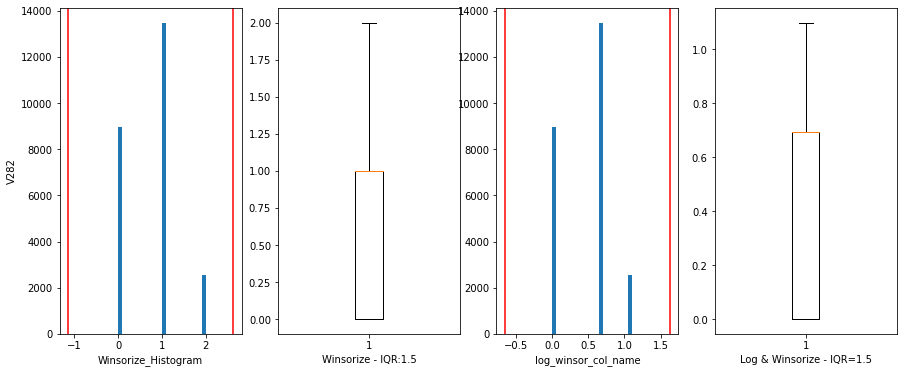

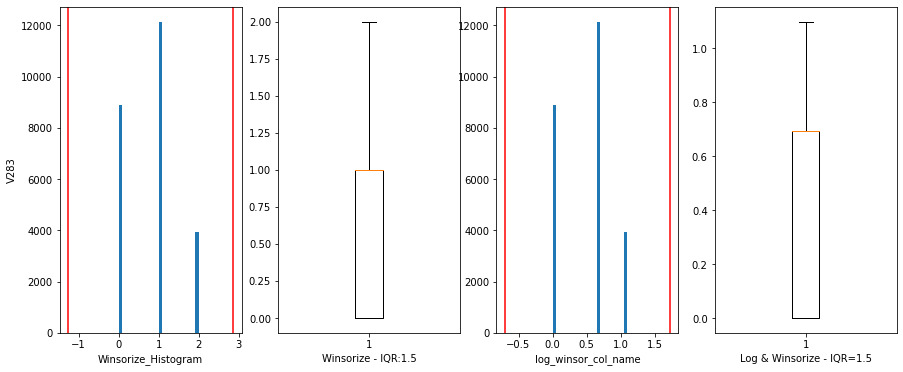

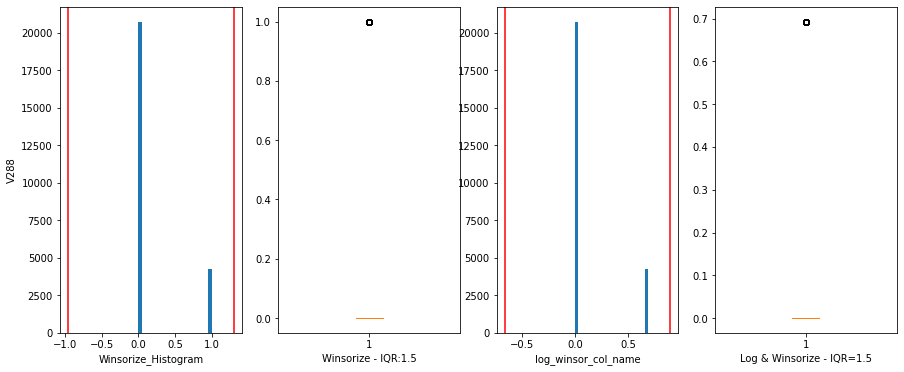

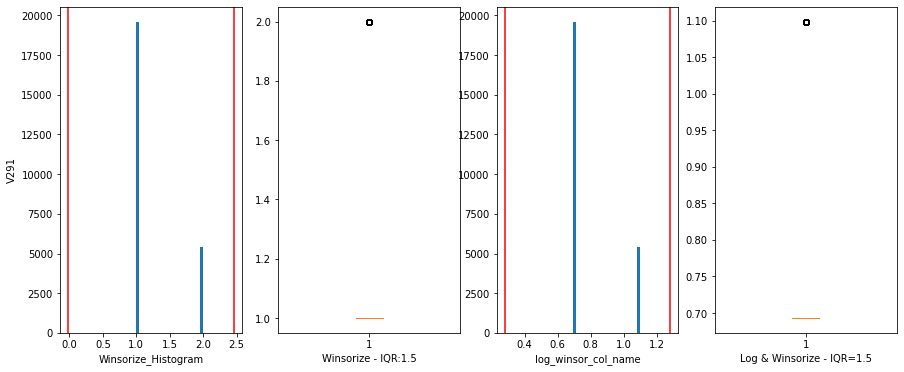

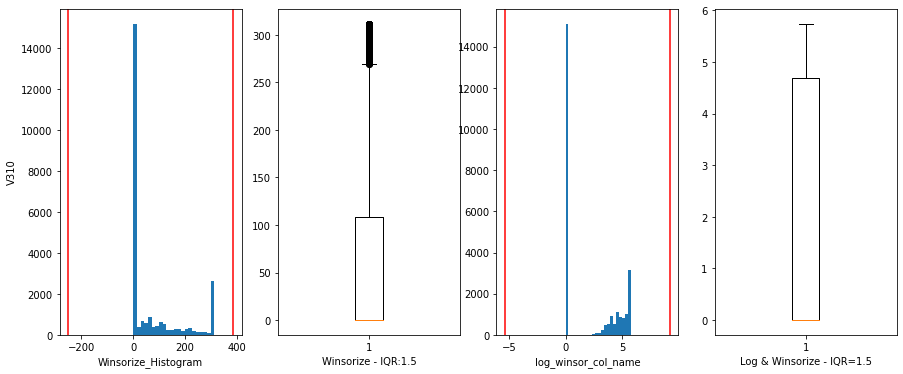

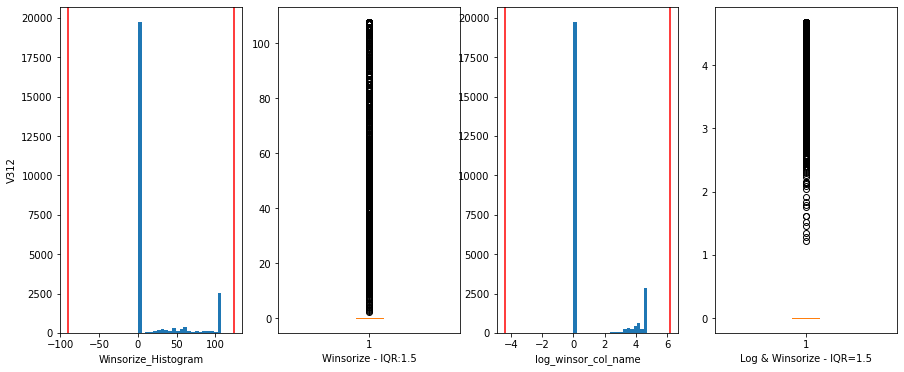

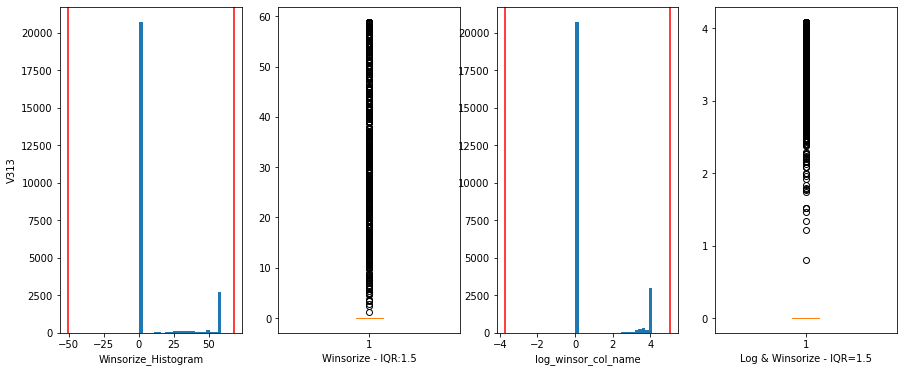

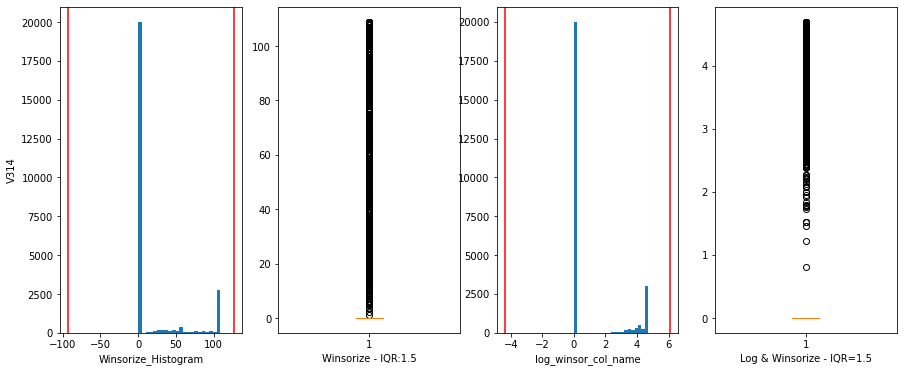

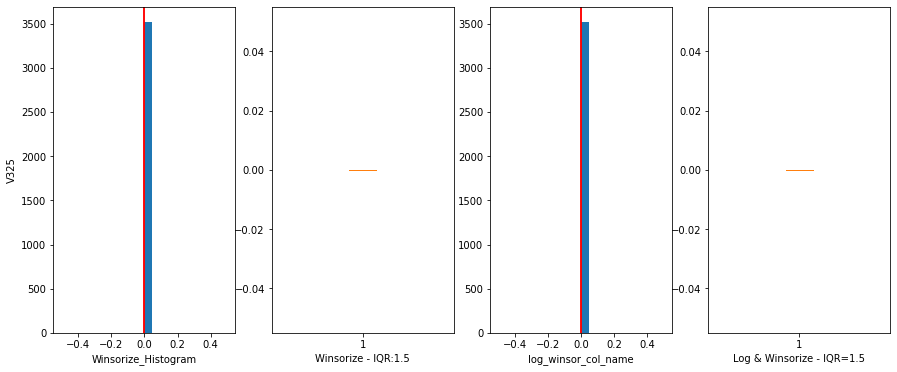

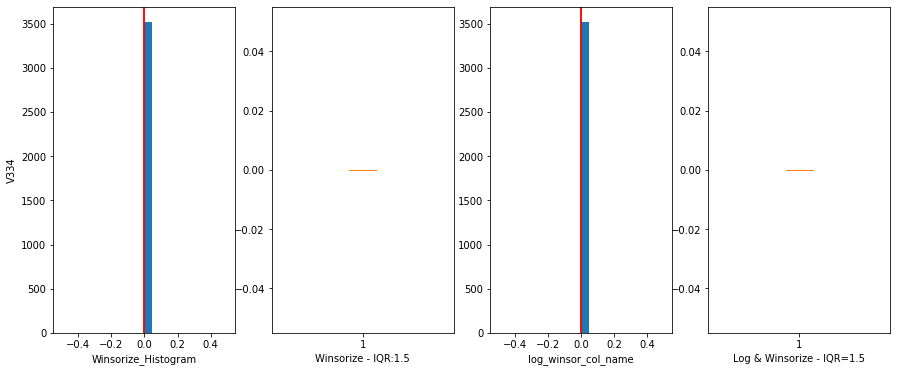

In [1286]:
for col in columns:
  plot_log_winsorize(df[col].dropna().to_frame(),col)

In [ ]:
# df.C1 = pd.Series( winsorize(df.C1, limits=(0, 0.1)))
# df.C1.describe()

In [ ]:
# ax = sns.boxplot(x='isFraud',y='C1', data=df)
# box_labels(ax=ax, df=df.sort_values('isFraud'),col1='isFraud',col2='C1');

In [ ]:
# df.C5 = pd.Series( winsorize(df.C5, limits=(0, 0.1)))
# df.C5.describe()

In [ ]:
# ax = sns.boxplot(x='isFraud',y='C5', data=df)
# box_labels(ax=ax, df=df.sort_values('isFraud'),col1='isFraud',col2='C5');

#### Plots

In [1172]:
# plot_cols(regex='V\d*', figsize=(30, 300), target='isFraud')

In [1173]:
# hist_countplot(regex='V\d*', figsize=(30, 200), nrow=25, ncolumn = 3)

In [1174]:
# box_countplot(regex='V\d*', figsize=(30, 200), nrow=25, ncolumn = 3)

### ProductCD

In [1175]:
column_details(regex='ProductCD')

Unique Values of the Features:
feature: DTYPE, NUNIQUE, NULL_RATE

ProductCD:  object, 5, %0.0
['C' 'H' 'R' 'S' 'W']



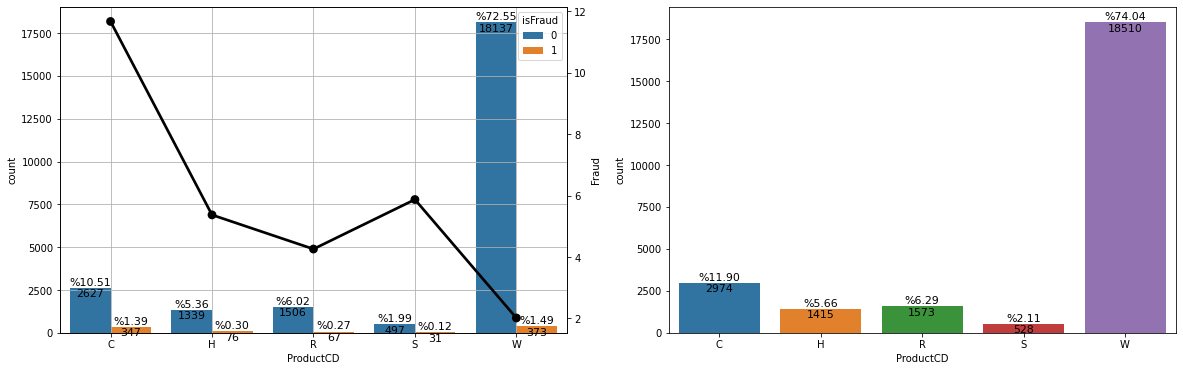

In [1176]:
plot_col('ProductCD')

### DeviceInfo

In [1177]:
column_details(regex='DeviceInfo')

Unique Values of the Features:
feature: DTYPE, NUNIQUE, NULL_RATE

DeviceInfo:  object, 505, %79.85
['0PM92' '2PS64 Build/NRD90M' '5010G Build/MRA58K' '5010S Build/MRA58K'
 '5011A Build/NRD90M' '5012G Build/MRA58K' '5025G Build/LMY47I' '5054N'
 '5056A Build/MMB29M' '5080A Build/MRA58K' '6045I Build/LRX22G'
 '8050G Build/LMY47I' '8062 Build/MRA58K' 'A0001 Build/MHC19Q' 'A577VL'
 'ALCATEL' 'ALE-L21 Build/HuaweiALE-L21' 'ALE-L23 Build/HuaweiALE-L23'
 'ASUS_X015D Build/NRD90M' 'ASUS_Z017D' 'Android 4.4.2' 'Android 5.1'
 'Android 6.0' 'Aquaris' 'Aquaris U Plus Build/NMF26F' 'Archos'
 'BAC-L03 Build/HUAWEIBAC-L03' 'BLADE V8 Build/NRD90M'
 'BLADE V8 SE Build/NRD90M' 'BLN-L21 Build/HONORBLN-L21'
 'BLU ENERGY X PLUS Build/LRX21M' 'Blade A475 Build/LMY47D'
 'Blade A510 Build/MRA58K' 'Blade L2 Plus Build/KOT49H'
 'Blade L3 Build/KOT49H' 'Blade V580 Build/LMY47D'
 'Blade V6 Max Build/MRA58K' 'Blade V6 Plus Build/MRA58K' 'Build/KOT49H'
 'Build/OPM1.171019.011' 'Build/OPR6.170623.013' 'C2104' 'C6603

In [1399]:
df.DeviceInfo.replace(regex={r'.*SAMSUNG.*': 'samsung',
                        '.*SM.*': 'samsung',
                        '^SC.*': 'samsung',
                        '.*Lenovo.*': 'lenovo',
                        '^V.*': 'lg',
                        '.*LG.*': 'lg',
                        '.*HUAWEI.*':'huawei',
                        '.*Huawei.*':'huawei',
                        '.*Moto.*':'motorola',
                        '.*moto.*':'motorola',
                        '.*HTC.*':'htc',
                        '.*Redmi.*':'redmi',
                        '.*Blade.*':'blade',
                        '.*BLADE.*':'blade',    
                        '.*Nexus.*':'nexus',
                        '.*GT.*':'gt',
                        '.*Pixel.*':'pixel',
                        '.*Hisense.*':'hisense',
                        '.*ALCATEL.*':'alcatel',
                        '.*ASUS.*':'asus',
                        '.*Ilium.*':'ilium',
                        '.*iris.*':'iris',
                        '.*Aquaris.*':'aquaris',
                        '.*Archos.*':'archos',
                        '.*Linux.*':'linux',
                        '.*Android.*':'android',
                        '.*Microsoft.*':'microsoft',
                        '.*MacOS.*':'macOS',
                        '.*Trident.*':'trident',
                        '.*rv.*':'rv',
                        '.*XT.*':'xt',
                        '.*Windows.*':'windows',
                        '.*TA.*':'ta',
                        '.*iOS.*':'ios',
                        '.*verykool.*':'verykool',
                        '.*0PM92.*':'htc',
                        '.*2PS64.*':'htc',
                        '.*HONOR.*':'honor',
                        '.*EGO.*':'other',
                         '^50.*':'alcatel',
                         '^60.*':'alcatel',
                         '^80.*':'alcatel',
                         '^A.*':'alcatel',
                         '^[CEFG].*':'sony',
                         '^SG.*':'sony',
                         '^M4.*':'m4',
                         '.*MOT.*':'morotola',
                         '^Mi.*':'xiaomi',
                         '^MI.*':'xiaomi',
                         '^Z.*':'zte',
                         '^K.*':'android'}, inplace=True)

df.DeviceInfo.replace(df.DeviceInfo.value_counts(dropna=False)[df.DeviceInfo.value_counts(dropna=False, normalize=True)<0.005].index,'other', inplace= True)
df.DeviceInfo.value_counts(dropna=False)

NaN         19962
windows      2105
ios           816
macOS         502
samsung       500
other         482
trident       326
rv            177
motorola      130
Name: DeviceInfo, dtype: int64

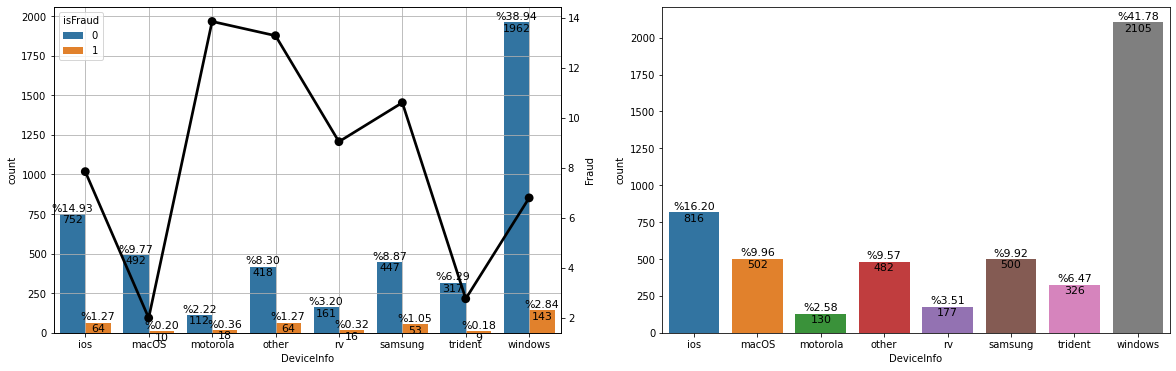

In [1400]:
plot_col('DeviceInfo')

### DeviceType

In [1180]:
column_details(regex='DeviceType')

Unique Values of the Features:
feature: DTYPE, NUNIQUE, NULL_RATE

DeviceType:  object, 2, %75.8
['desktop' 'mobile' nan]



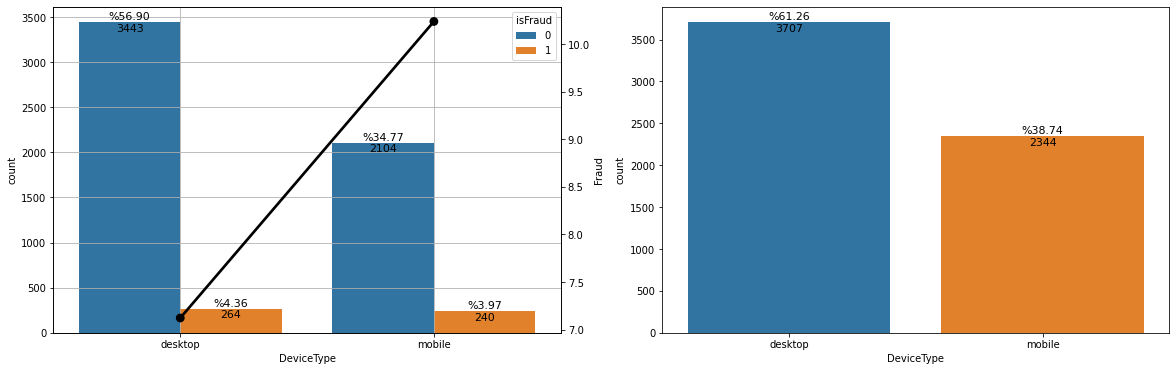

In [1181]:
plot_col('DeviceType')

### R_emaildomain

In [1182]:
column_details(regex='R_emaildomain')

Unique Values of the Features:
feature: DTYPE, NUNIQUE, NULL_RATE

R_emaildomain:  object, 53, %76.39
['aim.com' 'anonymous.com' 'aol.com' 'att.net' 'bellsouth.net'
 'cableone.net' 'charter.net' 'comcast.net' 'cox.net' 'earthlink.net'
 'embarqmail.com' 'frontier.com' 'frontiernet.net' 'gmail' 'gmail.com'
 'gmx.de' 'hotmail.co.uk' 'hotmail.com' 'hotmail.de' 'hotmail.es'
 'hotmail.fr' 'icloud.com' 'juno.com' 'live.com' 'live.com.mx' 'live.fr'
 'mac.com' 'mail.com' 'me.com' 'msn.com' 'netzero.com' 'optonline.net'
 'outlook.com' 'outlook.es' 'prodigy.net.mx' 'protonmail.com' 'ptd.net'
 'q.com' 'roadrunner.com' 'rocketmail.com' 'sbcglobal.net'
 'servicios-ta.com' 'suddenlink.net' 'twc.com' 'verizon.net' 'web.de'
 'windstream.net' 'yahoo.com' 'yahoo.com.mx' 'yahoo.de' 'yahoo.es'
 'yahoo.fr' 'ymail.com' nan]



In [1183]:
df.R_emaildomain =df.R_emaildomain.str.split('.').str[0]

In [1401]:
df.R_emaildomain.replace(df.R_emaildomain.value_counts(dropna=False)[df.R_emaildomain.value_counts(dropna=False,normalize=True)<0.005].index,'other', inplace= True)
df.R_emaildomain.value_counts(dropna=False)

NaN          19097
gmail         2452
hotmail       1234
anonymous      856
other          596
yahoo          593
aol            172
Name: R_emaildomain, dtype: int64

In [1402]:
df.R_emaildomain.describe()

count      5903
unique        6
top       gmail
freq       2452
Name: R_emaildomain, dtype: object

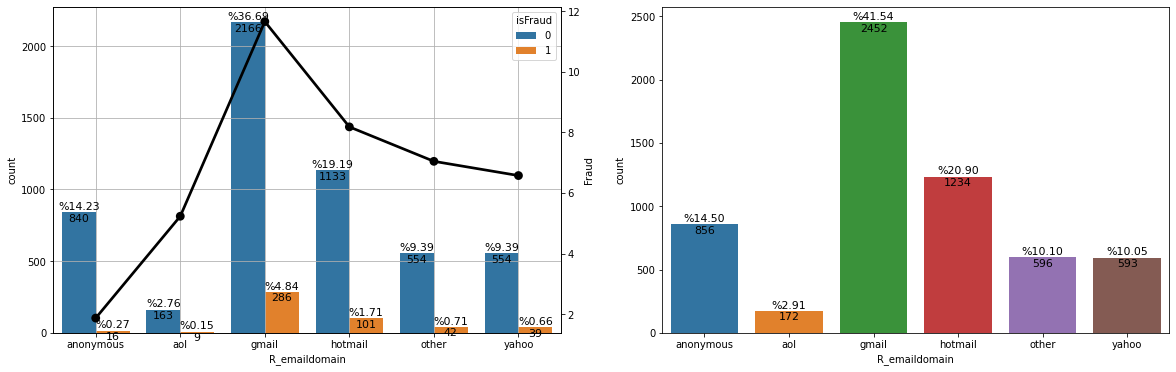

In [1403]:
plot_col('R_emaildomain')

### P_emaildomain

In [1404]:
column_details(regex='P_emaildomain')

Unique Values of the Features:
feature: DTYPE, NUNIQUE, NULL_RATE

P_emaildomain:  object, 57, %16.28
['aim.com' 'anonymous.com' 'aol.com' 'att.net' 'bellsouth.net'
 'cableone.net' 'centurylink.net' 'cfl.rr.com' 'charter.net' 'comcast.net'
 'cox.net' 'earthlink.net' 'embarqmail.com' 'frontier.com'
 'frontiernet.net' 'gmail' 'gmail.com' 'gmx.de' 'hotmail.co.uk'
 'hotmail.com' 'hotmail.de' 'hotmail.es' 'hotmail.fr' 'icloud.com'
 'juno.com' 'live.com' 'live.com.mx' 'live.fr' 'mac.com' 'mail.com'
 'me.com' 'msn.com' 'netzero.com' 'netzero.net' 'optonline.net'
 'outlook.com' 'outlook.es' 'prodigy.net.mx' 'protonmail.com' 'ptd.net'
 'q.com' 'roadrunner.com' 'rocketmail.com' 'sbcglobal.net' 'sc.rr.com'
 'servicios-ta.com' 'suddenlink.net' 'twc.com' 'verizon.net' 'web.de'
 'windstream.net' 'yahoo.com' 'yahoo.com.mx' 'yahoo.de' 'yahoo.es'
 'yahoo.fr' 'ymail.com' nan]



In [1188]:
df.P_emaildomain =df.P_emaildomain.str.split('.').str[0]

In [1405]:
df.P_emaildomain.replace(df.P_emaildomain.value_counts(dropna=False)[df.P_emaildomain.value_counts(dropna=False, normalize=True)<0.005].index,'other', inplace= True)
df.P_emaildomain.value_counts(dropna=False)

gmail        9669
yahoo        4366
NaN          4069
hotmail      1957
anonymous    1541
aol          1205
other         843
comcast       326
icloud        282
outlook       247
msn           170
live          166
att           159
Name: P_emaildomain, dtype: int64

In [1406]:
df.P_emaildomain.describe()

count     20931
unique       12
top       gmail
freq       9669
Name: P_emaildomain, dtype: object

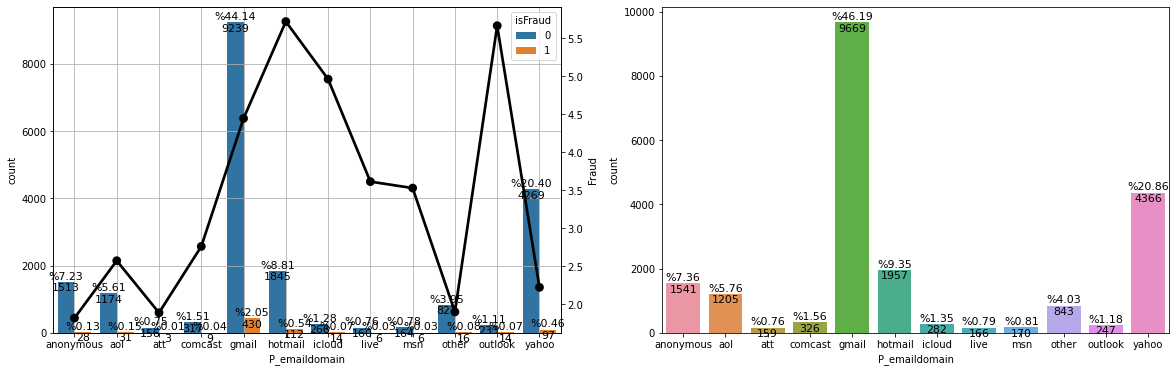

In [1407]:
plot_col('P_emaildomain')

### Transaction_hour

In [1198]:
column_details(regex='Transaction_hour')

Unique Values of the Features:
feature: DTYPE, NUNIQUE, NULL_RATE

Transaction_hour:  int64, 24, %0.0
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]



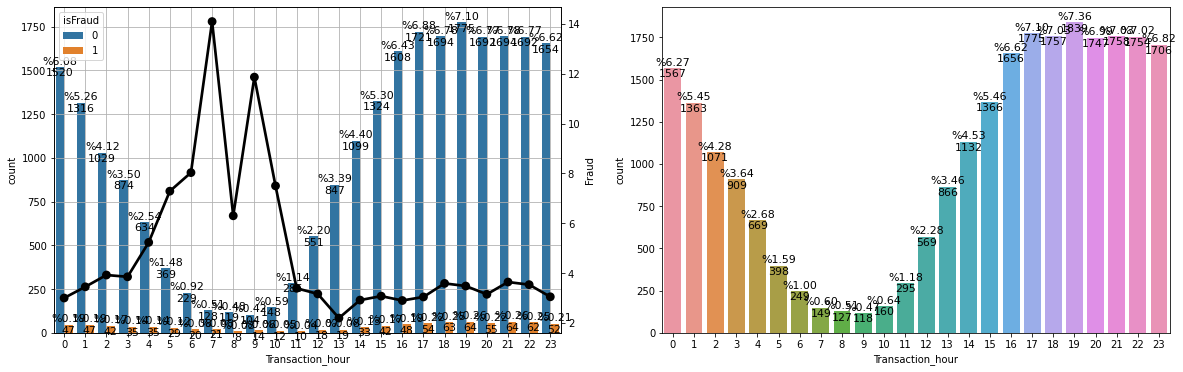

In [1199]:
plot_col('Transaction_hour')

### Transaction_day_of_week

In [1200]:
column_details(regex='Transaction_day_of_week')

Unique Values of the Features:
feature: DTYPE, NUNIQUE, NULL_RATE

Transaction_day_of_week:  int64, 7, %0.0
[0 1 2 3 4 5 6]



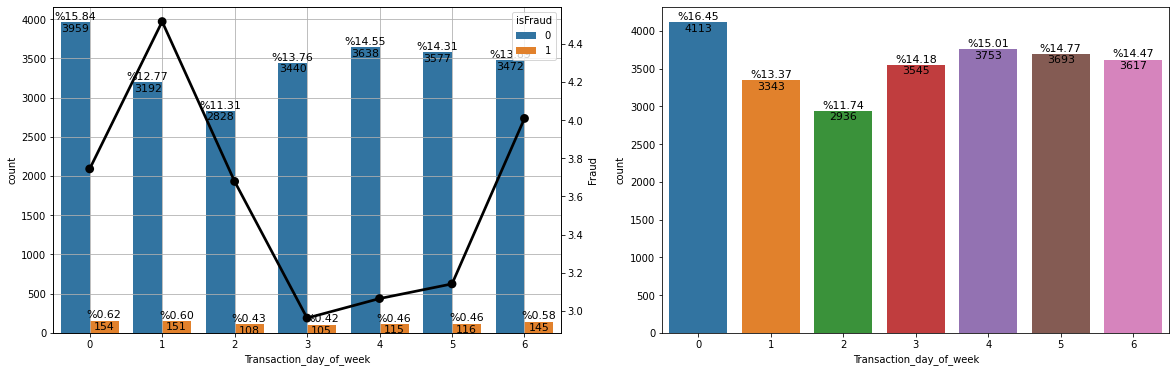

In [1201]:
plot_col('Transaction_day_of_week')

### TransactionDT

In [1244]:
df['TransactionDT']= data.TransactionDT.copy()

In [1245]:
column_details(regex='TransactionDT')

Unique Values of the Features:
feature: DTYPE, NUNIQUE, NULL_RATE

TransactionDT:  int64, 24978, %0.0
[   86469    86522    86998 ... 15809412 15809554 15809796]



In [1246]:
df['TransactionDT'] = df['TransactionDT']//(3600*24)

In [1259]:
df['TransactionDT'].describe()

count    25000.000000
mean        84.609520
std         53.252432
min          1.000000
25%         35.000000
50%         84.000000
75%        129.000000
max        182.000000
Name: TransactionDT, dtype: float64

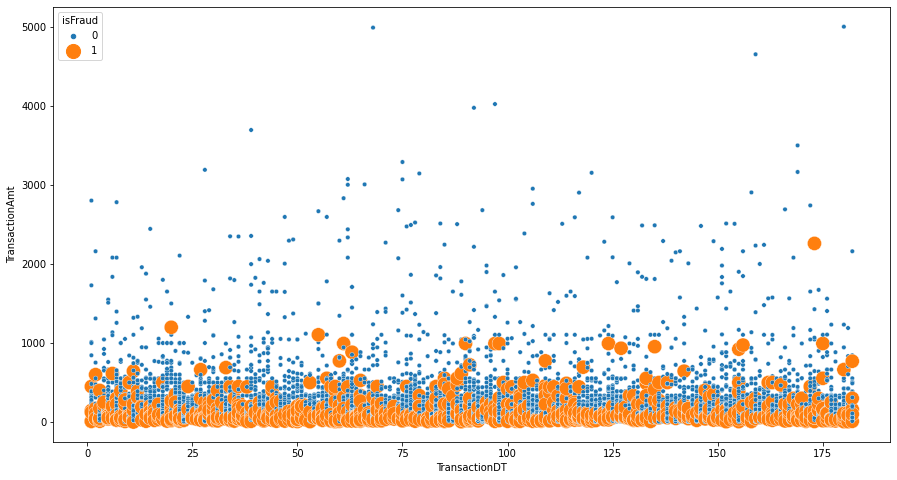

In [1269]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='TransactionDT', y='TransactionAmt', data=df, hue='isFraud', size="isFraud", sizes=(200, 20));

In [1270]:
df = df.drop('TransactionDT',axis=1)

### TransactionAmt

In [1408]:
column_details(regex='TransactionAmt')

Unique Values of the Features:
feature: DTYPE, NUNIQUE, NULL_RATE

TransactionAmt:  float64, 3374, %0.0
[4.24000e-01 8.61000e-01 8.78000e-01 ... 4.65292e+03 4.98997e+03
 5.00182e+03]



In [1272]:
df.TransactionAmt.describe()

count    25000.000000
mean       134.149847
std        228.828829
min          0.424000
25%         43.950000
50%         67.950000
75%        125.000000
max       5001.820000
Name: TransactionAmt, dtype: float64

#### Handling Outliers

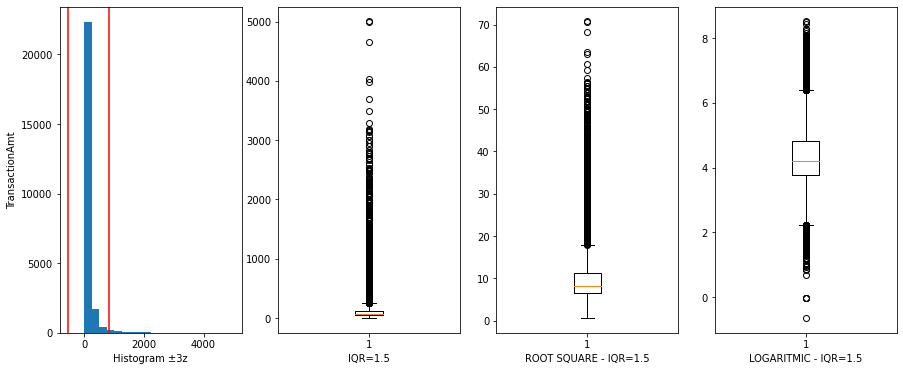

In [1273]:
col_plot(df,'TransactionAmt')

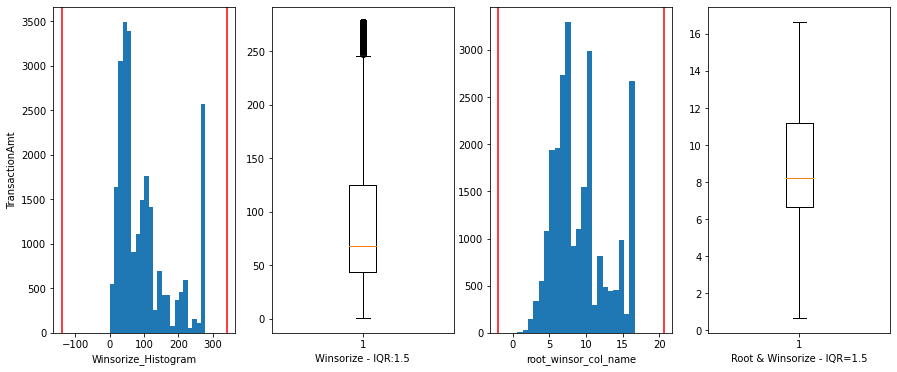

In [1274]:
plot_winsorize(df,'TransactionAmt')

In [1275]:
df.TransactionAmt = pd.Series( winsorize(np.sqrt(df.TransactionAmt), limits=(0, 0.1)))
df.TransactionAmt.describe()

count    25000.000000
mean         9.342184
std          3.764182
min          0.651153
25%          6.629480
50%          8.243179
75%         11.180340
max         16.673332
Name: TransactionAmt, dtype: float64

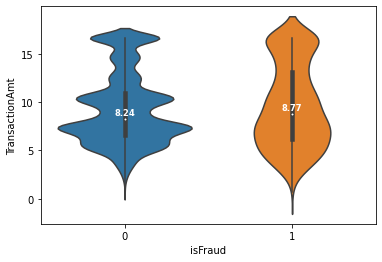

In [1409]:
ax = sns.violinplot(x='isFraud',y='TransactionAmt', data=df)
box_labels(ax=ax, df=df.sort_values('isFraud'),col1='isFraud',col2='TransactionAmt');

### M1-9

In [1206]:
column_details(regex='M\d*')

Unique Values of the Features:
feature: DTYPE, NUNIQUE, NULL_RATE

M2:  object, 2, %46.3
['F' 'T' nan]

M3:  object, 2, %46.3
['F' 'T' nan]

M4:  object, 3, %47.49
['M0' 'M1' 'M2' nan]

M5:  object, 2, %59.48
['F' 'T' nan]

M6:  object, 2, %29.17
['F' 'T' nan]

M7:  object, 2, %58.73
['F' 'T' nan]

M8:  object, 2, %58.72
['F' 'T' nan]

M9:  object, 2, %58.72
['F' 'T' nan]



#### Multicolliniarity

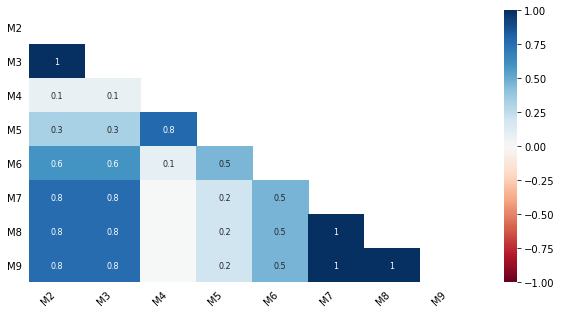

In [ ]:
msno.heatmap(df[columns], figsize=(10, 5), fontsize=10);

In [ ]:
pd.Series([cramers_v(df.M3,df[col]) for col in columns], index=columns).sort_values(ascending=False)

M3    0.999773
M2    0.668499
M9    0.214225
M8    0.080121
M7    0.049080
M4    0.032426
M5    0.028156
M6    0.024167
dtype: float64

In [ ]:
cramers_v(df.M2,df.M3)

0.6684993114071964

> We determined the correlation threshold upper than 0.8. Therefore, we don't drop M3.

#### Handling Outliers

> There is no outlier in M columns

#### Plots

In [1207]:
# plot_col('M4')

In [1235]:
# plot_cols(regex='M\d*', figsize=(7, 25), target='isFraud')

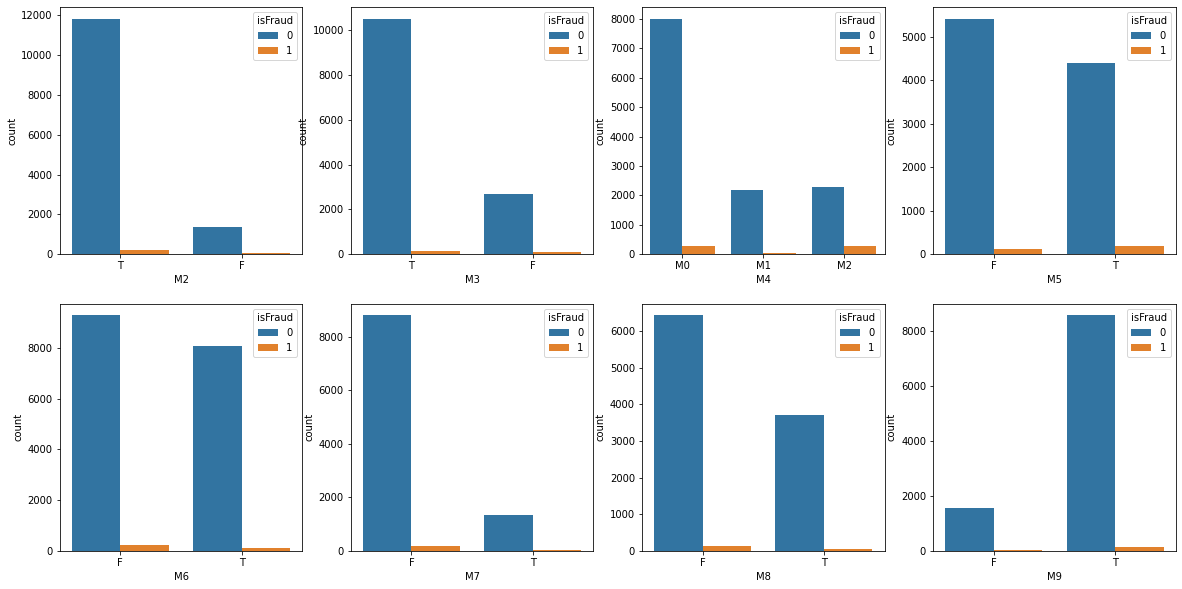

In [1209]:
hist_countplot(regex='M\d*', figsize=(20, 10), nrow=2, ncolumn = 4)

In [1210]:
# box_countplot(regex='M\d*', figsize=(20, 10), nrow=4, ncolumn = 2)

### D1-15

In [1349]:
column_details(regex='^D\d')

Unique Values of the Features:
feature: DTYPE, NUNIQUE, NULL_RATE

D1:  float64, 639, %0.24
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 

#### Multicolliniarity

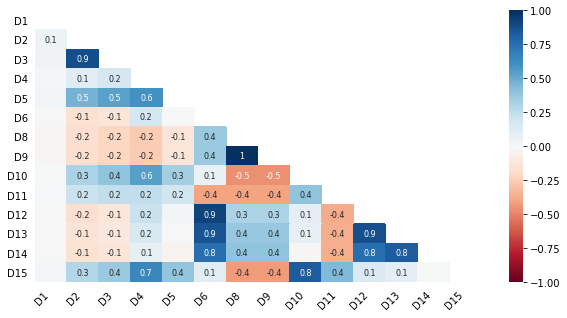

In [1215]:
msno.heatmap(df[columns], figsize=(10, 5), fontsize=10);

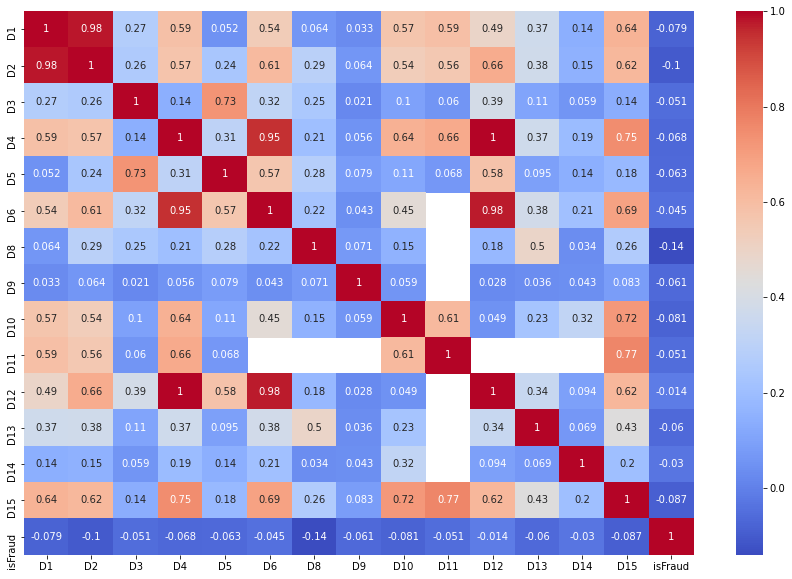

In [1216]:
plt.figure(figsize=(15,10))
sns.heatmap(df[columns+['isFraud']].corr(),annot=True, cmap="coolwarm");

In [ ]:
# corrank(df[columns], 0.8)

In [1218]:
drop_col = remove_collinear_features(df[columns],0.80)
drop_col

{'D12', 'D2', 'D6'}

In [1219]:
df = df.drop(drop_col, axis=1)

#### Handling Outliers

In [1220]:
columns=[col for col in df.columns if re.search('^D\d', col)]

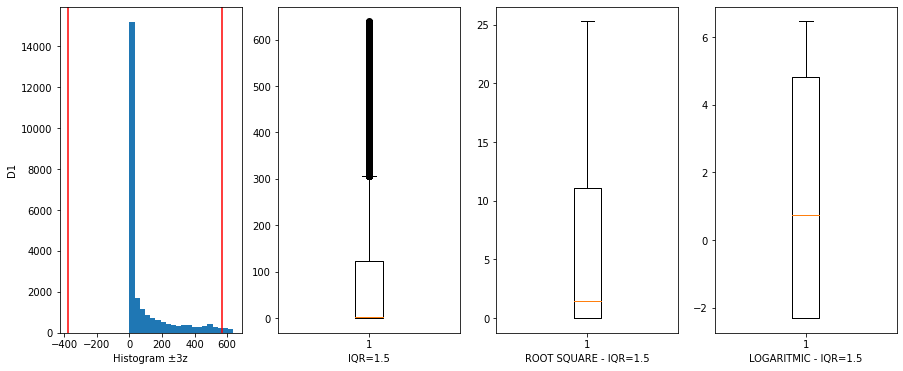

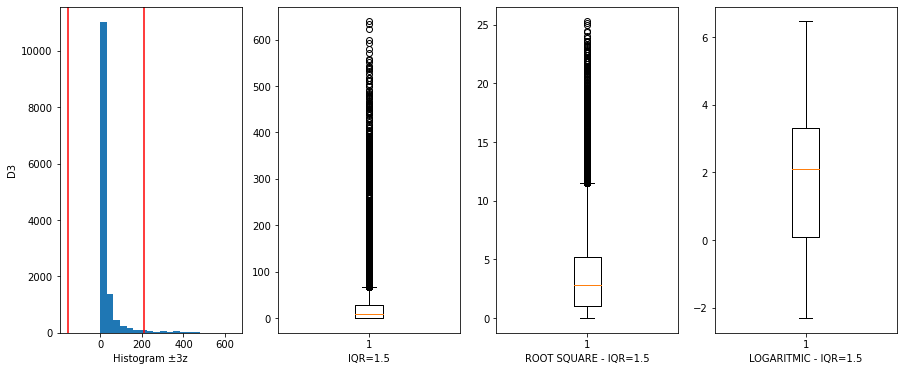

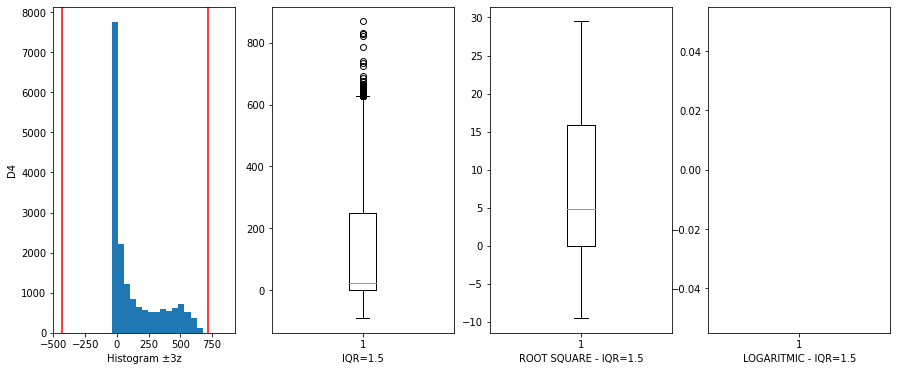

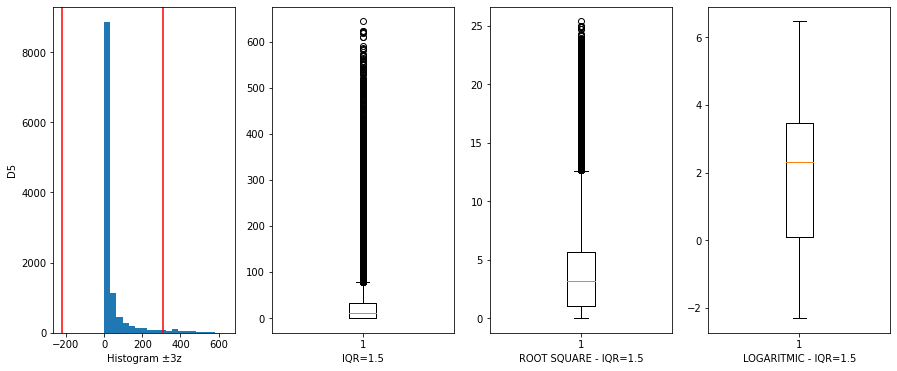

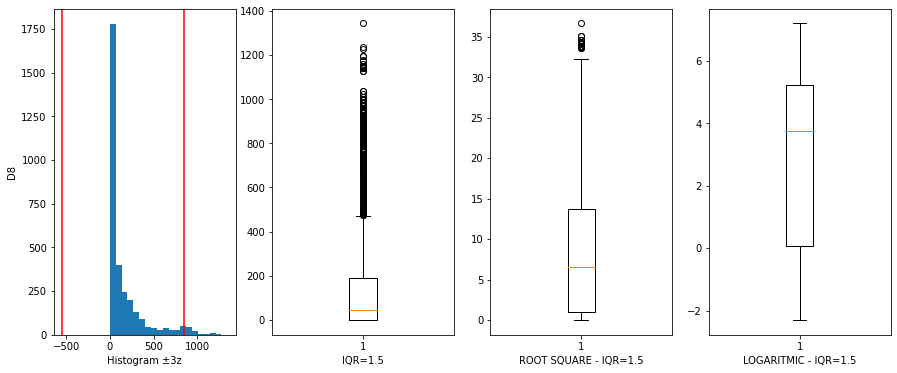

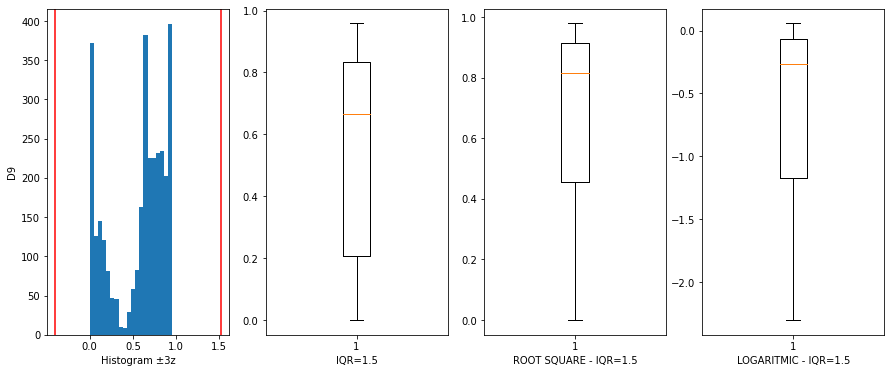

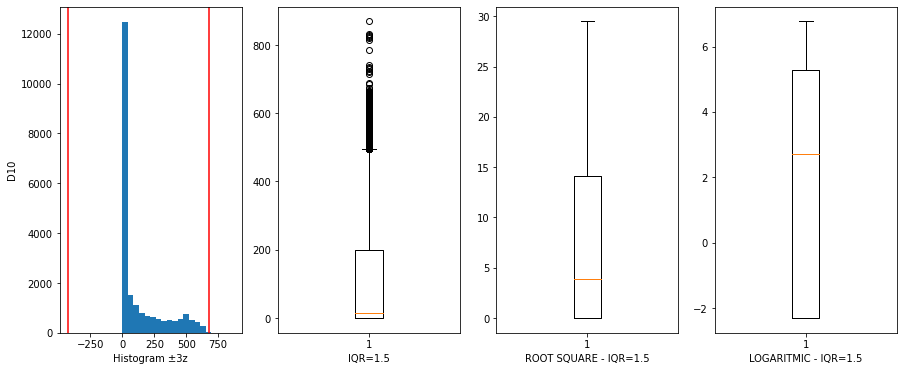

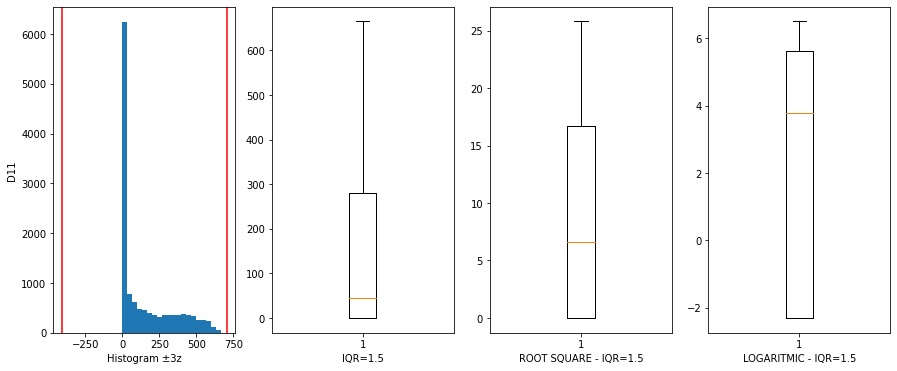

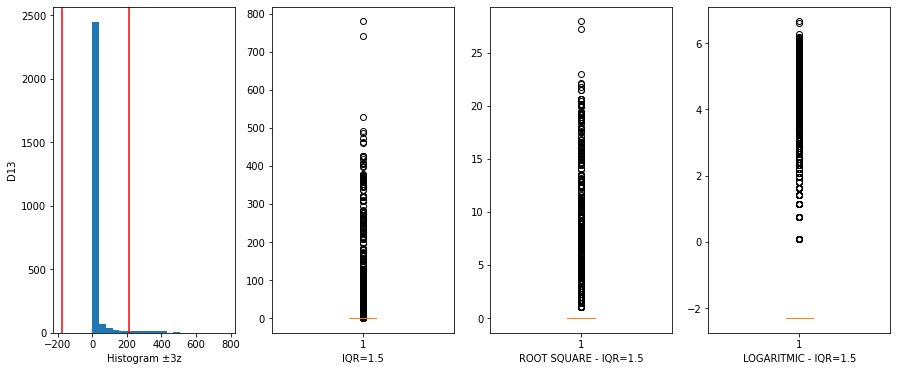

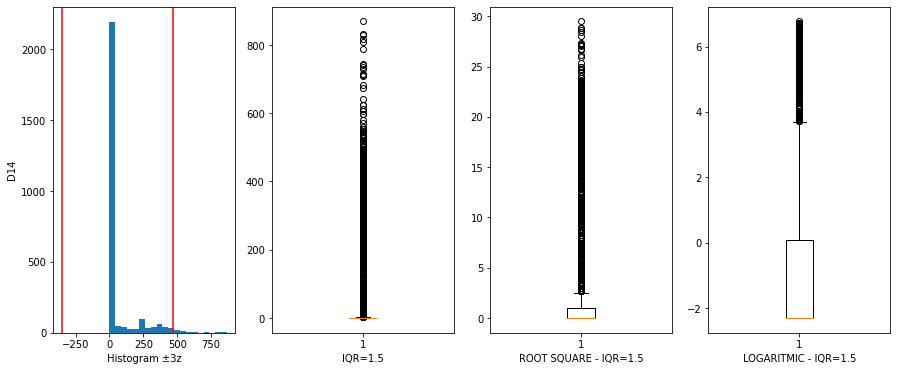

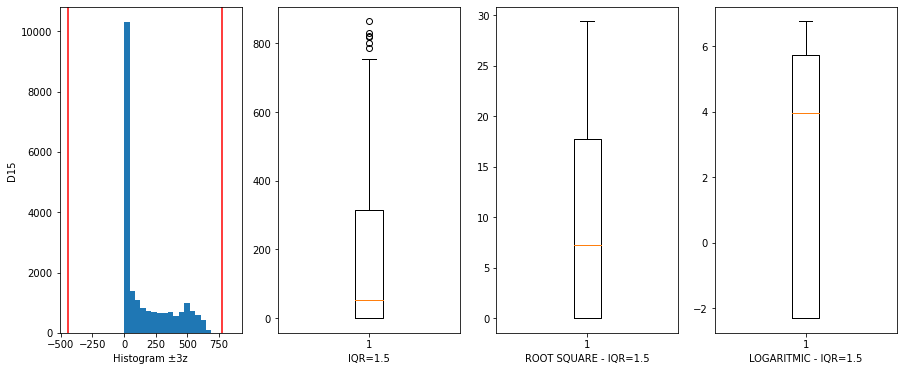

In [1221]:
for col in columns:
  col_plot(df[col].dropna().to_frame(), col)

In [1222]:
# for col in columns:
#   plot_winsorize(df[col].dropna().to_frame(),col)

In [1223]:
# for col in columns[4:]:
#   plot_log_winsorize(df[col].dropna().to_frame(),col)

In [1225]:
df[['D1','D3','D5','D8','D10','D15']] = df[['D1','D3','D5','D8','D10','D15']].apply(lambda x: np.log(x+1), axis=1)

In [1226]:
df.D4 = df.D4.apply(lambda x: np.sqrt(x))

In [1227]:
df.D14 = df.D14.apply(lambda x: 1 if x>0 else x)
df.D14.value_counts(dropna=False)

NaN    22306
0.0     1983
1.0      711
Name: D14, dtype: int64

In [1228]:
df.D13 = df.D14.apply(lambda x: 1 if x>0 else x)
df.D13.value_counts(dropna=False)

NaN    22306
0.0     1983
1.0      711
Name: D13, dtype: int64

#### Plots

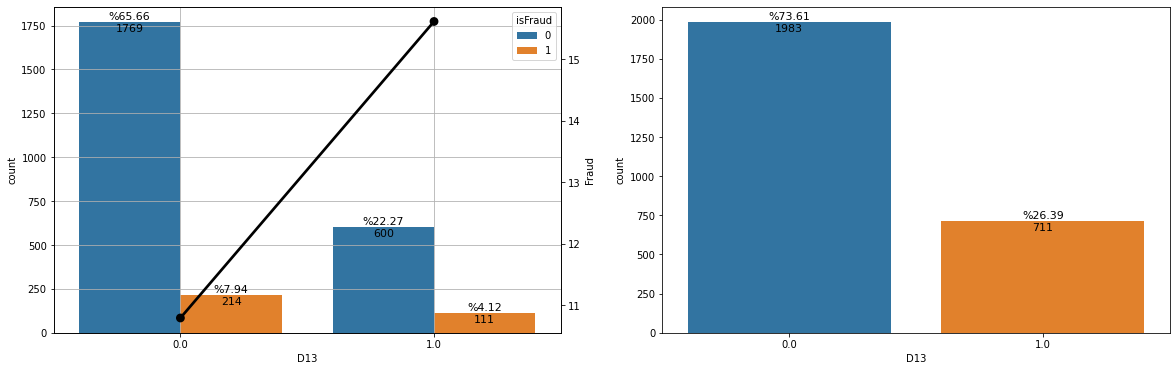

In [1229]:
plot_col('D13')

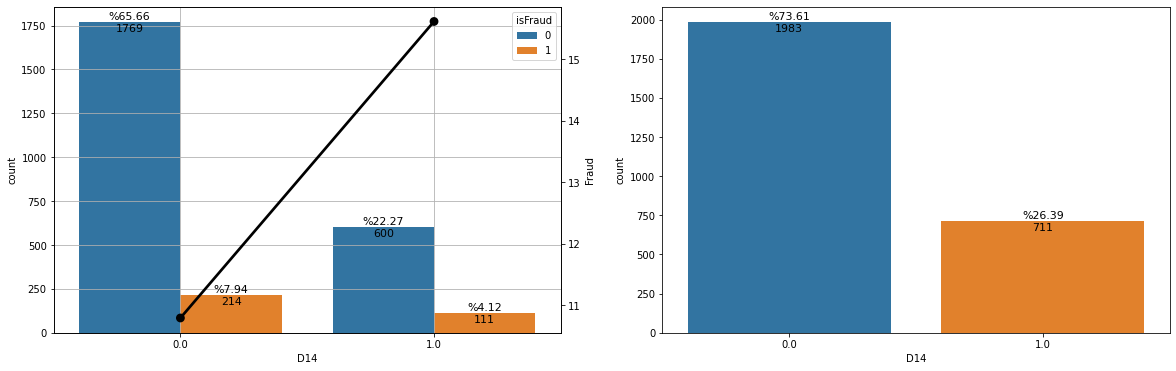

In [1230]:
plot_col('D14')

In [ ]:
# plot_cols(regex='^D\d', figsize=(30,50), target='isFraud')

In [ ]:
# hist_countplot(regex='^D\d', figsize=(20, 15), nrow=3, ncolumn = 5)

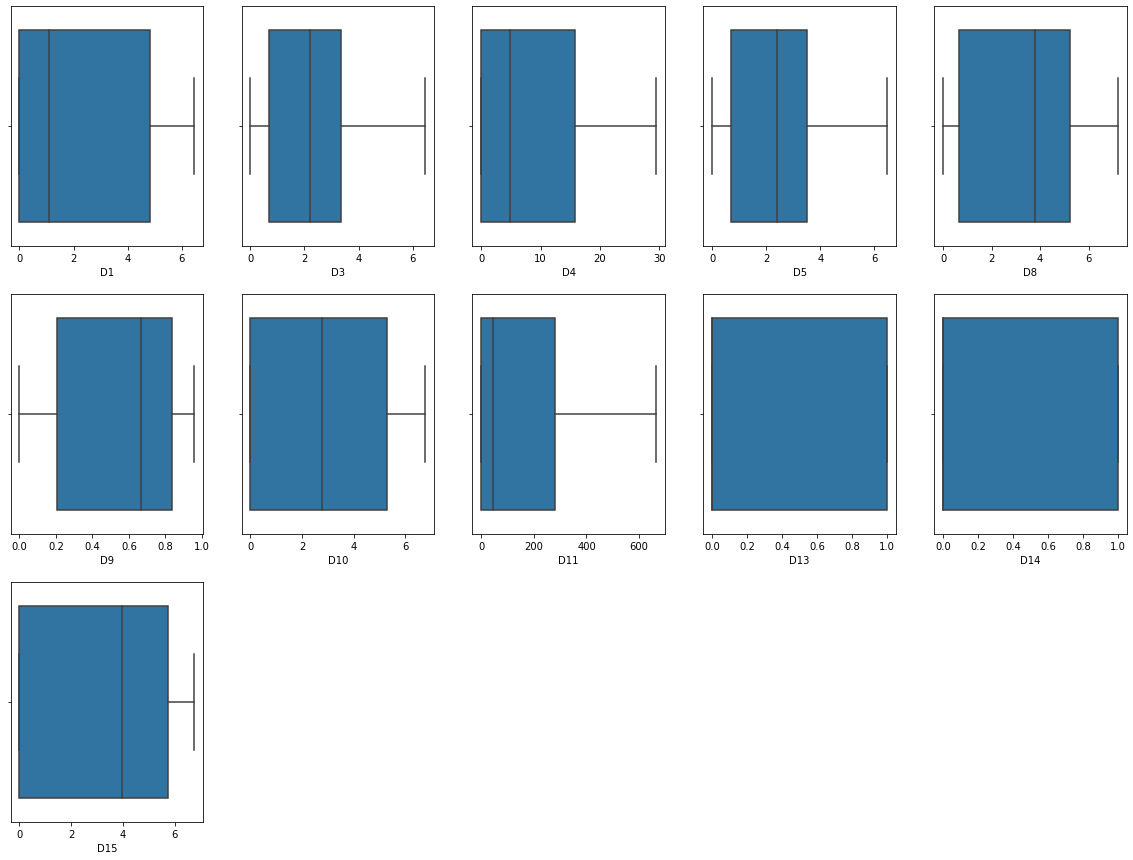

In [1233]:
box_countplot(regex='^D\d', figsize=(20, 15), nrow=3, ncolumn = 5)

### C1-14

In [1351]:
column_details(regex='^C\d')

Unique Values of the Features:
feature: DTYPE, NUNIQUE, NULL_RATE

C1:  int64, 344, %0.0
[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   50   51   52   53   55   56   57
   58   59   60   61   62   63   64   65   67   68   69   70   71   72
   73   74   75   76   77   78   79   80   81   82   83   84   85   86
   87   88   89   90   91   92   93   94   95   96   97   98   99  100
  101  102  103  104  105  106  107  108  109  110  111  112  113  114
  115  116  117  118  119  120  121  122  123  124  125  126  127  128
  129  130  131  132  133  134  135  136  137  138  139  140  141  142
  143  144  145  146  147  148  149  150  151  152  153  154  155  156
  157  158  159  160  161  162  163  164  165  166  167  168  169  170
  172  173  174  175  176  177  178  179  180  181  182  18

#### Multicolliarity

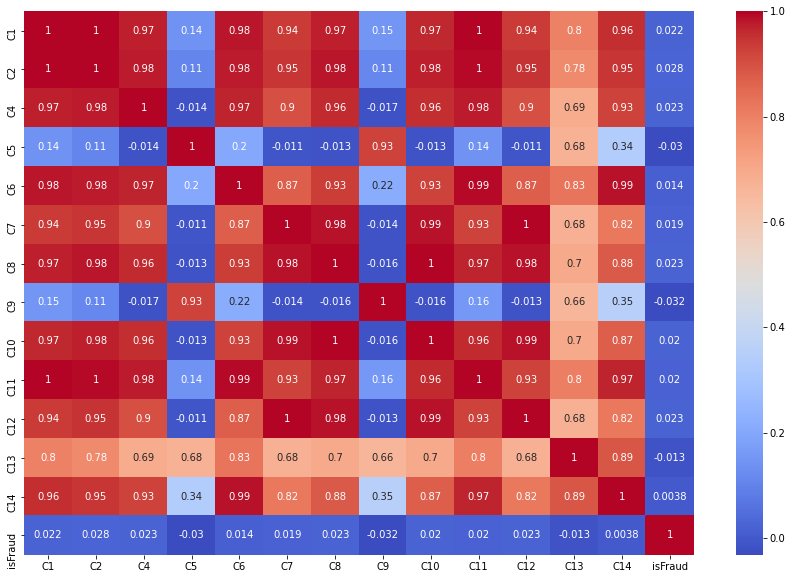

In [1352]:
plt.figure(figsize=(15,10))
sns.heatmap(df[columns+['isFraud']].corr(),annot=True, cmap="coolwarm");

In [1369]:
# corrank(df[columns], 0.8)

Empty DataFrame
Columns: [Feature1, Feature2, corr]
Index: []

In [1354]:
drop_col = remove_collinear_features(df[columns],0.80)
drop_col

{'C10', 'C11', 'C12', 'C13', 'C14', 'C2', 'C4', 'C6', 'C7', 'C8', 'C9'}

In [1355]:
df = df.drop(drop_col, axis=1)

#### Handling Outliers

In [1356]:
columns=[col for col in df.columns if re.search('^C\d', col)]

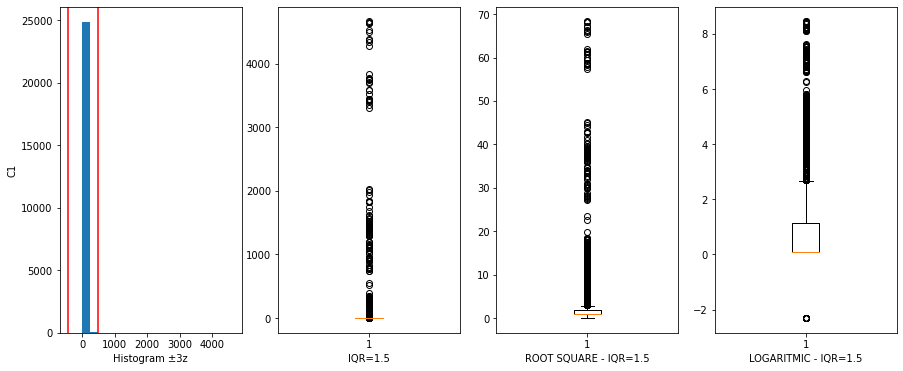

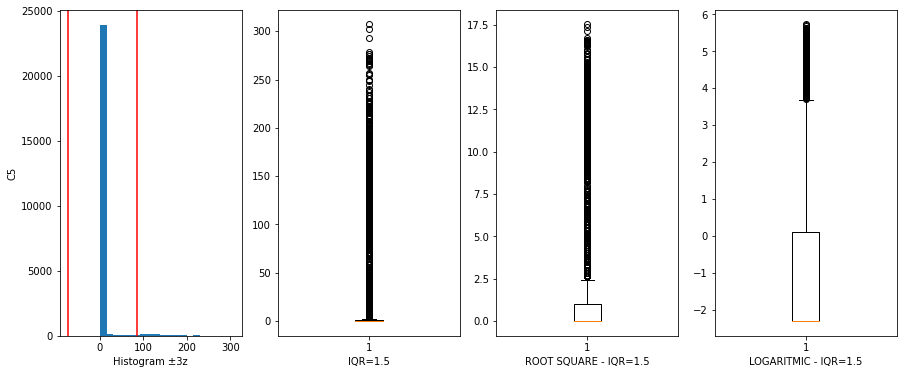

In [1357]:
for col in columns:
  col_plot(df[col].dropna().to_frame(),col)

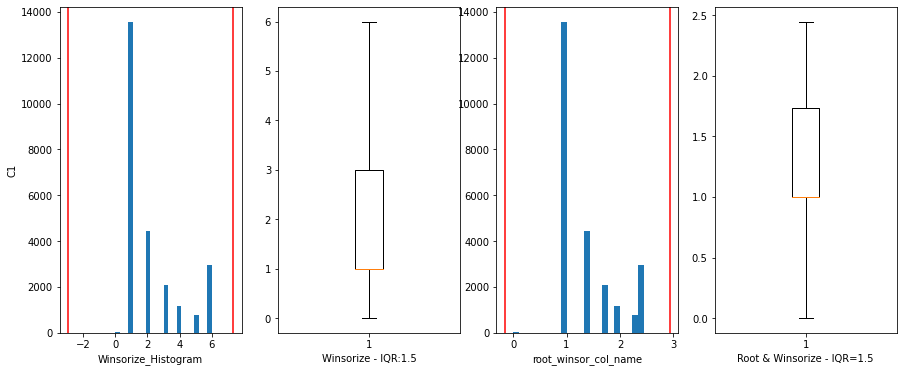

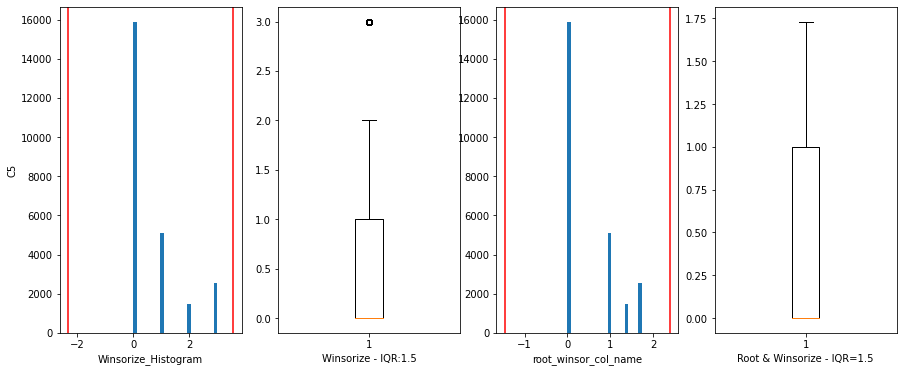

In [1358]:
for col in columns:
  plot_winsorize(df[col].dropna().to_frame(),col)

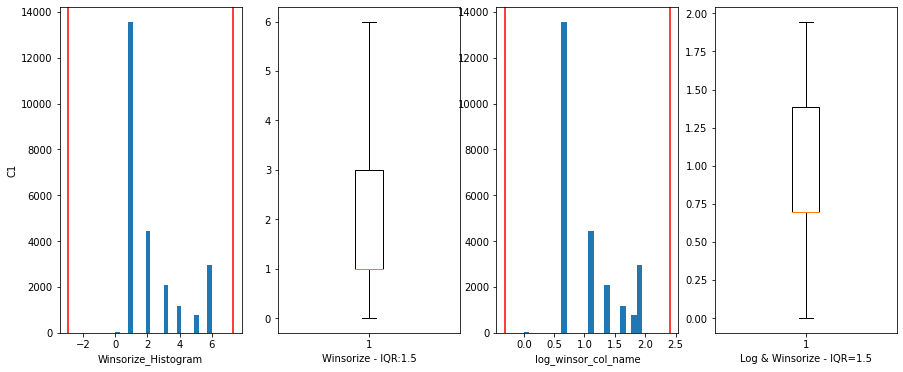

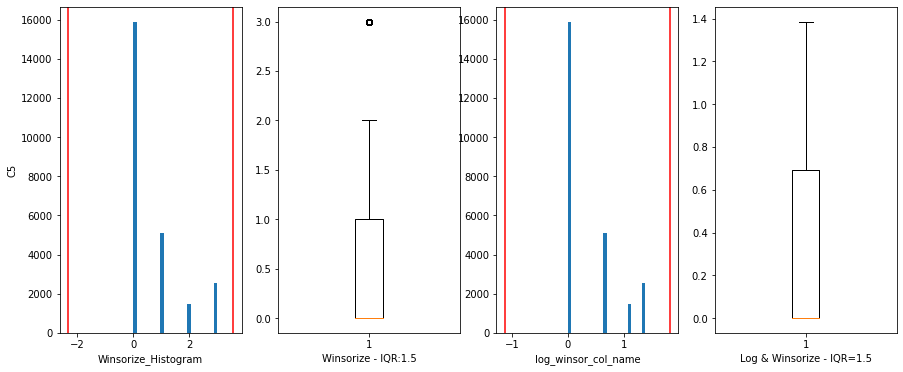

In [1359]:
for col in columns:
  plot_log_winsorize(df[col].dropna().to_frame(),col)

In [1360]:
df.C1 = pd.Series( winsorize(df.C1, limits=(0, 0.1)))
df.C1.describe()

count    25000.00000
mean         2.19848
std          1.71511
min          0.00000
25%          1.00000
50%          1.00000
75%          3.00000
max          6.00000
Name: C1, dtype: float64

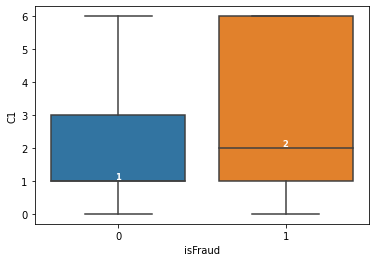

In [1361]:
ax = sns.boxplot(x='isFraud',y='C1', data=df)
box_labels(ax=ax, df=df.sort_values('isFraud'),col1='isFraud',col2='C1');

In [1362]:
df.C5 = pd.Series( winsorize(df.C5, limits=(0, 0.1)))
df.C5.describe()

count    25000.000000
mean         0.627840
std          0.981191
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: C5, dtype: float64

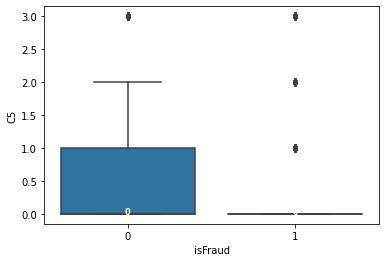

In [1363]:
ax = sns.boxplot(x='isFraud',y='C5', data=df)
box_labels(ax=ax, df=df.sort_values('isFraud'),col1='isFraud',col2='C5');

#### Plots

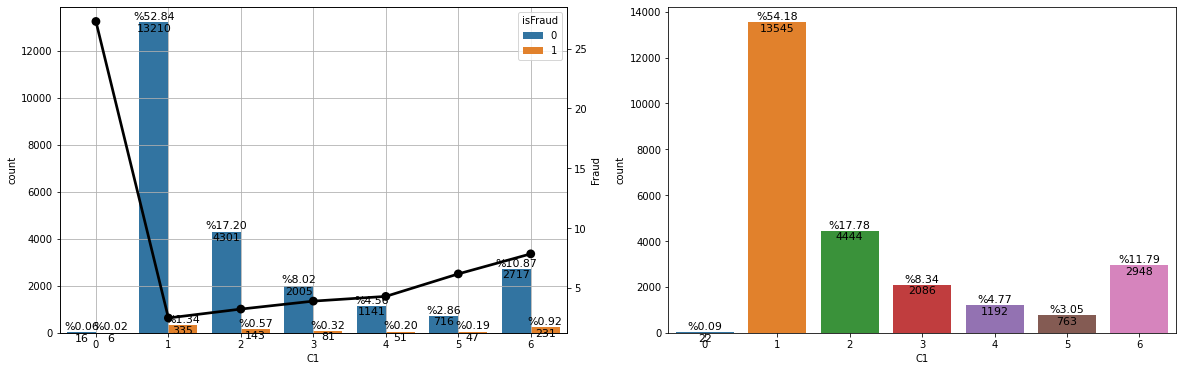

In [1370]:
plot_col('C1')

In [1365]:
# plot_cols(regex='^C\d', figsize=(20, 1), target='isFraud')

In [1366]:
# hist_countplot(regex='^C\d', figsize=(20, 15), nrow=3, ncolumn = 5)

In [1367]:
# box_countplot(regex='^C\d', figsize=(20,15), nrow=3, ncolumn = 5)

### dist1-2

In [1371]:
column_details(regex='^dist')

Unique Values of the Features:
feature: DTYPE, NUNIQUE, NULL_RATE

dist1:  float64, 915, %59.91
[0.000e+00 1.000e+00 2.000e+00 3.000e+00 4.000e+00 5.000e+00 6.000e+00
 7.000e+00 8.000e+00 9.000e+00 1.000e+01 1.100e+01 1.200e+01 1.300e+01
 1.400e+01 1.500e+01 1.600e+01 1.700e+01 1.800e+01 1.900e+01 2.000e+01
 2.100e+01 2.200e+01 2.300e+01 2.400e+01 2.500e+01 2.600e+01 2.700e+01
 2.800e+01 2.900e+01 3.000e+01 3.100e+01 3.200e+01 3.300e+01 3.400e+01
 3.500e+01 3.600e+01 3.700e+01 3.800e+01 3.900e+01 4.000e+01 4.100e+01
 4.200e+01 4.300e+01 4.400e+01 4.500e+01 4.600e+01 4.700e+01 4.800e+01
 4.900e+01 5.000e+01 5.100e+01 5.200e+01 5.300e+01 5.400e+01 5.500e+01
 5.600e+01 5.700e+01 5.800e+01 5.900e+01 6.000e+01 6.100e+01 6.200e+01
 6.300e+01 6.400e+01 6.500e+01 6.600e+01 6.700e+01 6.800e+01 6.900e+01
 7.000e+01 7.100e+01 7.200e+01 7.300e+01 7.400e+01 7.500e+01 7.600e+01
 7.700e+01 7.800e+01 7.900e+01 8.000e+01 8.100e+01 8.200e+01 8.300e+01
 8.400e+01 8.500e+01 8.600e+01 8.700e+01 8.800e+01 8

In [1372]:
df.dist1.describe()

count    10023.000000
mean       112.698294
std        357.854276
min          0.000000
25%          3.000000
50%          8.000000
75%         23.000000
max       6466.000000
Name: dist1, dtype: float64

#### Multicolliarity

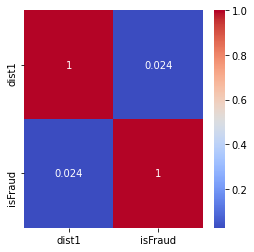

In [1373]:
plt.figure(figsize=(4,4))
sns.heatmap(df[columns+['isFraud']].corr(),annot=True, cmap="coolwarm");

In [1374]:
# corrank(df[columns], 0.8)

In [1375]:
drop_col = remove_collinear_features(df[columns],0.80)
drop_col

set()

In [1376]:
df = df.drop(drop_col, axis=1)

#### Handling Outliers

In [1377]:
columns=[col for col in df.columns if re.search('^dist', col)]

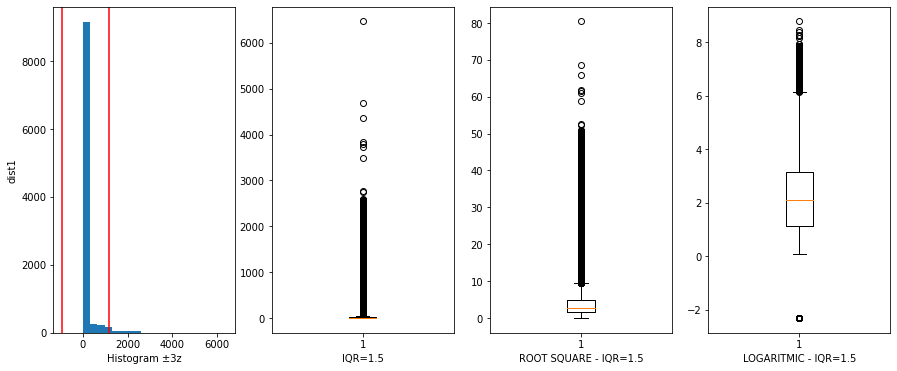

In [1378]:
for col in columns:
  col_plot(df[col].dropna().to_frame(),col)

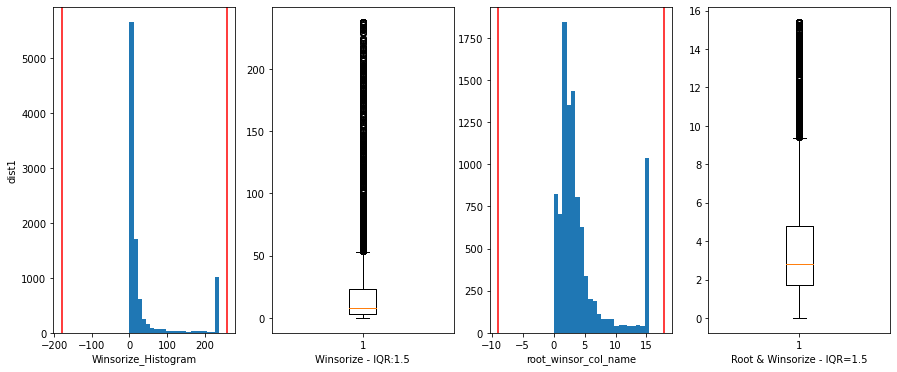

In [1379]:
for col in columns:
  plot_winsorize(df[col].dropna().to_frame(),col)

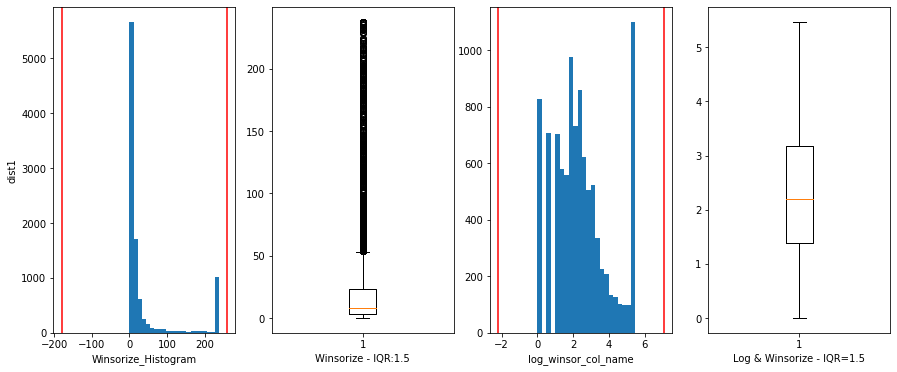

In [1380]:
for col in columns:
  plot_log_winsorize(df[col].dropna().to_frame(),col)

In [1381]:
df.dist1 = pd.Series( winsorize(np.log(df.dist1+1), limits=(0, 0.1)))
df.dist1.describe()

count    10023.000000
mean         2.552270
std          1.807082
min          0.000000
25%          1.386294
50%          2.197225
75%          3.178054
max          8.774468
Name: dist1, dtype: float64

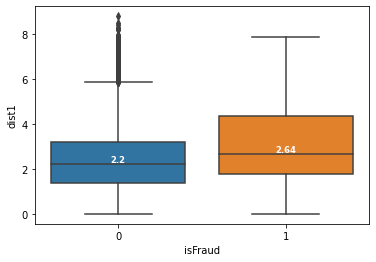

In [1382]:
ax = sns.boxplot(x='isFraud',y='dist1', data=df)
box_labels(ax=ax, df=df.sort_values('isFraud'),col1='isFraud',col2='dist1');

#### Plots

In [1385]:
# plot_col('dist1')

In [ ]:
# plot_cols(regex='^dist\d', figsize=(20, 8), target='isFraud')

In [ ]:
# hist_countplot(regex='^dist\d', figsize=(20, 8), nrow=1, ncolumn = 1)

In [ ]:
# box_countplot(regex='^dist\d', figsize=(20,8), nrow=1, ncolumn = 1)

### card1-6

In [1386]:
column_details(regex='^card')

Unique Values of the Features:
feature: DTYPE, NUNIQUE, NULL_RATE

card1:  int64, 3979, %0.0
[ 1008  1012  1030 ... 18378 18385 18390]

card2:  float64, 492, %1.47
[100. 101. 102. 103. 104. 105. 106. 108. 109. 110. 111. 112. 113. 114.
 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126. 127. 128.
 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140. 141. 142.
 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154. 155. 157.
 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168. 169. 170. 171.
 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182. 183. 184. 185.
 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196. 197. 198. 199.
 200. 201. 202. 203. 204. 205. 206. 207. 208. 209. 210. 211. 212. 213.
 214. 215. 216. 217. 218. 219. 220. 221. 222. 223. 224. 225. 226. 227.
 228. 229. 230. 231. 232. 233. 234. 235. 236. 237. 238. 239. 240. 241.
 242. 243. 244. 245. 246. 247. 248. 249. 250. 251. 252. 253. 254. 255.
 256. 257. 258. 259. 260. 261. 262. 263. 264. 265. 266.

#### card3

In [1387]:
df.card3.replace(df.card3.value_counts(dropna=False)[df.card3.value_counts(dropna=False, normalize=True)<0.0005].index,
                 df.card3.mode()[0], 
                 inplace= True,
                 )

df.card3.value_counts(dropna=False, normalize=True)*100

150.0    88.644
185.0     9.756
106.0     0.340
NaN       0.236
144.0     0.204
146.0     0.200
143.0     0.164
117.0     0.128
119.0     0.128
147.0     0.076
213.0     0.064
102.0     0.060
Name: card3, dtype: float64

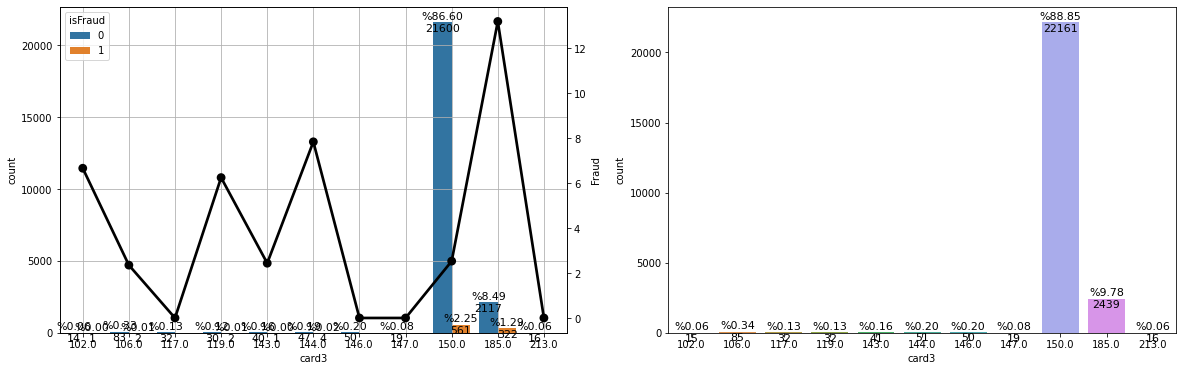

In [1388]:
plot_col('card3')

#### card5

In [1389]:
df.card5.replace(df.card5.value_counts(dropna=False)[df.card5.value_counts(dropna=False, normalize=True)<0.0005].index,
                 df.card5.mode()[0], 
                 inplace= True,
                 )

df.card5.value_counts(dropna=False, normalize=True)*100

226.0    50.684
224.0    13.792
166.0     9.612
102.0     5.132
117.0     4.504
138.0     3.504
195.0     2.756
137.0     1.872
219.0     1.800
126.0     1.704
202.0     1.100
NaN       0.744
162.0     0.700
229.0     0.316
197.0     0.304
223.0     0.172
150.0     0.172
118.0     0.164
100.0     0.152
198.0     0.120
236.0     0.116
146.0     0.108
190.0     0.092
185.0     0.080
203.0     0.076
147.0     0.064
129.0     0.056
141.0     0.052
142.0     0.052
Name: card5, dtype: float64

In [1390]:
df.card5.nunique()

28

> while number of unique of df.card5 is 63, we lessen it to 28.

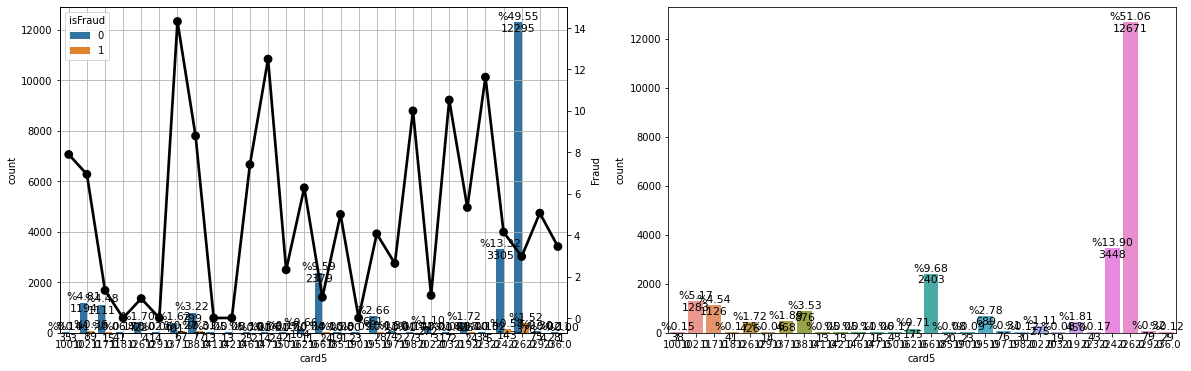

In [1391]:
plot_col('card5')

#### Multicolliarity

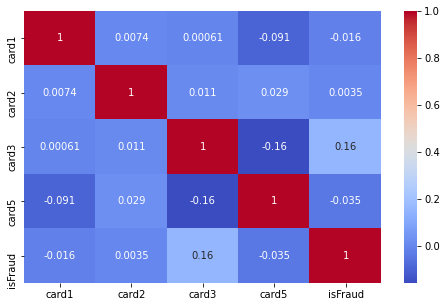

In [1392]:
plt.figure(figsize=(8,5))
sns.heatmap(df[columns+['isFraud']].corr(),annot=True, cmap="coolwarm");

In [1393]:
# corrank(df[columns], 0.8)

In [1394]:
drop_col = remove_collinear_features(df[columns],0.80)
drop_col

set()

In [1395]:
df = df.drop(drop_col, axis=1)

#### Handling Outliers

In [1396]:
columns=[col for col in df.columns if re.search('^card', col)]

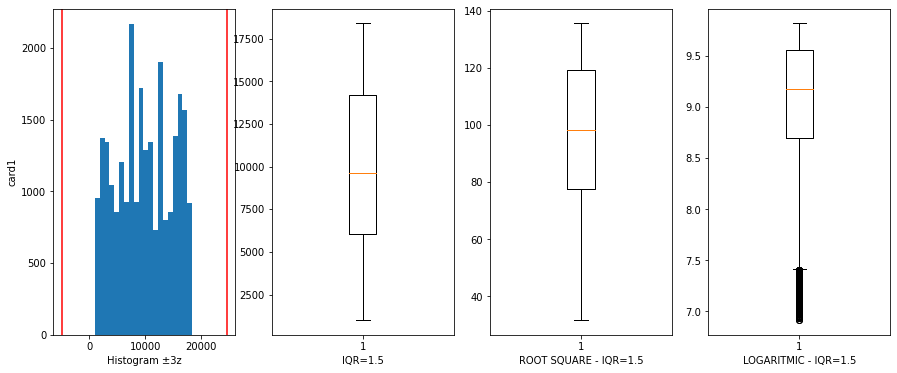

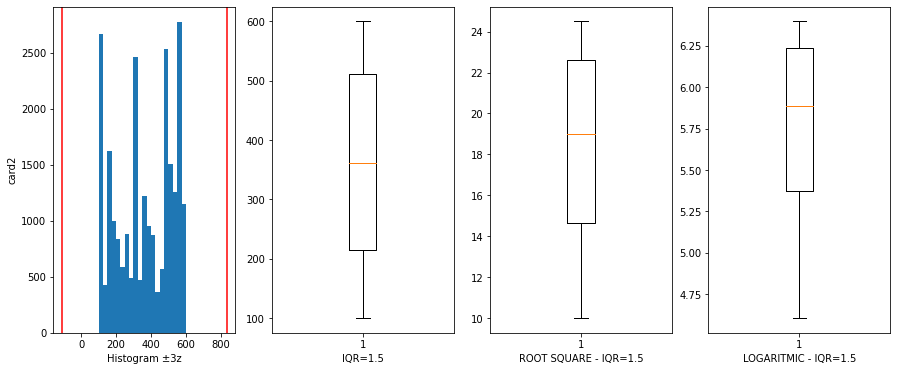

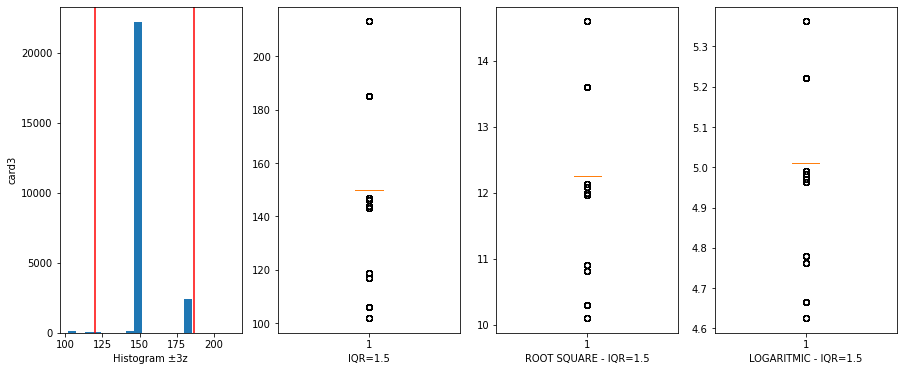

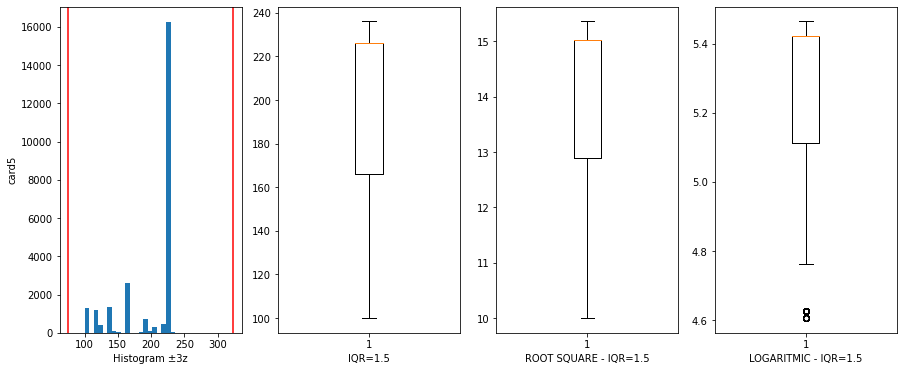

In [1397]:
for col in columns:
  if df[col].dtype!='O':
    col_plot(df[col].dropna().to_frame(),col)

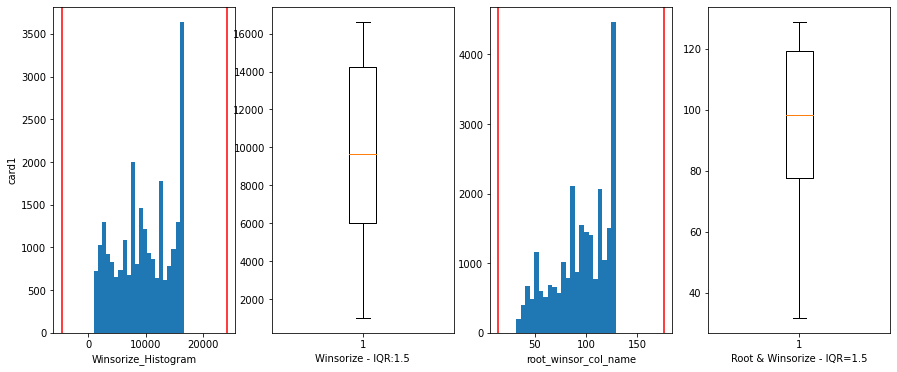

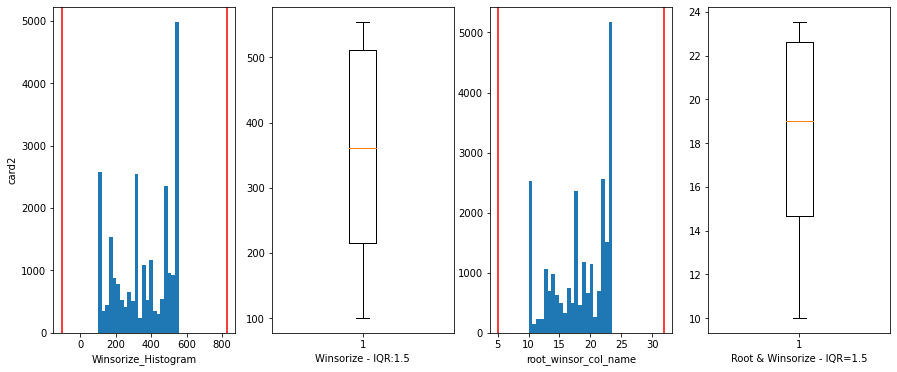

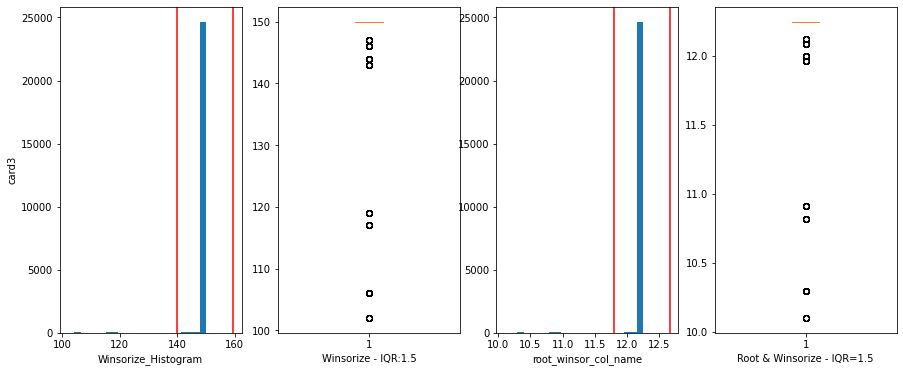

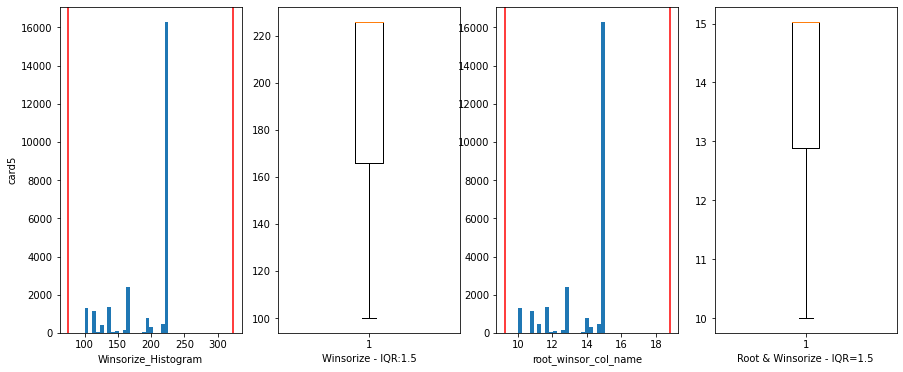

In [1398]:
for col in columns:
  if df[col].dtype!='O':
    plot_winsorize(df[col].dropna().to_frame(),col)

> card3-4-6 columns are categoric, The rest dont have any outlier problem.

#### Plots

In [ ]:
# plot_cols(regex='^card*', figsize=(30, 15), target='isFraud')

In [ ]:
# hist_countplot(regex='^card*', figsize=(30, 15), nrow=2, ncolumn = 3)

In [ ]:
# box_countplot(regex='^card*', figsize=(30, 15), nrow=2, ncolumn = 3)

* Extremely unbalanced data

In [ ]:
frauds = df[df.isFraud == 1]
normal = df[df.isFraud == 0]
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,8))
f.suptitle('Amount per transaction by class')

bins = 100

ax1.hist(frauds.TransactionAmt, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.TransactionAmt, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 10000))
plt.yscale('log')
plt.show();

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,8))
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.TransactionDT, frauds.TransactionAmt)
ax1.set_title('Fraud')

ax2.scatter(normal.TransactionDT, normal.TransactionAmt)
ax2.set_title('Normal')

plt.xlabel('TransactionDT')
plt.ylabel('Amount')
plt.show()

In [ ]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(25,25))         

# Imbalanced DataFrame Correlation
corr = df.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)

plt.show()